In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from skimage import io
import cv2 as cv
import os
import DarkArtefactRemoval as dca
import dullrazor as dr
import segmentation_and_preprocessing as sp
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, models
import csv
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import gradcam_test as gc
import vanilla_backprop as vb

# Loading Data

In [2]:
# Répertoire contenant les images
image_dir_train = 'Train/Train/'
image_dir_test = 'Test/Test/'

Train_path = image_dir_train

import glob
images_train = glob.glob(Train_path + '/*[0-9].jpg')
mask_img_train = glob.glob(Train_path + '/*seg.png')

images_with_mask = [ Train_path + mask_img_train[i].split('/')[-1].split('_seg')[0] + '.jpg' for i in range(len(mask_img_train))]
images_test = glob.glob(image_dir_test + '/*[0-9].jpg')
mask_img_test = glob.glob(image_dir_test + '/*seg.png')

#Lire le csv metadataTrain et metadataTest
metadataTrain = pd.read_csv('metadataTrain.csv')
metadataTest = pd.read_csv('metadataTest.csv')



In [3]:
# Checking if the number of images is right 
print('There are', len(images_train),  'train images')
print('There are', len(images_with_mask),  'train images with mask')
print('There are', len(mask_img_train),  'train masks')
print('There are', len(images_test),  'test images')
print('There are', len(mask_img_test),  'test masks')

There are 18998 train images
There are 1945 train images with mask
There are 1945 train masks
There are 6333 test images
There are 648 test masks


### Compute the segmentation mask for all the 20 000 images of the training set

In [5]:
sp.compute_and_save_segmented_lesions(images_train[:len(images_train)//4], 'output_masks_train_set_1', 'output_binary_masks_train_set_1')

100%|██████████| 4749/4749 [17:36<00:00,  4.50it/s]  
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0006326.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


ISIC_0030680.jpg_pred_mask.png
ISIC_0033389.jpg_pred_mask.png
ISIC_0013059.jpg_pred_mask.png
ISIC_0032097.jpg_pred_mask.png
ISIC_0054312.jpg_pred_mask.png
ISIC_0032929.jpg_pred_mask.png
ISIC_0000025.jpg_pred_mask.png
ISIC_0056263.jpg_pred_mask.png
ISIC_0010236.jpg_pred_mask.png
ISIC_0011128.jpg_pred_mask.png
ISIC_0026784.jpg_pred_mask.png
ISIC_0028971.jpg_pred_mask.png
ISIC_0026948.jpg_pred_mask.png
ISIC_0069087.jpg_pred_mask.png
ISIC_0010222.jpg_pred_mask.png
ISIC_0059144.jpg_pred_mask.png
ISIC_0057169.jpg_pred_mask.png
ISIC_0065865.jpg_pred_mask.png
ISIC_0012435.jpg_pred_mask.png
ISIC_0025299.jpg_pred_mask.png
ISIC_0014044.jpg_pred_mask.png
ISIC_0032083.jpg_pred_mask.png
ISIC_0054306.jpg_pred_mask.png
ISIC_0053469.jpg_pred_mask.png
ISIC_0024839.jpg_pred_mask.png
ISIC_0069939.jpg_pred_mask.png
ISIC_0006326.jpg_pred_mask.png
ISIC_0056511.jpg_pred_mask.png
ISIC_0007038.jpg_pred_mask.png
ISIC_0013065.jpg_pred_mask.png
ISIC_0030864.jpg_pred_mask.png
ISIC_0069911.jpg_pred_mask.png
ISIC_005

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0013501.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0072841.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


ISIC_0033809.jpg_pred_mask.png
ISIC_0015170.jpg_pred_mask.png
ISIC_0001105.jpg_pred_mask.png
ISIC_0029689.jpg_pred_mask.png
ISIC_0070924.jpg_pred_mask.png
ISIC_0028597.jpg_pred_mask.png
ISIC_0029851.jpg_pred_mask.png
ISIC_0071384.jpg_pred_mask.png
ISIC_0061197.jpg_pred_mask.png
ISIC_0059408.jpg_pred_mask.png
ISIC_0060289.jpg_pred_mask.png
ISIC_0053643.jpg_pred_mask.png
ISIC_0072855.jpg_pred_mask.png
ISIC_0063958.jpg_pred_mask.png
ISIC_0053657.jpg_pred_mask.png
ISIC_0054138.jpg_pred_mask.png
ISIC_0063794.jpg_pred_mask.png
ISIC_0072841.jpg_pred_mask.png
ISIC_0055226.jpg_pred_mask.png
ISIC_0025919.jpg_pred_mask.png
ISIC_0072699.jpg_pred_mask.png
ISIC_0061183.jpg_pred_mask.png
ISIC_0057431.jpg_pred_mask.png
ISIC_0067294.jpg_pred_mask.png
ISIC_0057357.jpg_pred_mask.png
ISIC_0058064.jpg_pred_mask.png
ISIC_0028583.jpg_pred_mask.png
ISIC_0029845.jpg_pred_mask.png
ISIC_0065483.jpg_pred_mask.png
ISIC_0054886.jpg_pred_mask.png
ISIC_0063019.jpg_pred_mask.png
ISIC_0034141.jpg_pred_mask.png
ISIC_006

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0026223.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


ISIC_0032524.jpg_pred_mask.png
ISIC_0054879.jpg_pred_mask.png
ISIC_0027667.jpg_pred_mask.png
ISIC_0061632.jpg_pred_mask.png
ISIC_0071421.jpg_pred_mask.png
ISIC_0029892.jpg_pred_mask.png
ISIC_0068170.jpg_pred_mask.png
ISIC_0067243.jpg_pred_mask.png
ISIC_0057380.jpg_pred_mask.png
ISIC_0026579.jpg_pred_mask.png
ISIC_0031005.jpg_pred_mask.png
ISIC_0025070.jpg_pred_mask.png
ISIC_0054689.jpg_pred_mask.png
ISIC_0063025.jpg_pred_mask.png
ISIC_0054851.jpg_pred_mask.png
ISIC_0012804.jpg_pred_mask.png
ISIC_0064992.jpg_pred_mask.png
ISIC_0033612.jpg_pred_mask.png
ISIC_0033174.jpg_pred_mask.png
ISIC_0053858.jpg_pred_mask.png
ISIC_0024408.jpg_pred_mask.png
ISIC_0065332.jpg_pred_mask.png
ISIC_0072896.jpg_pred_mask.png
ISIC_0056920.jpg_pred_mask.png
ISIC_0068616.jpg_pred_mask.png
ISIC_0071347.jpg_pred_mask.png
ISIC_0027101.jpg_pred_mask.png
ISIC_0061154.jpg_pred_mask.png
ISIC_0031777.jpg_pred_mask.png
ISIC_0029138.jpg_pred_mask.png
ISIC_0068602.jpg_pred_mask.png
ISIC_0056934.jpg_pred_mask.png
ISIC_002

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0014454.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


ISIC_0061975.jpg_pred_mask.png
ISIC_0015004.jpg_pred_mask.png
ISIC_0055420.jpg_pred_mask.png
ISIC_0029925.jpg_pred_mask.png
ISIC_0056129.jpg_pred_mask.png
ISIC_0061785.jpg_pred_mask.png
ISIC_0058104.jpg_pred_mask.png
ISIC_0027908.jpg_pred_mask.png
ISIC_0056897.jpg_pred_mask.png
ISIC_0067492.jpg_pred_mask.png
ISIC_0057551.jpg_pred_mask.png
ISIC_0058662.jpg_pred_mask.png
ISIC_0068979.jpg_pred_mask.png
ISIC_0000409.jpg_pred_mask.png
ISIC_0065285.jpg_pred_mask.png
ISIC_0025879.jpg_pred_mask.png
ISIC_0055346.jpg_pred_mask.png
ISIC_0063838.jpg_pred_mask.png
ISIC_0055352.jpg_pred_mask.png
ISIC_0072935.jpg_pred_mask.png
ISIC_0056883.jpg_pred_mask.png
ISIC_0067486.jpg_pred_mask.png
ISIC_0057545.jpg_pred_mask.png
ISIC_0058676.jpg_pred_mask.png
ISIC_0066940.jpg_pred_mask.png
ISIC_0028391.jpg_pred_mask.png
ISIC_0031818.jpg_pred_mask.png
ISIC_0066798.jpg_pred_mask.png
ISIC_0071582.jpg_pred_mask.png
ISIC_0061791.jpg_pred_mask.png
ISIC_0070844.jpg_pred_mask.png
ISIC_0058110.jpg_pred_mask.png
ISIC_003

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0057586.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


ISIC_0059742.jpg_pred_mask.png
ISIC_0026196.jpg_pred_mask.png
ISIC_0069859.jpg_pred_mask.png
ISIC_0016055.jpg_pred_mask.png
ISIC_0053509.jpg_pred_mask.png
ISIC_0024959.jpg_pred_mask.png
ISIC_0012233.jpg_pred_mask.png
ISIC_0024781.jpg_pred_mask.png
ISIC_0055178.jpg_pred_mask.png
ISIC_0014642.jpg_pred_mask.png
ISIC_0032685.jpg_pred_mask.png
ISIC_0054500.jpg_pred_mask.png
ISIC_0028805.jpg_pred_mask.png
ISIC_0056317.jpg_pred_mask.png
ISIC_0030092.jpg_pred_mask.png
ISIC_0000151.jpg_pred_mask.png
ISIC_0028811.jpg_pred_mask.png
ISIC_0071964.jpg_pred_mask.png
ISIC_0031398.jpg_pred_mask.png
ISIC_0010356.jpg_pred_mask.png
ISIC_0059030.jpg_pred_mask.png
ISIC_0032849.jpg_pred_mask.png
ISIC_0032691.jpg_pred_mask.png
ISIC_0065911.jpg_pred_mask.png
ISIC_0054514.jpg_pred_mask.png
ISIC_0062918.jpg_pred_mask.png
ISIC_0054272.jpg_pred_mask.png
ISIC_0024795.jpg_pred_mask.png
ISIC_0069695.jpg_pred_mask.png
ISIC_0059756.jpg_pred_mask.png
ISIC_0026182.jpg_pred_mask.png
ISIC_0058448.jpg_pred_mask.png
ISIC_003

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0065722.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


ISIC_0067135.jpg_pred_mask.png
ISIC_0031373.jpg_pred_mask.png
ISIC_0028636.jpg_pred_mask.png
ISIC_0030079.jpg_pred_mask.png
ISIC_0061550.jpg_pred_mask.png
ISIC_0027505.jpg_pred_mask.png
ISIC_0060896.jpg_pred_mask.png
ISIC_0031367.jpg_pred_mask.png
ISIC_0029528.jpg_pred_mask.png
ISIC_0073154.jpg_pred_mask.png
ISIC_0064428.jpg_pred_mask.png
ISIC_0033570.jpg_pred_mask.png
ISIC_0033216.jpg_pred_mask.png
ISIC_0065050.jpg_pred_mask.png
ISIC_0031401.jpg_pred_mask.png
ISIC_0068574.jpg_pred_mask.png
ISIC_0061236.jpg_pred_mask.png
ISIC_0027263.jpg_pred_mask.png
ISIC_0008280.jpg_pred_mask.png
ISIC_0033571.jpg_pred_mask.png
ISIC_0062058.jpg_pred_mask.png
ISIC_0013879.jpg_pred_mask.png
ISIC_0063346.jpg_pred_mask.png
ISIC_0025313.jpg_pred_mask.png
ISIC_0029529.jpg_pred_mask.png
ISIC_0067120.jpg_pred_mask.png
ISIC_0061551.jpg_pred_mask.png
ISIC_0027504.jpg_pred_mask.png
ISIC_0030078.jpg_pred_mask.png
ISIC_0027262.jpg_pred_mask.png
ISIC_0028151.jpg_pred_mask.png
ISIC_0066558.jpg_pred_mask.png
ISIC_005

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0013689.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


ISIC_0064398.jpg_pred_mask.png
ISIC_0073182.jpg_pred_mask.png
ISIC_0065938.jpg_pred_mask.png
ISIC_0063391.jpg_pred_mask.png
ISIC_0055623.jpg_pred_mask.png
ISIC_0013676.jpg_pred_mask.png
ISIC_0032860.jpg_pred_mask.png
ISIC_0071795.jpg_pred_mask.png
ISIC_0060840.jpg_pred_mask.png
ISIC_0061586.jpg_pred_mask.png
ISIC_0059019.jpg_pred_mask.png
ISIC_0058307.jpg_pred_mask.png
ISIC_0028838.jpg_pred_mask.png
ISIC_0013886.jpg_pred_mask.png
ISIC_0032690.jpg_pred_mask.png
ISIC_0014131.jpg_pred_mask.png
ISIC_0060868.jpg_pred_mask.png
ISIC_0030087.jpg_pred_mask.png
ISIC_0056302.jpg_pred_mask.png
ISIC_0028810.jpg_pred_mask.png
ISIC_0030939.jpg_pred_mask.png
ISIC_0016040.jpg_pred_mask.png
ISIC_0009160.jpg_pred_mask.png
ISIC_0026183.jpg_pred_mask.png
ISIC_0014657.jpg_pred_mask.png
ISIC_0024794.jpg_pred_mask.png
ISIC_0054273.jpg_pred_mask.png
ISIC_0062919.jpg_pred_mask.png
ISIC_0014643.jpg_pred_mask.png
ISIC_0055179.jpg_pred_mask.png
ISIC_0012232.jpg_pred_mask.png
ISIC_0024958.jpg_pred_mask.png
ISIC_005

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0012965.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


ISIC_0065535.jpg_pred_mask.png
ISIC_0063150.jpg_pred_mask.png
ISIC_0025105.jpg_pred_mask.png
ISIC_0034008.jpg_pred_mask.png
ISIC_0054924.jpg_pred_mask.png
ISIC_0033767.jpg_pred_mask.png
ISIC_0028421.jpg_pred_mask.png
ISIC_0061747.jpg_pred_mask.png
ISIC_0070892.jpg_pred_mask.png
ISIC_0027712.jpg_pred_mask.png
ISIC_0066028.jpg_pred_mask.png
ISIC_0067336.jpg_pred_mask.png
ISIC_0068005.jpg_pred_mask.png
ISIC_0031170.jpg_pred_mask.png
ISIC_0031616.jpg_pred_mask.png
ISIC_0029059.jpg_pred_mask.png
ISIC_0067450.jpg_pred_mask.png
ISIC_0056855.jpg_pred_mask.png
ISIC_0068763.jpg_pred_mask.png
ISIC_0058878.jpg_pred_mask.png
ISIC_0071232.jpg_pred_mask.png
ISIC_0028347.jpg_pred_mask.png
ISIC_0030508.jpg_pred_mask.png
ISIC_0061021.jpg_pred_mask.png
ISIC_0027074.jpg_pred_mask.png
ISIC_0065247.jpg_pred_mask.png
ISIC_0063636.jpg_pred_mask.png
ISIC_0026342.jpg_pred_mask.png
ISIC_0029071.jpg_pred_mask.png
ISIC_0067478.jpg_pred_mask.png
ISIC_0069455.jpg_pred_mask.png
ISIC_0058850.jpg_pred_mask.png
ISIC_006

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0060471.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


ISIC_0029703.jpg_pred_mask.png
ISIC_0032445.jpg_pred_mask.png
ISIC_0025139.jpg_pred_mask.png
ISIC_0033983.jpg_pred_mask.png
ISIC_0072061.jpg_pred_mask.png
ISIC_0034034.jpg_pred_mask.png
ISIC_0054918.jpg_pred_mask.png
ISIC_0062272.jpg_pred_mask.png
ISIC_0015944.jpg_pred_mask.png
ISIC_0025887.jpg_pred_mask.png
ISIC_0026356.jpg_pred_mask.png
ISIC_0029065.jpg_pred_mask.png
ISIC_0070110.jpg_pred_mask.png
ISIC_0056869.jpg_pred_mask.png
ISIC_0066772.jpg_pred_mask.png
ISIC_0068987.jpg_pred_mask.png
ISIC_0027048.jpg_pred_mask.png
ISIC_0031819.jpg_pred_mask.png
ISIC_0066799.jpg_pred_mask.png
ISIC_0028390.jpg_pred_mask.png
ISIC_0059569.jpg_pred_mask.png
ISIC_0057544.jpg_pred_mask.png
ISIC_0067487.jpg_pred_mask.png
ISIC_0056882.jpg_pred_mask.png
ISIC_0005564.jpg_pred_mask.png
ISIC_0055353.jpg_pred_mask.png
ISIC_0013306.jpg_pred_mask.png
ISIC_0014469.jpg_pred_mask.png
ISIC_0065290.jpg_pred_mask.png
ISIC_0055435.jpg_pred_mask.png
ISIC_0062299.jpg_pred_mask.png
ISIC_0063187.jpg_pred_mask.png
ISIC_005

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0014469.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


ISIC_0026381.jpg_pred_mask.png
ISIC_0068788.jpg_pred_mask.png
ISIC_0030285.jpg_pred_mask.png
ISIC_0000346.jpg_pred_mask.png
ISIC_0055409.jpg_pred_mask.png
ISIC_0032492.jpg_pred_mask.png
ISIC_0012742.jpg_pred_mask.png
ISIC_0054717.jpg_pred_mask.png
ISIC_0033798.jpg_pred_mask.png
ISIC_0032486.jpg_pred_mask.png
ISIC_0061960.jpg_pred_mask.png
ISIC_0058139.jpg_pred_mask.png
ISIC_0000352.jpg_pred_mask.png
ISIC_0000434.jpg_pred_mask.png
ISIC_0058887.jpg_pred_mask.png
ISIC_0031831.jpg_pred_mask.png
ISIC_0068944.jpg_pred_mask.png
ISIC_0056672.jpg_pred_mask.png
ISIC_0054065.jpg_pred_mask.png
ISIC_0024582.jpg_pred_mask.png
ISIC_0014441.jpg_pred_mask.png
ISIC_0025844.jpg_pred_mask.png
ISIC_0063811.jpg_pred_mask.png
ISIC_0063756.jpg_pred_mask.png
ISIC_0025703.jpg_pred_mask.png
ISIC_0053695.jpg_pred_mask.png
ISIC_0033161.jpg_pred_mask.png
ISIC_0028227.jpg_pred_mask.png
ISIC_0027114.jpg_pred_mask.png
ISIC_0071352.jpg_pred_mask.png
ISIC_0031776.jpg_pred_mask.png
ISIC_0029139.jpg_pred_mask.png
ISIC_005

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0026236.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0072673.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


ISIC_0066174.jpg_pred_mask.png
ISIC_0059384.jpg_pred_mask.png
ISIC_0060511.jpg_pred_mask.png
ISIC_0026544.jpg_pred_mask.png
ISIC_0029677.jpg_pred_mask.png
ISIC_0031038.jpg_pred_mask.png
ISIC_0027882.jpg_pred_mask.png
ISIC_0069253.jpg_pred_mask.png
ISIC_0030326.jpg_pred_mask.png
ISIC_0059390.jpg_pred_mask.png
ISIC_0024353.jpg_pred_mask.png
ISIC_0014290.jpg_pred_mask.png
ISIC_0065469.jpg_pred_mask.png
ISIC_0034140.jpg_pred_mask.png
ISIC_0072115.jpg_pred_mask.png
ISIC_0032531.jpg_pred_mask.png
ISIC_0032257.jpg_pred_mask.png
ISIC_0012187.jpg_pred_mask.png
ISIC_0072673.jpg_pred_mask.png
ISIC_0053865.jpg_pred_mask.png
ISIC_0033149.jpg_pred_mask.png
ISIC_0024435.jpg_pred_mask.png
ISIC_0069535.jpg_pred_mask.png
ISIC_0031986.jpg_pred_mask.png
ISIC_0026222.jpg_pred_mask.png
ISIC_0029111.jpg_pred_mask.png
ISIC_0058703.jpg_pred_mask.png
ISIC_0071391.jpg_pred_mask.png
ISIC_0025918.jpg_pred_mask.png
ISIC_0072698.jpg_pred_mask.png
ISIC_0063795.jpg_pred_mask.png
ISIC_0015603.jpg_pred_mask.png
ISIC_005

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0063232.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


ISIC_0055958.jpg_pred_mask.png
ISIC_0033405.jpg_pred_mask.png
ISIC_0027470.jpg_pred_mask.png
ISIC_0028743.jpg_pred_mask.png
ISIC_0069079.jpg_pred_mask.png
ISIC_0009955.jpg_pred_mask.png
ISIC_0068367.jpg_pred_mask.png
ISIC_0070528.jpg_pred_mask.png
ISIC_0067054.jpg_pred_mask.png
ISIC_0031212.jpg_pred_mask.png
ISIC_0026008.jpg_pred_mask.png
ISIC_0031574.jpg_pred_mask.png
ISIC_0059804.jpg_pred_mask.png
ISIC_0057829.jpg_pred_mask.png
ISIC_0027316.jpg_pred_mask.png
ISIC_0028025.jpg_pred_mask.png
ISIC_0033363.jpg_pred_mask.png
ISIC_0072459.jpg_pred_mask.png
ISIC_0053497.jpg_pred_mask.png
ISIC_0025501.jpg_pred_mask.png
ISIC_0053483.jpg_pred_mask.png
ISIC_0032069.jpg_pred_mask.png
ISIC_0025515.jpg_pred_mask.png
ISIC_0031560.jpg_pred_mask.png
ISIC_0068415.jpg_pred_mask.png
ISIC_0059810.jpg_pred_mask.png
ISIC_0067726.jpg_pred_mask.png
ISIC_0027302.jpg_pred_mask.png
ISIC_0028031.jpg_pred_mask.png
ISIC_0027464.jpg_pred_mask.png
ISIC_0028757.jpg_pred_mask.png
ISIC_0030118.jpg_pred_mask.png
ISIC_000

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0012378.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


ISIC_0013933.jpg_pred_mask.png
ISIC_0064563.jpg_pred_mask.png
ISIC_0032725.jpg_pred_mask.png
ISIC_0029463.jpg_pred_mask.png
ISIC_0026750.jpg_pred_mask.png
ISIC_0060705.jpg_pred_mask.png
ISIC_0070516.jpg_pred_mask.png
ISIC_0026988.jpg_pred_mask.png
ISIC_0030132.jpg_pred_mask.png
ISIC_0029477.jpg_pred_mask.png
ISIC_0031238.jpg_pred_mask.png
ISIC_0060711.jpg_pred_mask.png
ISIC_0026744.jpg_pred_mask.png
ISIC_0030126.jpg_pred_mask.png
ISIC_0028769.jpg_pred_mask.png
ISIC_0013927.jpg_pred_mask.png
ISIC_0055972.jpg_pred_mask.png
ISIC_0032731.jpg_pred_mask.png
ISIC_0012387.jpg_pred_mask.png
ISIC_0032057.jpg_pred_mask.png
ISIC_0064211.jpg_pred_mask.png
ISIC_0072473.jpg_pred_mask.png
ISIC_0024635.jpg_pred_mask.png
ISIC_0030640.jpg_pred_mask.png
ISIC_0010590.jpg_pred_mask.png
ISIC_0061369.jpg_pred_mask.png
ISIC_0069735.jpg_pred_mask.png
ISIC_0067718.jpg_pred_mask.png
ISIC_0070264.jpg_pred_mask.png
ISIC_0029311.jpg_pred_mask.png
ISIC_0060077.jpg_pred_mask.png
ISIC_0026022.jpg_pred_mask.png
ISIC_006

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0026022.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


ISIC_0061355.jpg_pred_mask.png
ISIC_0028033.jpg_pred_mask.png
ISIC_0069709.jpg_pred_mask.png
ISIC_0059812.jpg_pred_mask.png
ISIC_0014912.jpg_pred_mask.png
ISIC_0063542.jpg_pred_mask.png
ISIC_0062884.jpg_pred_mask.png
ISIC_0024609.jpg_pred_mask.png
ISIC_0034195.jpg_pred_mask.png
ISIC_0033822.jpg_pred_mask.png
ISIC_0061802.jpg_pred_mask.png
ISIC_0027857.jpg_pred_mask.png
ISIC_0068198.jpg_pred_mask.png
ISIC_0057368.jpg_pred_mask.png
ISIC_0010023.jpg_pred_mask.png
ISIC_0000556.jpg_pred_mask.png
ISIC_0059423.jpg_pred_mask.png
ISIC_0030495.jpg_pred_mask.png
ISIC_0053668.jpg_pred_mask.png
ISIC_0054107.jpg_pred_mask.png
ISIC_0055219.jpg_pred_mask.png
ISIC_0032296.jpg_pred_mask.png
ISIC_0054113.jpg_pred_mask.png
ISIC_0033188.jpg_pred_mask.png
ISIC_0013258.jpg_pred_mask.png
ISIC_0014537.jpg_pred_mask.png
ISIC_0025932.jpg_pred_mask.png
ISIC_0030481.jpg_pred_mask.png
ISIC_0058729.jpg_pred_mask.png
ISIC_0027843.jpg_pred_mask.png
ISIC_0011329.jpg_pred_mask.png
ISIC_0000224.jpg_pred_mask.png
ISIC_003

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0029846.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0061194.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


ISIC_0057340.jpg_pred_mask.png
ISIC_0028594.jpg_pred_mask.png
ISIC_0070927.jpg_pred_mask.png
ISIC_0029852.jpg_pred_mask.png
ISIC_0000218.jpg_pred_mask.png
ISIC_0030330.jpg_pred_mask.png
ISIC_0059386.jpg_pred_mask.png
ISIC_0069245.jpg_pred_mask.png
ISIC_0027894.jpg_pred_mask.png
ISIC_0070714.jpg_pred_mask.png
ISIC_0026552.jpg_pred_mask.png
ISIC_0029661.jpg_pred_mask.png
ISIC_0032527.jpg_pred_mask.png
ISIC_0034156.jpg_pred_mask.png
ISIC_0033639.jpg_pred_mask.png
ISIC_0024345.jpg_pred_mask.png
ISIC_0053873.jpg_pred_mask.png
ISIC_0024423.jpg_pred_mask.png
ISIC_0065319.jpg_pred_mask.png
ISIC_0072665.jpg_pred_mask.png
ISIC_0064007.jpg_pred_mask.png
ISIC_0032241.jpg_pred_mask.png
ISIC_0012191.jpg_pred_mask.png
ISIC_0060261.jpg_pred_mask.png
ISIC_0026234.jpg_pred_mask.png
ISIC_0029107.jpg_pred_mask.png
ISIC_0031748.jpg_pred_mask.png
ISIC_0070072.jpg_pred_mask.png
ISIC_0058926.jpg_pred_mask.png
ISIC_0028219.jpg_pred_mask.png
ISIC_0026220.jpg_pred_mask.png
ISIC_0029113.jpg_pred_mask.png
ISIC_006

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0012967.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


ISIC_0026368.jpg_pred_mask.png
ISIC_0057591.jpg_pred_mask.png
ISIC_0031172.jpg_pred_mask.png
ISIC_0067334.jpg_pred_mask.png
ISIC_0068007.jpg_pred_mask.png
ISIC_0028423.jpg_pred_mask.png
ISIC_0027710.jpg_pred_mask.png
ISIC_0033765.jpg_pred_mask.png
ISIC_0065523.jpg_pred_mask.png
ISIC_0025107.jpg_pred_mask.png
ISIC_0025488.jpg_pred_mask.png
ISIC_0054271.jpg_pred_mask.png
ISIC_0024796.jpg_pred_mask.png
ISIC_0069696.jpg_pred_mask.png
ISIC_0067863.jpg_pred_mask.png
ISIC_0056466.jpg_pred_mask.png
ISIC_0026181.jpg_pred_mask.png
ISIC_0028812.jpg_pred_mask.png
ISIC_0071967.jpg_pred_mask.png
ISIC_0000146.jpg_pred_mask.png
ISIC_0014127.jpg_pred_mask.png
ISIC_0033598.jpg_pred_mask.png
ISIC_0032686.jpg_pred_mask.png
ISIC_0065906.jpg_pred_mask.png
ISIC_0013890.jpg_pred_mask.png
ISIC_0028806.jpg_pred_mask.png
ISIC_0058339.jpg_pred_mask.png
ISIC_0030091.jpg_pred_mask.png
ISIC_0059027.jpg_pred_mask.png
ISIC_0056314.jpg_pred_mask.png
ISIC_0010341.jpg_pred_mask.png
ISIC_0000152.jpg_pred_mask.png
ISIC_006

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0016056.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0012230.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0073194.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


ISIC_0054259.jpg_pred_mask.png
ISIC_0013112.jpg_pred_mask.png
ISIC_0065084.jpg_pred_mask.png
ISIC_0057988.jpg_pred_mask.png
ISIC_0028184.jpg_pred_mask.png
ISIC_0058463.jpg_pred_mask.png
ISIC_0030913.jpg_pred_mask.png
ISIC_0067693.jpg_pred_mask.png
ISIC_0029271.jpg_pred_mask.png
ISIC_0060117.jpg_pred_mask.png
ISIC_0026142.jpg_pred_mask.png
ISIC_0070304.jpg_pred_mask.png
ISIC_0066566.jpg_pred_mask.png
ISIC_0057963.jpg_pred_mask.png
ISIC_0030720.jpg_pred_mask.png
ISIC_0059796.jpg_pred_mask.png
ISIC_0024755.jpg_pred_mask.png
ISIC_0033229.jpg_pred_mask.png
ISIC_0014696.jpg_pred_mask.png
ISIC_0064371.jpg_pred_mask.png
ISIC_0032137.jpg_pred_mask.png
ISIC_0063378.jpg_pred_mask.png
ISIC_0055812.jpg_pred_mask.png
ISIC_0034220.jpg_pred_mask.png
ISIC_0032889.jpg_pred_mask.png
ISIC_0065709.jpg_pred_mask.png
ISIC_0062066.jpg_pred_mask.png
ISIC_0030046.jpg_pred_mask.png
ISIC_0066200.jpg_pred_mask.png
ISIC_0069133.jpg_pred_mask.png
ISIC_0070462.jpg_pred_mask.png
ISIC_0031358.jpg_pred_mask.png
ISIC_001

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0071754.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


ISIC_0067650.jpg_pred_mask.png
ISIC_0071032.jpg_pred_mask.png
ISIC_0061221.jpg_pred_mask.png
ISIC_0027274.jpg_pred_mask.png
ISIC_0067888.jpg_pred_mask.png
ISIC_0055184.jpg_pred_mask.png
ISIC_0065047.jpg_pred_mask.png
ISIC_0014866.jpg_pred_mask.png
ISIC_0025463.jpg_pred_mask.png
ISIC_0066229.jpg_pred_mask.png
ISIC_0071755.jpg_pred_mask.png
ISIC_0028620.jpg_pred_mask.png
ISIC_0061546.jpg_pred_mask.png
ISIC_0027513.jpg_pred_mask.png
ISIC_0033566.jpg_pred_mask.png
ISIC_0065720.jpg_pred_mask.png
ISIC_0073142.jpg_pred_mask.png
ISIC_0032678.jpg_pred_mask.png
ISIC_0025462.jpg_pred_mask.png
ISIC_0064358.jpg_pred_mask.png
ISIC_0055185.jpg_pred_mask.png
ISIC_0033200.jpg_pred_mask.png
ISIC_0028146.jpg_pred_mask.png
ISIC_0067889.jpg_pred_mask.png
ISIC_0030709.jpg_pred_mask.png
ISIC_0027275.jpg_pred_mask.png
ISIC_0059967.jpg_pred_mask.png
ISIC_0031417.jpg_pred_mask.png
ISIC_0029258.jpg_pred_mask.png
ISIC_0009188.jpg_pred_mask.png
ISIC_0057792.jpg_pred_mask.png
ISIC_0028152.jpg_pred_mask.png
ISIC_002

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0029072.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0029099.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


ISIC_0060499.jpg_pred_mask.png
ISIC_0058106.jpg_pred_mask.png
ISIC_0061787.jpg_pred_mask.png
ISIC_0070852.jpg_pred_mask.png
ISIC_0059218.jpg_pred_mask.png
ISIC_0071594.jpg_pred_mask.png
ISIC_0029927.jpg_pred_mask.png
ISIC_0063190.jpg_pred_mask.png
ISIC_0015006.jpg_pred_mask.png
ISIC_0072089.jpg_pred_mask.png
ISIC_0054728.jpg_pred_mask.png
ISIC_0070846.jpg_pred_mask.png
ISIC_0000379.jpg_pred_mask.png
ISIC_0029933.jpg_pred_mask.png
ISIC_0028393.jpg_pred_mask.png
ISIC_0057547.jpg_pred_mask.png
ISIC_0058674.jpg_pred_mask.png
ISIC_0056881.jpg_pred_mask.png
ISIC_0067484.jpg_pred_mask.png
ISIC_0072937.jpg_pred_mask.png
ISIC_0031832.jpg_pred_mask.png
ISIC_0027088.jpg_pred_mask.png
ISIC_0056671.jpg_pred_mask.png
ISIC_0054066.jpg_pred_mask.png
ISIC_0055378.jpg_pred_mask.png
ISIC_0025847.jpg_pred_mask.png
ISIC_0054700.jpg_pred_mask.png
ISIC_0033943.jpg_pred_mask.png
ISIC_0061963.jpg_pred_mask.png
ISIC_0027936.jpg_pred_mask.png
ISIC_0030292.jpg_pred_mask.png
ISIC_0056117.jpg_pred_mask.png
ISIC_002

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0030127.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


ISIC_0024620.jpg_pred_mask.png
ISIC_0032042.jpg_pred_mask.png
ISIC_0026037.jpg_pred_mask.png
ISIC_0029304.jpg_pred_mask.png
ISIC_0057816.jpg_pred_mask.png
ISIC_0066413.jpg_pred_mask.png
ISIC_0027329.jpg_pred_mask.png
ISIC_0030655.jpg_pred_mask.png
ISIC_0030133.jpg_pred_mask.png
ISIC_0071609.jpg_pred_mask.png
ISIC_0068358.jpg_pred_mask.png
ISIC_0026751.jpg_pred_mask.png
ISIC_0060704.jpg_pred_mask.png
ISIC_0029462.jpg_pred_mask.png
ISIC_0032724.jpg_pred_mask.png
ISIC_0062113.jpg_pred_mask.png
ISIC_0065697.jpg_pred_mask.png
ISIC_0032917.jpg_pred_mask.png
ISIC_0064589.jpg_pred_mask.png
ISIC_0067080.jpg_pred_mask.png
ISIC_0029489.jpg_pred_mask.png
ISIC_0028797.jpg_pred_mask.png
ISIC_0026962.jpg_pred_mask.png
ISIC_0009981.jpg_pred_mask.png
ISIC_0059608.jpg_pred_mask.png
ISIC_0057625.jpg_pred_mask.png
ISIC_0069913.jpg_pred_mask.png
ISIC_0060089.jpg_pred_mask.png
ISIC_0030866.jpg_pred_mask.png
ISIC_0024813.jpg_pred_mask.png
ISIC_0012379.jpg_pred_mask.png
ISIC_0055032.jpg_pred_mask.png
ISIC_001

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0060089.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


ISIC_0005639.jpg_pred_mask.png
ISIC_0010552.jpg_pred_mask.png
ISIC_0030682.jpg_pred_mask.png
ISIC_0000999.jpg_pred_mask.png
ISIC_0059620.jpg_pred_mask.png
ISIC_0067916.jpg_pred_mask.png
ISIC_0031588.jpg_pred_mask.png
ISIC_0032081.jpg_pred_mask.png
ISIC_0054304.jpg_pred_mask.png
ISIC_0012351.jpg_pred_mask.png
ISIC_0014720.jpg_pred_mask.png
ISIC_0014046.jpg_pred_mask.png
ISIC_0028967.jpg_pred_mask.png
ISIC_0026792.jpg_pred_mask.png
ISIC_0056275.jpg_pred_mask.png
ISIC_0010220.jpg_pred_mask.png
ISIC_0069085.jpg_pred_mask.png
ISIC_0015360.jpg_pred_mask.png
ISIC_0064599.jpg_pred_mask.png
ISIC_0065687.jpg_pred_mask.png
ISIC_0032907.jpg_pred_mask.png
ISIC_0026972.jpg_pred_mask.png
ISIC_0009991.jpg_pred_mask.png
ISIC_0060927.jpg_pred_mask.png
ISIC_0057153.jpg_pred_mask.png
ISIC_0029499.jpg_pred_mask.png
ISIC_0069903.jpg_pred_mask.png
ISIC_0058506.jpg_pred_mask.png
ISIC_0071194.jpg_pred_mask.png
ISIC_0055022.jpg_pred_mask.png
ISIC_0024803.jpg_pred_mask.png
ISIC_0062856.jpg_pred_mask.png
ISIC_006

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0065283.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0015994.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


ISIC_0027098.jpg_pred_mask.png
ISIC_0059552.jpg_pred_mask.png
ISIC_0015994.jpg_pred_mask.png
ISIC_0024591.jpg_pred_mask.png
ISIC_0055368.jpg_pred_mask.png
ISIC_0063802.jpg_pred_mask.png
ISIC_0025857.jpg_pred_mask.png
ISIC_0053719.jpg_pred_mask.png
ISIC_0032495.jpg_pred_mask.png
ISIC_0054710.jpg_pred_mask.png
ISIC_0033953.jpg_pred_mask.png
ISIC_0056107.jpg_pred_mask.png
ISIC_0030282.jpg_pred_mask.png
ISIC_0057219.jpg_pred_mask.png
ISIC_0030296.jpg_pred_mask.png
ISIC_0059220.jpg_pred_mask.png
ISIC_0027932.jpg_pred_mask.png
ISIC_0061967.jpg_pred_mask.png
ISIC_0031188.jpg_pred_mask.png
ISIC_0032481.jpg_pred_mask.png
ISIC_0033947.jpg_pred_mask.png
ISIC_0012989.jpg_pred_mask.png
ISIC_0015980.jpg_pred_mask.png
ISIC_0024585.jpg_pred_mask.png
ISIC_0025843.jpg_pred_mask.png
ISIC_0054062.jpg_pred_mask.png
ISIC_0026392.jpg_pred_mask.png
ISIC_0069485.jpg_pred_mask.png
ISIC_0058880.jpg_pred_mask.png
ISIC_0031836.jpg_pred_mask.png
ISIC_0027067.jpg_pred_mask.png
ISIC_0057580.jpg_pred_mask.png
ISIC_006

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0031836.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0056846.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0012976.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


ISIC_0054089.jpg_pred_mask.png
ISIC_0025670.jpg_pred_mask.png
ISIC_0033012.jpg_pred_mask.png
ISIC_0065254.jpg_pred_mask.png
ISIC_0054937.jpg_pred_mask.png
ISIC_0012962.jpg_pred_mask.png
ISIC_0065532.jpg_pred_mask.png
ISIC_0033774.jpg_pred_mask.png
ISIC_0025116.jpg_pred_mask.png
ISIC_0063143.jpg_pred_mask.png
ISIC_0031163.jpg_pred_mask.png
ISIC_0028432.jpg_pred_mask.png
ISIC_0027701.jpg_pred_mask.png
ISIC_0071547.jpg_pred_mask.png
ISIC_0061998.jpg_pred_mask.png
ISIC_0031177.jpg_pred_mask.png
ISIC_0029738.jpg_pred_mask.png
ISIC_0028426.jpg_pred_mask.png
ISIC_0030269.jpg_pred_mask.png
ISIC_0070895.jpg_pred_mask.png
ISIC_0061740.jpg_pred_mask.png
ISIC_0027715.jpg_pred_mask.png
ISIC_0012976.jpg_pred_mask.png
ISIC_0062249.jpg_pred_mask.png
ISIC_0033760.jpg_pred_mask.png
ISIC_0063157.jpg_pred_mask.png
ISIC_0025102.jpg_pred_mask.png
ISIC_0032318.jpg_pred_mask.png
ISIC_0033006.jpg_pred_mask.png
ISIC_0066749.jpg_pred_mask.png
ISIC_0028340.jpg_pred_mask.png
ISIC_0061026.jpg_pred_mask.png
ISIC_002

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0067668.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


ISIC_0032899.jpg_pred_mask.png
ISIC_0034230.jpg_pred_mask.png
ISIC_0072265.jpg_pred_mask.png
ISIC_0032641.jpg_pred_mask.png
ISIC_0063368.jpg_pred_mask.png
ISIC_0055802.jpg_pred_mask.png
ISIC_0070472.jpg_pred_mask.png
ISIC_0011098.jpg_pred_mask.png
ISIC_0029507.jpg_pred_mask.png
ISIC_0031348.jpg_pred_mask.png
ISIC_0028619.jpg_pred_mask.png
ISIC_0066210.jpg_pred_mask.png
ISIC_0070466.jpg_pred_mask.png
ISIC_0026620.jpg_pred_mask.png
ISIC_0029513.jpg_pred_mask.png
ISIC_0030042.jpg_pred_mask.png
ISIC_0069137.jpg_pred_mask.png
ISIC_0071778.jpg_pred_mask.png
ISIC_0000181.jpg_pred_mask.png
ISIC_0066204.jpg_pred_mask.png
ISIC_0072271.jpg_pred_mask.png
ISIC_0034224.jpg_pred_mask.png
ISIC_0025329.jpg_pred_mask.png
ISIC_0064413.jpg_pred_mask.png
ISIC_0013843.jpg_pred_mask.png
ISIC_0024989.jpg_pred_mask.png
ISIC_0024751.jpg_pred_mask.png
ISIC_0062704.jpg_pred_mask.png
ISIC_0014692.jpg_pred_mask.png
ISIC_0027258.jpg_pred_mask.png
ISIC_0030724.jpg_pred_mask.png
ISIC_0026146.jpg_pred_mask.png
ISIC_006

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0015942.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


ISIC_0025895.jpg_pred_mask.png
ISIC_0072715.jpg_pred_mask.png
ISIC_0014490.jpg_pred_mask.png
ISIC_0062506.jpg_pred_mask.png
ISIC_0024553.jpg_pred_mask.png
ISIC_0015956.jpg_pred_mask.png
ISIC_0053903.jpg_pred_mask.png
ISIC_0032331.jpg_pred_mask.png
ISIC_0012787.jpg_pred_mask.png
ISIC_0032457.jpg_pred_mask.png
ISIC_0013499.jpg_pred_mask.png
ISIC_0033749.jpg_pred_mask.png
ISIC_0034026.jpg_pred_mask.png
ISIC_0066006.jpg_pred_mask.png
ISIC_0000383.jpg_pred_mask.png
ISIC_0069335.jpg_pred_mask.png
ISIC_0030240.jpg_pred_mask.png
ISIC_0010190.jpg_pred_mask.png
ISIC_0060477.jpg_pred_mask.png
ISIC_0026422.jpg_pred_mask.png
ISIC_0063156.jpg_pred_mask.png
ISIC_0025103.jpg_pred_mask.png
ISIC_0033761.jpg_pred_mask.png
ISIC_0071552.jpg_pred_mask.png
ISIC_0061741.jpg_pred_mask.png
ISIC_0070894.jpg_pred_mask.png
ISIC_0027714.jpg_pred_mask.png
ISIC_0031176.jpg_pred_mask.png
ISIC_0029739.jpg_pred_mask.png
ISIC_0061999.jpg_pred_mask.png
ISIC_0056853.jpg_pred_mask.png
ISIC_0068765.jpg_pred_mask.png
ISIC_006

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0027847.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


ISIC_0011339.jpg_pred_mask.png
ISIC_0054665.jpg_pred_mask.png
ISIC_0033826.jpg_pred_mask.png
ISIC_0034191.jpg_pred_mask.png
ISIC_0024382.jpg_pred_mask.png
ISIC_0028590.jpg_pred_mask.png
ISIC_0029856.jpg_pred_mask.png
ISIC_0065490.jpg_pred_mask.png
ISIC_0064956.jpg_pred_mask.png
ISIC_0055553.jpg_pred_mask.png
ISIC_0055235.jpg_pred_mask.png
ISIC_0053644.jpg_pred_mask.png
ISIC_0072852.jpg_pred_mask.png
ISIC_0071383.jpg_pred_mask.png
ISIC_0057436.jpg_pred_mask.png
ISIC_0071397.jpg_pred_mask.png
ISIC_0056728.jpg_pred_mask.png
ISIC_0061184.jpg_pred_mask.png
ISIC_0013274.jpg_pred_mask.png
ISIC_0055221.jpg_pred_mask.png
ISIC_0072846.jpg_pred_mask.png
ISIC_0063793.jpg_pred_mask.png
ISIC_0054659.jpg_pred_mask.png
ISIC_0015163.jpg_pred_mask.png
ISIC_0065484.jpg_pred_mask.png
ISIC_0013512.jpg_pred_mask.png
ISIC_0070937.jpg_pred_mask.png
ISIC_0028584.jpg_pred_mask.png
ISIC_0000208.jpg_pred_mask.png
ISIC_0029842.jpg_pred_mask.png
ISIC_0070260.jpg_pred_mask.png
ISIC_0026026.jpg_pred_mask.png
ISIC_006

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0014094.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


ISIC_0033359.jpg_pred_mask.png
ISIC_0013089.jpg_pred_mask.png
ISIC_0032047.jpg_pred_mask.png
ISIC_0012397.jpg_pred_mask.png
ISIC_0030888.jpg_pred_mask.png
ISIC_0026032.jpg_pred_mask.png
ISIC_0029301.jpg_pred_mask.png
ISIC_0061379.jpg_pred_mask.png
ISIC_0065137.jpg_pred_mask.png
ISIC_0062658.jpg_pred_mask.png
ISIC_0033371.jpg_pred_mask.png
ISIC_0062880.jpg_pred_mask.png
ISIC_0053485.jpg_pred_mask.png
ISIC_0064229.jpg_pred_mask.png
ISIC_0067720.jpg_pred_mask.png
ISIC_0068413.jpg_pred_mask.png
ISIC_0031566.jpg_pred_mask.png
ISIC_0029329.jpg_pred_mask.png
ISIC_0030678.jpg_pred_mask.png
ISIC_0066358.jpg_pred_mask.png
ISIC_0009947.jpg_pred_mask.png
ISIC_0028751.jpg_pred_mask.png
ISIC_0061437.jpg_pred_mask.png
ISIC_0031200.jpg_pred_mask.png
ISIC_0057185.jpg_pred_mask.png
ISIC_0073033.jpg_pred_mask.png
ISIC_0025275.jpg_pred_mask.png
ISIC_0065889.jpg_pred_mask.png
ISIC_0032709.jpg_pred_mask.png
ISIC_0055792.jpg_pred_mask.png
ISIC_0033417.jpg_pred_mask.png
ISIC_0025261.jpg_pred_mask.png
ISIC_006

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0013738.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


ISIC_0055751.jpg_pred_mask.png
ISIC_0055989.jpg_pred_mask.png
ISIC_0026967.jpg_pred_mask.png
ISIC_0028792.jpg_pred_mask.png
ISIC_0058261.jpg_pred_mask.png
ISIC_0011107.jpg_pred_mask.png
ISIC_0009990.jpg_pred_mask.png
ISIC_0026973.jpg_pred_mask.png
ISIC_0060926.jpg_pred_mask.png
ISIC_0010219.jpg_pred_mask.png
ISIC_0032906.jpg_pred_mask.png
ISIC_0059619.jpg_pred_mask.png
ISIC_0071195.jpg_pred_mask.png
ISIC_0030877.jpg_pred_mask.png
ISIC_0057634.jpg_pred_mask.png
ISIC_0028790.jpg_pred_mask.png
ISIC_0026965.jpg_pred_mask.png
ISIC_0060930.jpg_pred_mask.png
ISIC_0028948.jpg_pred_mask.png
ISIC_0067087.jpg_pred_mask.png
ISIC_0065848.jpg_pred_mask.png
ISIC_0014069.jpg_pred_mask.png
ISIC_0032910.jpg_pred_mask.png
ISIC_0055753.jpg_pred_mask.png
ISIC_0013706.jpg_pred_mask.png
ISIC_0055035.jpg_pred_mask.png
ISIC_0062699.jpg_pred_mask.png
ISIC_0015411.jpg_pred_mask.png
ISIC_0030861.jpg_pred_mask.png
ISIC_0010569.jpg_pred_mask.png
ISIC_0058505.jpg_pred_mask.png
ISIC_0057636.jpg_pred_mask.png
ISIC_003

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0072878.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


ISIC_0032509.jpg_pred_mask.png
ISIC_0063020.jpg_pred_mask.png
ISIC_0025075.jpg_pred_mask.png
ISIC_0064997.jpg_pred_mask.png
ISIC_0055592.jpg_pred_mask.png
ISIC_0034178.jpg_pred_mask.png
ISIC_0073227.jpg_pred_mask.png
ISIC_0025061.jpg_pred_mask.png
ISIC_0063034.jpg_pred_mask.png
ISIC_0033603.jpg_pred_mask.png
ISIC_0054840.jpg_pred_mask.png
ISIC_0071430.jpg_pred_mask.png
ISIC_0029883.jpg_pred_mask.png
ISIC_0027676.jpg_pred_mask.png
ISIC_0061623.jpg_pred_mask.png
ISIC_0028545.jpg_pred_mask.png
ISIC_0026568.jpg_pred_mask.png
ISIC_0031014.jpg_pred_mask.png
ISIC_0068161.jpg_pred_mask.png
ISIC_0070048.jpg_pred_mask.png
ISIC_0028223.jpg_pred_mask.png
ISIC_0071356.jpg_pred_mask.png
ISIC_0069519.jpg_pred_mask.png
ISIC_0065323.jpg_pred_mask.png
ISIC_0053849.jpg_pred_mask.png
ISIC_0024419.jpg_pred_mask.png
ISIC_0025707.jpg_pred_mask.png
ISIC_0072887.jpg_pred_mask.png
ISIC_0053691.jpg_pred_mask.png
ISIC_0029115.jpg_pred_mask.png
ISIC_0027138.jpg_pred_mask.png
ISIC_0031982.jpg_pred_mask.png
ISIC_006

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0012949.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


ISIC_0030242.jpg_pred_mask.png
ISIC_0010192.jpg_pred_mask.png
ISIC_0069337.jpg_pred_mask.png
ISIC_0000381.jpg_pred_mask.png
ISIC_0034024.jpg_pred_mask.png
ISIC_0054908.jpg_pred_mask.png
ISIC_0062262.jpg_pred_mask.png
ISIC_0025129.jpg_pred_mask.png
ISIC_0032455.jpg_pred_mask.png
ISIC_0033993.jpg_pred_mask.png
ISIC_0064613.jpg_pred_mask.png
ISIC_0032333.jpg_pred_mask.png
ISIC_0024551.jpg_pred_mask.png
ISIC_0062504.jpg_pred_mask.png
ISIC_0015954.jpg_pred_mask.png
ISIC_0072717.jpg_pred_mask.png
ISIC_0025897.jpg_pred_mask.png
ISIC_0066762.jpg_pred_mask.png
ISIC_0059592.jpg_pred_mask.png
ISIC_0030524.jpg_pred_mask.png
ISIC_0068997.jpg_pred_mask.png
ISIC_0027058.jpg_pred_mask.png
ISIC_0060313.jpg_pred_mask.png
ISIC_0058303.jpg_pred_mask.png
ISIC_0026811.jpg_pred_mask.png
ISIC_0055627.jpg_pred_mask.png
ISIC_0072298.jpg_pred_mask.png
ISIC_0015203.jpg_pred_mask.png
ISIC_0054539.jpg_pred_mask.png
ISIC_0055141.jpg_pred_mask.png
ISIC_0028182.jpg_pred_mask.png
ISIC_0056448.jpg_pred_mask.png
ISIC_006

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0016050.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


ISIC_0027514.jpg_pred_mask.png
ISIC_0031376.jpg_pred_mask.png
ISIC_0029539.jpg_pred_mask.png
ISIC_0067130.jpg_pred_mask.png
ISIC_0067656.jpg_pred_mask.png
ISIC_0031410.jpg_pred_mask.png
ISIC_0060139.jpg_pred_mask.png
ISIC_0028141.jpg_pred_mask.png
ISIC_0027272.jpg_pred_mask.png
ISIC_0055182.jpg_pred_mask.png
ISIC_0033207.jpg_pred_mask.png
ISIC_0025465.jpg_pred_mask.png
ISIC_0014860.jpg_pred_mask.png
ISIC_0054288.jpg_pred_mask.png
ISIC_0025471.jpg_pred_mask.png
ISIC_0063424.jpg_pred_mask.png
ISIC_0067642.jpg_pred_mask.png
ISIC_0068571.jpg_pred_mask.png
ISIC_0031404.jpg_pred_mask.png
ISIC_0026178.jpg_pred_mask.png
ISIC_0027266.jpg_pred_mask.png
ISIC_0071020.jpg_pred_mask.png
ISIC_0057959.jpg_pred_mask.png
ISIC_0071746.jpg_pred_mask.png
ISIC_0060893.jpg_pred_mask.png
ISIC_0028633.jpg_pred_mask.png
ISIC_0027500.jpg_pred_mask.png
ISIC_0061555.jpg_pred_mask.png
ISIC_0031362.jpg_pred_mask.png
ISIC_0067124.jpg_pred_mask.png


/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0028633.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


ISIC_0068217.jpg_pred_mask.png
ISIC_0073151.jpg_pred_mask.png
ISIC_0055828.jpg_pred_mask.png
ISIC_0063342.jpg_pred_mask.png
ISIC_0033575.jpg_pred_mask.png
ISIC_0069121.jpg_pred_mask.png
ISIC_0027528.jpg_pred_mask.png
ISIC_0030054.jpg_pred_mask.png
ISIC_0026636.jpg_pred_mask.png
ISIC_0060663.jpg_pred_mask.png
ISIC_0055800.jpg_pred_mask.png
ISIC_0002780.jpg_pred_mask.png
ISIC_0032643.jpg_pred_mask.png
ISIC_0072267.jpg_pred_mask.png
ISIC_0014684.jpg_pred_mask.png
ISIC_0072501.jpg_pred_mask.png
ISIC_0024747.jpg_pred_mask.png
ISIC_0025459.jpg_pred_mask.png
ISIC_0070316.jpg_pred_mask.png
ISIC_0026150.jpg_pred_mask.png
ISIC_0029263.jpg_pred_mask.png
ISIC_0030732.jpg_pred_mask.png
ISIC_0071008.jpg_pred_mask.png
ISIC_0059948.jpg_pred_mask.png
ISIC_0026144.jpg_pred_mask.png
ISIC_0031438.jpg_pred_mask.png
ISIC_0030726.jpg_pred_mask.png
ISIC_0069653.jpg_pred_mask.png
ISIC_0072515.jpg_pred_mask.png
ISIC_0024753.jpg_pred_mask.png
ISIC_0032131.jpg_pred_mask.png
ISIC_0014848.jpg_pred_mask.png
ISIC_006

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0029289.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


ISIC_0061583.jpg_pred_mask.png
ISIC_0000169.jpg_pred_mask.png
ISIC_0060845.jpg_pred_mask.png
ISIC_0026810.jpg_pred_mask.png
ISIC_0058302.jpg_pred_mask.png
ISIC_0057757.jpg_pred_mask.png
ISIC_0058464.jpg_pred_mask.png
ISIC_0030914.jpg_pred_mask.png
ISIC_0067694.jpg_pred_mask.png
ISIC_0055140.jpg_pred_mask.png
ISIC_0065083.jpg_pred_mask.png
ISIC_0053531.jpg_pred_mask.png
ISIC_0024961.jpg_pred_mask.png
ISIC_0033992.jpg_pred_mask.png
ISIC_0064612.jpg_pred_mask.png
ISIC_0032454.jpg_pred_mask.png
ISIC_0054909.jpg_pred_mask.png
ISIC_0034025.jpg_pred_mask.png
ISIC_0000380.jpg_pred_mask.png
ISIC_0010193.jpg_pred_mask.png
ISIC_0030243.jpg_pred_mask.png
ISIC_0026421.jpg_pred_mask.png
ISIC_0070667.jpg_pred_mask.png
ISIC_0068028.jpg_pred_mask.png
ISIC_0070101.jpg_pred_mask.png
ISIC_0056878.jpg_pred_mask.png
ISIC_0026347.jpg_pred_mask.png
ISIC_0060312.jpg_pred_mask.png
ISIC_0029074.jpg_pred_mask.png
ISIC_0059593.jpg_pred_mask.png
ISIC_0030525.jpg_pred_mask.png
ISIC_0072716.jpg_pred_mask.png
ISIC_002

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0013459.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0068941.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


ISIC_0068955.jpg_pred_mask.png
ISIC_0000425.jpg_pred_mask.png
ISIC_0069493.jpg_pred_mask.png
ISIC_0058896.jpg_pred_mask.png
ISIC_0031820.jpg_pred_mask.png
ISIC_0026384.jpg_pred_mask.png
ISIC_0066978.jpg_pred_mask.png
ISIC_0068941.jpg_pred_mask.png
ISIC_0059544.jpg_pred_mask.png
ISIC_0069487.jpg_pred_mask.png
ISIC_0000431.jpg_pred_mask.png
ISIC_0058882.jpg_pred_mask.png
ISIC_0026390.jpg_pred_mask.png
ISIC_0072919.jpg_pred_mask.png
ISIC_0054060.jpg_pred_mask.png
ISIC_0025841.jpg_pred_mask.png
ISIC_0024587.jpg_pred_mask.png
ISIC_0055418.jpg_pred_mask.png
ISIC_0032483.jpg_pred_mask.png
ISIC_0027930.jpg_pred_mask.png
ISIC_0000357.jpg_pred_mask.png
ISIC_0030294.jpg_pred_mask.png
ISIC_0013465.jpg_pred_mask.png
ISIC_0063182.jpg_pred_mask.png
ISIC_0027918.jpg_pred_mask.png
ISIC_0029935.jpg_pred_mask.png
ISIC_0056139.jpg_pred_mask.png
ISIC_0070840.jpg_pred_mask.png
ISIC_0061795.jpg_pred_mask.png
ISIC_0028395.jpg_pred_mask.png
ISIC_0068969.jpg_pred_mask.png
ISIC_0000419.jpg_pred_mask.png
ISIC_005

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0057409.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


ISIC_0033831.jpg_pred_mask.png
ISIC_0034186.jpg_pred_mask.png
ISIC_0064969.jpg_pred_mask.png
ISIC_0024395.jpg_pred_mask.png
ISIC_0000223.jpg_pred_mask.png
ISIC_0069295.jpg_pred_mask.png
ISIC_0029869.jpg_pred_mask.png
ISIC_0064799.jpg_pred_mask.png
ISIC_0015160.jpg_pred_mask.png
ISIC_0054882.jpg_pred_mask.png
ISIC_0013511.jpg_pred_mask.png
ISIC_0064941.jpg_pred_mask.png
ISIC_0028587.jpg_pred_mask.png
ISIC_0010018.jpg_pred_mask.png
ISIC_0067290.jpg_pred_mask.png
ISIC_0061839.jpg_pred_mask.png
ISIC_0029699.jpg_pred_mask.png
ISIC_0057353.jpg_pred_mask.png
ISIC_0066830.jpg_pred_mask.png
ISIC_0031968.jpg_pred_mask.png
ISIC_0013277.jpg_pred_mask.png
ISIC_0063948.jpg_pred_mask.png
ISIC_0014518.jpg_pred_mask.png
ISIC_0053653.jpg_pred_mask.png
ISIC_0055236.jpg_pred_mask.png
ISIC_0025909.jpg_pred_mask.png
ISIC_0054128.jpg_pred_mask.png
ISIC_0063784.jpg_pred_mask.png
ISIC_0072851.jpg_pred_mask.png
ISIC_0066824.jpg_pred_mask.png
ISIC_0057421.jpg_pred_mask.png
ISIC_0071380.jpg_pred_mask.png
ISIC_002

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0030680.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0033389.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0013059.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0057155.jpg_pred_mask.png
ISIC_0011100.jpg_pred_mask.png
ISIC_0067096.jpg_pred_mask.png
ISIC_0028959.jpg_pred_mask.png
ISIC_0030870.jpg_pred_mask.png
ISIC_0058500.jpg_pred_mask.png
ISIC_0069905.jpg_pred_mask.png
ISIC_0055024.jpg_pred_mask.png
ISIC_0024805.jpg_pred_mask.png
ISIC_0032054.jpg_pred_mask.png
ISIC_0025528.jpg_pred_mask.png
ISIC_0024636.jpg_pred_mask.png
ISIC_0010593.jpg_pred_mask.png
ISIC_0030643.jpg_pred_mask.png
ISIC_0069736.jpg_pred_mask.png
ISIC_0066405.jpg_pred_mask.png
ISIC_0070267.jpg_pred_mask.png
ISIC_0026021.jpg_pred_mask.png
ISIC_0029312.jpg_pred_mask.png
ISIC_0069050.jpg_pred_mask.png
ISIC_0066363.jpg_pred_mask.png
ISIC_0027459.jpg_pred_mask.png
ISIC_0059193.jpg_pred_mask.png
ISIC_0030125.jpg_pred_mask.png
ISIC_0062105.jpg_pred_mask.png
ISIC_0014093.jpg_pred_mask.png
ISIC_0064574.jpg_pred_mask.png
ISIC_0073008.jpg_pred_mask.png
ISIC_0062111.jpg_pred_mask.png
ISIC_0032726.jpg_pred_mask.png
ISIC_0026753.jpg_pred_mask.png
ISIC_0058299.jpg_pred_mask.png
ISIC_002

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0029312.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0069050.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0066363.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0028756.jpg_pred_mask.png
ISIC_0030119.jpg_pred_mask.png
ISIC_0061430.jpg_pred_mask.png
ISIC_0057196.jpg_pred_mask.png
ISIC_0067055.jpg_pred_mask.png
ISIC_0068366.jpg_pred_mask.png
ISIC_0070529.jpg_pred_mask.png
ISIC_0028742.jpg_pred_mask.png
ISIC_0056288.jpg_pred_mask.png
ISIC_0027471.jpg_pred_mask.png
ISIC_0055781.jpg_pred_mask.png
ISIC_0033404.jpg_pred_mask.png
ISIC_0073020.jpg_pred_mask.png
ISIC_0063233.jpg_pred_mask.png
ISIC_0025500.jpg_pred_mask.png
ISIC_0072458.jpg_pred_mask.png
ISIC_0033362.jpg_pred_mask.png
ISIC_0028024.jpg_pred_mask.png
ISIC_0027317.jpg_pred_mask.png
ISIC_0071151.jpg_pred_mask.png
ISIC_0057828.jpg_pred_mask.png
ISIC_0059805.jpg_pred_mask.png
ISIC_0068400.jpg_pred_mask.png
ISIC_0031575.jpg_pred_mask.png
ISIC_0026009.jpg_pred_mask.png
ISIC_0027840.jpg_pred_mask.png
ISIC_0026586.jpg_pred_mask.png
ISIC_0059352.jpg_pred_mask.png
ISIC_0010034.jpg_pred_mask.png
ISIC_0000227.jpg_pred_mask.png
ISIC_0034182.jpg_pred_mask.png
ISIC_0024391.jpg_pred_mask.png
ISIC_005

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0025500.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0072458.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0033362.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0063958.jpg_pred_mask.png
ISIC_0053657.jpg_pred_mask.png
ISIC_0054138.jpg_pred_mask.png
ISIC_0063794.jpg_pred_mask.png
ISIC_0072841.jpg_pred_mask.png
ISIC_0055226.jpg_pred_mask.png
ISIC_0025919.jpg_pred_mask.png
ISIC_0072699.jpg_pred_mask.png
ISIC_0061183.jpg_pred_mask.png
ISIC_0057431.jpg_pred_mask.png
ISIC_0067294.jpg_pred_mask.png
ISIC_0057357.jpg_pred_mask.png
ISIC_0058064.jpg_pred_mask.png
ISIC_0028583.jpg_pred_mask.png
ISIC_0029845.jpg_pred_mask.png
ISIC_0065483.jpg_pred_mask.png
ISIC_0054886.jpg_pred_mask.png
ISIC_0063019.jpg_pred_mask.png
ISIC_0034141.jpg_pred_mask.png
ISIC_0065468.jpg_pred_mask.png
ISIC_0024352.jpg_pred_mask.png
ISIC_0030327.jpg_pred_mask.png
ISIC_0069252.jpg_pred_mask.png
ISIC_0027883.jpg_pred_mask.png
ISIC_0029676.jpg_pred_mask.png
ISIC_0060510.jpg_pred_mask.png
ISIC_0026545.jpg_pred_mask.png
ISIC_0029110.jpg_pred_mask.png
ISIC_0026223.jpg_pred_mask.png
ISIC_0067519.jpg_pred_mask.png
ISIC_0066607.jpg_pred_mask.png
ISIC_0031987.jpg_pred_mask.png
ISIC_003

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0057357.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0058064.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0028583.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0033612.jpg_pred_mask.png
ISIC_0033174.jpg_pred_mask.png
ISIC_0053858.jpg_pred_mask.png
ISIC_0024408.jpg_pred_mask.png
ISIC_0065332.jpg_pred_mask.png
ISIC_0072896.jpg_pred_mask.png
ISIC_0056920.jpg_pred_mask.png
ISIC_0068616.jpg_pred_mask.png
ISIC_0071347.jpg_pred_mask.png
ISIC_0027101.jpg_pred_mask.png
ISIC_0061154.jpg_pred_mask.png
ISIC_0031777.jpg_pred_mask.png
ISIC_0029138.jpg_pred_mask.png
ISIC_0068602.jpg_pred_mask.png
ISIC_0056934.jpg_pred_mask.png
ISIC_0027115.jpg_pred_mask.png
ISIC_0028226.jpg_pred_mask.png
ISIC_0030469.jpg_pred_mask.png
ISIC_0033160.jpg_pred_mask.png
ISIC_0053694.jpg_pred_mask.png
ISIC_0064038.jpg_pred_mask.png
ISIC_0063757.jpg_pred_mask.png
ISIC_0072882.jpg_pred_mask.png
ISIC_0025702.jpg_pred_mask.png
ISIC_0063031.jpg_pred_mask.png
ISIC_0025064.jpg_pred_mask.png
ISIC_0073222.jpg_pred_mask.png
ISIC_0065440.jpg_pred_mask.png
ISIC_0054845.jpg_pred_mask.png
ISIC_0034169.jpg_pred_mask.png
ISIC_0064986.jpg_pred_mask.png
ISIC_0061626.jpg_pred_mask.png
ISIC_002

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0031777.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0029138.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0068602.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0031824.jpg_pred_mask.png
ISIC_0014454.jpg_pred_mask.png
ISIC_0015992.jpg_pred_mask.png
ISIC_0072909.jpg_pred_mask.png
ISIC_0025689.jpg_pred_mask.png
ISIC_0033955.jpg_pred_mask.png
ISIC_0000347.jpg_pred_mask.png
ISIC_0059232.jpg_pred_mask.png
ISIC_0030284.jpg_pred_mask.png
ISIC_0056101.jpg_pred_mask.png
ISIC_0061975.jpg_pred_mask.png
ISIC_0015004.jpg_pred_mask.png
ISIC_0055420.jpg_pred_mask.png
ISIC_0029925.jpg_pred_mask.png
ISIC_0056129.jpg_pred_mask.png
ISIC_0061785.jpg_pred_mask.png
ISIC_0058104.jpg_pred_mask.png
ISIC_0027908.jpg_pred_mask.png
ISIC_0056897.jpg_pred_mask.png
ISIC_0067492.jpg_pred_mask.png
ISIC_0057551.jpg_pred_mask.png
ISIC_0058662.jpg_pred_mask.png
ISIC_0068979.jpg_pred_mask.png
ISIC_0000409.jpg_pred_mask.png
ISIC_0065285.jpg_pred_mask.png
ISIC_0025879.jpg_pred_mask.png
ISIC_0055346.jpg_pred_mask.png
ISIC_0063838.jpg_pred_mask.png
ISIC_0055352.jpg_pred_mask.png
ISIC_0072935.jpg_pred_mask.png
ISIC_0056883.jpg_pred_mask.png
ISIC_0067486.jpg_pred_mask.png
ISIC_005

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0027908.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0056897.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0067492.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0029064.jpg_pred_mask.png
ISIC_0026357.jpg_pred_mask.png
ISIC_0032322.jpg_pred_mask.png
ISIC_0025886.jpg_pred_mask.png
ISIC_0024540.jpg_pred_mask.png
ISIC_0015945.jpg_pred_mask.png
ISIC_0025892.jpg_pred_mask.png
ISIC_0062501.jpg_pred_mask.png
ISIC_0015951.jpg_pred_mask.png
ISIC_0033028.jpg_pred_mask.png
ISIC_0030521.jpg_pred_mask.png
ISIC_0059597.jpg_pred_mask.png
ISIC_0068992.jpg_pred_mask.png
ISIC_0066767.jpg_pred_mask.png
ISIC_0058851.jpg_pred_mask.png
ISIC_0069454.jpg_pred_mask.png
ISIC_0067479.jpg_pred_mask.png
ISIC_0070105.jpg_pred_mask.png
ISIC_0029070.jpg_pred_mask.png
ISIC_0058689.jpg_pred_mask.png
ISIC_0029716.jpg_pred_mask.png
ISIC_0031159.jpg_pred_mask.png
ISIC_0060470.jpg_pred_mask.png
ISIC_0026425.jpg_pred_mask.png
ISIC_0066001.jpg_pred_mask.png
ISIC_0000384.jpg_pred_mask.png
ISIC_0030247.jpg_pred_mask.png
ISIC_0072074.jpg_pred_mask.png
ISIC_0065508.jpg_pred_mask.png
ISIC_0064616.jpg_pred_mask.png
ISIC_0033996.jpg_pred_mask.png
ISIC_0060458.jpg_pred_mask.png
ISIC_006

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0029070.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0058689.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0029716.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0016055.jpg_pred_mask.png
ISIC_0053509.jpg_pred_mask.png
ISIC_0024959.jpg_pred_mask.png
ISIC_0012233.jpg_pred_mask.png
ISIC_0024781.jpg_pred_mask.png
ISIC_0055178.jpg_pred_mask.png
ISIC_0014642.jpg_pred_mask.png
ISIC_0032685.jpg_pred_mask.png
ISIC_0054500.jpg_pred_mask.png
ISIC_0028805.jpg_pred_mask.png
ISIC_0056317.jpg_pred_mask.png
ISIC_0030092.jpg_pred_mask.png
ISIC_0000151.jpg_pred_mask.png
ISIC_0028811.jpg_pred_mask.png
ISIC_0071964.jpg_pred_mask.png
ISIC_0031398.jpg_pred_mask.png
ISIC_0010356.jpg_pred_mask.png
ISIC_0059030.jpg_pred_mask.png
ISIC_0032849.jpg_pred_mask.png
ISIC_0032691.jpg_pred_mask.png
ISIC_0065911.jpg_pred_mask.png
ISIC_0054514.jpg_pred_mask.png
ISIC_0062918.jpg_pred_mask.png
ISIC_0054272.jpg_pred_mask.png
ISIC_0024795.jpg_pred_mask.png
ISIC_0069695.jpg_pred_mask.png
ISIC_0059756.jpg_pred_mask.png
ISIC_0026182.jpg_pred_mask.png
ISIC_0058448.jpg_pred_mask.png
ISIC_0030938.jpg_pred_mask.png
ISIC_0016041.jpg_pred_mask.png
ISIC_0024965.jpg_pred_mask.png
ISIC_005

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0032849.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0032691.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0065911.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0057974.jpg_pred_mask.png
ISIC_0030737.jpg_pred_mask.png
ISIC_0028178.jpg_pred_mask.png
ISIC_0000192.jpg_pred_mask.png
ISIC_0069124.jpg_pred_mask.png
ISIC_0070475.jpg_pred_mask.png
ISIC_0060666.jpg_pred_mask.png
ISIC_0026633.jpg_pred_mask.png
ISIC_0029500.jpg_pred_mask.png
ISIC_0032646.jpg_pred_mask.png
ISIC_0055805.jpg_pred_mask.png
ISIC_0034237.jpg_pred_mask.png
ISIC_0072262.jpg_pred_mask.png
ISIC_0033558.jpg_pred_mask.png
ISIC_0013688.jpg_pred_mask.png
ISIC_0064414.jpg_pred_mask.png
ISIC_0073168.jpg_pred_mask.png
ISIC_0013844.jpg_pred_mask.png
ISIC_0072276.jpg_pred_mask.png
ISIC_0034223.jpg_pred_mask.png
ISIC_0027539.jpg_pred_mask.png
ISIC_0030045.jpg_pred_mask.png
ISIC_0000186.jpg_pred_mask.png
ISIC_0066203.jpg_pred_mask.png
ISIC_0070461.jpg_pred_mask.png
ISIC_0026627.jpg_pred_mask.png
ISIC_0060672.jpg_pred_mask.png
ISIC_0029514.jpg_pred_mask.png
ISIC_0026141.jpg_pred_mask.png
ISIC_0060114.jpg_pred_mask.png
ISIC_0029272.jpg_pred_mask.png
ISIC_0068548.jpg_pred_mask.png
ISIC_005

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0073168.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0013844.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0072276.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0061236.jpg_pred_mask.png
ISIC_0027263.jpg_pred_mask.png
ISIC_0008280.jpg_pred_mask.png
ISIC_0033571.jpg_pred_mask.png
ISIC_0062058.jpg_pred_mask.png
ISIC_0013879.jpg_pred_mask.png
ISIC_0063346.jpg_pred_mask.png
ISIC_0025313.jpg_pred_mask.png
ISIC_0029529.jpg_pred_mask.png
ISIC_0067120.jpg_pred_mask.png
ISIC_0061551.jpg_pred_mask.png
ISIC_0027504.jpg_pred_mask.png
ISIC_0030078.jpg_pred_mask.png
ISIC_0027262.jpg_pred_mask.png
ISIC_0028151.jpg_pred_mask.png
ISIC_0066558.jpg_pred_mask.png
ISIC_0059970.jpg_pred_mask.png
ISIC_0067646.jpg_pred_mask.png
ISIC_0057785.jpg_pred_mask.png
ISIC_0060129.jpg_pred_mask.png
ISIC_0063420.jpg_pred_mask.png
ISIC_0033217.jpg_pred_mask.png
ISIC_0054298.jpg_pred_mask.png
ISIC_0063434.jpg_pred_mask.png
ISIC_0033203.jpg_pred_mask.png
ISIC_0055186.jpg_pred_mask.png
ISIC_0027276.jpg_pred_mask.png
ISIC_0061223.jpg_pred_mask.png
ISIC_0028145.jpg_pred_mask.png
ISIC_0071030.jpg_pred_mask.png
ISIC_0057949.jpg_pred_mask.png
ISIC_0067652.jpg_pred_mask.png
ISIC_005

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0067646.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0057785.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0060129.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0057975.jpg_pred_mask.png
ISIC_0029267.jpg_pred_mask.png
ISIC_0031428.jpg_pred_mask.png
ISIC_0060101.jpg_pred_mask.png
ISIC_0063408.jpg_pred_mask.png
ISIC_0064367.jpg_pred_mask.png
ISIC_0072505.jpg_pred_mask.png
ISIC_0014680.jpg_pred_mask.png
ISIC_0024743.jpg_pred_mask.png
ISIC_0013689.jpg_pred_mask.png
ISIC_0033559.jpg_pred_mask.png
ISIC_0072263.jpg_pred_mask.png
ISIC_0055804.jpg_pred_mask.png
ISIC_0064401.jpg_pred_mask.png
ISIC_0060667.jpg_pred_mask.png
ISIC_0026632.jpg_pred_mask.png
ISIC_0069125.jpg_pred_mask.png
ISIC_0030050.jpg_pred_mask.png
ISIC_0010380.jpg_pred_mask.png
ISIC_0026801.jpg_pred_mask.png
ISIC_0008524.jpg_pred_mask.png
ISIC_0071959.jpg_pred_mask.png
ISIC_0073196.jpg_pred_mask.png
ISIC_0005000.jpg_pred_mask.png
ISIC_0013104.jpg_pred_mask.png
ISIC_0055151.jpg_pred_mask.png
ISIC_0062925.jpg_pred_mask.png
ISIC_0024970.jpg_pred_mask.png
ISIC_0030905.jpg_pred_mask.png
ISIC_0057746.jpg_pred_mask.png
ISIC_0056458.jpg_pred_mask.png
ISIC_0028192.jpg_pred_mask.png
ISIC_006

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0060667.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0026632.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0069125.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0014643.jpg_pred_mask.png
ISIC_0055179.jpg_pred_mask.png
ISIC_0012232.jpg_pred_mask.png
ISIC_0024958.jpg_pred_mask.png
ISIC_0053508.jpg_pred_mask.png
ISIC_0069858.jpg_pred_mask.png
ISIC_0067875.jpg_pred_mask.png
ISIC_0027289.jpg_pred_mask.png
ISIC_0056470.jpg_pred_mask.png
ISIC_0026829.jpg_pred_mask.png
ISIC_0000150.jpg_pred_mask.png
ISIC_0056316.jpg_pred_mask.png
ISIC_0057008.jpg_pred_mask.png
ISIC_0028804.jpg_pred_mask.png
ISIC_0065904.jpg_pred_mask.png
ISIC_0032684.jpg_pred_mask.png
ISIC_0053939.jpg_pred_mask.png
ISIC_0065253.jpg_pred_mask.png
ISIC_0025677.jpg_pred_mask.png
ISIC_0066982.jpg_pred_mask.png
ISIC_0031602.jpg_pred_mask.png
ISIC_0057587.jpg_pred_mask.png
ISIC_0067444.jpg_pred_mask.png
ISIC_0068777.jpg_pred_mask.png
ISIC_0070138.jpg_pred_mask.png
ISIC_0069469.jpg_pred_mask.png
ISIC_0056699.jpg_pred_mask.png
ISIC_0027060.jpg_pred_mask.png
ISIC_0061035.jpg_pred_mask.png
ISIC_0071540.jpg_pred_mask.png
ISIC_0068011.jpg_pred_mask.png
ISIC_0031164.jpg_pred_mask.png
ISIC_002

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0053939.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0065253.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0025677.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0067478.jpg_pred_mask.png
ISIC_0069455.jpg_pred_mask.png
ISIC_0058850.jpg_pred_mask.png
ISIC_0068993.jpg_pred_mask.png
ISIC_0030520.jpg_pred_mask.png
ISIC_0015950.jpg_pred_mask.png
ISIC_0033029.jpg_pred_mask.png
ISIC_0062500.jpg_pred_mask.png
ISIC_0024555.jpg_pred_mask.png
ISIC_0025893.jpg_pred_mask.png
ISIC_0072713.jpg_pred_mask.png
ISIC_0032337.jpg_pred_mask.png
ISIC_0032451.jpg_pred_mask.png
ISIC_0063178.jpg_pred_mask.png
ISIC_0033997.jpg_pred_mask.png
ISIC_0034020.jpg_pred_mask.png
ISIC_0012959.jpg_pred_mask.png
ISIC_0072075.jpg_pred_mask.png
ISIC_0000385.jpg_pred_mask.png
ISIC_0066000.jpg_pred_mask.png
ISIC_0070662.jpg_pred_mask.png
ISIC_0060471.jpg_pred_mask.png
ISIC_0026424.jpg_pred_mask.png
ISIC_0029717.jpg_pred_mask.png
ISIC_0010182.jpg_pred_mask.png
ISIC_0069327.jpg_pred_mask.png
ISIC_0071568.jpg_pred_mask.png
ISIC_0000391.jpg_pred_mask.png
ISIC_0070676.jpg_pred_mask.png
ISIC_0026430.jpg_pred_mask.png
ISIC_0060465.jpg_pred_mask.png
ISIC_0029703.jpg_pred_mask.png
ISIC_003

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0000385.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0066000.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0070662.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0070689.jpg_pred_mask.png
ISIC_0058105.jpg_pred_mask.png
ISIC_0057236.jpg_pred_mask.png
ISIC_0056128.jpg_pred_mask.png
ISIC_0029924.jpg_pred_mask.png
ISIC_0071597.jpg_pred_mask.png
ISIC_0013474.jpg_pred_mask.png
ISIC_0064824.jpg_pred_mask.png
ISIC_0015005.jpg_pred_mask.png
ISIC_0053736.jpg_pred_mask.png
ISIC_0055347.jpg_pred_mask.png
ISIC_0025878.jpg_pred_mask.png
ISIC_0028384.jpg_pred_mask.png
ISIC_0068978.jpg_pred_mask.png
ISIC_0057550.jpg_pred_mask.png
ISIC_0054071.jpg_pred_mask.png
ISIC_0025688.jpg_pred_mask.png
ISIC_0015993.jpg_pred_mask.png
ISIC_0024596.jpg_pred_mask.png
ISIC_0063805.jpg_pred_mask.png
ISIC_0069496.jpg_pred_mask.png
ISIC_0000420.jpg_pred_mask.png
ISIC_0026381.jpg_pred_mask.png
ISIC_0068788.jpg_pred_mask.png
ISIC_0030285.jpg_pred_mask.png
ISIC_0000346.jpg_pred_mask.png
ISIC_0055409.jpg_pred_mask.png
ISIC_0032492.jpg_pred_mask.png
ISIC_0012742.jpg_pred_mask.png
ISIC_0054717.jpg_pred_mask.png
ISIC_0033798.jpg_pred_mask.png
ISIC_0032486.jpg_pred_mask.png
ISIC_006

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0057550.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0054071.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0025688.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0063030.jpg_pred_mask.png
ISIC_0025065.jpg_pred_mask.png
ISIC_0032519.jpg_pred_mask.png
ISIC_0055596.jpg_pred_mask.png
ISIC_0064993.jpg_pred_mask.png
ISIC_0054850.jpg_pred_mask.png
ISIC_0072129.jpg_pred_mask.png
ISIC_0065455.jpg_pred_mask.png
ISIC_0025071.jpg_pred_mask.png
ISIC_0031004.jpg_pred_mask.png
ISIC_0026578.jpg_pred_mask.png
ISIC_0057381.jpg_pred_mask.png
ISIC_0067242.jpg_pred_mask.png
ISIC_0029893.jpg_pred_mask.png
ISIC_0028555.jpg_pred_mask.png
ISIC_0027666.jpg_pred_mask.png
ISIC_0028233.jpg_pred_mask.png
ISIC_0027100.jpg_pred_mask.png
ISIC_0071346.jpg_pred_mask.png
ISIC_0067524.jpg_pred_mask.png
ISIC_0068617.jpg_pred_mask.png
ISIC_0056921.jpg_pred_mask.png
ISIC_0031762.jpg_pred_mask.png
ISIC_0025717.jpg_pred_mask.png
ISIC_0063742.jpg_pred_mask.png
ISIC_0072897.jpg_pred_mask.png
ISIC_0053681.jpg_pred_mask.png
ISIC_0033175.jpg_pred_mask.png
ISIC_0031992.jpg_pred_mask.png
ISIC_0070070.jpg_pred_mask.png
ISIC_0056909.jpg_pred_mask.png
ISIC_0026236.jpg_pred_mask.png
ISIC_006

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0067524.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0068617.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0056921.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0072698.jpg_pred_mask.png
ISIC_0063795.jpg_pred_mask.png
ISIC_0015603.jpg_pred_mask.png
ISIC_0055541.jpg_pred_mask.png
ISIC_0054887.jpg_pred_mask.png
ISIC_0070931.jpg_pred_mask.png
ISIC_0058065.jpg_pred_mask.png
ISIC_0011303.jpg_pred_mask.png
ISIC_0067295.jpg_pred_mask.png
ISIC_0027869.jpg_pred_mask.png
ISIC_0029850.jpg_pred_mask.png
ISIC_0070925.jpg_pred_mask.png
ISIC_0010009.jpg_pred_mask.png
ISIC_0057342.jpg_pred_mask.png
ISIC_0011317.jpg_pred_mask.png
ISIC_0067281.jpg_pred_mask.png
ISIC_0033808.jpg_pred_mask.png
ISIC_0064788.jpg_pred_mask.png
ISIC_0015171.jpg_pred_mask.png
ISIC_0055555.jpg_pred_mask.png
ISIC_0013500.jpg_pred_mask.png
ISIC_0054893.jpg_pred_mask.png
ISIC_0012178.jpg_pred_mask.png
ISIC_0072854.jpg_pred_mask.png
ISIC_0053642.jpg_pred_mask.png
ISIC_0015617.jpg_pred_mask.png
ISIC_0066821.jpg_pred_mask.png
ISIC_0058717.jpg_pred_mask.png
ISIC_0057424.jpg_pred_mask.png
ISIC_0060288.jpg_pred_mask.png
ISIC_0031979.jpg_pred_mask.png
ISIC_0025924.jpg_pred_mask.png
ISIC_006

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0033808.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0064788.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0015171.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0025267.jpg_pred_mask.png
ISIC_0063232.jpg_pred_mask.png
ISIC_0073021.jpg_pred_mask.png
ISIC_0055958.jpg_pred_mask.png
ISIC_0033405.jpg_pred_mask.png
ISIC_0027470.jpg_pred_mask.png
ISIC_0028743.jpg_pred_mask.png
ISIC_0069079.jpg_pred_mask.png
ISIC_0009955.jpg_pred_mask.png
ISIC_0068367.jpg_pred_mask.png
ISIC_0070528.jpg_pred_mask.png
ISIC_0067054.jpg_pred_mask.png
ISIC_0031212.jpg_pred_mask.png
ISIC_0026008.jpg_pred_mask.png
ISIC_0031574.jpg_pred_mask.png
ISIC_0059804.jpg_pred_mask.png
ISIC_0057829.jpg_pred_mask.png
ISIC_0027316.jpg_pred_mask.png
ISIC_0028025.jpg_pred_mask.png
ISIC_0033363.jpg_pred_mask.png
ISIC_0072459.jpg_pred_mask.png
ISIC_0053497.jpg_pred_mask.png
ISIC_0025501.jpg_pred_mask.png
ISIC_0053483.jpg_pred_mask.png
ISIC_0032069.jpg_pred_mask.png
ISIC_0025515.jpg_pred_mask.png
ISIC_0031560.jpg_pred_mask.png
ISIC_0068415.jpg_pred_mask.png
ISIC_0059810.jpg_pred_mask.png
ISIC_0067726.jpg_pred_mask.png
ISIC_0027302.jpg_pred_mask.png
ISIC_0028031.jpg_pred_mask.png
ISIC_002

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0057829.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0027316.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0028025.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0030656.jpg_pred_mask.png
ISIC_0028019.jpg_pred_mask.png
ISIC_0029313.jpg_pred_mask.png
ISIC_0026020.jpg_pred_mask.png
ISIC_0070266.jpg_pred_mask.png
ISIC_0068429.jpg_pred_mask.png
ISIC_0066404.jpg_pred_mask.png
ISIC_0069737.jpg_pred_mask.png
ISIC_0057801.jpg_pred_mask.png
ISIC_0030642.jpg_pred_mask.png
ISIC_0024637.jpg_pred_mask.png
ISIC_0062662.jpg_pred_mask.png
ISIC_0072471.jpg_pred_mask.png
ISIC_0064213.jpg_pred_mask.png
ISIC_0032055.jpg_pred_mask.png
ISIC_0032733.jpg_pred_mask.png
ISIC_0055970.jpg_pred_mask.png
ISIC_0073009.jpg_pred_mask.png
ISIC_0064575.jpg_pred_mask.png
ISIC_0014092.jpg_pred_mask.png
ISIC_0062104.jpg_pred_mask.png
ISIC_0030124.jpg_pred_mask.png
ISIC_0027458.jpg_pred_mask.png
ISIC_0069051.jpg_pred_mask.png
ISIC_0029475.jpg_pred_mask.png
ISIC_0026746.jpg_pred_mask.png
ISIC_0060713.jpg_pred_mask.png
ISIC_0067097.jpg_pred_mask.png
ISIC_0058267.jpg_pred_mask.png
ISIC_0059179.jpg_pred_mask.png
ISIC_0028780.jpg_pred_mask.png
ISIC_0060920.jpg_pred_mask.png
ISIC_006

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0073009.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0064575.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0014092.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0028964.jpg_pred_mask.png
ISIC_0068398.jpg_pred_mask.png
ISIC_0057168.jpg_pred_mask.png
ISIC_0026791.jpg_pred_mask.png
ISIC_0056276.jpg_pred_mask.png
ISIC_0069086.jpg_pred_mask.png
ISIC_0026949.jpg_pred_mask.png
ISIC_0000030.jpg_pred_mask.png
ISIC_0059623.jpg_pred_mask.png
ISIC_0067915.jpg_pred_mask.png
ISIC_0030695.jpg_pred_mask.png
ISIC_0056510.jpg_pred_mask.png
ISIC_0069938.jpg_pred_mask.png
ISIC_0032082.jpg_pred_mask.png
ISIC_0032096.jpg_pred_mask.png
ISIC_0033388.jpg_pred_mask.png
ISIC_0030681.jpg_pred_mask.png
ISIC_0067901.jpg_pred_mask.png
ISIC_0056504.jpg_pred_mask.png
ISIC_0030859.jpg_pred_mask.png
ISIC_0026785.jpg_pred_mask.png
ISIC_0032928.jpg_pred_mask.png
ISIC_0054475.jpg_pred_mask.png
ISIC_0032080.jpg_pred_mask.png
ISIC_0031589.jpg_pred_mask.png
ISIC_0030697.jpg_pred_mask.png
ISIC_0059621.jpg_pred_mask.png
ISIC_0000032.jpg_pred_mask.png
ISIC_0069084.jpg_pred_mask.png
ISIC_0059147.jpg_pred_mask.png
ISIC_0056274.jpg_pred_mask.png
ISIC_0058259.jpg_pred_mask.png
ISIC_002

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0056504.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0030859.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0026785.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0012378.jpg_pred_mask.png
ISIC_0063581.jpg_pred_mask.png
ISIC_0015417.jpg_pred_mask.png
ISIC_0024812.jpg_pred_mask.png
ISIC_0062847.jpg_pred_mask.png
ISIC_0030867.jpg_pred_mask.png
ISIC_0060088.jpg_pred_mask.png
ISIC_0058517.jpg_pred_mask.png
ISIC_0030654.jpg_pred_mask.png
ISIC_0010584.jpg_pred_mask.png
ISIC_0066412.jpg_pred_mask.png
ISIC_0029305.jpg_pred_mask.png
ISIC_0026036.jpg_pred_mask.png
ISIC_0032043.jpg_pred_mask.png
ISIC_0064205.jpg_pred_mask.png
ISIC_0072467.jpg_pred_mask.png
ISIC_0062674.jpg_pred_mask.png
ISIC_0062112.jpg_pred_mask.png
ISIC_0013933.jpg_pred_mask.png
ISIC_0064563.jpg_pred_mask.png
ISIC_0032725.jpg_pred_mask.png
ISIC_0029463.jpg_pred_mask.png
ISIC_0026750.jpg_pred_mask.png
ISIC_0060705.jpg_pred_mask.png
ISIC_0070516.jpg_pred_mask.png
ISIC_0026988.jpg_pred_mask.png
ISIC_0030132.jpg_pred_mask.png
ISIC_0029477.jpg_pred_mask.png
ISIC_0031238.jpg_pred_mask.png
ISIC_0060711.jpg_pred_mask.png
ISIC_0026744.jpg_pred_mask.png
ISIC_0030126.jpg_pred_mask.png
ISIC_002

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0013933.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0064563.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0032725.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0028999.jpg_pred_mask.png
ISIC_0066348.jpg_pred_mask.png
ISIC_0027472.jpg_pred_mask.png
ISIC_0028741.jpg_pred_mask.png
ISIC_0033407.jpg_pred_mask.png
ISIC_0073023.jpg_pred_mask.png
ISIC_0032719.jpg_pred_mask.png
ISIC_0025265.jpg_pred_mask.png
ISIC_0072329.jpg_pred_mask.png
ISIC_0073037.jpg_pred_mask.png
ISIC_0025271.jpg_pred_mask.png
ISIC_0026778.jpg_pred_mask.png
ISIC_0067042.jpg_pred_mask.png
ISIC_0009943.jpg_pred_mask.png
ISIC_0027466.jpg_pred_mask.png
ISIC_0027300.jpg_pred_mask.png
ISIC_0061355.jpg_pred_mask.png
ISIC_0028033.jpg_pred_mask.png
ISIC_0069709.jpg_pred_mask.png
ISIC_0059812.jpg_pred_mask.png
ISIC_0014912.jpg_pred_mask.png
ISIC_0063542.jpg_pred_mask.png
ISIC_0062884.jpg_pred_mask.png
ISIC_0024609.jpg_pred_mask.png
ISIC_0034195.jpg_pred_mask.png
ISIC_0033822.jpg_pred_mask.png
ISIC_0061802.jpg_pred_mask.png
ISIC_0027857.jpg_pred_mask.png
ISIC_0068198.jpg_pred_mask.png
ISIC_0057368.jpg_pred_mask.png
ISIC_0010023.jpg_pred_mask.png
ISIC_0000556.jpg_pred_mask.png
ISIC_005

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0062884.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0024609.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0034195.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0057426.jpg_pred_mask.png
ISIC_0063783.jpg_pred_mask.png
ISIC_0054891.jpg_pred_mask.png
ISIC_0055557.jpg_pred_mask.png
ISIC_0064952.jpg_pred_mask.png
ISIC_0054649.jpg_pred_mask.png
ISIC_0015173.jpg_pred_mask.png
ISIC_0067283.jpg_pred_mask.png
ISIC_0058073.jpg_pred_mask.png
ISIC_0011315.jpg_pred_mask.png
ISIC_0057340.jpg_pred_mask.png
ISIC_0028594.jpg_pred_mask.png
ISIC_0070927.jpg_pred_mask.png
ISIC_0029852.jpg_pred_mask.png
ISIC_0000218.jpg_pred_mask.png
ISIC_0030330.jpg_pred_mask.png
ISIC_0059386.jpg_pred_mask.png
ISIC_0069245.jpg_pred_mask.png
ISIC_0027894.jpg_pred_mask.png
ISIC_0070714.jpg_pred_mask.png
ISIC_0026552.jpg_pred_mask.png
ISIC_0029661.jpg_pred_mask.png
ISIC_0032527.jpg_pred_mask.png
ISIC_0034156.jpg_pred_mask.png
ISIC_0033639.jpg_pred_mask.png
ISIC_0024345.jpg_pred_mask.png
ISIC_0053873.jpg_pred_mask.png
ISIC_0024423.jpg_pred_mask.png
ISIC_0065319.jpg_pred_mask.png
ISIC_0072665.jpg_pred_mask.png
ISIC_0064007.jpg_pred_mask.png
ISIC_0032241.jpg_pred_mask.png
ISIC_001

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0028594.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0070927.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0029852.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0033605.jpg_pred_mask.png
ISIC_0028543.jpg_pred_mask.png
ISIC_0056089.jpg_pred_mask.png
ISIC_0027670.jpg_pred_mask.png
ISIC_0061625.jpg_pred_mask.png
ISIC_0029885.jpg_pred_mask.png
ISIC_0071436.jpg_pred_mask.png
ISIC_0067254.jpg_pred_mask.png
ISIC_0070728.jpg_pred_mask.png
ISIC_0031774.jpg_pred_mask.png
ISIC_0026208.jpg_pred_mask.png
ISIC_0068601.jpg_pred_mask.png
ISIC_0056937.jpg_pred_mask.png
ISIC_0027116.jpg_pred_mask.png
ISIC_0061143.jpg_pred_mask.png
ISIC_0065325.jpg_pred_mask.png
ISIC_0025701.jpg_pred_mask.png
ISIC_0063754.jpg_pred_mask.png
ISIC_0072881.jpg_pred_mask.png
ISIC_0063998.jpg_pred_mask.png
ISIC_0063740.jpg_pred_mask.png
ISIC_0025715.jpg_pred_mask.png
ISIC_0032269.jpg_pred_mask.png
ISIC_0067526.jpg_pred_mask.png
ISIC_0068615.jpg_pred_mask.png
ISIC_0028231.jpg_pred_mask.png
ISIC_0061157.jpg_pred_mask.png
ISIC_0028557.jpg_pred_mask.png
ISIC_0030318.jpg_pred_mask.png
ISIC_0067240.jpg_pred_mask.png
ISIC_0068173.jpg_pred_mask.png
ISIC_0029649.jpg_pred_mask.png
ISIC_006

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0063754.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0072881.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0063998.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0029932.jpg_pred_mask.png
ISIC_0000378.jpg_pred_mask.png
ISIC_0061792.jpg_pred_mask.png
ISIC_0058113.jpg_pred_mask.png
ISIC_0015013.jpg_pred_mask.png
ISIC_0055437.jpg_pred_mask.png
ISIC_0064832.jpg_pred_mask.png
ISIC_0072088.jpg_pred_mask.png
ISIC_0065292.jpg_pred_mask.png
ISIC_0013304.jpg_pred_mask.png
ISIC_0055351.jpg_pred_mask.png
ISIC_0053720.jpg_pred_mask.png
ISIC_0067485.jpg_pred_mask.png
ISIC_0056880.jpg_pred_mask.png
ISIC_0028392.jpg_pred_mask.png
ISIC_0057552.jpg_pred_mask.png
ISIC_0028386.jpg_pred_mask.png
ISIC_0013310.jpg_pred_mask.png
ISIC_0064198.jpg_pred_mask.png
ISIC_0015007.jpg_pred_mask.png
ISIC_0012768.jpg_pred_mask.png
ISIC_0064826.jpg_pred_mask.png
ISIC_0014319.jpg_pred_mask.png
ISIC_0029926.jpg_pred_mask.png
ISIC_0059219.jpg_pred_mask.png
ISIC_0070853.jpg_pred_mask.png
ISIC_0057234.jpg_pred_mask.png
ISIC_0026426.jpg_pred_mask.png
ISIC_0060473.jpg_pred_mask.png
ISIC_0029715.jpg_pred_mask.png
ISIC_0069331.jpg_pred_mask.png
ISIC_0010194.jpg_pred_mask.png
ISIC_002

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0053720.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0067485.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0056880.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0010180.jpg_pred_mask.png
ISIC_0033771.jpg_pred_mask.png
ISIC_0012967.jpg_pred_mask.png
ISIC_0054932.jpg_pred_mask.png
ISIC_0025113.jpg_pred_mask.png
ISIC_0031166.jpg_pred_mask.png
ISIC_0067320.jpg_pred_mask.png
ISIC_0028437.jpg_pred_mask.png
ISIC_0030278.jpg_pred_mask.png
ISIC_0070884.jpg_pred_mask.png
ISIC_0027704.jpg_pred_mask.png
ISIC_0028351.jpg_pred_mask.png
ISIC_0027062.jpg_pred_mask.png
ISIC_0056843.jpg_pred_mask.png
ISIC_0031600.jpg_pred_mask.png
ISIC_0066980.jpg_pred_mask.png
ISIC_0060329.jpg_pred_mask.png
ISIC_0063620.jpg_pred_mask.png
ISIC_0065251.jpg_pred_mask.png
ISIC_0055392.jpg_pred_mask.png
ISIC_0025661.jpg_pred_mask.png
ISIC_0072739.jpg_pred_mask.png
ISIC_0028345.jpg_pred_mask.png
ISIC_0027076.jpg_pred_mask.png
ISIC_0068761.jpg_pred_mask.png
ISIC_0026368.jpg_pred_mask.png
ISIC_0057591.jpg_pred_mask.png
ISIC_0031172.jpg_pred_mask.png
ISIC_0067334.jpg_pred_mask.png
ISIC_0068007.jpg_pred_mask.png
ISIC_0028423.jpg_pred_mask.png
ISIC_0027710.jpg_pred_mask.png
ISIC_003

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0055392.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0025661.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0072739.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0062099.jpg_pred_mask.png
ISIC_0073194.jpg_pred_mask.png
ISIC_0057022.jpg_pred_mask.png
ISIC_0061590.jpg_pred_mask.png
ISIC_0071783.jpg_pred_mask.png
ISIC_0060856.jpg_pred_mask.png
ISIC_0070489.jpg_pred_mask.png
ISIC_0058305.jpg_pred_mask.png
ISIC_0060842.jpg_pred_mask.png
ISIC_0032862.jpg_pred_mask.png
ISIC_0013674.jpg_pred_mask.png
ISIC_0055621.jpg_pred_mask.png
ISIC_0015563.jpg_pred_mask.png
ISIC_0024966.jpg_pred_mask.png
ISIC_0054259.jpg_pred_mask.png
ISIC_0013112.jpg_pred_mask.png
ISIC_0065084.jpg_pred_mask.png
ISIC_0057988.jpg_pred_mask.png
ISIC_0028184.jpg_pred_mask.png
ISIC_0058463.jpg_pred_mask.png
ISIC_0030913.jpg_pred_mask.png
ISIC_0067693.jpg_pred_mask.png
ISIC_0029271.jpg_pred_mask.png
ISIC_0060117.jpg_pred_mask.png
ISIC_0026142.jpg_pred_mask.png
ISIC_0070304.jpg_pred_mask.png
ISIC_0066566.jpg_pred_mask.png
ISIC_0057963.jpg_pred_mask.png
ISIC_0030720.jpg_pred_mask.png
ISIC_0059796.jpg_pred_mask.png
ISIC_0024755.jpg_pred_mask.png
ISIC_0033229.jpg_pred_mask.png
ISIC_001

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0054259.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0013112.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0065084.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0024741.jpg_pred_mask.png
ISIC_0062714.jpg_pred_mask.png
ISIC_0072507.jpg_pred_mask.png
ISIC_0064365.jpg_pred_mask.png
ISIC_0026156.jpg_pred_mask.png
ISIC_0070310.jpg_pred_mask.png
ISIC_0066572.jpg_pred_mask.png
ISIC_0057977.jpg_pred_mask.png
ISIC_0059782.jpg_pred_mask.png
ISIC_0030734.jpg_pred_mask.png
ISIC_0027248.jpg_pred_mask.png
ISIC_0033215.jpg_pred_mask.png
ISIC_0014872.jpg_pred_mask.png
ISIC_0057787.jpg_pred_mask.png
ISIC_0031402.jpg_pred_mask.png
ISIC_0070338.jpg_pred_mask.png
ISIC_0071026.jpg_pred_mask.png
ISIC_0027260.jpg_pred_mask.png
ISIC_0056499.jpg_pred_mask.png
ISIC_0061235.jpg_pred_mask.png
ISIC_0028153.jpg_pred_mask.png
ISIC_0027506.jpg_pred_mask.png
ISIC_0061553.jpg_pred_mask.png
ISIC_0028635.jpg_pred_mask.png
ISIC_0071998.jpg_pred_mask.png
ISIC_0026618.jpg_pred_mask.png
ISIC_0031364.jpg_pred_mask.png
ISIC_0025311.jpg_pred_mask.png
ISIC_0063344.jpg_pred_mask.png
ISIC_0065735.jpg_pred_mask.png
ISIC_0072249.jpg_pred_mask.png
ISIC_0002976.jpg_pred_mask.png
ISIC_003

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0031402.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0070338.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0071026.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0030709.jpg_pred_mask.png
ISIC_0027275.jpg_pred_mask.png
ISIC_0059967.jpg_pred_mask.png
ISIC_0031417.jpg_pred_mask.png
ISIC_0029258.jpg_pred_mask.png
ISIC_0009188.jpg_pred_mask.png
ISIC_0057792.jpg_pred_mask.png
ISIC_0028152.jpg_pred_mask.png
ISIC_0027261.jpg_pred_mask.png
ISIC_0061234.jpg_pred_mask.png
ISIC_0069668.jpg_pred_mask.png
ISIC_0059973.jpg_pred_mask.png
ISIC_0068576.jpg_pred_mask.png
ISIC_0025476.jpg_pred_mask.png
ISIC_0065052.jpg_pred_mask.png
ISIC_0024768.jpg_pred_mask.png
ISIC_0055191.jpg_pred_mask.png
ISIC_0033572.jpg_pred_mask.png
ISIC_0073156.jpg_pred_mask.png
ISIC_0025310.jpg_pred_mask.png
ISIC_0031365.jpg_pred_mask.png
ISIC_0071999.jpg_pred_mask.png
ISIC_0026619.jpg_pred_mask.png
ISIC_0068210.jpg_pred_mask.png
ISIC_0028634.jpg_pred_mask.png
ISIC_0027507.jpg_pred_mask.png
ISIC_0034235.jpg_pred_mask.png
ISIC_0029502.jpg_pred_mask.png
ISIC_0000190.jpg_pred_mask.png
ISIC_0066215.jpg_pred_mask.png
ISIC_0030053.jpg_pred_mask.png
ISIC_0027249.jpg_pred_mask.png
ISIC_005

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0055191.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0033572.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0073156.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0028185.jpg_pred_mask.png
ISIC_0057989.jpg_pred_mask.png
ISIC_0054258.jpg_pred_mask.png
ISIC_0024967.jpg_pred_mask.png
ISIC_0053537.jpg_pred_mask.png
ISIC_0065091.jpg_pred_mask.png
ISIC_0024973.jpg_pred_mask.png
ISIC_0067686.jpg_pred_mask.png
ISIC_0058476.jpg_pred_mask.png
ISIC_0028191.jpg_pred_mask.png
ISIC_0059768.jpg_pred_mask.png
ISIC_0066598.jpg_pred_mask.png
ISIC_0026802.jpg_pred_mask.png
ISIC_0060857.jpg_pred_mask.png
ISIC_0010368.jpg_pred_mask.png
ISIC_0073195.jpg_pred_mask.png
ISIC_0063386.jpg_pred_mask.png
ISIC_0055634.jpg_pred_mask.png
ISIC_0062098.jpg_pred_mask.png
ISIC_0032877.jpg_pred_mask.png
ISIC_0000153.jpg_pred_mask.png
ISIC_0010340.jpg_pred_mask.png
ISIC_0071972.jpg_pred_mask.png
ISIC_0058338.jpg_pred_mask.png
ISIC_0028807.jpg_pred_mask.png
ISIC_0013891.jpg_pred_mask.png
ISIC_0032687.jpg_pred_mask.png
ISIC_0065907.jpg_pred_mask.png
ISIC_0014640.jpg_pred_mask.png
ISIC_0024783.jpg_pred_mask.png
ISIC_0014898.jpg_pred_mask.png
ISIC_0016057.jpg_pred_mask.png
ISIC_002

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0010368.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0073195.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0063386.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0067321.jpg_pred_mask.png
ISIC_0031167.jpg_pred_mask.png
ISIC_0029728.jpg_pred_mask.png
ISIC_0025112.jpg_pred_mask.png
ISIC_0065536.jpg_pred_mask.png
ISIC_0012966.jpg_pred_mask.png
ISIC_0062259.jpg_pred_mask.png
ISIC_0032308.jpg_pred_mask.png
ISIC_0063621.jpg_pred_mask.png
ISIC_0025674.jpg_pred_mask.png
ISIC_0031601.jpg_pred_mask.png
ISIC_0067447.jpg_pred_mask.png
ISIC_0071225.jpg_pred_mask.png
ISIC_0027063.jpg_pred_mask.png
ISIC_0028350.jpg_pred_mask.png
ISIC_0062517.jpg_pred_mask.png
ISIC_0015947.jpg_pred_mask.png
ISIC_0025884.jpg_pred_mask.png
ISIC_0065278.jpg_pred_mask.png
ISIC_0064166.jpg_pred_mask.png
ISIC_0029066.jpg_pred_mask.png
ISIC_0031629.jpg_pred_mask.png
ISIC_0026355.jpg_pred_mask.png
ISIC_0058847.jpg_pred_mask.png
ISIC_0030537.jpg_pred_mask.png
ISIC_0030251.jpg_pred_mask.png
ISIC_0061778.jpg_pred_mask.png
ISIC_0066017.jpg_pred_mask.png
ISIC_0000392.jpg_pred_mask.png
ISIC_0069324.jpg_pred_mask.png
ISIC_0026433.jpg_pred_mask.png
ISIC_0032446.jpg_pred_mask.png
ISIC_006

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0015947.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0025884.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0065278.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0063190.jpg_pred_mask.png
ISIC_0015006.jpg_pred_mask.png
ISIC_0072089.jpg_pred_mask.png
ISIC_0054728.jpg_pred_mask.png
ISIC_0070846.jpg_pred_mask.png
ISIC_0000379.jpg_pred_mask.png
ISIC_0029933.jpg_pred_mask.png
ISIC_0028393.jpg_pred_mask.png
ISIC_0057547.jpg_pred_mask.png
ISIC_0058674.jpg_pred_mask.png
ISIC_0056881.jpg_pred_mask.png
ISIC_0067484.jpg_pred_mask.png
ISIC_0072937.jpg_pred_mask.png
ISIC_0031832.jpg_pred_mask.png
ISIC_0027088.jpg_pred_mask.png
ISIC_0056671.jpg_pred_mask.png
ISIC_0054066.jpg_pred_mask.png
ISIC_0055378.jpg_pred_mask.png
ISIC_0025847.jpg_pred_mask.png
ISIC_0054700.jpg_pred_mask.png
ISIC_0033943.jpg_pred_mask.png
ISIC_0061963.jpg_pred_mask.png
ISIC_0027936.jpg_pred_mask.png
ISIC_0030292.jpg_pred_mask.png
ISIC_0056117.jpg_pred_mask.png
ISIC_0027922.jpg_pred_mask.png
ISIC_0031198.jpg_pred_mask.png
ISIC_0030286.jpg_pred_mask.png
ISIC_0059230.jpg_pred_mask.png
ISIC_0000345.jpg_pred_mask.png
ISIC_0012999.jpg_pred_mask.png
ISIC_0012741.jpg_pred_mask.png
ISIC_003

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0072937.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0031832.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0027088.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0030319.jpg_pred_mask.png
ISIC_0057396.jpg_pred_mask.png
ISIC_0031013.jpg_pred_mask.png
ISIC_0068166.jpg_pred_mask.png
ISIC_0070729.jpg_pred_mask.png
ISIC_0071437.jpg_pred_mask.png
ISIC_0029884.jpg_pred_mask.png
ISIC_0027671.jpg_pred_mask.png
ISIC_0056088.jpg_pred_mask.png
ISIC_0061624.jpg_pred_mask.png
ISIC_0028542.jpg_pred_mask.png
ISIC_0033604.jpg_pred_mask.png
ISIC_0055581.jpg_pred_mask.png
ISIC_0024378.jpg_pred_mask.png
ISIC_0073220.jpg_pred_mask.png
ISIC_0063033.jpg_pred_mask.png
ISIC_0072880.jpg_pred_mask.png
ISIC_0063755.jpg_pred_mask.png
ISIC_0053696.jpg_pred_mask.png
ISIC_0065324.jpg_pred_mask.png
ISIC_0033162.jpg_pred_mask.png
ISIC_0027117.jpg_pred_mask.png
ISIC_0061142.jpg_pred_mask.png
ISIC_0028224.jpg_pred_mask.png
ISIC_0067533.jpg_pred_mask.png
ISIC_0026209.jpg_pred_mask.png
ISIC_0031775.jpg_pred_mask.png
ISIC_0025728.jpg_pred_mask.png
ISIC_0032254.jpg_pred_mask.png
ISIC_0064012.jpg_pred_mask.png
ISIC_0072670.jpg_pred_mask.png
ISIC_0024436.jpg_pred_mask.png
ISIC_003

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0072880.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0063755.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0053696.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0064006.jpg_pred_mask.png
ISIC_0062477.jpg_pred_mask.png
ISIC_0072857.jpg_pred_mask.png
ISIC_0015614.jpg_pred_mask.png
ISIC_0053641.jpg_pred_mask.png
ISIC_0070098.jpg_pred_mask.png
ISIC_0057427.jpg_pred_mask.png
ISIC_0056739.jpg_pred_mask.png
ISIC_0061195.jpg_pred_mask.png
ISIC_0071386.jpg_pred_mask.png
ISIC_0000219.jpg_pred_mask.png
ISIC_0029853.jpg_pred_mask.png
ISIC_0058072.jpg_pred_mask.png
ISIC_0067282.jpg_pred_mask.png
ISIC_0064953.jpg_pred_mask.png
ISIC_0055556.jpg_pred_mask.png
ISIC_0065495.jpg_pred_mask.png
ISIC_0015166.jpg_pred_mask.png
ISIC_0013517.jpg_pred_mask.png
ISIC_0014278.jpg_pred_mask.png
ISIC_0029847.jpg_pred_mask.png
ISIC_0070932.jpg_pred_mask.png
ISIC_0059378.jpg_pred_mask.png
ISIC_0028581.jpg_pred_mask.png
ISIC_0057355.jpg_pred_mask.png
ISIC_0067296.jpg_pred_mask.png
ISIC_0057433.jpg_pred_mask.png
ISIC_0058700.jpg_pred_mask.png
ISIC_0066836.jpg_pred_mask.png
ISIC_0071392.jpg_pred_mask.png
ISIC_0062488.jpg_pred_mask.png
ISIC_0013271.jpg_pred_mask.png
ISIC_007

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0062477.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0072857.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0015614.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0056711.jpg_pred_mask.png
ISIC_0031952.jpg_pred_mask.png
ISIC_0028754.jpg_pred_mask.png
ISIC_0027467.jpg_pred_mask.png
ISIC_0009942.jpg_pred_mask.png
ISIC_0067043.jpg_pred_mask.png
ISIC_0068370.jpg_pred_mask.png
ISIC_0031205.jpg_pred_mask.png
ISIC_0026779.jpg_pred_mask.png
ISIC_0025270.jpg_pred_mask.png
ISIC_0063225.jpg_pred_mask.png
ISIC_0073036.jpg_pred_mask.png
ISIC_0065654.jpg_pred_mask.png
ISIC_0055797.jpg_pred_mask.png
ISIC_0024608.jpg_pred_mask.png
ISIC_0025516.jpg_pred_mask.png
ISIC_0014913.jpg_pred_mask.png
ISIC_0031563.jpg_pred_mask.png
ISIC_0059813.jpg_pred_mask.png
ISIC_0068416.jpg_pred_mask.png
ISIC_0028032.jpg_pred_mask.png
ISIC_0027301.jpg_pred_mask.png
ISIC_0061354.jpg_pred_mask.png
ISIC_0031577.jpg_pred_mask.png
ISIC_0029338.jpg_pred_mask.png
ISIC_0059807.jpg_pred_mask.png
ISIC_0068402.jpg_pred_mask.png
ISIC_0071153.jpg_pred_mask.png
ISIC_0028026.jpg_pred_mask.png
ISIC_0030669.jpg_pred_mask.png
ISIC_0027315.jpg_pred_mask.png
ISIC_0062649.jpg_pred_mask.png
ISIC_003

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0031952.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0028754.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0027467.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0068358.jpg_pred_mask.png
ISIC_0026751.jpg_pred_mask.png
ISIC_0060704.jpg_pred_mask.png
ISIC_0029462.jpg_pred_mask.png
ISIC_0032724.jpg_pred_mask.png
ISIC_0062113.jpg_pred_mask.png
ISIC_0065697.jpg_pred_mask.png
ISIC_0032917.jpg_pred_mask.png
ISIC_0064589.jpg_pred_mask.png
ISIC_0067080.jpg_pred_mask.png
ISIC_0029489.jpg_pred_mask.png
ISIC_0028797.jpg_pred_mask.png
ISIC_0026962.jpg_pred_mask.png
ISIC_0009981.jpg_pred_mask.png
ISIC_0059608.jpg_pred_mask.png
ISIC_0057625.jpg_pred_mask.png
ISIC_0069913.jpg_pred_mask.png
ISIC_0060089.jpg_pred_mask.png
ISIC_0030866.jpg_pred_mask.png
ISIC_0024813.jpg_pred_mask.png
ISIC_0012379.jpg_pred_mask.png
ISIC_0055032.jpg_pred_mask.png
ISIC_0014708.jpg_pred_mask.png
ISIC_0024807.jpg_pred_mask.png
ISIC_0053457.jpg_pred_mask.png
ISIC_0054338.jpg_pred_mask.png
ISIC_0013073.jpg_pred_mask.png
ISIC_0071190.jpg_pred_mask.png
ISIC_0069907.jpg_pred_mask.png
ISIC_0057631.jpg_pred_mask.png
ISIC_0030872.jpg_pred_mask.png
ISIC_0058264.jpg_pred_mask.png
ISIC_002

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0026751.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0060704.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0029462.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0065687.jpg_pred_mask.png
ISIC_0032907.jpg_pred_mask.png
ISIC_0026972.jpg_pred_mask.png
ISIC_0009991.jpg_pred_mask.png
ISIC_0060927.jpg_pred_mask.png
ISIC_0057153.jpg_pred_mask.png
ISIC_0029499.jpg_pred_mask.png
ISIC_0069903.jpg_pred_mask.png
ISIC_0058506.jpg_pred_mask.png
ISIC_0071194.jpg_pred_mask.png
ISIC_0055022.jpg_pred_mask.png
ISIC_0024803.jpg_pred_mask.png
ISIC_0062856.jpg_pred_mask.png
ISIC_0063590.jpg_pred_mask.png
ISIC_0013063.jpg_pred_mask.png
ISIC_0055036.jpg_pred_mask.png
ISIC_0015412.jpg_pred_mask.png
ISIC_0062842.jpg_pred_mask.png
ISIC_0057621.jpg_pred_mask.png
ISIC_0030862.jpg_pred_mask.png
ISIC_0071180.jpg_pred_mask.png
ISIC_0056259.jpg_pred_mask.png
ISIC_0028793.jpg_pred_mask.png
ISIC_0060933.jpg_pred_mask.png
ISIC_0026966.jpg_pred_mask.png
ISIC_0011112.jpg_pred_mask.png
ISIC_0057147.jpg_pred_mask.png
ISIC_0058274.jpg_pred_mask.png
ISIC_0027488.jpg_pred_mask.png
ISIC_0056271.jpg_pred_mask.png
ISIC_0000037.jpg_pred_mask.png
ISIC_0028963.jpg_pred_mask.png
ISIC_002

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0032907.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0026972.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0009991.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0027311.jpg_pred_mask.png
ISIC_0028022.jpg_pred_mask.png
ISIC_0031573.jpg_pred_mask.png
ISIC_0059803.jpg_pred_mask.png
ISIC_0067735.jpg_pred_mask.png
ISIC_0027305.jpg_pred_mask.png
ISIC_0028036.jpg_pred_mask.png
ISIC_0030679.jpg_pred_mask.png
ISIC_0031567.jpg_pred_mask.png
ISIC_0029328.jpg_pred_mask.png
ISIC_0067721.jpg_pred_mask.png
ISIC_0053484.jpg_pred_mask.png
ISIC_0064228.jpg_pred_mask.png
ISIC_0063547.jpg_pred_mask.png
ISIC_0025512.jpg_pred_mask.png
ISIC_0033370.jpg_pred_mask.png
ISIC_0062659.jpg_pred_mask.png
ISIC_0065136.jpg_pred_mask.png
ISIC_0033416.jpg_pred_mask.png
ISIC_0065888.jpg_pred_mask.png
ISIC_0032708.jpg_pred_mask.png
ISIC_0063221.jpg_pred_mask.png
ISIC_0025274.jpg_pred_mask.png
ISIC_0073032.jpg_pred_mask.png
ISIC_0028988.jpg_pred_mask.png
ISIC_0057184.jpg_pred_mask.png
ISIC_0061436.jpg_pred_mask.png
ISIC_0027463.jpg_pred_mask.png
ISIC_0028750.jpg_pred_mask.png
ISIC_0009946.jpg_pred_mask.png
ISIC_0071625.jpg_pred_mask.png
ISIC_0065678.jpg_pred_mask.png
ISIC_001

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0028022.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0031573.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0059803.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0063792.jpg_pred_mask.png
ISIC_0013275.jpg_pred_mask.png
ISIC_0053889.jpg_pred_mask.png
ISIC_0056729.jpg_pred_mask.png
ISIC_0070088.jpg_pred_mask.png
ISIC_0058704.jpg_pred_mask.png
ISIC_0057437.jpg_pred_mask.png
ISIC_0057351.jpg_pred_mask.png
ISIC_0067292.jpg_pred_mask.png
ISIC_0029843.jpg_pred_mask.png
ISIC_0000209.jpg_pred_mask.png
ISIC_0028585.jpg_pred_mask.png
ISIC_0055546.jpg_pred_mask.png
ISIC_0064943.jpg_pred_mask.png
ISIC_0055552.jpg_pred_mask.png
ISIC_0065491.jpg_pred_mask.png
ISIC_0015176.jpg_pred_mask.png
ISIC_0001103.jpg_pred_mask.png
ISIC_0029857.jpg_pred_mask.png
ISIC_0066198.jpg_pred_mask.png
ISIC_0028591.jpg_pred_mask.png
ISIC_0059368.jpg_pred_mask.png
ISIC_0058710.jpg_pred_mask.png
ISIC_0072853.jpg_pred_mask.png
ISIC_0063786.jpg_pred_mask.png
ISIC_0053645.jpg_pred_mask.png
ISIC_0055234.jpg_pred_mask.png
ISIC_0062498.jpg_pred_mask.png
ISIC_0056715.jpg_pred_mask.png
ISIC_0068823.jpg_pred_mask.png
ISIC_0030490.jpg_pred_mask.png
ISIC_0059426.jpg_pred_mask.png
ISIC_003

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0063792.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0013275.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0053889.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0031771.jpg_pred_mask.png
ISIC_0071355.jpg_pred_mask.png
ISIC_0065320.jpg_pred_mask.png
ISIC_0033166.jpg_pred_mask.png
ISIC_0025704.jpg_pred_mask.png
ISIC_0032278.jpg_pred_mask.png
ISIC_0073224.jpg_pred_mask.png
ISIC_0063037.jpg_pred_mask.png
ISIC_0033600.jpg_pred_mask.png
ISIC_0064980.jpg_pred_mask.png
ISIC_0054843.jpg_pred_mask.png
ISIC_0029880.jpg_pred_mask.png
ISIC_0028546.jpg_pred_mask.png
ISIC_0027675.jpg_pred_mask.png
ISIC_0031017.jpg_pred_mask.png
ISIC_0057392.jpg_pred_mask.png
ISIC_0029894.jpg_pred_mask.png
ISIC_0028552.jpg_pred_mask.png
ISIC_0027661.jpg_pred_mask.png
ISIC_0061634.jpg_pred_mask.png
ISIC_0031003.jpg_pred_mask.png
ISIC_0057386.jpg_pred_mask.png
ISIC_0070739.jpg_pred_mask.png
ISIC_0025076.jpg_pred_mask.png
ISIC_0024368.jpg_pred_mask.png
ISIC_0055591.jpg_pred_mask.png
ISIC_0072648.jpg_pred_mask.png
ISIC_0065334.jpg_pred_mask.png
ISIC_0033172.jpg_pred_mask.png
ISIC_0025710.jpg_pred_mask.png
ISIC_0053686.jpg_pred_mask.png
ISIC_0056926.jpg_pred_mask.png
ISIC_006

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0031771.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0071355.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0065320.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0069532.jpg_pred_mask.png
ISIC_0053862.jpg_pred_mask.png
ISIC_0024432.jpg_pred_mask.png
ISIC_0032250.jpg_pred_mask.png
ISIC_0063779.jpg_pred_mask.png
ISIC_0065297.jpg_pred_mask.png
ISIC_0053725.jpg_pred_mask.png
ISIC_0072933.jpg_pred_mask.png
ISIC_0058670.jpg_pred_mask.png
ISIC_0029089.jpg_pred_mask.png
ISIC_0066946.jpg_pred_mask.png
ISIC_0067480.jpg_pred_mask.png
ISIC_0028397.jpg_pred_mask.png
ISIC_0061797.jpg_pred_mask.png
ISIC_0029937.jpg_pred_mask.png
ISIC_0058116.jpg_pred_mask.png
ISIC_0057225.jpg_pred_mask.png
ISIC_0063180.jpg_pred_mask.png
ISIC_0015002.jpg_pred_mask.png
ISIC_0072099.jpg_pred_mask.png
ISIC_0013473.jpg_pred_mask.png
ISIC_0070856.jpg_pred_mask.png
ISIC_0061783.jpg_pred_mask.png
ISIC_0029923.jpg_pred_mask.png
ISIC_0000369.jpg_pred_mask.png
ISIC_0066952.jpg_pred_mask.png
ISIC_0056649.jpg_pred_mask.png
ISIC_0013315.jpg_pred_mask.png
ISIC_0055340.jpg_pred_mask.png
ISIC_0065283.jpg_pred_mask.png
ISIC_0053731.jpg_pred_mask.png
ISIC_0000427.jpg_pred_mask.png
ISIC_003

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0069532.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0053862.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0024432.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0056846.jpg_pred_mask.png
ISIC_0054089.jpg_pred_mask.png
ISIC_0025670.jpg_pred_mask.png
ISIC_0033012.jpg_pred_mask.png
ISIC_0065254.jpg_pred_mask.png
ISIC_0054937.jpg_pred_mask.png
ISIC_0012962.jpg_pred_mask.png
ISIC_0065532.jpg_pred_mask.png
ISIC_0033774.jpg_pred_mask.png
ISIC_0025116.jpg_pred_mask.png
ISIC_0063143.jpg_pred_mask.png
ISIC_0031163.jpg_pred_mask.png
ISIC_0028432.jpg_pred_mask.png
ISIC_0027701.jpg_pred_mask.png
ISIC_0071547.jpg_pred_mask.png
ISIC_0061998.jpg_pred_mask.png
ISIC_0031177.jpg_pred_mask.png
ISIC_0029738.jpg_pred_mask.png
ISIC_0028426.jpg_pred_mask.png
ISIC_0030269.jpg_pred_mask.png
ISIC_0070895.jpg_pred_mask.png
ISIC_0061740.jpg_pred_mask.png
ISIC_0027715.jpg_pred_mask.png
ISIC_0012976.jpg_pred_mask.png
ISIC_0062249.jpg_pred_mask.png
ISIC_0033760.jpg_pred_mask.png
ISIC_0063157.jpg_pred_mask.png
ISIC_0025102.jpg_pred_mask.png
ISIC_0032318.jpg_pred_mask.png
ISIC_0033006.jpg_pred_mask.png
ISIC_0066749.jpg_pred_mask.png
ISIC_0028340.jpg_pred_mask.png
ISIC_006

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0015943.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0025880.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0032873.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0025880.jpg_pred_mask.png
ISIC_0032873.jpg_pred_mask.png
ISIC_0057027.jpg_pred_mask.png
ISIC_0058314.jpg_pred_mask.png
ISIC_0070498.jpg_pred_mask.png
ISIC_0071786.jpg_pred_mask.png
ISIC_0026806.jpg_pred_mask.png
ISIC_0056339.jpg_pred_mask.png
ISIC_0057999.jpg_pred_mask.png
ISIC_0069877.jpg_pred_mask.png
ISIC_0054248.jpg_pred_mask.png
ISIC_0024977.jpg_pred_mask.png
ISIC_0065095.jpg_pred_mask.png
ISIC_0055156.jpg_pred_mask.png
ISIC_0012209.jpg_pred_mask.png
ISIC_0015566.jpg_pred_mask.png
ISIC_0024963.jpg_pred_mask.png
ISIC_0028181.jpg_pred_mask.png
ISIC_0067696.jpg_pred_mask.png
ISIC_0057755.jpg_pred_mask.png
ISIC_0069863.jpg_pred_mask.png
ISIC_0058466.jpg_pred_mask.png
ISIC_0001275.jpg_pred_mask.png
ISIC_0026812.jpg_pred_mask.png
ISIC_0060847.jpg_pred_mask.png
ISIC_0071792.jpg_pred_mask.png
ISIC_0061581.jpg_pred_mask.png
ISIC_0055624.jpg_pred_mask.png
ISIC_0062088.jpg_pred_mask.png
ISIC_0013671.jpg_pred_mask.png
ISIC_0032867.jpg_pred_mask.png
ISIC_0003462.jpg_pred_mask.png
ISIC_005

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0016053.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0068599.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0026190.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0068599.jpg_pred_mask.png
ISIC_0026190.jpg_pred_mask.png
ISIC_0012235.jpg_pred_mask.png
ISIC_0025499.jpg_pred_mask.png
ISIC_0014644.jpg_pred_mask.png
ISIC_0032683.jpg_pred_mask.png
ISIC_0071976.jpg_pred_mask.png
ISIC_0000157.jpg_pred_mask.png
ISIC_0059022.jpg_pred_mask.png
ISIC_0030094.jpg_pred_mask.png
ISIC_0010344.jpg_pred_mask.png
ISIC_0060890.jpg_pred_mask.png
ISIC_0066239.jpg_pred_mask.png
ISIC_0061556.jpg_pred_mask.png
ISIC_0027503.jpg_pred_mask.png
ISIC_0028630.jpg_pred_mask.png
ISIC_0060648.jpg_pred_mask.png
ISIC_0031361.jpg_pred_mask.png
ISIC_0068214.jpg_pred_mask.png
ISIC_0025314.jpg_pred_mask.png
ISIC_0033576.jpg_pred_mask.png
ISIC_0034219.jpg_pred_mask.png
ISIC_0033210.jpg_pred_mask.png
ISIC_0062739.jpg_pred_mask.png
ISIC_0068572.jpg_pred_mask.png
ISIC_0059977.jpg_pred_mask.png
ISIC_0031407.jpg_pred_mask.png
ISIC_0029248.jpg_pred_mask.png
ISIC_0027265.jpg_pred_mask.png
ISIC_0028156.jpg_pred_mask.png
ISIC_0030719.jpg_pred_mask.png
ISIC_0071023.jpg_pred_mask.png
ISIC_006

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0057966.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0069650.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0072516.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0069650.jpg_pred_mask.png
ISIC_0072516.jpg_pred_mask.png
ISIC_0024750.jpg_pred_mask.png
ISIC_0032132.jpg_pred_mask.png
ISIC_0024988.jpg_pred_mask.png
ISIC_0014687.jpg_pred_mask.png
ISIC_0033238.jpg_pred_mask.png
ISIC_0032126.jpg_pred_mask.png
ISIC_0064360.jpg_pred_mask.png
ISIC_0067669.jpg_pred_mask.png
ISIC_0070315.jpg_pred_mask.png
ISIC_0029260.jpg_pred_mask.png
ISIC_0058499.jpg_pred_mask.png
ISIC_0060106.jpg_pred_mask.png
ISIC_0026153.jpg_pred_mask.png
ISIC_0030731.jpg_pred_mask.png
ISIC_0066211.jpg_pred_mask.png
ISIC_0028618.jpg_pred_mask.png
ISIC_0029506.jpg_pred_mask.png
ISIC_0031349.jpg_pred_mask.png
ISIC_0011099.jpg_pred_mask.png
ISIC_0026635.jpg_pred_mask.png
ISIC_0064406.jpg_pred_mask.png
ISIC_0032640.jpg_pred_mask.png
ISIC_0062077.jpg_pred_mask.png
ISIC_0034231.jpg_pred_mask.png
ISIC_0032898.jpg_pred_mask.png
ISIC_0065718.jpg_pred_mask.png
ISIC_0057973.jpg_pred_mask.png
ISIC_0069645.jpg_pred_mask.png
ISIC_0061219.jpg_pred_mask.png
ISIC_0030730.jpg_pred_mask.png
ISIC_005

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0027258.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0030724.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0026146.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0030724.jpg_pred_mask.png
ISIC_0026146.jpg_pred_mask.png
ISIC_0069889.jpg_pred_mask.png
ISIC_0029275.jpg_pred_mask.png
ISIC_0070300.jpg_pred_mask.png
ISIC_0025467.jpg_pred_mask.png
ISIC_0014862.jpg_pred_mask.png
ISIC_0024779.jpg_pred_mask.png
ISIC_0055180.jpg_pred_mask.png
ISIC_0069679.jpg_pred_mask.png
ISIC_0027270.jpg_pred_mask.png
ISIC_0031412.jpg_pred_mask.png
ISIC_0059962.jpg_pred_mask.png
ISIC_0070328.jpg_pred_mask.png
ISIC_0068201.jpg_pred_mask.png
ISIC_0031374.jpg_pred_mask.png
ISIC_0071988.jpg_pred_mask.png
ISIC_0028625.jpg_pred_mask.png
ISIC_0061543.jpg_pred_mask.png
ISIC_0060885.jpg_pred_mask.png
ISIC_0072259.jpg_pred_mask.png
ISIC_0033563.jpg_pred_mask.png
ISIC_0025301.jpg_pred_mask.png
ISIC_0073147.jpg_pred_mask.png
ISIC_0034218.jpg_pred_mask.png
ISIC_0033577.jpg_pred_mask.png
ISIC_0032669.jpg_pred_mask.png
ISIC_0073153.jpg_pred_mask.png
ISIC_0067126.jpg_pred_mask.png
ISIC_0068215.jpg_pred_mask.png
ISIC_0031360.jpg_pred_mask.png
ISIC_0060649.jpg_pred_mask.png
ISIC_002

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0024792.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0014651.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0069862.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0012787.jpg_pred_mask.png
ISIC_0032457.jpg_pred_mask.png
ISIC_0013499.jpg_pred_mask.png
ISIC_0033749.jpg_pred_mask.png
ISIC_0034026.jpg_pred_mask.png
ISIC_0066006.jpg_pred_mask.png
ISIC_0000383.jpg_pred_mask.png
ISIC_0069335.jpg_pred_mask.png
ISIC_0030240.jpg_pred_mask.png
ISIC_0010190.jpg_pred_mask.png
ISIC_0060477.jpg_pred_mask.png
ISIC_0026422.jpg_pred_mask.png
ISIC_0063156.jpg_pred_mask.png
ISIC_0025103.jpg_pred_mask.png
ISIC_0033761.jpg_pred_mask.png
ISIC_0071552.jpg_pred_mask.png
ISIC_0061741.jpg_pred_mask.png
ISIC_0070894.jpg_pred_mask.png
ISIC_0027714.jpg_pred_mask.png
ISIC_0031176.jpg_pred_mask.png
ISIC_0029739.jpg_pred_mask.png
ISIC_0061999.jpg_pred_mask.png
ISIC_0056853.jpg_pred_mask.png
ISIC_0068765.jpg_pred_mask.png
ISIC_0067456.jpg_pred_mask.png
ISIC_0031610.jpg_pred_mask.png
ISIC_0027072.jpg_pred_mask.png
ISIC_0028341.jpg_pred_mask.png
ISIC_0033007.jpg_pred_mask.png
ISIC_0055382.jpg_pred_mask.png
ISIC_0032319.jpg_pred_mask.png
ISIC_0063630.jpg_pred_mask.png
ISIC_002

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0012787.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0032457.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0013499.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0027927.jpg_pred_mask.png
ISIC_0000340.jpg_pred_mask.png
ISIC_0030283.jpg_pred_mask.png
ISIC_0056106.jpg_pred_mask.png
ISIC_0033952.jpg_pred_mask.png
ISIC_0012744.jpg_pred_mask.png
ISIC_0032494.jpg_pred_mask.png
ISIC_0070857.jpg_pred_mask.png
ISIC_0064822.jpg_pred_mask.png
ISIC_0013472.jpg_pred_mask.png
ISIC_0072098.jpg_pred_mask.png
ISIC_0015003.jpg_pred_mask.png
ISIC_0054739.jpg_pred_mask.png
ISIC_0063195.jpg_pred_mask.png
ISIC_0072926.jpg_pred_mask.png
ISIC_0013314.jpg_pred_mask.png
ISIC_0055341.jpg_pred_mask.png
ISIC_0056648.jpg_pred_mask.png
ISIC_0028382.jpg_pred_mask.png
ISIC_0056890.jpg_pred_mask.png
ISIC_0067495.jpg_pred_mask.png
ISIC_0028396.jpg_pred_mask.png
ISIC_0056884.jpg_pred_mask.png
ISIC_0066947.jpg_pred_mask.png
ISIC_0072932.jpg_pred_mask.png
ISIC_0053724.jpg_pred_mask.png
ISIC_0064188.jpg_pred_mask.png
ISIC_0064836.jpg_pred_mask.png
ISIC_0063181.jpg_pred_mask.png
ISIC_0057224.jpg_pred_mask.png
ISIC_0060488.jpg_pred_mask.png
ISIC_0029936.jpg_pred_mask.png
ISIC_006

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0027927.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0000340.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0030283.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0064003.jpg_pred_mask.png
ISIC_0025739.jpg_pred_mask.png
ISIC_0032245.jpg_pred_mask.png
ISIC_0024427.jpg_pred_mask.png
ISIC_0053877.jpg_pred_mask.png
ISIC_0072661.jpg_pred_mask.png
ISIC_0034152.jpg_pred_mask.png
ISIC_0024341.jpg_pred_mask.png
ISIC_0032523.jpg_pred_mask.png
ISIC_0073219.jpg_pred_mask.png
ISIC_0070710.jpg_pred_mask.png
ISIC_0027890.jpg_pred_mask.png
ISIC_0029665.jpg_pred_mask.png
ISIC_0026556.jpg_pred_mask.png
ISIC_0059382.jpg_pred_mask.png
ISIC_0030334.jpg_pred_mask.png
ISIC_0027648.jpg_pred_mask.png
ISIC_0065453.jpg_pred_mask.png
ISIC_0054856.jpg_pred_mask.png
ISIC_0055590.jpg_pred_mask.png
ISIC_0024369.jpg_pred_mask.png
ISIC_0025077.jpg_pred_mask.png
ISIC_0070738.jpg_pred_mask.png
ISIC_0057387.jpg_pred_mask.png
ISIC_0027660.jpg_pred_mask.png
ISIC_0056099.jpg_pred_mask.png
ISIC_0028553.jpg_pred_mask.png
ISIC_0071426.jpg_pred_mask.png
ISIC_0069269.jpg_pred_mask.png
ISIC_0029895.jpg_pred_mask.png
ISIC_0027106.jpg_pred_mask.png
ISIC_0028235.jpg_pred_mask.png
ISIC_002

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0064003.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0025739.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0032245.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0026581.jpg_pred_mask.png
ISIC_0031943.jpg_pred_mask.png
ISIC_0059433.jpg_pred_mask.png
ISIC_0030485.jpg_pred_mask.png
ISIC_0055209.jpg_pred_mask.png
ISIC_0063963.jpg_pred_mask.png
ISIC_0025936.jpg_pred_mask.png
ISIC_0053678.jpg_pred_mask.png
ISIC_0032292.jpg_pred_mask.png
ISIC_0033198.jpg_pred_mask.png
ISIC_0063977.jpg_pred_mask.png
ISIC_0014527.jpg_pred_mask.png
ISIC_0012156.jpg_pred_mask.png
ISIC_0032286.jpg_pred_mask.png
ISIC_0031957.jpg_pred_mask.png
ISIC_0000552.jpg_pred_mask.png
ISIC_0030491.jpg_pred_mask.png
ISIC_0059427.jpg_pred_mask.png
ISIC_0056714.jpg_pred_mask.png
ISIC_0059341.jpg_pred_mask.png
ISIC_0000234.jpg_pred_mask.png
ISIC_0069282.jpg_pred_mask.png
ISIC_0061806.jpg_pred_mask.png
ISIC_0011339.jpg_pred_mask.png
ISIC_0054665.jpg_pred_mask.png
ISIC_0033826.jpg_pred_mask.png
ISIC_0034191.jpg_pred_mask.png
ISIC_0024382.jpg_pred_mask.png
ISIC_0028590.jpg_pred_mask.png
ISIC_0029856.jpg_pred_mask.png
ISIC_0065490.jpg_pred_mask.png
ISIC_0064956.jpg_pred_mask.png
ISIC_005

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0026581.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0031943.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0059433.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0026754.jpg_pred_mask.png
ISIC_0029467.jpg_pred_mask.png
ISIC_0031228.jpg_pred_mask.png
ISIC_0070512.jpg_pred_mask.png
ISIC_0064567.jpg_pred_mask.png
ISIC_0032721.jpg_pred_mask.png
ISIC_0063208.jpg_pred_mask.png
ISIC_0062116.jpg_pred_mask.png
ISIC_0014080.jpg_pred_mask.png
ISIC_0072305.jpg_pred_mask.png
ISIC_0033359.jpg_pred_mask.png
ISIC_0013089.jpg_pred_mask.png
ISIC_0032047.jpg_pred_mask.png
ISIC_0012397.jpg_pred_mask.png
ISIC_0030888.jpg_pred_mask.png
ISIC_0026032.jpg_pred_mask.png
ISIC_0029301.jpg_pred_mask.png
ISIC_0061379.jpg_pred_mask.png
ISIC_0065137.jpg_pred_mask.png
ISIC_0062658.jpg_pred_mask.png
ISIC_0033371.jpg_pred_mask.png
ISIC_0062880.jpg_pred_mask.png
ISIC_0053485.jpg_pred_mask.png
ISIC_0064229.jpg_pred_mask.png
ISIC_0067720.jpg_pred_mask.png
ISIC_0068413.jpg_pred_mask.png
ISIC_0031566.jpg_pred_mask.png
ISIC_0029329.jpg_pred_mask.png
ISIC_0030678.jpg_pred_mask.png
ISIC_0066358.jpg_pred_mask.png
ISIC_0009947.jpg_pred_mask.png
ISIC_0028751.jpg_pred_mask.png
ISIC_006

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0026754.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0029467.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0031228.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0028976.jpg_pred_mask.png
ISIC_0010231.jpg_pred_mask.png
ISIC_0013738.jpg_pred_mask.png
ISIC_0065876.jpg_pred_mask.png
ISIC_0055779.jpg_pred_mask.png
ISIC_0065862.jpg_pred_mask.png
ISIC_0012432.jpg_pred_mask.png
ISIC_0054467.jpg_pred_mask.png
ISIC_0026797.jpg_pred_mask.png
ISIC_0028962.jpg_pred_mask.png
ISIC_0069080.jpg_pred_mask.png
ISIC_0010225.jpg_pred_mask.png
ISIC_0056270.jpg_pred_mask.png
ISIC_0027489.jpg_pred_mask.png
ISIC_0059143.jpg_pred_mask.png
ISIC_0056516.jpg_pred_mask.png
ISIC_0059625.jpg_pred_mask.png
ISIC_0067913.jpg_pred_mask.png
ISIC_0030693.jpg_pred_mask.png
ISIC_0032084.jpg_pred_mask.png
ISIC_0014725.jpg_pred_mask.png
ISIC_0071181.jpg_pred_mask.png
ISIC_0069916.jpg_pred_mask.png
ISIC_0063585.jpg_pred_mask.png
ISIC_0062843.jpg_pred_mask.png
ISIC_0024816.jpg_pred_mask.png
ISIC_0072488.jpg_pred_mask.png
ISIC_0055751.jpg_pred_mask.png
ISIC_0055989.jpg_pred_mask.png
ISIC_0026967.jpg_pred_mask.png
ISIC_0028792.jpg_pred_mask.png
ISIC_0058261.jpg_pred_mask.png
ISIC_001

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0060924.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0000008.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0026971.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0027474.jpg_pred_mask.png
ISIC_0009951.jpg_pred_mask.png
ISIC_0065647.jpg_pred_mask.png
ISIC_0062128.jpg_pred_mask.png
ISIC_0033401.jpg_pred_mask.png
ISIC_0063236.jpg_pred_mask.png
ISIC_0025263.jpg_pred_mask.png
ISIC_0073025.jpg_pred_mask.png
ISIC_0064559.jpg_pred_mask.png
ISIC_0067078.jpg_pred_mask.png
ISIC_0060717.jpg_pred_mask.png
ISIC_0026742.jpg_pred_mask.png
ISIC_0029471.jpg_pred_mask.png
ISIC_0009979.jpg_pred_mask.png
ISIC_0066366.jpg_pred_mask.png
ISIC_0033429.jpg_pred_mask.png
ISIC_0032737.jpg_pred_mask.png
ISIC_0013921.jpg_pred_mask.png
ISIC_0064217.jpg_pred_mask.png
ISIC_0032051.jpg_pred_mask.png
ISIC_0014928.jpg_pred_mask.png
ISIC_0012381.jpg_pred_mask.png
ISIC_0062666.jpg_pred_mask.png
ISIC_0024633.jpg_pred_mask.png
ISIC_0066400.jpg_pred_mask.png
ISIC_0010596.jpg_pred_mask.png
ISIC_0030646.jpg_pred_mask.png
ISIC_0028009.jpg_pred_mask.png
ISIC_0029317.jpg_pred_mask.png
ISIC_0031558.jpg_pred_mask.png
ISIC_0059828.jpg_pred_mask.png
ISIC_0069727.jpg_pred_mask.png
ISIC_001

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0027474.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0009951.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0065647.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0058075.jpg_pred_mask.png
ISIC_0027879.jpg_pred_mask.png
ISIC_0067285.jpg_pred_mask.png
ISIC_0029854.jpg_pred_mask.png
ISIC_0057352.jpg_pred_mask.png
ISIC_0058061.jpg_pred_mask.png
ISIC_0067291.jpg_pred_mask.png
ISIC_0070935.jpg_pred_mask.png
ISIC_0028586.jpg_pred_mask.png
ISIC_0033818.jpg_pred_mask.png
ISIC_0015161.jpg_pred_mask.png
ISIC_0072844.jpg_pred_mask.png
ISIC_0053652.jpg_pred_mask.png
ISIC_0063949.jpg_pred_mask.png
ISIC_0031969.jpg_pred_mask.png
ISIC_0057434.jpg_pred_mask.png
ISIC_0066831.jpg_pred_mask.png
ISIC_0054115.jpg_pred_mask.png
ISIC_0032290.jpg_pred_mask.png
ISIC_0002353.jpg_pred_mask.png
ISIC_0025934.jpg_pred_mask.png
ISIC_0063961.jpg_pred_mask.png
ISIC_0030487.jpg_pred_mask.png
ISIC_0031941.jpg_pred_mask.png
ISIC_0000544.jpg_pred_mask.png
ISIC_0066819.jpg_pred_mask.png
ISIC_0058049.jpg_pred_mask.png
ISIC_0026583.jpg_pred_mask.png
ISIC_0027845.jpg_pred_mask.png
ISIC_0029868.jpg_pred_mask.png
ISIC_0000222.jpg_pred_mask.png
ISIC_0059357.jpg_pred_mask.png
ISIC_005

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0058075.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0027879.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0067285.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0025075.jpg_pred_mask.png
ISIC_0064997.jpg_pred_mask.png
ISIC_0055592.jpg_pred_mask.png
ISIC_0034178.jpg_pred_mask.png
ISIC_0073227.jpg_pred_mask.png
ISIC_0025061.jpg_pred_mask.png
ISIC_0063034.jpg_pred_mask.png
ISIC_0033603.jpg_pred_mask.png
ISIC_0054840.jpg_pred_mask.png
ISIC_0071430.jpg_pred_mask.png
ISIC_0029883.jpg_pred_mask.png
ISIC_0027676.jpg_pred_mask.png
ISIC_0061623.jpg_pred_mask.png
ISIC_0028545.jpg_pred_mask.png
ISIC_0026568.jpg_pred_mask.png
ISIC_0031014.jpg_pred_mask.png
ISIC_0068161.jpg_pred_mask.png
ISIC_0070048.jpg_pred_mask.png
ISIC_0028223.jpg_pred_mask.png
ISIC_0071356.jpg_pred_mask.png
ISIC_0069519.jpg_pred_mask.png
ISIC_0065323.jpg_pred_mask.png
ISIC_0053849.jpg_pred_mask.png
ISIC_0024419.jpg_pred_mask.png
ISIC_0025707.jpg_pred_mask.png
ISIC_0072887.jpg_pred_mask.png
ISIC_0053691.jpg_pred_mask.png
ISIC_0029115.jpg_pred_mask.png
ISIC_0027138.jpg_pred_mask.png
ISIC_0031982.jpg_pred_mask.png
ISIC_0066602.jpg_pred_mask.png
ISIC_0062464.jpg_pred_mask.png
ISIC_005

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0025075.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0064997.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0055592.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0031809.jpg_pred_mask.png
ISIC_0063829.jpg_pred_mask.png
ISIC_0053732.jpg_pred_mask.png
ISIC_0072924.jpg_pred_mask.png
ISIC_0071593.jpg_pred_mask.png
ISIC_0058101.jpg_pred_mask.png
ISIC_0056138.jpg_pred_mask.png
ISIC_0029934.jpg_pred_mask.png
ISIC_0027919.jpg_pred_mask.png
ISIC_0070699.jpg_pred_mask.png
ISIC_0063183.jpg_pred_mask.png
ISIC_0015015.jpg_pred_mask.png
ISIC_0013302.jpg_pred_mask.png
ISIC_0025868.jpg_pred_mask.png
ISIC_0057540.jpg_pred_mask.png
ISIC_0066945.jpg_pred_mask.png
ISIC_0000418.jpg_pred_mask.png
ISIC_0068968.jpg_pred_mask.png
ISIC_0024586.jpg_pred_mask.png
ISIC_0015983.jpg_pred_mask.png
ISIC_0063815.jpg_pred_mask.png
ISIC_0025840.jpg_pred_mask.png
ISIC_0072918.jpg_pred_mask.png
ISIC_0025698.jpg_pred_mask.png
ISIC_0054061.jpg_pred_mask.png
ISIC_0005548.jpg_pred_mask.png
ISIC_0026391.jpg_pred_mask.png
ISIC_0068798.jpg_pred_mask.png
ISIC_0031835.jpg_pred_mask.png
ISIC_0069486.jpg_pred_mask.png
ISIC_0056676.jpg_pred_mask.png
ISIC_0059223.jpg_pred_mask.png
ISIC_002

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0012961.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0034018.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0033777.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0033777.jpg_pred_mask.png
ISIC_0025115.jpg_pred_mask.png
ISIC_0061757.jpg_pred_mask.png
ISIC_0070882.jpg_pred_mask.png
ISIC_0027702.jpg_pred_mask.png
ISIC_0028431.jpg_pred_mask.png
ISIC_0006914.jpg_pred_mask.png
ISIC_0071222.jpg_pred_mask.png
ISIC_0058868.jpg_pred_mask.png
ISIC_0031606.jpg_pred_mask.png
ISIC_0056845.jpg_pred_mask.png
ISIC_0063626.jpg_pred_mask.png
ISIC_0033011.jpg_pred_mask.png
ISIC_0015968.jpg_pred_mask.png
ISIC_0066776.jpg_pred_mask.png
ISIC_0030530.jpg_pred_mask.png
ISIC_0068983.jpg_pred_mask.png
ISIC_0029061.jpg_pred_mask.png
ISIC_0058698.jpg_pred_mask.png
ISIC_0060307.jpg_pred_mask.png
ISIC_0026352.jpg_pred_mask.png
ISIC_0067468.jpg_pred_mask.png
ISIC_0032327.jpg_pred_mask.png
ISIC_0024545.jpg_pred_mask.png
ISIC_0015940.jpg_pred_mask.png
ISIC_0053915.jpg_pred_mask.png
ISIC_0025883.jpg_pred_mask.png
ISIC_0072703.jpg_pred_mask.png
ISIC_0014486.jpg_pred_mask.png
ISIC_0034030.jpg_pred_mask.png
ISIC_0012949.jpg_pred_mask.png
ISIC_0063168.jpg_pred_mask.png
ISIC_003

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0060313.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0058303.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0026811.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0058303.jpg_pred_mask.png
ISIC_0026811.jpg_pred_mask.png
ISIC_0055627.jpg_pred_mask.png
ISIC_0072298.jpg_pred_mask.png
ISIC_0015203.jpg_pred_mask.png
ISIC_0054539.jpg_pred_mask.png
ISIC_0055141.jpg_pred_mask.png
ISIC_0028182.jpg_pred_mask.png
ISIC_0056448.jpg_pred_mask.png
ISIC_0067695.jpg_pred_mask.png
ISIC_0028196.jpg_pred_mask.png
ISIC_0067859.jpg_pred_mask.png
ISIC_0067681.jpg_pred_mask.png
ISIC_0030901.jpg_pred_mask.png
ISIC_0058471.jpg_pred_mask.png
ISIC_0024974.jpg_pred_mask.png
ISIC_0062921.jpg_pred_mask.png
ISIC_0053524.jpg_pred_mask.png
ISIC_0055155.jpg_pred_mask.png
ISIC_0032870.jpg_pred_mask.png
ISIC_0015217.jpg_pred_mask.png
ISIC_0065928.jpg_pred_mask.png
ISIC_0058317.jpg_pred_mask.png
ISIC_0060688.jpg_pred_mask.png
ISIC_0028828.jpg_pred_mask.png
ISIC_0001262.jpg_pred_mask.png
ISIC_0026805.jpg_pred_mask.png
ISIC_0059009.jpg_pred_mask.png
ISIC_0061596.jpg_pred_mask.png
ISIC_0013896.jpg_pred_mask.png
ISIC_0032680.jpg_pred_mask.png
ISIC_0065900.jpg_pred_mask.png
ISIC_001

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0032694.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0064439.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0025303.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0064439.jpg_pred_mask.png
ISIC_0025303.jpg_pred_mask.png
ISIC_0062048.jpg_pred_mask.png
ISIC_0065727.jpg_pred_mask.png
ISIC_0060887.jpg_pred_mask.png
ISIC_0071752.jpg_pred_mask.png
ISIC_0028627.jpg_pred_mask.png
ISIC_0061541.jpg_pred_mask.png
ISIC_0027514.jpg_pred_mask.png
ISIC_0031376.jpg_pred_mask.png
ISIC_0029539.jpg_pred_mask.png
ISIC_0067130.jpg_pred_mask.png
ISIC_0067656.jpg_pred_mask.png
ISIC_0031410.jpg_pred_mask.png
ISIC_0060139.jpg_pred_mask.png
ISIC_0028141.jpg_pred_mask.png
ISIC_0027272.jpg_pred_mask.png
ISIC_0055182.jpg_pred_mask.png
ISIC_0033207.jpg_pred_mask.png
ISIC_0025465.jpg_pred_mask.png
ISIC_0014860.jpg_pred_mask.png
ISIC_0054288.jpg_pred_mask.png
ISIC_0025471.jpg_pred_mask.png
ISIC_0063424.jpg_pred_mask.png
ISIC_0067642.jpg_pred_mask.png
ISIC_0068571.jpg_pred_mask.png
ISIC_0031404.jpg_pred_mask.png
ISIC_0026178.jpg_pred_mask.png
ISIC_0027266.jpg_pred_mask.png
ISIC_0071020.jpg_pred_mask.png
ISIC_0057959.jpg_pred_mask.png
ISIC_0071746.jpg_pred_mask.png
ISIC_006

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0063418.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0013841.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0055814.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0061554.jpg_pred_mask.png
ISIC_0028632.jpg_pred_mask.png
ISIC_0067131.jpg_pred_mask.png
ISIC_0031377.jpg_pred_mask.png
ISIC_0029538.jpg_pred_mask.png
ISIC_0027515.jpg_pred_mask.png
ISIC_0028626.jpg_pred_mask.png
ISIC_0030069.jpg_pred_mask.png
ISIC_0060886.jpg_pred_mask.png
ISIC_0033560.jpg_pred_mask.png
ISIC_0062049.jpg_pred_mask.png
ISIC_0025302.jpg_pred_mask.png
ISIC_0073144.jpg_pred_mask.png
ISIC_0032118.jpg_pred_mask.png
ISIC_0025464.jpg_pred_mask.png
ISIC_0033206.jpg_pred_mask.png
ISIC_0071035.jpg_pred_mask.png
ISIC_0066549.jpg_pred_mask.png
ISIC_0027273.jpg_pred_mask.png
ISIC_0060138.jpg_pred_mask.png
ISIC_0009165.jpg_pred_mask.png
ISIC_0026186.jpg_pred_mask.png
ISIC_0069849.jpg_pred_mask.png
ISIC_0069691.jpg_pred_mask.png
ISIC_0059752.jpg_pred_mask.png
ISIC_0027298.jpg_pred_mask.png
ISIC_0056461.jpg_pred_mask.png
ISIC_0024791.jpg_pred_mask.png
ISIC_0014652.jpg_pred_mask.png
ISIC_0024949.jpg_pred_mask.png
ISIC_0053519.jpg_pred_mask.png
ISIC_0012223.jpg_pred_mask.png
ISIC_005

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0061554.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0028632.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0067131.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0014108.jpg_pred_mask.png
ISIC_0032871.jpg_pred_mask.png
ISIC_0013667.jpg_pred_mask.png
ISIC_0054538.jpg_pred_mask.png
ISIC_0073187.jpg_pred_mask.png
ISIC_0032865.jpg_pred_mask.png
ISIC_0072299.jpg_pred_mask.png
ISIC_0055626.jpg_pred_mask.png
ISIC_0061583.jpg_pred_mask.png
ISIC_0000169.jpg_pred_mask.png
ISIC_0060845.jpg_pred_mask.png
ISIC_0026810.jpg_pred_mask.png
ISIC_0058302.jpg_pred_mask.png
ISIC_0057757.jpg_pred_mask.png
ISIC_0058464.jpg_pred_mask.png
ISIC_0030914.jpg_pred_mask.png
ISIC_0067694.jpg_pred_mask.png
ISIC_0055140.jpg_pred_mask.png
ISIC_0065083.jpg_pred_mask.png
ISIC_0053531.jpg_pred_mask.png
ISIC_0024961.jpg_pred_mask.png
ISIC_0033992.jpg_pred_mask.png
ISIC_0064612.jpg_pred_mask.png
ISIC_0032454.jpg_pred_mask.png
ISIC_0054909.jpg_pred_mask.png
ISIC_0034025.jpg_pred_mask.png
ISIC_0000380.jpg_pred_mask.png
ISIC_0010193.jpg_pred_mask.png
ISIC_0030243.jpg_pred_mask.png
ISIC_0026421.jpg_pred_mask.png
ISIC_0070667.jpg_pred_mask.png
ISIC_0068028.jpg_pred_mask.png
ISIC_007

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0014108.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0032871.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0013667.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0065518.jpg_pred_mask.png
ISIC_0034031.jpg_pred_mask.png
ISIC_0071545.jpg_pred_mask.png
ISIC_0070883.jpg_pred_mask.png
ISIC_0061756.jpg_pred_mask.png
ISIC_0027703.jpg_pred_mask.png
ISIC_0031161.jpg_pred_mask.png
ISIC_0067327.jpg_pred_mask.png
ISIC_0068014.jpg_pred_mask.png
ISIC_0063141.jpg_pred_mask.png
ISIC_0032468.jpg_pred_mask.png
ISIC_0033776.jpg_pred_mask.png
ISIC_0054935.jpg_pred_mask.png
ISIC_0034019.jpg_pred_mask.png
ISIC_0065256.jpg_pred_mask.png
ISIC_0055395.jpg_pred_mask.png
ISIC_0033010.jpg_pred_mask.png
ISIC_0015969.jpg_pred_mask.png
ISIC_0025672.jpg_pred_mask.png
ISIC_0031607.jpg_pred_mask.png
ISIC_0061030.jpg_pred_mask.png
ISIC_0027065.jpg_pred_mask.png
ISIC_0058869.jpg_pred_mask.png
ISIC_0071223.jpg_pred_mask.png
ISIC_0056850.jpg_pred_mask.png
ISIC_0031613.jpg_pred_mask.png
ISIC_0057596.jpg_pred_mask.png
ISIC_0027071.jpg_pred_mask.png
ISIC_0071237.jpg_pred_mask.png
ISIC_0069478.jpg_pred_mask.png
ISIC_0024578.jpg_pred_mask.png
ISIC_0063633.jpg_pred_mask.png
ISIC_002

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0065518.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0034031.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0071545.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0054060.jpg_pred_mask.png
ISIC_0025841.jpg_pred_mask.png
ISIC_0024587.jpg_pred_mask.png
ISIC_0055418.jpg_pred_mask.png
ISIC_0032483.jpg_pred_mask.png
ISIC_0027930.jpg_pred_mask.png
ISIC_0000357.jpg_pred_mask.png
ISIC_0030294.jpg_pred_mask.png
ISIC_0013465.jpg_pred_mask.png
ISIC_0063182.jpg_pred_mask.png
ISIC_0027918.jpg_pred_mask.png
ISIC_0029935.jpg_pred_mask.png
ISIC_0056139.jpg_pred_mask.png
ISIC_0070840.jpg_pred_mask.png
ISIC_0061795.jpg_pred_mask.png
ISIC_0028395.jpg_pred_mask.png
ISIC_0068969.jpg_pred_mask.png
ISIC_0000419.jpg_pred_mask.png
ISIC_0056887.jpg_pred_mask.png
ISIC_0072931.jpg_pred_mask.png
ISIC_0025869.jpg_pred_mask.png
ISIC_0055356.jpg_pred_mask.png
ISIC_0053733.jpg_pred_mask.png
ISIC_0065281.jpg_pred_mask.png
ISIC_0055342.jpg_pred_mask.png
ISIC_0028381.jpg_pred_mask.png
ISIC_0067496.jpg_pred_mask.png
ISIC_0058666.jpg_pred_mask.png
ISIC_0066950.jpg_pred_mask.png
ISIC_0057233.jpg_pred_mask.png
ISIC_0061959.jpg_pred_mask.png
ISIC_0029921.jpg_pred_mask.png
ISIC_006

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0054060.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0025841.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0024587.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0056918.jpg_pred_mask.png
ISIC_0070707.jpg_pred_mask.png
ISIC_0027887.jpg_pred_mask.png
ISIC_0026541.jpg_pred_mask.png
ISIC_0060514.jpg_pred_mask.png
ISIC_0029672.jpg_pred_mask.png
ISIC_0059395.jpg_pred_mask.png
ISIC_0030323.jpg_pred_mask.png
ISIC_0071419.jpg_pred_mask.png
ISIC_0034145.jpg_pred_mask.png
ISIC_0024356.jpg_pred_mask.png
ISIC_0062303.jpg_pred_mask.png
ISIC_0025048.jpg_pred_mask.png
ISIC_0064772.jpg_pred_mask.png
ISIC_0067253.jpg_pred_mask.png
ISIC_0068160.jpg_pred_mask.png
ISIC_0031015.jpg_pred_mask.png
ISIC_0026569.jpg_pred_mask.png
ISIC_0028544.jpg_pred_mask.png
ISIC_0027677.jpg_pred_mask.png
ISIC_0029882.jpg_pred_mask.png
ISIC_0071431.jpg_pred_mask.png
ISIC_0054841.jpg_pred_mask.png
ISIC_0064982.jpg_pred_mask.png
ISIC_0033602.jpg_pred_mask.png
ISIC_0063035.jpg_pred_mask.png
ISIC_0053690.jpg_pred_mask.png
ISIC_0025706.jpg_pred_mask.png
ISIC_0063753.jpg_pred_mask.png
ISIC_0024418.jpg_pred_mask.png
ISIC_0033164.jpg_pred_mask.png
ISIC_0065322.jpg_pred_mask.png
ISIC_006

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0056918.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0070707.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0027887.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0031798.jpg_pred_mask.png
ISIC_0000545.jpg_pred_mask.png
ISIC_0031940.jpg_pred_mask.png
ISIC_0030486.jpg_pred_mask.png
ISIC_0025935.jpg_pred_mask.png
ISIC_0063960.jpg_pred_mask.png
ISIC_0032291.jpg_pred_mask.png
ISIC_0012141.jpg_pred_mask.png
ISIC_0054672.jpg_pred_mask.png
ISIC_0033831.jpg_pred_mask.png
ISIC_0034186.jpg_pred_mask.png
ISIC_0064969.jpg_pred_mask.png
ISIC_0024395.jpg_pred_mask.png
ISIC_0000223.jpg_pred_mask.png
ISIC_0069295.jpg_pred_mask.png
ISIC_0029869.jpg_pred_mask.png
ISIC_0064799.jpg_pred_mask.png
ISIC_0015160.jpg_pred_mask.png
ISIC_0054882.jpg_pred_mask.png
ISIC_0013511.jpg_pred_mask.png
ISIC_0064941.jpg_pred_mask.png
ISIC_0028587.jpg_pred_mask.png
ISIC_0010018.jpg_pred_mask.png
ISIC_0067290.jpg_pred_mask.png
ISIC_0061839.jpg_pred_mask.png
ISIC_0029699.jpg_pred_mask.png
ISIC_0057353.jpg_pred_mask.png
ISIC_0066830.jpg_pred_mask.png
ISIC_0031968.jpg_pred_mask.png
ISIC_0013277.jpg_pred_mask.png
ISIC_0063948.jpg_pred_mask.png
ISIC_0014518.jpg_pred_mask.png
ISIC_005

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0033428.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0066367.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0009978.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0066367.jpg_pred_mask.png
ISIC_0009978.jpg_pred_mask.png
ISIC_0030121.jpg_pred_mask.png
ISIC_0029470.jpg_pred_mask.png
ISIC_0058289.jpg_pred_mask.png
ISIC_0026743.jpg_pred_mask.png
ISIC_0067079.jpg_pred_mask.png
ISIC_0070505.jpg_pred_mask.png
ISIC_0026025.jpg_pred_mask.png
ISIC_0030647.jpg_pred_mask.png
ISIC_0028008.jpg_pred_mask.png
ISIC_0010597.jpg_pred_mask.png
ISIC_0069732.jpg_pred_mask.png
ISIC_0057804.jpg_pred_mask.png
ISIC_0065108.jpg_pred_mask.png
ISIC_0024632.jpg_pred_mask.png
ISIC_0012380.jpg_pred_mask.png
ISIC_0032050.jpg_pred_mask.png
ISIC_0014929.jpg_pred_mask.png
ISIC_0064216.jpg_pred_mask.png
ISIC_0059801.jpg_pred_mask.png
ISIC_0031571.jpg_pred_mask.png
ISIC_0061346.jpg_pred_mask.png
ISIC_0027313.jpg_pred_mask.png
ISIC_0028020.jpg_pred_mask.png
ISIC_0071155.jpg_pred_mask.png
ISIC_0066429.jpg_pred_mask.png
ISIC_0065120.jpg_pred_mask.png
ISIC_0014901.jpg_pred_mask.png
ISIC_0032078.jpg_pred_mask.png
ISIC_0063551.jpg_pred_mask.png
ISIC_0053492.jpg_pred_mask.png
ISIC_001

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0026794.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0028961.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0000035.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0062698.jpg_pred_mask.png
ISIC_0000046.jpg_pred_mask.png
ISIC_0030185.jpg_pred_mask.png
ISIC_0071867.jpg_pred_mask.png
ISIC_0028912.jpg_pred_mask.png
ISIC_0013984.jpg_pred_mask.png
ISIC_0065812.jpg_pred_mask.png
ISIC_0032792.jpg_pred_mask.png
ISIC_0055709.jpg_pred_mask.png
ISIC_0014755.jpg_pred_mask.png


/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0062698.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0000046.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0030185.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

In [6]:
sp.compute_and_save_segmented_lesions(images_train[len(images_train)//4 : 2*len(images_train)//4], 'output_masks_train_set_1', 'output_binary_masks_train_set_1')

 43%|████▎     | 2038/4750 [08:30<30:50,  1.47it/s] 

An error occurred in the dca, we return the image: OpenCV(4.8.1) /Users/xperience/GHA-OpenCV-Python/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/shapedescr.cpp:201: error: (-215:Assertion failed) count >= 0 && (depth == CV_32F || depth == CV_32S) in function 'minEnclosingCircle'



100%|██████████| 4750/4750 [18:16<00:00,  4.33it/s]


ISIC_0024696.jpg_pred_mask.png
ISIC_0025588.jpg_pred_mask.png
ISIC_0068488.jpg_pred_mask.png
ISIC_0026081.jpg_pred_mask.png
ISIC_0026095.jpg_pred_mask.png
ISIC_0056572.jpg_pred_mask.png
ISIC_0024682.jpg_pred_mask.png
ISIC_0054365.jpg_pred_mask.png
ISIC_0013748.jpg_pred_mask.png
ISIC_0033498.jpg_pred_mask.png
ISIC_0014027.jpg_pred_mask.png
ISIC_0030191.jpg_pred_mask.png
ISIC_0056214.jpg_pred_mask.png
ISIC_0010241.jpg_pred_mask.png
ISIC_0058239.jpg_pred_mask.png
ISIC_0071873.jpg_pred_mask.png
ISIC_0015311.jpg_pred_mask.png
ISIC_0063287.jpg_pred_mask.png
ISIC_0055735.jpg_pred_mask.png
ISIC_0062199.jpg_pred_mask.png
ISIC_0032976.jpg_pred_mask.png
ISIC_0026903.jpg_pred_mask.png
ISIC_0060956.jpg_pred_mask.png
ISIC_0071683.jpg_pred_mask.png
ISIC_0011177.jpg_pred_mask.png
ISIC_0058211.jpg_pred_mask.png
ISIC_0030807.jpg_pred_mask.png
ISIC_0069972.jpg_pred_mask.png
ISIC_0028090.jpg_pred_mask.png
ISIC_0065190.jpg_pred_mask.png
ISIC_0014769.jpg_pred_mask.png
ISIC_0055053.jpg_pred_mask.png
ISIC_001

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0012318.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0012481.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


ISIC_0032751.jpg_pred_mask.png
ISIC_0031258.jpg_pred_mask.png
ISIC_0026724.jpg_pred_mask.png
ISIC_0066300.jpg_pred_mask.png
ISIC_0069033.jpg_pred_mask.png
ISIC_0030146.jpg_pred_mask.png
ISIC_0030620.jpg_pred_mask.png
ISIC_0061309.jpg_pred_mask.png
ISIC_0066466.jpg_pred_mask.png
ISIC_0069755.jpg_pred_mask.png
ISIC_0057863.jpg_pred_mask.png
ISIC_0067778.jpg_pred_mask.png
ISIC_0070204.jpg_pred_mask.png
ISIC_0029371.jpg_pred_mask.png
ISIC_0060017.jpg_pred_mask.png
ISIC_0026042.jpg_pred_mask.png
ISIC_0032037.jpg_pred_mask.png
ISIC_0064271.jpg_pred_mask.png
ISIC_0033329.jpg_pred_mask.png
ISIC_0032023.jpg_pred_mask.png
ISIC_0024899.jpg_pred_mask.png
ISIC_0030634.jpg_pred_mask.png
ISIC_0027348.jpg_pred_mask.png
ISIC_0066472.jpg_pred_mask.png
ISIC_0057877.jpg_pred_mask.png
ISIC_0070210.jpg_pred_mask.png
ISIC_0029365.jpg_pred_mask.png
ISIC_0026056.jpg_pred_mask.png
ISIC_0060003.jpg_pred_mask.png
ISIC_0029403.jpg_pred_mask.png
ISIC_0066314.jpg_pred_mask.png
ISIC_0000091.jpg_pred_mask.png
ISIC_007

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0031714.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


ISIC_0067552.jpg_pred_mask.png
ISIC_0056957.jpg_pred_mask.png
ISIC_0068661.jpg_pred_mask.png
ISIC_0028245.jpg_pred_mask.png
ISIC_0027176.jpg_pred_mask.png
ISIC_0030595.jpg_pred_mask.png
ISIC_0000456.jpg_pred_mask.png
ISIC_0031853.jpg_pred_mask.png
ISIC_0014423.jpg_pred_mask.png
ISIC_0033922.jpg_pred_mask.png
ISIC_0025198.jpg_pred_mask.png
ISIC_0034095.jpg_pred_mask.png
ISIC_0069386.jpg_pred_mask.png
ISIC_0059245.jpg_pred_mask.png
ISIC_0026491.jpg_pred_mask.png
ISIC_0061902.jpg_pred_mask.png
ISIC_0068098.jpg_pred_mask.png
ISIC_0027957.jpg_pred_mask.png
ISIC_0000324.jpg_pred_mask.png
ISIC_0069392.jpg_pred_mask.png
ISIC_0011229.jpg_pred_mask.png
ISIC_0026485.jpg_pred_mask.png
ISIC_0027943.jpg_pred_mask.png
ISIC_0054775.jpg_pred_mask.png
ISIC_0012720.jpg_pred_mask.png
ISIC_0034081.jpg_pred_mask.png
ISIC_0033088.jpg_pred_mask.png
ISIC_0032396.jpg_pred_mask.png
ISIC_0056604.jpg_pred_mask.png
ISIC_0030581.jpg_pred_mask.png
ISIC_0000442.jpg_pred_mask.png
ISIC_0031847.jpg_pred_mask.png
ISIC_001

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0013416.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0064852.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


ISIC_0028319.jpg_pred_mask.png
ISIC_0000495.jpg_pred_mask.png
ISIC_0069423.jpg_pred_mask.png
ISIC_0058826.jpg_pred_mask.png
ISIC_0060361.jpg_pred_mask.png
ISIC_0026334.jpg_pred_mask.png
ISIC_0029007.jpg_pred_mask.png
ISIC_0060407.jpg_pred_mask.png
ISIC_0026452.jpg_pred_mask.png
ISIC_0058198.jpg_pred_mask.png
ISIC_0029761.jpg_pred_mask.png
ISIC_0027994.jpg_pred_mask.png
ISIC_0070614.jpg_pred_mask.png
ISIC_0069345.jpg_pred_mask.png
ISIC_0061719.jpg_pred_mask.png
ISIC_0030230.jpg_pred_mask.png
ISIC_0033739.jpg_pred_mask.png
ISIC_0014386.jpg_pred_mask.png
ISIC_0064661.jpg_pred_mask.png
ISIC_0062204.jpg_pred_mask.png
ISIC_0014392.jpg_pred_mask.png
ISIC_0034042.jpg_pred_mask.png
ISIC_0064675.jpg_pred_mask.png
ISIC_0026446.jpg_pred_mask.png
ISIC_0070600.jpg_pred_mask.png
ISIC_0027980.jpg_pred_mask.png
ISIC_0069351.jpg_pred_mask.png
ISIC_0066062.jpg_pred_mask.png
ISIC_0027758.jpg_pred_mask.png
ISIC_0059292.jpg_pred_mask.png
ISIC_0030224.jpg_pred_mask.png
ISIC_0030542.jpg_pred_mask.png
ISIC_000

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0072016.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


ISIC_0064112.jpg_pred_mask.png
ISIC_0025628.jpg_pred_mask.png
ISIC_0029012.jpg_pred_mask.png
ISIC_0060374.jpg_pred_mask.png
ISIC_0031885.jpg_pred_mask.png
ISIC_0058833.jpg_pred_mask.png
ISIC_0000480.jpg_pred_mask.png
ISIC_0030543.jpg_pred_mask.png
ISIC_0029006.jpg_pred_mask.png
ISIC_0031649.jpg_pred_mask.png
ISIC_0060360.jpg_pred_mask.png
ISIC_0026335.jpg_pred_mask.png
ISIC_0070173.jpg_pred_mask.png
ISIC_0058827.jpg_pred_mask.png
ISIC_0066711.jpg_pred_mask.png
ISIC_0031891.jpg_pred_mask.png
ISIC_0000494.jpg_pred_mask.png
ISIC_0030557.jpg_pred_mask.png
ISIC_0028318.jpg_pred_mask.png
ISIC_0062577.jpg_pred_mask.png
ISIC_0024522.jpg_pred_mask.png
ISIC_0053972.jpg_pred_mask.png
ISIC_0072764.jpg_pred_mask.png
ISIC_0065218.jpg_pred_mask.png
ISIC_0064106.jpg_pred_mask.png
ISIC_0012090.jpg_pred_mask.png
ISIC_0063669.jpg_pred_mask.png
ISIC_0032340.jpg_pred_mask.png
ISIC_0064660.jpg_pred_mask.png
ISIC_0034057.jpg_pred_mask.png
ISIC_0072002.jpg_pred_mask.png
ISIC_0033738.jpg_pred_mask.png
ISIC_003

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0013417.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


ISIC_0061903.jpg_pred_mask.png
ISIC_0027956.jpg_pred_mask.png
ISIC_0057269.jpg_pred_mask.png
ISIC_0026490.jpg_pred_mask.png
ISIC_0000331.jpg_pred_mask.png
ISIC_0034094.jpg_pred_mask.png
ISIC_0012735.jpg_pred_mask.png
ISIC_0033923.jpg_pred_mask.png
ISIC_0033664.jpg_pred_mask.png
ISIC_0024318.jpg_pred_mask.png
ISIC_0025006.jpg_pred_mask.png
ISIC_0063053.jpg_pred_mask.png
ISIC_0031073.jpg_pred_mask.png
ISIC_0070749.jpg_pred_mask.png
ISIC_0067235.jpg_pred_mask.png
ISIC_0071457.jpg_pred_mask.png
ISIC_0027611.jpg_pred_mask.png
ISIC_0070991.jpg_pred_mask.png
ISIC_0028522.jpg_pred_mask.png
ISIC_0027177.jpg_pred_mask.png
ISIC_0056956.jpg_pred_mask.png
ISIC_0026269.jpg_pred_mask.png
ISIC_0066895.jpg_pred_mask.png
ISIC_0025760.jpg_pred_mask.png
ISIC_0065344.jpg_pred_mask.png
ISIC_0072638.jpg_pred_mask.png
ISIC_0032208.jpg_pred_mask.png
ISIC_0025774.jpg_pred_mask.png
ISIC_0055293.jpg_pred_mask.png
ISIC_0027163.jpg_pred_mask.png
ISIC_0028250.jpg_pred_mask.png
ISIC_0071325.jpg_pred_mask.png
ISIC_006

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0012669.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0013205.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


ISIC_0028293.jpg_pred_mask.png
ISIC_0065393.jpg_pred_mask.png
ISIC_0013205.jpg_pred_mask.png
ISIC_0055250.jpg_pred_mask.png
ISIC_0072837.jpg_pred_mask.png
ISIC_0015112.jpg_pred_mask.png
ISIC_0064933.jpg_pred_mask.png
ISIC_0072189.jpg_pred_mask.png
ISIC_0029833.jpg_pred_mask.png
ISIC_0011374.jpg_pred_mask.png
ISIC_0057321.jpg_pred_mask.png
ISIC_0058012.jpg_pred_mask.png
ISIC_0033843.jpg_pred_mask.png
ISIC_0012655.jpg_pred_mask.png
ISIC_0054600.jpg_pred_mask.png
ISIC_0032585.jpg_pred_mask.png
ISIC_0000251.jpg_pred_mask.png
ISIC_0010042.jpg_pred_mask.png
ISIC_0056017.jpg_pred_mask.png
ISIC_0027836.jpg_pred_mask.png
ISIC_0026296.jpg_pred_mask.png
ISIC_0059442.jpg_pred_mask.png
ISIC_0027188.jpg_pred_mask.png
ISIC_0056771.jpg_pred_mask.png
ISIC_0068847.jpg_pred_mask.png
ISIC_0031932.jpg_pred_mask.png
ISIC_0058984.jpg_pred_mask.png
ISIC_0000537.jpg_pred_mask.png
ISIC_0025947.jpg_pred_mask.png
ISIC_0014542.jpg_pred_mask.png
ISIC_0055278.jpg_pred_mask.png


/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0012655.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0026296.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0053609.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


ISIC_0054166.jpg_pred_mask.png
ISIC_0053609.jpg_pred_mask.png
ISIC_0025953.jpg_pred_mask.png
ISIC_0063906.jpg_pred_mask.png
ISIC_0026282.jpg_pred_mask.png
ISIC_0068853.jpg_pred_mask.png
ISIC_0056765.jpg_pred_mask.png
ISIC_0031926.jpg_pred_mask.png
ISIC_0069595.jpg_pred_mask.png
ISIC_0000245.jpg_pred_mask.png
ISIC_0030386.jpg_pred_mask.png
ISIC_0059330.jpg_pred_mask.png
ISIC_0011348.jpg_pred_mask.png
ISIC_0027822.jpg_pred_mask.png
ISIC_0033857.jpg_pred_mask.png
ISIC_0032591.jpg_pred_mask.png
ISIC_0033300.jpg_pred_mask.png
ISIC_0065146.jpg_pred_mask.png
ISIC_0063537.jpg_pred_mask.png
ISIC_0029358.jpg_pred_mask.png
ISIC_0067751.jpg_pred_mask.png
ISIC_0068462.jpg_pred_mask.png
ISIC_0067989.jpg_pred_mask.png
ISIC_0028046.jpg_pred_mask.png
ISIC_0027375.jpg_pred_mask.png
ISIC_0061446.jpg_pred_mask.png
ISIC_0066329.jpg_pred_mask.png
ISIC_0009936.jpg_pred_mask.png
ISIC_0071655.jpg_pred_mask.png
ISIC_0067037.jpg_pred_mask.png
ISIC_0031271.jpg_pred_mask.png
ISIC_0063251.jpg_pred_mask.png
ISIC_002

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0031059.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


ISIC_0072174.jpg_pred_mask.png
ISIC_0062367.jpg_pred_mask.png
ISIC_0053804.jpg_pred_mask.png
ISIC_0033128.jpg_pred_mask.png
ISIC_0025992.jpg_pred_mask.png
ISIC_0072612.jpg_pred_mask.png
ISIC_0014597.jpg_pred_mask.png
ISIC_0006193.jpg_pred_mask.png
ISIC_0029170.jpg_pred_mask.png
ISIC_0060216.jpg_pred_mask.png
ISIC_0070005.jpg_pred_mask.png
ISIC_0058951.jpg_pred_mask.png
ISIC_0069554.jpg_pred_mask.png
ISIC_0030421.jpg_pred_mask.png
ISIC_0068892.jpg_pred_mask.png
ISIC_0061108.jpg_pred_mask.png
ISIC_0033100.jpg_pred_mask.png
ISIC_0055285.jpg_pred_mask.png
ISIC_0062429.jpg_pred_mask.png
ISIC_0065346.jpg_pred_mask.png
ISIC_0064058.jpg_pred_mask.png
ISIC_0025762.jpg_pred_mask.png
ISIC_0031717.jpg_pred_mask.png
ISIC_0066897.jpg_pred_mask.png
ISIC_0071333.jpg_pred_mask.png
ISIC_0058979.jpg_pred_mask.png
ISIC_0027175.jpg_pred_mask.png
ISIC_0061646.jpg_pred_mask.png
ISIC_0028520.jpg_pred_mask.png
ISIC_0071455.jpg_pred_mask.png
ISIC_0066129.jpg_pred_mask.png
ISIC_0060558.jpg_pred_mask.png
ISIC_003

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0012086.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0027997.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


ISIC_0031893.jpg_pred_mask.png
ISIC_0066713.jpg_pred_mask.png
ISIC_0058825.jpg_pred_mask.png
ISIC_0070171.jpg_pred_mask.png
ISIC_0056808.jpg_pred_mask.png
ISIC_0029004.jpg_pred_mask.png
ISIC_0025616.jpg_pred_mask.png
ISIC_0065232.jpg_pred_mask.png
ISIC_0024508.jpg_pred_mask.png
ISIC_0061054.jpg_pred_mask.png
ISIC_0028332.jpg_pred_mask.png
ISIC_0067425.jpg_pred_mask.png
ISIC_0031663.jpg_pred_mask.png
ISIC_0057280.jpg_pred_mask.png
ISIC_0026479.jpg_pred_mask.png
ISIC_0029992.jpg_pred_mask.png
ISIC_0027767.jpg_pred_mask.png
ISIC_0061732.jpg_pred_mask.png
ISIC_0028454.jpg_pred_mask.png
ISIC_0033712.jpg_pred_mask.png
ISIC_0055497.jpg_pred_mask.png
ISIC_0065554.jpg_pred_mask.png
ISIC_0054951.jpg_pred_mask.png
ISIC_0012904.jpg_pred_mask.png
ISIC_0072028.jpg_pred_mask.png
ISIC_0025170.jpg_pred_mask.png
ISIC_0054789.jpg_pred_mask.png
ISIC_0033706.jpg_pred_mask.png
ISIC_0065540.jpg_pred_mask.png
ISIC_0034069.jpg_pred_mask.png
ISIC_0032418.jpg_pred_mask.png
ISIC_0063131.jpg_pred_mask.png
ISIC_002

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0010322.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


ISIC_0053541.jpg_pred_mask.png
ISIC_0013165.jpg_pred_mask.png
ISIC_0056439.jpg_pred_mask.png
ISIC_0061295.jpg_pred_mask.png
ISIC_0058414.jpg_pred_mask.png
ISIC_0057727.jpg_pred_mask.png
ISIC_0030964.jpg_pred_mask.png
ISIC_0070398.jpg_pred_mask.png
ISIC_0016009.jpg_pred_mask.png
ISIC_0030970.jpg_pred_mask.png
ISIC_0024905.jpg_pred_mask.png
ISIC_0062950.jpg_pred_mask.png
ISIC_0053555.jpg_pred_mask.png
ISIC_0063496.jpg_pred_mask.png
ISIC_0032801.jpg_pred_mask.png
ISIC_0013617.jpg_pred_mask.png
ISIC_0028859.jpg_pred_mask.png
ISIC_0001213.jpg_pred_mask.png
ISIC_0028681.jpg_pred_mask.png
ISIC_0066288.jpg_pred_mask.png
ISIC_0009897.jpg_pred_mask.png
ISIC_0026874.jpg_pred_mask.png
ISIC_0027559.jpg_pred_mask.png
ISIC_0030025.jpg_pred_mask.png
ISIC_0069150.jpg_pred_mask.png
ISIC_0066263.jpg_pred_mask.png
ISIC_0026647.jpg_pred_mask.png
ISIC_0060612.jpg_pred_mask.png
ISIC_0032632.jpg_pred_mask.png
ISIC_0064474.jpg_pred_mask.png
ISIC_0034243.jpg_pred_mask.png
ISIC_0062005.jpg_pred_mask.png
ISIC_002

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0013400.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0014353.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


ISIC_0031845.jpg_pred_mask.png
ISIC_0059535.jpg_pred_mask.png
ISIC_0030583.jpg_pred_mask.png
ISIC_0032394.jpg_pred_mask.png
ISIC_0063865.jpg_pred_mask.png
ISIC_0025830.jpg_pred_mask.png
ISIC_0014353.jpg_pred_mask.png
ISIC_0034083.jpg_pred_mask.png
ISIC_0055469.jpg_pred_mask.png
ISIC_0054777.jpg_pred_mask.png
ISIC_0033934.jpg_pred_mask.png
ISIC_0027941.jpg_pred_mask.png
ISIC_0026487.jpg_pred_mask.png
ISIC_0027799.jpg_pred_mask.png
ISIC_0059253.jpg_pred_mask.png
ISIC_0026518.jpg_pred_mask.png
ISIC_0067222.jpg_pred_mask.png
ISIC_0068111.jpg_pred_mask.png
ISIC_0071440.jpg_pred_mask.png
ISIC_0028535.jpg_pred_mask.png
ISIC_0027606.jpg_pred_mask.png
ISIC_0033673.jpg_pred_mask.png
ISIC_0072149.jpg_pred_mask.png
ISIC_0012865.jpg_pred_mask.png
ISIC_0063044.jpg_pred_mask.png
ISIC_0024469.jpg_pred_mask.png
ISIC_0055290.jpg_pred_mask.png
ISIC_0033115.jpg_pred_mask.png
ISIC_0053839.jpg_pred_mask.png
ISIC_0028253.jpg_pred_mask.png
ISIC_0056799.jpg_pred_mask.png
ISIC_0027160.jpg_pred_mask.png
ISIC_006

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0012681.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0028509.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


ISIC_0056969.jpg_pred_mask.png
ISIC_0026256.jpg_pred_mask.png
ISIC_0060203.jpg_pred_mask.png
ISIC_0026530.jpg_pred_mask.png
ISIC_0060565.jpg_pred_mask.png
ISIC_0029603.jpg_pred_mask.png
ISIC_0069227.jpg_pred_mask.png
ISIC_0066114.jpg_pred_mask.png
ISIC_0030352.jpg_pred_mask.png
ISIC_0024327.jpg_pred_mask.png
ISIC_0072161.jpg_pred_mask.png
ISIC_0034134.jpg_pred_mask.png
ISIC_0033883.jpg_pred_mask.png
ISIC_0025039.jpg_pred_mask.png
ISIC_0033868.jpg_pred_mask.png
ISIC_0063087.jpg_pred_mask.png
ISIC_0055535.jpg_pred_mask.png
ISIC_0064930.jpg_pred_mask.png
ISIC_0029830.jpg_pred_mask.png
ISIC_0071483.jpg_pred_mask.png
ISIC_0010069.jpg_pred_mask.png
ISIC_0070945.jpg_pred_mask.png
ISIC_0058011.jpg_pred_mask.png
ISIC_0061848.jpg_pred_mask.png
ISIC_0067587.jpg_pred_mask.png
ISIC_0056982.jpg_pred_mask.png
ISIC_0066841.jpg_pred_mask.png
ISIC_0057444.jpg_pred_mask.png
ISIC_0028290.jpg_pred_mask.png
ISIC_0066699.jpg_pred_mask.png
ISIC_0055253.jpg_pred_mask.png
ISIC_0072834.jpg_pred_mask.png
ISIC_001

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0025978.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


ISIC_0000520.jpg_pred_mask.png
ISIC_0031925.jpg_pred_mask.png
ISIC_0058993.jpg_pred_mask.png
ISIC_0026295.jpg_pred_mask.png
ISIC_0056772.jpg_pred_mask.png
ISIC_0059441.jpg_pred_mask.png
ISIC_0000534.jpg_pred_mask.png
ISIC_0069582.jpg_pred_mask.png
ISIC_0058987.jpg_pred_mask.png
ISIC_0031931.jpg_pred_mask.png
ISIC_0025944.jpg_pred_mask.png
ISIC_0063911.jpg_pred_mask.png
ISIC_0024482.jpg_pred_mask.png
ISIC_0054165.jpg_pred_mask.png
ISIC_0015139.jpg_pred_mask.png
ISIC_0033840.jpg_pred_mask.png
ISIC_0032586.jpg_pred_mask.png
ISIC_0064918.jpg_pred_mask.png
ISIC_0033698.jpg_pred_mask.png
ISIC_0000252.jpg_pred_mask.png
ISIC_0029818.jpg_pred_mask.png
ISIC_0010041.jpg_pred_mask.png
ISIC_0059327.jpg_pred_mask.png
ISIC_0058039.jpg_pred_mask.png
ISIC_0027835.jpg_pred_mask.png
ISIC_0031500.jpg_pred_mask.png
ISIC_0068475.jpg_pred_mask.png
ISIC_0067746.jpg_pred_mask.png
ISIC_0061337.jpg_pred_mask.png
ISIC_0028051.jpg_pred_mask.png
ISIC_0033317.jpg_pred_mask.png
ISIC_0032009.jpg_pred_mask.png
ISIC_002

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0013010.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


ISIC_0060968.jpg_pred_mask.png
ISIC_0028904.jpg_pred_mask.png
ISIC_0071871.jpg_pred_mask.png
ISIC_0030193.jpg_pred_mask.png
ISIC_0003559.jpg_pred_mask.png
ISIC_0032784.jpg_pred_mask.png
ISIC_0012332.jpg_pred_mask.png
ISIC_0024680.jpg_pred_mask.png
ISIC_0014743.jpg_pred_mask.png
ISIC_0069780.jpg_pred_mask.png
ISIC_0059643.jpg_pred_mask.png
ISIC_0027389.jpg_pred_mask.png
ISIC_0056570.jpg_pred_mask.png
ISIC_0026097.jpg_pred_mask.png
ISIC_0013014.jpg_pred_mask.png
ISIC_0065182.jpg_pred_mask.png
ISIC_0062835.jpg_pred_mask.png
ISIC_0058565.jpg_pred_mask.png
ISIC_0030815.jpg_pred_mask.png
ISIC_0028082.jpg_pred_mask.png
ISIC_0071691.jpg_pred_mask.png
ISIC_0060944.jpg_pred_mask.png
ISIC_0011165.jpg_pred_mask.png
ISIC_0054439.jpg_pred_mask.png
ISIC_0063295.jpg_pred_mask.png
ISIC_0073086.jpg_pred_mask.png
ISIC_0013772.jpg_pred_mask.png
ISIC_0055727.jpg_pred_mask.png
ISIC_0063281.jpg_pred_mask.png
ISIC_0065828.jpg_pred_mask.png
ISIC_0073092.jpg_pred_mask.png
ISIC_0032970.jpg_pred_mask.png
ISIC_005

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0013014.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0073086.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


ISIC_0060950.jpg_pred_mask.png
ISIC_0028928.jpg_pred_mask.png
ISIC_0011171.jpg_pred_mask.png
ISIC_0029388.jpg_pred_mask.png
ISIC_0057642.jpg_pred_mask.png
ISIC_0030801.jpg_pred_mask.png
ISIC_0028096.jpg_pred_mask.png
ISIC_0013000.jpg_pred_mask.png
ISIC_0024874.jpg_pred_mask.png
ISIC_0062821.jpg_pred_mask.png
ISIC_0064288.jpg_pred_mask.png
ISIC_0026093.jpg_pred_mask.png
ISIC_0030829.jpg_pred_mask.png
ISIC_0067971.jpg_pred_mask.png
ISIC_0024684.jpg_pred_mask.png
ISIC_0032780.jpg_pred_mask.png
ISIC_0065800.jpg_pred_mask.png
ISIC_0012450.jpg_pred_mask.png
ISIC_0056212.jpg_pred_mask.png
ISIC_0010247.jpg_pred_mask.png
ISIC_0059121.jpg_pred_mask.png
ISIC_0000054.jpg_pred_mask.png
ISIC_0060978.jpg_pred_mask.png
ISIC_0071875.jpg_pred_mask.png
ISIC_0031289.jpg_pred_mask.png
ISIC_0056206.jpg_pred_mask.png
ISIC_0059135.jpg_pred_mask.png
ISIC_0030183.jpg_pred_mask.png
ISIC_0028914.jpg_pred_mask.png
ISIC_0071861.jpg_pred_mask.png
ISIC_0032794.jpg_pred_mask.png
ISIC_0024690.jpg_pred_mask.png
ISIC_001

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0063530.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


ISIC_0071652.jpg_pred_mask.png
ISIC_0067024.jpg_pred_mask.png
ISIC_0028733.jpg_pred_mask.png
ISIC_0027400.jpg_pred_mask.png
ISIC_0071646.jpg_pred_mask.png
ISIC_0069009.jpg_pred_mask.png
ISIC_0025217.jpg_pred_mask.png
ISIC_0025571.jpg_pred_mask.png
ISIC_0063524.jpg_pred_mask.png
ISIC_0055096.jpg_pred_mask.png
ISIC_0033313.jpg_pred_mask.png
ISIC_0072429.jpg_pred_mask.png
ISIC_0057859.jpg_pred_mask.png
ISIC_0027366.jpg_pred_mask.png
ISIC_0031504.jpg_pred_mask.png
ISIC_0059874.jpg_pred_mask.png
ISIC_0068471.jpg_pred_mask.png
ISIC_0064263.jpg_pred_mask.png
ISIC_0032025.jpg_pred_mask.png
ISIC_0025559.jpg_pred_mask.png
ISIC_0024647.jpg_pred_mask.png
ISIC_0062612.jpg_pred_mask.png
ISIC_0014784.jpg_pred_mask.png
ISIC_0057871.jpg_pred_mask.png
ISIC_0069747.jpg_pred_mask.png
ISIC_0059684.jpg_pred_mask.png
ISIC_0029363.jpg_pred_mask.png
ISIC_0070216.jpg_pred_mask.png
ISIC_0029405.jpg_pred_mask.png
ISIC_0027428.jpg_pred_mask.png
ISIC_0030154.jpg_pred_mask.png
ISIC_0000097.jpg_pred_mask.png
ISIC_006

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0025001.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


ISIC_0033677.jpg_pred_mask.png
ISIC_0065431.jpg_pred_mask.png
ISIC_0054834.jpg_pred_mask.png
ISIC_0034118.jpg_pred_mask.png
ISIC_0071444.jpg_pred_mask.png
ISIC_0066138.jpg_pred_mask.png
ISIC_0027602.jpg_pred_mask.png
ISIC_0028531.jpg_pred_mask.png
ISIC_0060549.jpg_pred_mask.png
ISIC_0031060.jpg_pred_mask.png
ISIC_0068115.jpg_pred_mask.png
ISIC_0067226.jpg_pred_mask.png
ISIC_0064707.jpg_pred_mask.png
ISIC_0033887.jpg_pred_mask.png
ISIC_0063068.jpg_pred_mask.png
ISIC_0032541.jpg_pred_mask.png
ISIC_0072165.jpg_pred_mask.png
ISIC_0000295.jpg_pred_mask.png
ISIC_0030356.jpg_pred_mask.png
ISIC_0028519.jpg_pred_mask.png
ISIC_0010086.jpg_pred_mask.png
ISIC_0031048.jpg_pred_mask.png
ISIC_0011398.jpg_pred_mask.png
ISIC_0026534.jpg_pred_mask.png
ISIC_0070772.jpg_pred_mask.png
ISIC_0070014.jpg_pred_mask.png
ISIC_0029161.jpg_pred_mask.png
ISIC_0060207.jpg_pred_mask.png
ISIC_0059486.jpg_pred_mask.png
ISIC_0068883.jpg_pred_mask.png
ISIC_0061119.jpg_pred_mask.png
ISIC_0066676.jpg_pred_mask.png
ISIC_002

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0054773.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


ISIC_0061737.jpg_pred_mask.png
ISIC_0027762.jpg_pred_mask.png
ISIC_0028451.jpg_pred_mask.png
ISIC_0071524.jpg_pred_mask.png
ISIC_0066058.jpg_pred_mask.png
ISIC_0029997.jpg_pred_mask.png
ISIC_0054954.jpg_pred_mask.png
ISIC_0034078.jpg_pred_mask.png
ISIC_0033717.jpg_pred_mask.png
ISIC_0055492.jpg_pred_mask.png
ISIC_0032409.jpg_pred_mask.png
ISIC_0064129.jpg_pred_mask.png
ISIC_0063646.jpg_pred_mask.png
ISIC_0072993.jpg_pred_mask.png
ISIC_0025613.jpg_pred_mask.png
ISIC_0033071.jpg_pred_mask.png
ISIC_0027004.jpg_pred_mask.png
ISIC_0028337.jpg_pred_mask.png
ISIC_0030578.jpg_pred_mask.png
ISIC_0031666.jpg_pred_mask.png
ISIC_0068713.jpg_pred_mask.png
ISIC_0056825.jpg_pred_mask.png
ISIC_0067420.jpg_pred_mask.png
ISIC_0071256.jpg_pred_mask.png
ISIC_0069419.jpg_pred_mask.png
ISIC_0027010.jpg_pred_mask.png
ISIC_0028323.jpg_pred_mask.png
ISIC_0031672.jpg_pred_mask.png
ISIC_0068707.jpg_pred_mask.png
ISIC_0010864.jpg_pred_mask.png
ISIC_0070148.jpg_pred_mask.png
ISIC_0053791.jpg_pred_mask.png
ISIC_006

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0065223.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


ISIC_0070160.jpg_pred_mask.png
ISIC_0056819.jpg_pred_mask.png
ISIC_0064115.jpg_pred_mask.png
ISIC_0032353.jpg_pred_mask.png
ISIC_0024531.jpg_pred_mask.png
ISIC_0072777.jpg_pred_mask.png
ISIC_0012097.jpg_pred_mask.png
ISIC_0032347.jpg_pred_mask.png
ISIC_0024525.jpg_pred_mask.png
ISIC_0033059.jpg_pred_mask.png
ISIC_0053975.jpg_pred_mask.png
ISIC_0066716.jpg_pred_mask.png
ISIC_0058820.jpg_pred_mask.png
ISIC_0069425.jpg_pred_mask.png
ISIC_0061079.jpg_pred_mask.png
ISIC_0029001.jpg_pred_mask.png
ISIC_0026332.jpg_pred_mask.png
ISIC_0067408.jpg_pred_mask.png
ISIC_0010858.jpg_pred_mask.png
ISIC_0027992.jpg_pred_mask.png
ISIC_0070612.jpg_pred_mask.png
ISIC_0029767.jpg_pred_mask.png
ISIC_0031128.jpg_pred_mask.png
ISIC_0060401.jpg_pred_mask.png
ISIC_0026454.jpg_pred_mask.png
ISIC_0030236.jpg_pred_mask.png
ISIC_0028479.jpg_pred_mask.png
ISIC_0066070.jpg_pred_mask.png
ISIC_0069343.jpg_pred_mask.png
ISIC_0034050.jpg_pred_mask.png
ISIC_0072005.jpg_pred_mask.png
ISIC_0065579.jpg_pred_mask.png
ISIC_003

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0026657.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0032150.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


ISIC_0032150.jpg_pred_mask.png
ISIC_0062767.jpg_pred_mask.png
ISIC_0024732.jpg_pred_mask.png
ISIC_0072574.jpg_pred_mask.png
ISIC_0072212.jpg_pred_mask.png
ISIC_0014197.jpg_pred_mask.png
ISIC_0033528.jpg_pred_mask.png
ISIC_0032636.jpg_pred_mask.png
ISIC_0055875.jpg_pred_mask.png
ISIC_0064470.jpg_pred_mask.png
ISIC_0029570.jpg_pred_mask.png
ISIC_0058389.jpg_pred_mask.png
ISIC_0026643.jpg_pred_mask.png
ISIC_0030021.jpg_pred_mask.png
ISIC_0059097.jpg_pred_mask.png
ISIC_0061508.jpg_pred_mask.png
ISIC_0069154.jpg_pred_mask.png
ISIC_0033500.jpg_pred_mask.png
ISIC_0062029.jpg_pred_mask.png
ISIC_0063337.jpg_pred_mask.png
ISIC_0025362.jpg_pred_mask.png
ISIC_0067151.jpg_pred_mask.png
ISIC_0057092.jpg_pred_mask.png
ISIC_0031317.jpg_pred_mask.png
ISIC_0029558.jpg_pred_mask.png
ISIC_0028646.jpg_pred_mask.png
ISIC_0030009.jpg_pred_mask.png
ISIC_0071733.jpg_pred_mask.png
ISIC_0066529.jpg_pred_mask.png
ISIC_0027213.jpg_pred_mask.png
ISIC_0028120.jpg_pred_mask.png
ISIC_0068504.jpg_pred_mask.png
ISIC_006

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0014197.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


ISIC_0062997.jpg_pred_mask.png
ISIC_0032178.jpg_pred_mask.png
ISIC_0025404.jpg_pred_mask.png
ISIC_0063445.jpg_pred_mask.png
ISIC_0033272.jpg_pred_mask.png
ISIC_0072548.jpg_pred_mask.png
ISIC_0057938.jpg_pred_mask.png
ISIC_0027207.jpg_pred_mask.png
ISIC_0061252.jpg_pred_mask.png
ISIC_0028134.jpg_pred_mask.png
ISIC_0026119.jpg_pred_mask.png
ISIC_0031465.jpg_pred_mask.png
ISIC_0067623.jpg_pred_mask.png
ISIC_0068276.jpg_pred_mask.png
ISIC_0057086.jpg_pred_mask.png
ISIC_0031303.jpg_pred_mask.png
ISIC_0071727.jpg_pred_mask.png
ISIC_0069168.jpg_pred_mask.png
ISIC_0065752.jpg_pred_mask.png
ISIC_0033514.jpg_pred_mask.png
ISIC_0025376.jpg_pred_mask.png
ISIC_0034290.jpg_pred_mask.png
ISIC_0056373.jpg_pred_mask.png
ISIC_0010326.jpg_pred_mask.png
ISIC_0000135.jpg_pred_mask.png
ISIC_0069183.jpg_pred_mask.png
ISIC_0028861.jpg_pred_mask.png
ISIC_0026694.jpg_pred_mask.png
ISIC_0030948.jpg_pred_mask.png
ISIC_0059726.jpg_pred_mask.png
ISIC_0062968.jpg_pred_mask.png
ISIC_0054202.jpg_pred_mask.png
ISIC_003

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0068100.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


ISIC_0030380.jpg_pred_mask.png
ISIC_0059336.jpg_pred_mask.png
ISIC_0061871.jpg_pred_mask.png
ISIC_0032597.jpg_pred_mask.png
ISIC_0033851.jpg_pred_mask.png
ISIC_0064909.jpg_pred_mask.png
ISIC_0013559.jpg_pred_mask.png
ISIC_0032583.jpg_pred_mask.png
ISIC_0012653.jpg_pred_mask.png
ISIC_0054606.jpg_pred_mask.png
ISIC_0070968.jpg_pred_mask.png
ISIC_0010044.jpg_pred_mask.png
ISIC_0059322.jpg_pred_mask.png
ISIC_0027830.jpg_pred_mask.png
ISIC_0026290.jpg_pred_mask.png
ISIC_0068699.jpg_pred_mask.png
ISIC_0000531.jpg_pred_mask.png
ISIC_0031934.jpg_pred_mask.png
ISIC_0058982.jpg_pred_mask.png
ISIC_0063914.jpg_pred_mask.png
ISIC_0012135.jpg_pred_mask.png
ISIC_0058772.jpg_pred_mask.png
ISIC_0066844.jpg_pred_mask.png
ISIC_0057441.jpg_pred_mask.png
ISIC_0067582.jpg_pred_mask.png
ISIC_0000519.jpg_pred_mask.png
ISIC_0028295.jpg_pred_mask.png
ISIC_0068869.jpg_pred_mask.png
ISIC_0013203.jpg_pred_mask.png
ISIC_0053627.jpg_pred_mask.png
ISIC_0054148.jpg_pred_mask.png


/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0013559.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


ISIC_0013565.jpg_pred_mask.png
ISIC_0056039.jpg_pred_mask.png
ISIC_0070940.jpg_pred_mask.png
ISIC_0029835.jpg_pred_mask.png
ISIC_0071486.jpg_pred_mask.png
ISIC_0027818.jpg_pred_mask.png
ISIC_0070798.jpg_pred_mask.png
ISIC_0011372.jpg_pred_mask.png
ISIC_0070954.jpg_pred_mask.png
ISIC_0061681.jpg_pred_mask.png
ISIC_0010078.jpg_pred_mask.png
ISIC_0029821.jpg_pred_mask.png
ISIC_0071492.jpg_pred_mask.png
ISIC_0061859.jpg_pred_mask.png
ISIC_0058000.jpg_pred_mask.png
ISIC_0057333.jpg_pred_mask.png
ISIC_0063096.jpg_pred_mask.png
ISIC_0033879.jpg_pred_mask.png
ISIC_0055524.jpg_pred_mask.png
ISIC_0013217.jpg_pred_mask.png
ISIC_0063928.jpg_pred_mask.png
ISIC_0066850.jpg_pred_mask.png
ISIC_0058766.jpg_pred_mask.png
ISIC_0067596.jpg_pred_mask.png
ISIC_0056993.jpg_pred_mask.png
ISIC_0031908.jpg_pred_mask.png
ISIC_0066688.jpg_pred_mask.png
ISIC_0028281.jpg_pred_mask.png
ISIC_0030141.jpg_pred_mask.png
ISIC_0061468.jpg_pred_mask.png
ISIC_0026723.jpg_pred_mask.png
ISIC_0070565.jpg_pred_mask.png
ISIC_006

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0013798.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0070203.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0012492.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


ISIC_0014785.jpg_pred_mask.png
ISIC_0024646.jpg_pred_mask.png
ISIC_0032024.jpg_pred_mask.png
ISIC_0012492.jpg_pred_mask.png
ISIC_0032742.jpg_pred_mask.png
ISIC_0062175.jpg_pred_mask.png
ISIC_0066313.jpg_pred_mask.png
ISIC_0069020.jpg_pred_mask.png
ISIC_0030155.jpg_pred_mask.png
ISIC_0027429.jpg_pred_mask.png
ISIC_0029404.jpg_pred_mask.png
ISIC_0026737.jpg_pred_mask.png
ISIC_0070571.jpg_pred_mask.png
ISIC_0073050.jpg_pred_mask.png
ISIC_0055929.jpg_pred_mask.png
ISIC_0025216.jpg_pred_mask.png
ISIC_0063243.jpg_pred_mask.png
ISIC_0033474.jpg_pred_mask.png
ISIC_0002871.jpg_pred_mask.png
ISIC_0065632.jpg_pred_mask.png
ISIC_0071647.jpg_pred_mask.png
ISIC_0060992.jpg_pred_mask.png
ISIC_0061454.jpg_pred_mask.png
ISIC_0028732.jpg_pred_mask.png
ISIC_0031263.jpg_pred_mask.png
ISIC_0067025.jpg_pred_mask.png
ISIC_0068470.jpg_pred_mask.png
ISIC_0067743.jpg_pred_mask.png
ISIC_0000900.jpg_pred_mask.png
ISIC_0057680.jpg_pred_mask.png
ISIC_0026079.jpg_pred_mask.png
ISIC_0031505.jpg_pred_mask.png
ISIC_002

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0013981.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


ISIC_0055718.jpg_pred_mask.png
ISIC_0059122.jpg_pred_mask.png
ISIC_0030194.jpg_pred_mask.png
ISIC_0000057.jpg_pred_mask.png
ISIC_0028903.jpg_pred_mask.png
ISIC_0057669.jpg_pred_mask.png
ISIC_0026090.jpg_pred_mask.png
ISIC_0059644.jpg_pred_mask.png
ISIC_0067972.jpg_pred_mask.png
ISIC_0056577.jpg_pred_mask.png
ISIC_0064248.jpg_pred_mask.png
ISIC_0014977.jpg_pred_mask.png
ISIC_0025572.jpg_pred_mask.png
ISIC_0033310.jpg_pred_mask.png
ISIC_0061330.jpg_pred_mask.png
ISIC_0067999.jpg_pred_mask.png
ISIC_0028056.jpg_pred_mask.png
ISIC_0031507.jpg_pred_mask.png
ISIC_0029348.jpg_pred_mask.png
ISIC_0067741.jpg_pred_mask.png
ISIC_0067027.jpg_pred_mask.png
ISIC_0060748.jpg_pred_mask.png
ISIC_0031261.jpg_pred_mask.png
ISIC_0061456.jpg_pred_mask.png
ISIC_0027403.jpg_pred_mask.png
ISIC_0028730.jpg_pred_mask.png
ISIC_0071645.jpg_pred_mask.png
ISIC_0066339.jpg_pred_mask.png
ISIC_0065630.jpg_pred_mask.png
ISIC_0034319.jpg_pred_mask.png
ISIC_0033476.jpg_pred_mask.png
ISIC_0032768.jpg_pred_mask.png
ISIC_002

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0025943.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0013229.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


ISIC_0011358.jpg_pred_mask.png
ISIC_0031088.jpg_pred_mask.png
ISIC_0027832.jpg_pred_mask.png
ISIC_0061867.jpg_pred_mask.png
ISIC_0000255.jpg_pred_mask.png
ISIC_0030396.jpg_pred_mask.png
ISIC_0059320.jpg_pred_mask.png
ISIC_0012889.jpg_pred_mask.png
ISIC_0033847.jpg_pred_mask.png
ISIC_0025016.jpg_pred_mask.png
ISIC_0024308.jpg_pred_mask.png
ISIC_0033674.jpg_pred_mask.png
ISIC_0028532.jpg_pred_mask.png
ISIC_0031063.jpg_pred_mask.png
ISIC_0067543.jpg_pred_mask.png
ISIC_0066885.jpg_pred_mask.png
ISIC_0026279.jpg_pred_mask.png
ISIC_0057480.jpg_pred_mask.png
ISIC_0028254.jpg_pred_mask.png
ISIC_0027167.jpg_pred_mask.png
ISIC_0071321.jpg_pred_mask.png
ISIC_0072628.jpg_pred_mask.png
ISIC_0055297.jpg_pred_mask.png
ISIC_0033112.jpg_pred_mask.png
ISIC_0054189.jpg_pred_mask.png
ISIC_0025770.jpg_pred_mask.png
ISIC_0063725.jpg_pred_mask.png
ISIC_0055283.jpg_pred_mask.png
ISIC_0033106.jpg_pred_mask.png
ISIC_0025764.jpg_pred_mask.png
ISIC_0032218.jpg_pred_mask.png
ISIC_0068664.jpg_pred_mask.png
ISIC_003

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0012094.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


ISIC_0072760.jpg_pred_mask.png
ISIC_0000490.jpg_pred_mask.png
ISIC_0031895.jpg_pred_mask.png
ISIC_0058823.jpg_pred_mask.png
ISIC_0026331.jpg_pred_mask.png
ISIC_0029002.jpg_pred_mask.png
ISIC_0000484.jpg_pred_mask.png
ISIC_0069432.jpg_pred_mask.png
ISIC_0058837.jpg_pred_mask.png
ISIC_0031881.jpg_pred_mask.png
ISIC_0030547.jpg_pred_mask.png
ISIC_0026325.jpg_pred_mask.png
ISIC_0031659.jpg_pred_mask.png
ISIC_0070163.jpg_pred_mask.png
ISIC_0032350.jpg_pred_mask.png
ISIC_0024532.jpg_pred_mask.png
ISIC_0065208.jpg_pred_mask.png
ISIC_0034047.jpg_pred_mask.png
ISIC_0072012.jpg_pred_mask.png
ISIC_0033728.jpg_pred_mask.png
ISIC_0064670.jpg_pred_mask.png
ISIC_0027985.jpg_pred_mask.png
ISIC_0026443.jpg_pred_mask.png
ISIC_0029770.jpg_pred_mask.png
ISIC_0061708.jpg_pred_mask.png
ISIC_0030221.jpg_pred_mask.png
ISIC_0069354.jpg_pred_mask.png
ISIC_0066067.jpg_pred_mask.png
ISIC_0059718.jpg_pred_mask.png
ISIC_0071094.jpg_pred_mask.png
ISIC_0024903.jpg_pred_mask.png
ISIC_0062956.jpg_pred_mask.png
ISIC_005

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0013163.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


ISIC_0034292.jpg_pred_mask.png
ISIC_0065963.jpg_pred_mask.png
ISIC_0034286.jpg_pred_mask.png
ISIC_0014156.jpg_pred_mask.png
ISIC_0054572.jpg_pred_mask.png
ISIC_0065977.jpg_pred_mask.png
ISIC_0071902.jpg_pred_mask.png
ISIC_0026682.jpg_pred_mask.png
ISIC_0069195.jpg_pred_mask.png
ISIC_0010330.jpg_pred_mask.png
ISIC_0059730.jpg_pred_mask.png
ISIC_0056403.jpg_pred_mask.png
ISIC_0010456.jpg_pred_mask.png
ISIC_0016027.jpg_pred_mask.png
ISIC_0031498.jpg_pred_mask.png
ISIC_0032191.jpg_pred_mask.png
ISIC_0014630.jpg_pred_mask.png
ISIC_0024718.jpg_pred_mask.png
ISIC_0025406.jpg_pred_mask.png
ISIC_0063453.jpg_pred_mask.png
ISIC_0031473.jpg_pred_mask.png
ISIC_0027211.jpg_pred_mask.png
ISIC_0061244.jpg_pred_mask.png
ISIC_0028122.jpg_pred_mask.png
ISIC_0069618.jpg_pred_mask.png
ISIC_0027577.jpg_pred_mask.png
ISIC_0028644.jpg_pred_mask.png
ISIC_0057090.jpg_pred_mask.png
ISIC_0026669.jpg_pred_mask.png
ISIC_0031315.jpg_pred_mask.png
ISIC_0067153.jpg_pred_mask.png
ISIC_0025360.jpg_pred_mask.png
ISIC_005

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0013188.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0014181.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0014195.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


ISIC_0070413.jpg_pred_mask.png
ISIC_0026899.jpg_pred_mask.png
ISIC_0071719.jpg_pred_mask.png
ISIC_0059095.jpg_pred_mask.png
ISIC_0030023.jpg_pred_mask.png
ISIC_0068248.jpg_pred_mask.png
ISIC_0064472.jpg_pred_mask.png
ISIC_0025348.jpg_pred_mask.png
ISIC_0032634.jpg_pred_mask.png
ISIC_0072210.jpg_pred_mask.png
ISIC_0034245.jpg_pred_mask.png
ISIC_0014195.jpg_pred_mask.png
ISIC_0024730.jpg_pred_mask.png
ISIC_0062765.jpg_pred_mask.png
ISIC_0012282.jpg_pred_mask.png
ISIC_0070361.jpg_pred_mask.png
ISIC_0029214.jpg_pred_mask.png
ISIC_0026127.jpg_pred_mask.png
ISIC_0027239.jpg_pred_mask.png
ISIC_0066503.jpg_pred_mask.png
ISIC_0069630.jpg_pred_mask.png
ISIC_0034244.jpg_pred_mask.png
ISIC_0025349.jpg_pred_mask.png
ISIC_0068249.jpg_pred_mask.png
ISIC_0029573.jpg_pred_mask.png
ISIC_0059094.jpg_pred_mask.png
ISIC_0030022.jpg_pred_mask.png
ISIC_0071718.jpg_pred_mask.png
ISIC_0066264.jpg_pred_mask.png
ISIC_0010494.jpg_pred_mask.png
ISIC_0030744.jpg_pred_mask.png
ISIC_0026126.jpg_pred_mask.png
ISIC_006

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0013837.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


ISIC_0028889.jpg_pred_mask.png
ISIC_0068275.jpg_pred_mask.png
ISIC_0031300.jpg_pred_mask.png
ISIC_0057085.jpg_pred_mask.png
ISIC_0060629.jpg_pred_mask.png
ISIC_0028651.jpg_pred_mask.png
ISIC_0027562.jpg_pred_mask.png
ISIC_0066258.jpg_pred_mask.png
ISIC_0071724.jpg_pred_mask.png
ISIC_0034278.jpg_pred_mask.png
ISIC_0033517.jpg_pred_mask.png
ISIC_0025375.jpg_pred_mask.png
ISIC_0032609.jpg_pred_mask.png
ISIC_0073133.jpg_pred_mask.png
ISIC_0064329.jpg_pred_mask.png
ISIC_0025413.jpg_pred_mask.png
ISIC_0033271.jpg_pred_mask.png
ISIC_0071042.jpg_pred_mask.png
ISIC_0028137.jpg_pred_mask.png
ISIC_0030778.jpg_pred_mask.png
ISIC_0027204.jpg_pred_mask.png
ISIC_0029229.jpg_pred_mask.png
ISIC_0067620.jpg_pred_mask.png
ISIC_0071056.jpg_pred_mask.png
ISIC_0027210.jpg_pred_mask.png
ISIC_0068507.jpg_pred_mask.png
ISIC_0062994.jpg_pred_mask.png
ISIC_0053591.jpg_pred_mask.png
ISIC_0025407.jpg_pred_mask.png
ISIC_0063452.jpg_pred_mask.png
ISIC_0014802.jpg_pred_mask.png
ISIC_0024719.jpg_pred_mask.png
ISIC_003

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0055137.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


ISIC_0069802.jpg_pred_mask.png
ISIC_0071095.jpg_pred_mask.png
ISIC_0059719.jpg_pred_mask.png
ISIC_0061286.jpg_pred_mask.png
ISIC_0028686.jpg_pred_mask.png
ISIC_0010319.jpg_pred_mask.png
ISIC_0026873.jpg_pred_mask.png
ISIC_0058361.jpg_pred_mask.png
ISIC_0029598.jpg_pred_mask.png
ISIC_0057052.jpg_pred_mask.png
ISIC_0064498.jpg_pred_mask.png
ISIC_0032806.jpg_pred_mask.png
ISIC_0072775.jpg_pred_mask.png
ISIC_0062566.jpg_pred_mask.png
ISIC_0024533.jpg_pred_mask.png
ISIC_0015936.jpg_pred_mask.png
ISIC_0070162.jpg_pred_mask.png
ISIC_0029017.jpg_pred_mask.png
ISIC_0031658.jpg_pred_mask.png
ISIC_0030546.jpg_pred_mask.png
ISIC_0028309.jpg_pred_mask.png
ISIC_0058836.jpg_pred_mask.png
ISIC_0000485.jpg_pred_mask.png
ISIC_0069433.jpg_pred_mask.png
ISIC_0066066.jpg_pred_mask.png
ISIC_0030220.jpg_pred_mask.png
ISIC_0061709.jpg_pred_mask.png
ISIC_0029771.jpg_pred_mask.png
ISIC_0058188.jpg_pred_mask.png
ISIC_0026442.jpg_pred_mask.png
ISIC_0027984.jpg_pred_mask.png
ISIC_0064671.jpg_pred_mask.png
ISIC_003

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0029759.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0032379.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


ISIC_0032379.jpg_pred_mask.png
ISIC_0063650.jpg_pred_mask.png
ISIC_0072985.jpg_pred_mask.png
ISIC_0031670.jpg_pred_mask.png
ISIC_0028321.jpg_pred_mask.png
ISIC_0066728.jpg_pred_mask.png
ISIC_0059533.jpg_pred_mask.png
ISIC_0030585.jpg_pred_mask.png
ISIC_0068936.jpg_pred_mask.png
ISIC_0056600.jpg_pred_mask.png
ISIC_0031843.jpg_pred_mask.png
ISIC_0032392.jpg_pred_mask.png
ISIC_0002251.jpg_pred_mask.png
ISIC_0014433.jpg_pred_mask.png
ISIC_0055309.jpg_pred_mask.png
ISIC_0034085.jpg_pred_mask.png
ISIC_0025188.jpg_pred_mask.png
ISIC_0054771.jpg_pred_mask.png
ISIC_0026481.jpg_pred_mask.png
ISIC_0068088.jpg_pred_mask.png
ISIC_0069396.jpg_pred_mask.png
ISIC_0000320.jpg_pred_mask.png
ISIC_0059255.jpg_pred_mask.png
ISIC_0056166.jpg_pred_mask.png
ISIC_0026495.jpg_pred_mask.png
ISIC_0027953.jpg_pred_mask.png
ISIC_0061906.jpg_pred_mask.png
ISIC_0059241.jpg_pred_mask.png
ISIC_0034091.jpg_pred_mask.png
ISIC_0014341.jpg_pred_mask.png
ISIC_0033926.jpg_pred_mask.png
ISIC_0032386.jpg_pred_mask.png
ISIC_002

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0032999.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


ISIC_0032027.jpg_pred_mask.png
ISIC_0064261.jpg_pred_mask.png
ISIC_0014792.jpg_pred_mask.png
ISIC_0024651.jpg_pred_mask.png
ISIC_0032033.jpg_pred_mask.png
ISIC_0064275.jpg_pred_mask.png
ISIC_0024889.jpg_pred_mask.png
ISIC_0070200.jpg_pred_mask.png
ISIC_0026046.jpg_pred_mask.png
ISIC_0060013.jpg_pred_mask.png
ISIC_0029375.jpg_pred_mask.png
ISIC_0027358.jpg_pred_mask.png
ISIC_0059692.jpg_pred_mask.png
ISIC_0030624.jpg_pred_mask.png
ISIC_0071678.jpg_pred_mask.png
ISIC_0000081.jpg_pred_mask.png
ISIC_0026720.jpg_pred_mask.png
ISIC_0070566.jpg_pred_mask.png
ISIC_0068329.jpg_pred_mask.png
ISIC_0055916.jpg_pred_mask.png
ISIC_0032755.jpg_pred_mask.png
ISIC_0025229.jpg_pred_mask.png
ISIC_0062162.jpg_pred_mask.png
ISIC_0072371.jpg_pred_mask.png
ISIC_0071650.jpg_pred_mask.png
ISIC_0009933.jpg_pred_mask.png
ISIC_0027416.jpg_pred_mask.png
ISIC_0031274.jpg_pred_mask.png
ISIC_0026708.jpg_pred_mask.png
ISIC_0073047.jpg_pred_mask.png
ISIC_0025201.jpg_pred_mask.png
ISIC_0033463.jpg_pred_mask.png
ISIC_007

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0024696.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0025588.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0068488.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0064517.jpg_pred_mask.png
ISIC_0012481.jpg_pred_mask.png
ISIC_0063278.jpg_pred_mask.png
ISIC_0032751.jpg_pred_mask.png
ISIC_0031258.jpg_pred_mask.png
ISIC_0026724.jpg_pred_mask.png
ISIC_0066300.jpg_pred_mask.png
ISIC_0069033.jpg_pred_mask.png
ISIC_0030146.jpg_pred_mask.png
ISIC_0030620.jpg_pred_mask.png
ISIC_0061309.jpg_pred_mask.png
ISIC_0066466.jpg_pred_mask.png
ISIC_0069755.jpg_pred_mask.png
ISIC_0057863.jpg_pred_mask.png
ISIC_0067778.jpg_pred_mask.png
ISIC_0070204.jpg_pred_mask.png
ISIC_0029371.jpg_pred_mask.png
ISIC_0060017.jpg_pred_mask.png
ISIC_0026042.jpg_pred_mask.png
ISIC_0032037.jpg_pred_mask.png
ISIC_0064271.jpg_pred_mask.png
ISIC_0033329.jpg_pred_mask.png
ISIC_0032023.jpg_pred_mask.png
ISIC_0024899.jpg_pred_mask.png
ISIC_0030634.jpg_pred_mask.png
ISIC_0027348.jpg_pred_mask.png
ISIC_0066472.jpg_pred_mask.png
ISIC_0057877.jpg_pred_mask.png
ISIC_0070210.jpg_pred_mask.png
ISIC_0029365.jpg_pred_mask.png
ISIC_0026056.jpg_pred_mask.png
ISIC_0060003.jpg_pred_mask.png
ISIC_002

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0066300.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0069033.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0030146.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0027374.jpg_pred_mask.png
ISIC_0028047.jpg_pred_mask.png
ISIC_0067988.jpg_pred_mask.png
ISIC_0071132.jpg_pred_mask.png
ISIC_0059866.jpg_pred_mask.png
ISIC_0031516.jpg_pred_mask.png
ISIC_0029359.jpg_pred_mask.png
ISIC_0014966.jpg_pred_mask.png
ISIC_0063536.jpg_pred_mask.png
ISIC_0025563.jpg_pred_mask.png
ISIC_0064259.jpg_pred_mask.png
ISIC_0033301.jpg_pred_mask.png
ISIC_0062628.jpg_pred_mask.png
ISIC_0033467.jpg_pred_mask.png
ISIC_0034308.jpg_pred_mask.png
ISIC_0073043.jpg_pred_mask.png
ISIC_0032779.jpg_pred_mask.png
ISIC_0025205.jpg_pred_mask.png
ISIC_0031270.jpg_pred_mask.png
ISIC_0067036.jpg_pred_mask.png
ISIC_0060981.jpg_pred_mask.png
ISIC_0066328.jpg_pred_mask.png
ISIC_0028721.jpg_pred_mask.png
ISIC_0000522.jpg_pred_mask.png
ISIC_0058991.jpg_pred_mask.png
ISIC_0031927.jpg_pred_mask.png
ISIC_0059457.jpg_pred_mask.png
ISIC_0013238.jpg_pred_mask.png
ISIC_0024494.jpg_pred_mask.png
ISIC_0014557.jpg_pred_mask.png
ISIC_0012898.jpg_pred_mask.png
ISIC_0032590.jpg_pred_mask.png
ISIC_003

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0062628.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0033467.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0034308.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0029826.jpg_pred_mask.png
ISIC_0028286.jpg_pred_mask.png
ISIC_0058761.jpg_pred_mask.png
ISIC_0029198.jpg_pred_mask.png
ISIC_0053634.jpg_pred_mask.png
ISIC_0055245.jpg_pred_mask.png
ISIC_0053807.jpg_pred_mask.png
ISIC_0024457.jpg_pred_mask.png
ISIC_0062402.jpg_pred_mask.png
ISIC_0032235.jpg_pred_mask.png
ISIC_0025749.jpg_pred_mask.png
ISIC_0026240.jpg_pred_mask.png
ISIC_0060215.jpg_pred_mask.png
ISIC_0029173.jpg_pred_mask.png
ISIC_0070006.jpg_pred_mask.png
ISIC_0071318.jpg_pred_mask.png
ISIC_0066664.jpg_pred_mask.png
ISIC_0030422.jpg_pred_mask.png
ISIC_0027638.jpg_pred_mask.png
ISIC_0030344.jpg_pred_mask.png
ISIC_0000287.jpg_pred_mask.png
ISIC_0066102.jpg_pred_mask.png
ISIC_0026526.jpg_pred_mask.png
ISIC_0060573.jpg_pred_mask.png
ISIC_0029615.jpg_pred_mask.png
ISIC_0032553.jpg_pred_mask.png
ISIC_0012683.jpg_pred_mask.png
ISIC_0034122.jpg_pred_mask.png
ISIC_0062364.jpg_pred_mask.png
ISIC_0032547.jpg_pred_mask.png
ISIC_0033881.jpg_pred_mask.png
ISIC_0034136.jpg_pred_mask.png
ISIC_003

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0026240.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0060215.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0029173.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0025775.jpg_pred_mask.png
ISIC_0063046.jpg_pred_mask.png
ISIC_0025013.jpg_pred_mask.png
ISIC_0062358.jpg_pred_mask.png
ISIC_0028537.jpg_pred_mask.png
ISIC_0030378.jpg_pred_mask.png
ISIC_0027604.jpg_pred_mask.png
ISIC_0067220.jpg_pred_mask.png
ISIC_0061889.jpg_pred_mask.png
ISIC_0068113.jpg_pred_mask.png
ISIC_0031066.jpg_pred_mask.png
ISIC_0029629.jpg_pred_mask.png
ISIC_0028523.jpg_pred_mask.png
ISIC_0027610.jpg_pred_mask.png
ISIC_0069219.jpg_pred_mask.png
ISIC_0067234.jpg_pred_mask.png
ISIC_0068107.jpg_pred_mask.png
ISIC_0070748.jpg_pred_mask.png
ISIC_0031072.jpg_pred_mask.png
ISIC_0025007.jpg_pred_mask.png
ISIC_0063052.jpg_pred_mask.png
ISIC_0073241.jpg_pred_mask.png
ISIC_0054826.jpg_pred_mask.png
ISIC_0024319.jpg_pred_mask.png
ISIC_0033665.jpg_pred_mask.png
ISIC_0033103.jpg_pred_mask.png
ISIC_0072639.jpg_pred_mask.png
ISIC_0065345.jpg_pred_mask.png
ISIC_0054198.jpg_pred_mask.png
ISIC_0063734.jpg_pred_mask.png
ISIC_0066894.jpg_pred_mask.png
ISIC_0031714.jpg_pred_mask.png
ISIC_002

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0069219.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0067234.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0068107.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0067397.jpg_pred_mask.png
ISIC_0012708.jpg_pred_mask.png
ISIC_0055443.jpg_pred_mask.png
ISIC_0013416.jpg_pred_mask.png
ISIC_0054985.jpg_pred_mask.png
ISIC_0065580.jpg_pred_mask.png
ISIC_0064852.jpg_pred_mask.png
ISIC_0065594.jpg_pred_mask.png
ISIC_0029952.jpg_pred_mask.png
ISIC_0028494.jpg_pred_mask.png
ISIC_0070827.jpg_pred_mask.png
ISIC_0011215.jpg_pred_mask.png
ISIC_0057240.jpg_pred_mask.png
ISIC_0070199.jpg_pred_mask.png
ISIC_0058615.jpg_pred_mask.png
ISIC_0057526.jpg_pred_mask.png
ISIC_0056638.jpg_pred_mask.png
ISIC_0071287.jpg_pred_mask.png
ISIC_0013364.jpg_pred_mask.png
ISIC_0055331.jpg_pred_mask.png
ISIC_0053998.jpg_pred_mask.png
ISIC_0053740.jpg_pred_mask.png
ISIC_0064107.jpg_pred_mask.png
ISIC_0065219.jpg_pred_mask.png
ISIC_0053973.jpg_pred_mask.png
ISIC_0062576.jpg_pred_mask.png
ISIC_0024523.jpg_pred_mask.png
ISIC_0028319.jpg_pred_mask.png
ISIC_0000495.jpg_pred_mask.png
ISIC_0069423.jpg_pred_mask.png
ISIC_0058826.jpg_pred_mask.png
ISIC_0060361.jpg_pred_mask.png
ISIC_002

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0011215.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0057240.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0070199.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0032355.jpg_pred_mask.png
ISIC_0064113.jpg_pred_mask.png
ISIC_0028325.jpg_pred_mask.png
ISIC_0027016.jpg_pred_mask.png
ISIC_0071250.jpg_pred_mask.png
ISIC_0068701.jpg_pred_mask.png
ISIC_0026308.jpg_pred_mask.png
ISIC_0025601.jpg_pred_mask.png
ISIC_0053797.jpg_pred_mask.png
ISIC_0064885.jpg_pred_mask.png
ISIC_0025167.jpg_pred_mask.png
ISIC_0063132.jpg_pred_mask.png
ISIC_0031112.jpg_pred_mask.png
ISIC_0067354.jpg_pred_mask.png
ISIC_0029985.jpg_pred_mask.png
ISIC_0069379.jpg_pred_mask.png
ISIC_0028443.jpg_pred_mask.png
ISIC_0027770.jpg_pred_mask.png
ISIC_0061725.jpg_pred_mask.png
ISIC_0029749.jpg_pred_mask.png
ISIC_0057283.jpg_pred_mask.png
ISIC_0067340.jpg_pred_mask.png
ISIC_0029991.jpg_pred_mask.png
ISIC_0030218.jpg_pred_mask.png
ISIC_0027764.jpg_pred_mask.png
ISIC_0062238.jpg_pred_mask.png
ISIC_0033711.jpg_pred_mask.png
ISIC_0012907.jpg_pred_mask.png
ISIC_0054952.jpg_pred_mask.png
ISIC_0064649.jpg_pred_mask.png
ISIC_0063640.jpg_pred_mask.png
ISIC_0025615.jpg_pred_mask.png
ISIC_003

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0025167.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0063132.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0031112.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0010335.jpg_pred_mask.png
ISIC_0027599.jpg_pred_mask.png
ISIC_0069190.jpg_pred_mask.png
ISIC_0000126.jpg_pred_mask.png
ISIC_0032802.jpg_pred_mask.png
ISIC_0055641.jpg_pred_mask.png
ISIC_0055899.jpg_pred_mask.png
ISIC_0067195.jpg_pred_mask.png
ISIC_0008552.jpg_pred_mask.png
ISIC_0056348.jpg_pred_mask.png
ISIC_0060822.jpg_pred_mask.png
ISIC_0026877.jpg_pred_mask.png
ISIC_0071091.jpg_pred_mask.png
ISIC_0061282.jpg_pred_mask.png
ISIC_0069806.jpg_pred_mask.png
ISIC_0030973.jpg_pred_mask.png
ISIC_0053556.jpg_pred_mask.png
ISIC_0054239.jpg_pred_mask.png
ISIC_0063495.jpg_pred_mask.png
ISIC_0013172.jpg_pred_mask.png
ISIC_0053542.jpg_pred_mask.png
ISIC_0024912.jpg_pred_mask.png
ISIC_0012278.jpg_pred_mask.png
ISIC_0055133.jpg_pred_mask.png
ISIC_0013166.jpg_pred_mask.png
ISIC_0014609.jpg_pred_mask.png
ISIC_0071085.jpg_pred_mask.png
ISIC_0061296.jpg_pred_mask.png
ISIC_0059709.jpg_pred_mask.png
ISIC_0069812.jpg_pred_mask.png
ISIC_0060188.jpg_pred_mask.png
ISIC_0058417.jpg_pred_mask.png
ISIC_003

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0060822.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0026877.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0071091.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0070364.jpg_pred_mask.png
ISIC_0066506.jpg_pred_mask.png
ISIC_0069635.jpg_pred_mask.png
ISIC_0057903.jpg_pred_mask.png
ISIC_0030740.jpg_pred_mask.png
ISIC_0010490.jpg_pred_mask.png
ISIC_0030026.jpg_pred_mask.png
ISIC_0028669.jpg_pred_mask.png
ISIC_0069153.jpg_pred_mask.png
ISIC_0031338.jpg_pred_mask.png
ISIC_0026644.jpg_pred_mask.png
ISIC_0032631.jpg_pred_mask.png
ISIC_0055872.jpg_pred_mask.png
ISIC_0014190.jpg_pred_mask.png
ISIC_0062006.jpg_pred_mask.png
ISIC_0027572.jpg_pred_mask.png
ISIC_0066248.jpg_pred_mask.png
ISIC_0068265.jpg_pred_mask.png
ISIC_0067156.jpg_pred_mask.png
ISIC_0057095.jpg_pred_mask.png
ISIC_0060639.jpg_pred_mask.png
ISIC_0031310.jpg_pred_mask.png
ISIC_0032619.jpg_pred_mask.png
ISIC_0025365.jpg_pred_mask.png
ISIC_0073123.jpg_pred_mask.png
ISIC_0065741.jpg_pred_mask.png
ISIC_0034268.jpg_pred_mask.png
ISIC_0055682.jpg_pred_mask.png
ISIC_0033261.jpg_pred_mask.png
ISIC_0062748.jpg_pred_mask.png
ISIC_0053595.jpg_pred_mask.png
ISIC_0064339.jpg_pred_mask.png
ISIC_001

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0055872.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0014190.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0062006.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0027567.jpg_pred_mask.png
ISIC_0055697.jpg_pred_mask.png
ISIC_0072228.jpg_pred_mask.png
ISIC_0065754.jpg_pred_mask.png
ISIC_0025370.jpg_pred_mask.png
ISIC_0033506.jpg_pred_mask.png
ISIC_0065740.jpg_pred_mask.png
ISIC_0073122.jpg_pred_mask.png
ISIC_0063331.jpg_pred_mask.png
ISIC_0025364.jpg_pred_mask.png
ISIC_0032618.jpg_pred_mask.png
ISIC_0031311.jpg_pred_mask.png
ISIC_0057094.jpg_pred_mask.png
ISIC_0060638.jpg_pred_mask.png
ISIC_0028898.jpg_pred_mask.png
ISIC_0068264.jpg_pred_mask.png
ISIC_0028640.jpg_pred_mask.png
ISIC_0061526.jpg_pred_mask.png
ISIC_0027573.jpg_pred_mask.png
ISIC_0030769.jpg_pred_mask.png
ISIC_0061240.jpg_pred_mask.png
ISIC_0071053.jpg_pred_mask.png
ISIC_0067631.jpg_pred_mask.png
ISIC_0031477.jpg_pred_mask.png
ISIC_0029238.jpg_pred_mask.png
ISIC_0014807.jpg_pred_mask.png
ISIC_0062991.jpg_pred_mask.png
ISIC_0053594.jpg_pred_mask.png
ISIC_0064338.jpg_pred_mask.png
ISIC_0065026.jpg_pred_mask.png
ISIC_0033260.jpg_pred_mask.png
ISIC_0069634.jpg_pred_mask.png
ISIC_006

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0032618.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0031311.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0057094.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0055132.jpg_pred_mask.png
ISIC_0024913.jpg_pred_mask.png
ISIC_0062946.jpg_pred_mask.png
ISIC_0053543.jpg_pred_mask.png
ISIC_0064489.jpg_pred_mask.png
ISIC_0013601.jpg_pred_mask.png
ISIC_0065797.jpg_pred_mask.png
ISIC_0009881.jpg_pred_mask.png
ISIC_0026862.jpg_pred_mask.png
ISIC_0028697.jpg_pred_mask.png
ISIC_0029589.jpg_pred_mask.png
ISIC_0057043.jpg_pred_mask.png
ISIC_0067180.jpg_pred_mask.png
ISIC_0026876.jpg_pred_mask.png
ISIC_0009895.jpg_pred_mask.png
ISIC_0028683.jpg_pred_mask.png
ISIC_0056349.jpg_pred_mask.png
ISIC_0058364.jpg_pred_mask.png
ISIC_0057057.jpg_pred_mask.png
ISIC_0055898.jpg_pred_mask.png
ISIC_0015264.jpg_pred_mask.png
ISIC_0013615.jpg_pred_mask.png
ISIC_0055640.jpg_pred_mask.png
ISIC_0032803.jpg_pred_mask.png
ISIC_0013173.jpg_pred_mask.png
ISIC_0054238.jpg_pred_mask.png
ISIC_0024907.jpg_pred_mask.png
ISIC_0053557.jpg_pred_mask.png
ISIC_0030972.jpg_pred_mask.png
ISIC_0069807.jpg_pred_mask.png
ISIC_0014634.jpg_pred_mask.png
ISIC_0032195.jpg_pred_mask.png
ISIC_001

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0026862.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0028697.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0029589.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0055495.jpg_pred_mask.png
ISIC_0062239.jpg_pred_mask.png
ISIC_0061730.jpg_pred_mask.png
ISIC_0027765.jpg_pred_mask.png
ISIC_0028456.jpg_pred_mask.png
ISIC_0030219.jpg_pred_mask.png
ISIC_0071523.jpg_pred_mask.png
ISIC_0029990.jpg_pred_mask.png
ISIC_0068072.jpg_pred_mask.png
ISIC_0067341.jpg_pred_mask.png
ISIC_0031107.jpg_pred_mask.png
ISIC_0060348.jpg_pred_mask.png
ISIC_0056822.jpg_pred_mask.png
ISIC_0067427.jpg_pred_mask.png
ISIC_0071245.jpg_pred_mask.png
ISIC_0061056.jpg_pred_mask.png
ISIC_0027003.jpg_pred_mask.png
ISIC_0028330.jpg_pred_mask.png
ISIC_0033076.jpg_pred_mask.png
ISIC_0063899.jpg_pred_mask.png
ISIC_0032368.jpg_pred_mask.png
ISIC_0072994.jpg_pred_mask.png
ISIC_0025614.jpg_pred_mask.png
ISIC_0033062.jpg_pred_mask.png
ISIC_0053796.jpg_pred_mask.png
ISIC_0025600.jpg_pred_mask.png
ISIC_0063655.jpg_pred_mask.png
ISIC_0026309.jpg_pred_mask.png
ISIC_0068700.jpg_pred_mask.png
ISIC_0056836.jpg_pred_mask.png
ISIC_0010863.jpg_pred_mask.png
ISIC_0071251.jpg_pred_mask.png
ISIC_002

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0060348.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0056822.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0067427.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0060360.jpg_pred_mask.png
ISIC_0026335.jpg_pred_mask.png
ISIC_0070173.jpg_pred_mask.png
ISIC_0058827.jpg_pred_mask.png
ISIC_0066711.jpg_pred_mask.png
ISIC_0031891.jpg_pred_mask.png
ISIC_0000494.jpg_pred_mask.png
ISIC_0030557.jpg_pred_mask.png
ISIC_0028318.jpg_pred_mask.png
ISIC_0062577.jpg_pred_mask.png
ISIC_0024522.jpg_pred_mask.png
ISIC_0053972.jpg_pred_mask.png
ISIC_0072764.jpg_pred_mask.png
ISIC_0065218.jpg_pred_mask.png
ISIC_0064106.jpg_pred_mask.png
ISIC_0012090.jpg_pred_mask.png
ISIC_0063669.jpg_pred_mask.png
ISIC_0032340.jpg_pred_mask.png
ISIC_0064660.jpg_pred_mask.png
ISIC_0034057.jpg_pred_mask.png
ISIC_0072002.jpg_pred_mask.png
ISIC_0033738.jpg_pred_mask.png
ISIC_0030231.jpg_pred_mask.png
ISIC_0059287.jpg_pred_mask.png
ISIC_0069344.jpg_pred_mask.png
ISIC_0026453.jpg_pred_mask.png
ISIC_0057241.jpg_pred_mask.png
ISIC_0028495.jpg_pred_mask.png
ISIC_0000319.jpg_pred_mask.png
ISIC_0029953.jpg_pred_mask.png
ISIC_0065595.jpg_pred_mask.png
ISIC_0064853.jpg_pred_mask.png
ISIC_001

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0024522.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0053972.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0072764.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0027942.jpg_pred_mask.png
ISIC_0061917.jpg_pred_mask.png
ISIC_0011228.jpg_pred_mask.png
ISIC_0059250.jpg_pred_mask.png
ISIC_0000325.jpg_pred_mask.png
ISIC_0000443.jpg_pred_mask.png
ISIC_0059536.jpg_pred_mask.png
ISIC_0068933.jpg_pred_mask.png
ISIC_0054012.jpg_pred_mask.png
ISIC_0033089.jpg_pred_mask.png
ISIC_0063866.jpg_pred_mask.png
ISIC_0032383.jpg_pred_mask.png
ISIC_0055318.jpg_pred_mask.png
ISIC_0063872.jpg_pred_mask.png
ISIC_0025827.jpg_pred_mask.png
ISIC_0014422.jpg_pred_mask.png
ISIC_0031852.jpg_pred_mask.png
ISIC_0000457.jpg_pred_mask.png
ISIC_0030594.jpg_pred_mask.png
ISIC_0056611.jpg_pred_mask.png
ISIC_0061903.jpg_pred_mask.png
ISIC_0027956.jpg_pred_mask.png
ISIC_0057269.jpg_pred_mask.png
ISIC_0026490.jpg_pred_mask.png
ISIC_0000331.jpg_pred_mask.png
ISIC_0034094.jpg_pred_mask.png
ISIC_0012735.jpg_pred_mask.png
ISIC_0033923.jpg_pred_mask.png
ISIC_0033664.jpg_pred_mask.png
ISIC_0024318.jpg_pred_mask.png
ISIC_0025006.jpg_pred_mask.png
ISIC_0063053.jpg_pred_mask.png
ISIC_003

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0033089.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0063866.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0032383.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0063047.jpg_pred_mask.png
ISIC_0025012.jpg_pred_mask.png
ISIC_0029600.jpg_pred_mask.png
ISIC_0026533.jpg_pred_mask.png
ISIC_0070775.jpg_pred_mask.png
ISIC_0000292.jpg_pred_mask.png
ISIC_0030351.jpg_pred_mask.png
ISIC_0010081.jpg_pred_mask.png
ISIC_0062371.jpg_pred_mask.png
ISIC_0013588.jpg_pred_mask.png
ISIC_0024324.jpg_pred_mask.png
ISIC_0033658.jpg_pred_mask.png
ISIC_0064700.jpg_pred_mask.png
ISIC_0033880.jpg_pred_mask.png
ISIC_0032546.jpg_pred_mask.png
ISIC_0032220.jpg_pred_mask.png
ISIC_0065378.jpg_pred_mask.png
ISIC_0014581.jpg_pred_mask.png
ISIC_0062417.jpg_pred_mask.png
ISIC_0024442.jpg_pred_mask.png
ISIC_0030437.jpg_pred_mask.png
ISIC_0028278.jpg_pred_mask.png
ISIC_0068884.jpg_pred_mask.png
ISIC_0058947.jpg_pred_mask.png
ISIC_0066671.jpg_pred_mask.png
ISIC_0069542.jpg_pred_mask.png
ISIC_0031729.jpg_pred_mask.png
ISIC_0026255.jpg_pred_mask.png
ISIC_0059495.jpg_pred_mask.png
ISIC_0030423.jpg_pred_mask.png
ISIC_0068890.jpg_pred_mask.png
ISIC_0069556.jpg_pred_mask.png
ISIC_006

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0064700.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0033880.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0032546.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0028287.jpg_pred_mask.png
ISIC_0056981.jpg_pred_mask.png
ISIC_0058774.jpg_pred_mask.png
ISIC_0066842.jpg_pred_mask.png
ISIC_0028293.jpg_pred_mask.png
ISIC_0065393.jpg_pred_mask.png
ISIC_0013205.jpg_pred_mask.png
ISIC_0055250.jpg_pred_mask.png
ISIC_0072837.jpg_pred_mask.png
ISIC_0015112.jpg_pred_mask.png
ISIC_0064933.jpg_pred_mask.png
ISIC_0072189.jpg_pred_mask.png
ISIC_0029833.jpg_pred_mask.png
ISIC_0011374.jpg_pred_mask.png
ISIC_0057321.jpg_pred_mask.png
ISIC_0058012.jpg_pred_mask.png
ISIC_0033843.jpg_pred_mask.png
ISIC_0012655.jpg_pred_mask.png
ISIC_0054600.jpg_pred_mask.png
ISIC_0032585.jpg_pred_mask.png
ISIC_0000251.jpg_pred_mask.png
ISIC_0010042.jpg_pred_mask.png
ISIC_0056017.jpg_pred_mask.png
ISIC_0027836.jpg_pred_mask.png
ISIC_0026296.jpg_pred_mask.png
ISIC_0059442.jpg_pred_mask.png
ISIC_0027188.jpg_pred_mask.png
ISIC_0056771.jpg_pred_mask.png
ISIC_0068847.jpg_pred_mask.png
ISIC_0031932.jpg_pred_mask.png
ISIC_0058984.jpg_pred_mask.png
ISIC_0000537.jpg_pred_mask.png
ISIC_002

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0015112.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0064933.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0072189.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0071655.jpg_pred_mask.png
ISIC_0067037.jpg_pred_mask.png
ISIC_0031271.jpg_pred_mask.png
ISIC_0063251.jpg_pred_mask.png
ISIC_0025204.jpg_pred_mask.png
ISIC_0032778.jpg_pred_mask.png
ISIC_0033466.jpg_pred_mask.png
ISIC_0063245.jpg_pred_mask.png
ISIC_0073056.jpg_pred_mask.png
ISIC_0072348.jpg_pred_mask.png
ISIC_0033472.jpg_pred_mask.png
ISIC_0028734.jpg_pred_mask.png
ISIC_0061452.jpg_pred_mask.png
ISIC_0071641.jpg_pred_mask.png
ISIC_0060994.jpg_pred_mask.png
ISIC_0068310.jpg_pred_mask.png
ISIC_0031265.jpg_pred_mask.png
ISIC_0026719.jpg_pred_mask.png
ISIC_0031503.jpg_pred_mask.png
ISIC_0067745.jpg_pred_mask.png
ISIC_0059873.jpg_pred_mask.png
ISIC_0071127.jpg_pred_mask.png
ISIC_0069768.jpg_pred_mask.png
ISIC_0028052.jpg_pred_mask.png
ISIC_0061334.jpg_pred_mask.png
ISIC_0055091.jpg_pred_mask.png
ISIC_0033314.jpg_pred_mask.png
ISIC_0025576.jpg_pred_mask.png
ISIC_0014973.jpg_pred_mask.png
ISIC_0026057.jpg_pred_mask.png
ISIC_0029364.jpg_pred_mask.png
ISIC_0066473.jpg_pred_mask.png
ISIC_002

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0033472.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0028734.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0061452.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0013775.jpg_pred_mask.png
ISIC_0055720.jpg_pred_mask.png
ISIC_0070588.jpg_pred_mask.png
ISIC_0011162.jpg_pred_mask.png
ISIC_0026916.jpg_pred_mask.png
ISIC_0058210.jpg_pred_mask.png
ISIC_0011176.jpg_pred_mask.png
ISIC_0061491.jpg_pred_mask.png
ISIC_0026902.jpg_pred_mask.png
ISIC_0071682.jpg_pred_mask.png
ISIC_0032977.jpg_pred_mask.png
ISIC_0062198.jpg_pred_mask.png
ISIC_0024873.jpg_pred_mask.png
ISIC_0015476.jpg_pred_mask.png
ISIC_0013007.jpg_pred_mask.png
ISIC_0014768.jpg_pred_mask.png
ISIC_0028091.jpg_pred_mask.png
ISIC_0059668.jpg_pred_mask.png
ISIC_0058576.jpg_pred_mask.png
ISIC_0030806.jpg_pred_mask.png
ISIC_0014998.jpg_pred_mask.png
ISIC_0024683.jpg_pred_mask.png
ISIC_0067976.jpg_pred_mask.png
ISIC_0059640.jpg_pred_mask.png
ISIC_0028907.jpg_pred_mask.png
ISIC_0071872.jpg_pred_mask.png
ISIC_0010240.jpg_pred_mask.png
ISIC_0030190.jpg_pred_mask.png
ISIC_0000053.jpg_pred_mask.png
ISIC_0014026.jpg_pred_mask.png
ISIC_0065807.jpg_pred_mask.png
ISIC_0054402.jpg_pred_mask.png
ISIC_001

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0032977.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0062198.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0024873.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0056203.jpg_pred_mask.png
ISIC_0010256.jpg_pred_mask.png
ISIC_0030186.jpg_pred_mask.png
ISIC_0031298.jpg_pred_mask.png
ISIC_0028911.jpg_pred_mask.png
ISIC_0013987.jpg_pred_mask.png
ISIC_0032949.jpg_pred_mask.png
ISIC_0058206.jpg_pred_mask.png
ISIC_0057135.jpg_pred_mask.png
ISIC_0028939.jpg_pred_mask.png
ISIC_0012469.jpg_pred_mask.png
ISIC_0013777.jpg_pred_mask.png
ISIC_0032961.jpg_pred_mask.png
ISIC_0055044.jpg_pred_mask.png
ISIC_0024865.jpg_pred_mask.png
ISIC_0062830.jpg_pred_mask.png
ISIC_0067790.jpg_pred_mask.png
ISIC_0030810.jpg_pred_mask.png
ISIC_0030804.jpg_pred_mask.png
ISIC_0067784.jpg_pred_mask.png
ISIC_0058574.jpg_pred_mask.png
ISIC_0062824.jpg_pred_mask.png
ISIC_0054428.jpg_pred_mask.png
ISIC_0063284.jpg_pred_mask.png
ISIC_0055736.jpg_pred_mask.png
ISIC_0032975.jpg_pred_mask.png
ISIC_0060955.jpg_pred_mask.png
ISIC_0000079.jpg_pred_mask.png
ISIC_0026900.jpg_pred_mask.png
ISIC_0071858.jpg_pred_mask.png
ISIC_0057121.jpg_pred_mask.png
ISIC_0026733.jpg_pred_mask.png
ISIC_007

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0055044.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0024865.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0062830.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0055939.jpg_pred_mask.png
ISIC_0031273.jpg_pred_mask.png
ISIC_0067035.jpg_pred_mask.png
ISIC_0068306.jpg_pred_mask.png
ISIC_0070549.jpg_pred_mask.png
ISIC_0027411.jpg_pred_mask.png
ISIC_0028044.jpg_pred_mask.png
ISIC_0061322.jpg_pred_mask.png
ISIC_0067753.jpg_pred_mask.png
ISIC_0059865.jpg_pred_mask.png
ISIC_0068460.jpg_pred_mask.png
ISIC_0031515.jpg_pred_mask.png
ISIC_0026069.jpg_pred_mask.png
ISIC_0057690.jpg_pred_mask.png
ISIC_0025560.jpg_pred_mask.png
ISIC_0055087.jpg_pred_mask.png
ISIC_0033302.jpg_pred_mask.png
ISIC_0065150.jpg_pred_mask.png
ISIC_0033316.jpg_pred_mask.png
ISIC_0028050.jpg_pred_mask.png
ISIC_0059871.jpg_pred_mask.png
ISIC_0067747.jpg_pred_mask.png
ISIC_0031501.jpg_pred_mask.png
ISIC_0060028.jpg_pred_mask.png
ISIC_0031267.jpg_pred_mask.png
ISIC_0029428.jpg_pred_mask.png
ISIC_0067021.jpg_pred_mask.png
ISIC_0068312.jpg_pred_mask.png
ISIC_0009920.jpg_pred_mask.png
ISIC_0071643.jpg_pred_mask.png
ISIC_0028736.jpg_pred_mask.png
ISIC_0030179.jpg_pred_mask.png
ISIC_006

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0068460.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0031515.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0026069.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0072809.jpg_pred_mask.png
ISIC_0025789.jpg_pred_mask.png
ISIC_0054170.jpg_pred_mask.png
ISIC_0025951.jpg_pred_mask.png
ISIC_0014554.jpg_pred_mask.png
ISIC_0000509.jpg_pred_mask.png
ISIC_0068879.jpg_pred_mask.png
ISIC_0057451.jpg_pred_mask.png
ISIC_0058762.jpg_pred_mask.png
ISIC_0066854.jpg_pred_mask.png
ISIC_0053637.jpg_pred_mask.png
ISIC_0054158.jpg_pred_mask.png
ISIC_0072821.jpg_pred_mask.png
ISIC_0055246.jpg_pred_mask.png
ISIC_0065385.jpg_pred_mask.png
ISIC_0025979.jpg_pred_mask.png
ISIC_0055520.jpg_pred_mask.png
ISIC_0063092.jpg_pred_mask.png
ISIC_0027808.jpg_pred_mask.png
ISIC_0011362.jpg_pred_mask.png
ISIC_0056029.jpg_pred_mask.png
ISIC_0061685.jpg_pred_mask.png
ISIC_0070950.jpg_pred_mask.png
ISIC_0029825.jpg_pred_mask.png
ISIC_0057323.jpg_pred_mask.png
ISIC_0061691.jpg_pred_mask.png
ISIC_0029831.jpg_pred_mask.png
ISIC_0064931.jpg_pred_mask.png
ISIC_0055534.jpg_pred_mask.png
ISIC_0013561.jpg_pred_mask.png
ISIC_0053623.jpg_pred_mask.png
ISIC_0072835.jpg_pred_mask.png
ISIC_001

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0058762.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0066854.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0053637.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0068138.jpg_pred_mask.png
ISIC_0029602.jpg_pred_mask.png
ISIC_0026531.jpg_pred_mask.png
ISIC_0066101.jpg_pred_mask.png
ISIC_0069232.jpg_pred_mask.png
ISIC_0029616.jpg_pred_mask.png
ISIC_0031059.jpg_pred_mask.png
ISIC_0012680.jpg_pred_mask.png
ISIC_0032550.jpg_pred_mask.png
ISIC_0034121.jpg_pred_mask.png
ISIC_0072174.jpg_pred_mask.png
ISIC_0062367.jpg_pred_mask.png
ISIC_0053804.jpg_pred_mask.png
ISIC_0033128.jpg_pred_mask.png
ISIC_0025992.jpg_pred_mask.png
ISIC_0072612.jpg_pred_mask.png
ISIC_0014597.jpg_pred_mask.png
ISIC_0006193.jpg_pred_mask.png
ISIC_0029170.jpg_pred_mask.png
ISIC_0060216.jpg_pred_mask.png
ISIC_0070005.jpg_pred_mask.png
ISIC_0058951.jpg_pred_mask.png
ISIC_0069554.jpg_pred_mask.png
ISIC_0030421.jpg_pred_mask.png
ISIC_0068892.jpg_pred_mask.png
ISIC_0061108.jpg_pred_mask.png
ISIC_0033100.jpg_pred_mask.png
ISIC_0055285.jpg_pred_mask.png
ISIC_0062429.jpg_pred_mask.png
ISIC_0065346.jpg_pred_mask.png
ISIC_0064058.jpg_pred_mask.png
ISIC_0025762.jpg_pred_mask.png
ISIC_003

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0053804.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0033128.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0025992.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0031844.jpg_pred_mask.png
ISIC_0069391.jpg_pred_mask.png
ISIC_0059252.jpg_pred_mask.png
ISIC_0070818.jpg_pred_mask.png
ISIC_0027798.jpg_pred_mask.png
ISIC_0026486.jpg_pred_mask.png
ISIC_0061915.jpg_pred_mask.png
ISIC_0027940.jpg_pred_mask.png
ISIC_0033935.jpg_pred_mask.png
ISIC_0055468.jpg_pred_mask.png
ISIC_0034082.jpg_pred_mask.png
ISIC_0033921.jpg_pred_mask.png
ISIC_0012737.jpg_pred_mask.png
ISIC_0013429.jpg_pred_mask.png
ISIC_0064879.jpg_pred_mask.png
ISIC_0034096.jpg_pred_mask.png
ISIC_0000333.jpg_pred_mask.png
ISIC_0069385.jpg_pred_mask.png
ISIC_0059246.jpg_pred_mask.png
ISIC_0056175.jpg_pred_mask.png
ISIC_0026492.jpg_pred_mask.png
ISIC_0066908.jpg_pred_mask.png
ISIC_0031688.jpg_pred_mask.png
ISIC_0030596.jpg_pred_mask.png
ISIC_0068925.jpg_pred_mask.png
ISIC_0056613.jpg_pred_mask.png
ISIC_0000455.jpg_pred_mask.png
ISIC_0025825.jpg_pred_mask.png
ISIC_0032381.jpg_pred_mask.png
ISIC_0066920.jpg_pred_mask.png
ISIC_0061097.jpg_pred_mask.png
ISIC_0071284.jpg_pred_mask.png
ISIC_003

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0012737.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0013429.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0064879.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0032430.jpg_pred_mask.png
ISIC_0006795.jpg_pred_mask.png
ISIC_0031139.jpg_pred_mask.png
ISIC_0026445.jpg_pred_mask.png
ISIC_0027983.jpg_pred_mask.png
ISIC_0066061.jpg_pred_mask.png
ISIC_0069352.jpg_pred_mask.png
ISIC_0059291.jpg_pred_mask.png
ISIC_0028468.jpg_pred_mask.png
ISIC_0029762.jpg_pred_mask.png
ISIC_0060404.jpg_pred_mask.png
ISIC_0068058.jpg_pred_mask.png
ISIC_0027997.jpg_pred_mask.png
ISIC_0071509.jpg_pred_mask.png
ISIC_0059285.jpg_pred_mask.png
ISIC_0030233.jpg_pred_mask.png
ISIC_0034055.jpg_pred_mask.png
ISIC_0054979.jpg_pred_mask.png
ISIC_0014385.jpg_pred_mask.png
ISIC_0025158.jpg_pred_mask.png
ISIC_0032424.jpg_pred_mask.png
ISIC_0012092.jpg_pred_mask.png
ISIC_0032342.jpg_pred_mask.png
ISIC_0024520.jpg_pred_mask.png
ISIC_0062575.jpg_pred_mask.png
ISIC_0053970.jpg_pred_mask.png
ISIC_0031893.jpg_pred_mask.png
ISIC_0066713.jpg_pred_mask.png
ISIC_0058825.jpg_pred_mask.png
ISIC_0070171.jpg_pred_mask.png
ISIC_0056808.jpg_pred_mask.png
ISIC_0029004.jpg_pred_mask.png
ISIC_002

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0068058.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0027997.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0071509.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0031677.jpg_pred_mask.png
ISIC_0029038.jpg_pred_mask.png
ISIC_0025602.jpg_pred_mask.png
ISIC_0064138.jpg_pred_mask.png
ISIC_0062549.jpg_pred_mask.png
ISIC_0014150.jpg_pred_mask.png
ISIC_0034280.jpg_pred_mask.png
ISIC_0065971.jpg_pred_mask.png
ISIC_0012521.jpg_pred_mask.png
ISIC_0028871.jpg_pred_mask.png
ISIC_0071904.jpg_pred_mask.png
ISIC_0026684.jpg_pred_mask.png
ISIC_0010336.jpg_pred_mask.png
ISIC_0060809.jpg_pred_mask.png
ISIC_0000125.jpg_pred_mask.png
ISIC_0069193.jpg_pred_mask.png
ISIC_0030780.jpg_pred_mask.png
ISIC_0058428.jpg_pred_mask.png
ISIC_0030958.jpg_pred_mask.png
ISIC_0062978.jpg_pred_mask.png
ISIC_0013159.jpg_pred_mask.png
ISIC_0053569.jpg_pred_mask.png
ISIC_0024939.jpg_pred_mask.png
ISIC_0032183.jpg_pred_mask.png
ISIC_0012253.jpg_pred_mask.png
ISIC_0054206.jpg_pred_mask.png
ISIC_0055118.jpg_pred_mask.png
ISIC_0059722.jpg_pred_mask.png
ISIC_0067814.jpg_pred_mask.png
ISIC_0069839.jpg_pred_mask.png
ISIC_0016035.jpg_pred_mask.png
ISIC_0028865.jpg_pred_mask.png
ISIC_002

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0000125.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0069193.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0030780.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0009897.jpg_pred_mask.png
ISIC_0026874.jpg_pred_mask.png
ISIC_0027559.jpg_pred_mask.png
ISIC_0030025.jpg_pred_mask.png
ISIC_0069150.jpg_pred_mask.png
ISIC_0066263.jpg_pred_mask.png
ISIC_0026647.jpg_pred_mask.png
ISIC_0060612.jpg_pred_mask.png
ISIC_0032632.jpg_pred_mask.png
ISIC_0064474.jpg_pred_mask.png
ISIC_0034243.jpg_pred_mask.png
ISIC_0062005.jpg_pred_mask.png
ISIC_0024736.jpg_pred_mask.png
ISIC_0064312.jpg_pred_mask.png
ISIC_0025428.jpg_pred_mask.png
ISIC_0026121.jpg_pred_mask.png
ISIC_0029212.jpg_pred_mask.png
ISIC_0070367.jpg_pred_mask.png
ISIC_0069636.jpg_pred_mask.png
ISIC_0010493.jpg_pred_mask.png
ISIC_0030743.jpg_pred_mask.png
ISIC_0026135.jpg_pred_mask.png
ISIC_0029206.jpg_pred_mask.png
ISIC_0070373.jpg_pred_mask.png
ISIC_0059939.jpg_pred_mask.png
ISIC_0066511.jpg_pred_mask.png
ISIC_0030757.jpg_pred_mask.png
ISIC_0062777.jpg_pred_mask.png
ISIC_0024722.jpg_pred_mask.png
ISIC_0065018.jpg_pred_mask.png
ISIC_0072564.jpg_pred_mask.png
ISIC_0064306.jpg_pred_mask.png
ISIC_003

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0024736.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0064312.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0025428.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0026109.jpg_pred_mask.png
ISIC_0059905.jpg_pred_mask.png
ISIC_0068500.jpg_pred_mask.png
ISIC_0071051.jpg_pred_mask.png
ISIC_0028124.jpg_pred_mask.png
ISIC_0061242.jpg_pred_mask.png
ISIC_0028642.jpg_pred_mask.png
ISIC_0027571.jpg_pred_mask.png
ISIC_0069178.jpg_pred_mask.png
ISIC_0067155.jpg_pred_mask.png
ISIC_0031313.jpg_pred_mask.png
ISIC_0025366.jpg_pred_mask.png
ISIC_0055681.jpg_pred_mask.png
ISIC_0033504.jpg_pred_mask.png
ISIC_0027216.jpg_pred_mask.png
ISIC_0028125.jpg_pred_mask.png
ISIC_0071050.jpg_pred_mask.png
ISIC_0059904.jpg_pred_mask.png
ISIC_0067632.jpg_pred_mask.png
ISIC_0026108.jpg_pred_mask.png
ISIC_0031474.jpg_pred_mask.png
ISIC_0014804.jpg_pred_mask.png
ISIC_0053597.jpg_pred_mask.png
ISIC_0033263.jpg_pred_mask.png
ISIC_0033505.jpg_pred_mask.png
ISIC_0055680.jpg_pred_mask.png
ISIC_0055858.jpg_pred_mask.png
ISIC_0025367.jpg_pred_mask.png
ISIC_0069179.jpg_pred_mask.png
ISIC_0027570.jpg_pred_mask.png
ISIC_0061525.jpg_pred_mask.png
ISIC_0028643.jpg_pred_mask.png
ISIC_005

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0033504.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0027216.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0028125.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0060161.jpg_pred_mask.png
ISIC_0029561.jpg_pred_mask.png
ISIC_0060607.jpg_pred_mask.png
ISIC_0067168.jpg_pred_mask.png
ISIC_0009869.jpg_pred_mask.png
ISIC_0069145.jpg_pred_mask.png
ISIC_0030030.jpg_pred_mask.png
ISIC_0033539.jpg_pred_mask.png
ISIC_0072203.jpg_pred_mask.png
ISIC_0014186.jpg_pred_mask.png
ISIC_0013831.jpg_pred_mask.png
ISIC_0015298.jpg_pred_mask.png
ISIC_0064461.jpg_pred_mask.png
ISIC_0034242.jpg_pred_mask.png
ISIC_0055870.jpg_pred_mask.png
ISIC_0073109.jpg_pred_mask.png
ISIC_0029575.jpg_pred_mask.png
ISIC_0026646.jpg_pred_mask.png
ISIC_0070400.jpg_pred_mask.png
ISIC_0066262.jpg_pred_mask.png
ISIC_0059092.jpg_pred_mask.png
ISIC_0030024.jpg_pred_mask.png
ISIC_0010492.jpg_pred_mask.png
ISIC_0066504.jpg_pred_mask.png
ISIC_0057901.jpg_pred_mask.png
ISIC_0068529.jpg_pred_mask.png
ISIC_0029213.jpg_pred_mask.png
ISIC_0026120.jpg_pred_mask.png
ISIC_0012285.jpg_pred_mask.png
ISIC_0025429.jpg_pred_mask.png
ISIC_0064313.jpg_pred_mask.png
ISIC_0062762.jpg_pred_mask.png
ISIC_005

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0034242.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0055870.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0073109.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0053540.jpg_pred_mask.png
ISIC_0062945.jpg_pred_mask.png
ISIC_0024910.jpg_pred_mask.png
ISIC_0016034.jpg_pred_mask.png
ISIC_0069838.jpg_pred_mask.png
ISIC_0067815.jpg_pred_mask.png
ISIC_0030795.jpg_pred_mask.png
ISIC_0010445.jpg_pred_mask.png
ISIC_0014623.jpg_pred_mask.png
ISIC_0055119.jpg_pred_mask.png
ISIC_0054207.jpg_pred_mask.png
ISIC_0032182.jpg_pred_mask.png
ISIC_0024938.jpg_pred_mask.png
ISIC_0053568.jpg_pred_mask.png
ISIC_0025398.jpg_pred_mask.png
ISIC_0065964.jpg_pred_mask.png
ISIC_0034295.jpg_pred_mask.png
ISIC_0059045.jpg_pred_mask.png
ISIC_0010323.jpg_pred_mask.png
ISIC_0057068.jpg_pred_mask.png
ISIC_0026691.jpg_pred_mask.png
ISIC_0071911.jpg_pred_mask.png
ISIC_0000124.jpg_pred_mask.png
ISIC_0060808.jpg_pred_mask.png
ISIC_0069192.jpg_pred_mask.png
ISIC_0056362.jpg_pred_mask.png
ISIC_0010337.jpg_pred_mask.png
ISIC_0071905.jpg_pred_mask.png
ISIC_0026685.jpg_pred_mask.png
ISIC_0028870.jpg_pred_mask.png
ISIC_0054575.jpg_pred_mask.png
ISIC_0012520.jpg_pred_mask.png
ISIC_006

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0055119.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0054207.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0032182.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0027014.jpg_pred_mask.png
ISIC_0031662.jpg_pred_mask.png
ISIC_0067424.jpg_pred_mask.png
ISIC_0056821.jpg_pred_mask.png
ISIC_0068717.jpg_pred_mask.png
ISIC_0071246.jpg_pred_mask.png
ISIC_0028333.jpg_pred_mask.png
ISIC_0027000.jpg_pred_mask.png
ISIC_0061055.jpg_pred_mask.png
ISIC_0024509.jpg_pred_mask.png
ISIC_0053959.jpg_pred_mask.png
ISIC_0025617.jpg_pred_mask.png
ISIC_0072997.jpg_pred_mask.png
ISIC_0063642.jpg_pred_mask.png
ISIC_0072029.jpg_pred_mask.png
ISIC_0012905.jpg_pred_mask.png
ISIC_0065555.jpg_pred_mask.png
ISIC_0055496.jpg_pred_mask.png
ISIC_0033713.jpg_pred_mask.png
ISIC_0027766.jpg_pred_mask.png
ISIC_0008785.jpg_pred_mask.png
ISIC_0061733.jpg_pred_mask.png
ISIC_0029993.jpg_pred_mask.png
ISIC_0067342.jpg_pred_mask.png
ISIC_0068071.jpg_pred_mask.png
ISIC_0031104.jpg_pred_mask.png
ISIC_0026478.jpg_pred_mask.png
ISIC_0032425.jpg_pred_mask.png
ISIC_0025159.jpg_pred_mask.png
ISIC_0064663.jpg_pred_mask.png
ISIC_0072001.jpg_pred_mask.png
ISIC_0054978.jpg_pred_mask.png
ISIC_003

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0063642.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0072029.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0012905.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0055441.jpg_pred_mask.png
ISIC_0004168.jpg_pred_mask.png
ISIC_0067395.jpg_pred_mask.png
ISIC_0027969.jpg_pred_mask.png
ISIC_0058165.jpg_pred_mask.png
ISIC_0057256.jpg_pred_mask.png
ISIC_0028482.jpg_pred_mask.png
ISIC_0029944.jpg_pred_mask.png
ISIC_0000468.jpg_pred_mask.png
ISIC_0068918.jpg_pred_mask.png
ISIC_0061082.jpg_pred_mask.png
ISIC_0066935.jpg_pred_mask.png
ISIC_0053756.jpg_pred_mask.png
ISIC_0054039.jpg_pred_mask.png
ISIC_0072940.jpg_pred_mask.png
ISIC_0055327.jpg_pred_mask.png
ISIC_0025818.jpg_pred_mask.png
ISIC_0072798.jpg_pred_mask.png
ISIC_0053742.jpg_pred_mask.png
ISIC_0063681.jpg_pred_mask.png
ISIC_0063859.jpg_pred_mask.png
ISIC_0014409.jpg_pred_mask.png
ISIC_0071285.jpg_pred_mask.png
ISIC_0059509.jpg_pred_mask.png
ISIC_0058617.jpg_pred_mask.png
ISIC_0060388.jpg_pred_mask.png
ISIC_0061928.jpg_pred_mask.png
ISIC_0058171.jpg_pred_mask.png
ISIC_0057242.jpg_pred_mask.png
ISIC_0011217.jpg_pred_mask.png
ISIC_0028496.jpg_pred_mask.png
ISIC_0007475.jpg_pred_mask.png
ISIC_007

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0053756.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0054039.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0072940.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0054777.jpg_pred_mask.png
ISIC_0033934.jpg_pred_mask.png
ISIC_0027941.jpg_pred_mask.png
ISIC_0026487.jpg_pred_mask.png
ISIC_0027799.jpg_pred_mask.png
ISIC_0059253.jpg_pred_mask.png
ISIC_0026518.jpg_pred_mask.png
ISIC_0067222.jpg_pred_mask.png
ISIC_0068111.jpg_pred_mask.png
ISIC_0071440.jpg_pred_mask.png
ISIC_0028535.jpg_pred_mask.png
ISIC_0027606.jpg_pred_mask.png
ISIC_0033673.jpg_pred_mask.png
ISIC_0072149.jpg_pred_mask.png
ISIC_0012865.jpg_pred_mask.png
ISIC_0063044.jpg_pred_mask.png
ISIC_0024469.jpg_pred_mask.png
ISIC_0055290.jpg_pred_mask.png
ISIC_0033115.jpg_pred_mask.png
ISIC_0053839.jpg_pred_mask.png
ISIC_0028253.jpg_pred_mask.png
ISIC_0056799.jpg_pred_mask.png
ISIC_0027160.jpg_pred_mask.png
ISIC_0061135.jpg_pred_mask.png
ISIC_0071326.jpg_pred_mask.png
ISIC_0069569.jpg_pred_mask.png
ISIC_0067544.jpg_pred_mask.png
ISIC_0056941.jpg_pred_mask.png
ISIC_0068677.jpg_pred_mask.png
ISIC_0066882.jpg_pred_mask.png
ISIC_0057487.jpg_pred_mask.png
ISIC_0028247.jpg_pred_mask.png
ISIC_002

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0012865.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0063044.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0024469.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0024455.jpg_pred_mask.png
ISIC_0032223.jpg_pred_mask.png
ISIC_0014582.jpg_pred_mask.png
ISIC_0025987.jpg_pred_mask.png
ISIC_0062414.jpg_pred_mask.png
ISIC_0030434.jpg_pred_mask.png
ISIC_0058944.jpg_pred_mask.png
ISIC_0066672.jpg_pred_mask.png
ISIC_0056969.jpg_pred_mask.png
ISIC_0026256.jpg_pred_mask.png
ISIC_0060203.jpg_pred_mask.png
ISIC_0026530.jpg_pred_mask.png
ISIC_0060565.jpg_pred_mask.png
ISIC_0029603.jpg_pred_mask.png
ISIC_0069227.jpg_pred_mask.png
ISIC_0066114.jpg_pred_mask.png
ISIC_0030352.jpg_pred_mask.png
ISIC_0024327.jpg_pred_mask.png
ISIC_0072161.jpg_pred_mask.png
ISIC_0034134.jpg_pred_mask.png
ISIC_0033883.jpg_pred_mask.png
ISIC_0025039.jpg_pred_mask.png
ISIC_0033868.jpg_pred_mask.png
ISIC_0063087.jpg_pred_mask.png
ISIC_0055535.jpg_pred_mask.png
ISIC_0064930.jpg_pred_mask.png
ISIC_0029830.jpg_pred_mask.png
ISIC_0071483.jpg_pred_mask.png
ISIC_0010069.jpg_pred_mask.png
ISIC_0070945.jpg_pred_mask.png
ISIC_0058011.jpg_pred_mask.png
ISIC_0061848.jpg_pred_mask.png
ISIC_006

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0026530.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0060565.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0029603.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0032592.jpg_pred_mask.png
ISIC_0055509.jpg_pred_mask.png
ISIC_0014233.jpg_pred_mask.png
ISIC_0025950.jpg_pred_mask.png
ISIC_0054171.jpg_pred_mask.png
ISIC_0026281.jpg_pred_mask.png
ISIC_0068850.jpg_pred_mask.png
ISIC_0056766.jpg_pred_mask.png
ISIC_0059455.jpg_pred_mask.png
ISIC_0000520.jpg_pred_mask.png
ISIC_0031925.jpg_pred_mask.png
ISIC_0058993.jpg_pred_mask.png
ISIC_0026295.jpg_pred_mask.png
ISIC_0056772.jpg_pred_mask.png
ISIC_0059441.jpg_pred_mask.png
ISIC_0000534.jpg_pred_mask.png
ISIC_0069582.jpg_pred_mask.png
ISIC_0058987.jpg_pred_mask.png
ISIC_0031931.jpg_pred_mask.png
ISIC_0025944.jpg_pred_mask.png
ISIC_0063911.jpg_pred_mask.png
ISIC_0024482.jpg_pred_mask.png
ISIC_0054165.jpg_pred_mask.png
ISIC_0015139.jpg_pred_mask.png
ISIC_0033840.jpg_pred_mask.png
ISIC_0032586.jpg_pred_mask.png
ISIC_0064918.jpg_pred_mask.png
ISIC_0033698.jpg_pred_mask.png
ISIC_0000252.jpg_pred_mask.png
ISIC_0029818.jpg_pred_mask.png
ISIC_0010041.jpg_pred_mask.png
ISIC_0059327.jpg_pred_mask.png
ISIC_005

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0000520.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0031925.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0058993.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0031272.jpg_pred_mask.png
ISIC_0055938.jpg_pred_mask.png
ISIC_0065623.jpg_pred_mask.png
ISIC_0033465.jpg_pred_mask.png
ISIC_0055086.jpg_pred_mask.png
ISIC_0014964.jpg_pred_mask.png
ISIC_0025561.jpg_pred_mask.png
ISIC_0063534.jpg_pred_mask.png
ISIC_0026068.jpg_pred_mask.png
ISIC_0068461.jpg_pred_mask.png
ISIC_0059864.jpg_pred_mask.png
ISIC_0067752.jpg_pred_mask.png
ISIC_0027376.jpg_pred_mask.png
ISIC_0028045.jpg_pred_mask.png
ISIC_0062602.jpg_pred_mask.png
ISIC_0025549.jpg_pred_mask.png
ISIC_0032035.jpg_pred_mask.png
ISIC_0026040.jpg_pred_mask.png
ISIC_0059694.jpg_pred_mask.png
ISIC_0030622.jpg_pred_mask.png
ISIC_0030144.jpg_pred_mask.png
ISIC_0027438.jpg_pred_mask.png
ISIC_0000087.jpg_pred_mask.png
ISIC_0029415.jpg_pred_mask.png
ISIC_0026726.jpg_pred_mask.png
ISIC_0060773.jpg_pred_mask.png
ISIC_0032753.jpg_pred_mask.png
ISIC_0013945.jpg_pred_mask.png
ISIC_0064515.jpg_pred_mask.png
ISIC_0072377.jpg_pred_mask.png
ISIC_0032747.jpg_pred_mask.png
ISIC_0064501.jpg_pred_mask.png
ISIC_003

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0062602.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0025549.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0032035.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0067949.jpg_pred_mask.png
ISIC_0069964.jpg_pred_mask.png
ISIC_0029398.jpg_pred_mask.png
ISIC_0058561.jpg_pred_mask.png
ISIC_0064298.jpg_pred_mask.png
ISIC_0024864.jpg_pred_mask.png
ISIC_0013010.jpg_pred_mask.png
ISIC_0069794.jpg_pred_mask.png
ISIC_0059657.jpg_pred_mask.png
ISIC_0067961.jpg_pred_mask.png
ISIC_0056564.jpg_pred_mask.png
ISIC_0058549.jpg_pred_mask.png
ISIC_0026083.jpg_pred_mask.png
ISIC_0062819.jpg_pred_mask.png
ISIC_0054373.jpg_pred_mask.png
ISIC_0024694.jpg_pred_mask.png
ISIC_0032790.jpg_pred_mask.png
ISIC_0065810.jpg_pred_mask.png
ISIC_0013986.jpg_pred_mask.png
ISIC_0028910.jpg_pred_mask.png
ISIC_0031299.jpg_pred_mask.png
ISIC_0011149.jpg_pred_mask.png
ISIC_0071865.jpg_pred_mask.png
ISIC_0030187.jpg_pred_mask.png
ISIC_0059131.jpg_pred_mask.png
ISIC_0056202.jpg_pred_mask.png
ISIC_0060968.jpg_pred_mask.png
ISIC_0028904.jpg_pred_mask.png
ISIC_0071871.jpg_pred_mask.png
ISIC_0030193.jpg_pred_mask.png
ISIC_0003559.jpg_pred_mask.png
ISIC_0032784.jpg_pred_mask.png
ISIC_001

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0062819.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0054373.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0024694.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0030801.jpg_pred_mask.png
ISIC_0028096.jpg_pred_mask.png
ISIC_0013000.jpg_pred_mask.png
ISIC_0024874.jpg_pred_mask.png
ISIC_0062821.jpg_pred_mask.png
ISIC_0064288.jpg_pred_mask.png
ISIC_0026093.jpg_pred_mask.png
ISIC_0030829.jpg_pred_mask.png
ISIC_0067971.jpg_pred_mask.png
ISIC_0024684.jpg_pred_mask.png
ISIC_0032780.jpg_pred_mask.png
ISIC_0065800.jpg_pred_mask.png
ISIC_0012450.jpg_pred_mask.png
ISIC_0056212.jpg_pred_mask.png
ISIC_0010247.jpg_pred_mask.png
ISIC_0059121.jpg_pred_mask.png
ISIC_0000054.jpg_pred_mask.png
ISIC_0060978.jpg_pred_mask.png
ISIC_0071875.jpg_pred_mask.png
ISIC_0031289.jpg_pred_mask.png
ISIC_0056206.jpg_pred_mask.png
ISIC_0059135.jpg_pred_mask.png
ISIC_0030183.jpg_pred_mask.png
ISIC_0028914.jpg_pred_mask.png
ISIC_0071861.jpg_pred_mask.png
ISIC_0032794.jpg_pred_mask.png
ISIC_0024690.jpg_pred_mask.png
ISIC_0014753.jpg_pred_mask.png
ISIC_0024848.jpg_pred_mask.png
ISIC_0026087.jpg_pred_mask.png
ISIC_0069948.jpg_pred_mask.png
ISIC_0069790.jpg_pred_mask.png
ISIC_005

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0010247.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0059121.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0000054.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0032025.jpg_pred_mask.png
ISIC_0025559.jpg_pred_mask.png
ISIC_0024647.jpg_pred_mask.png
ISIC_0062612.jpg_pred_mask.png
ISIC_0014784.jpg_pred_mask.png
ISIC_0057871.jpg_pred_mask.png
ISIC_0069747.jpg_pred_mask.png
ISIC_0059684.jpg_pred_mask.png
ISIC_0029363.jpg_pred_mask.png
ISIC_0070216.jpg_pred_mask.png
ISIC_0029405.jpg_pred_mask.png
ISIC_0027428.jpg_pred_mask.png
ISIC_0030154.jpg_pred_mask.png
ISIC_0000097.jpg_pred_mask.png
ISIC_0066312.jpg_pred_mask.png
ISIC_0072367.jpg_pred_mask.png
ISIC_0032743.jpg_pred_mask.png
ISIC_0072373.jpg_pred_mask.png
ISIC_0033449.jpg_pred_mask.png
ISIC_0062160.jpg_pred_mask.png
ISIC_0032757.jpg_pred_mask.png
ISIC_0012487.jpg_pred_mask.png
ISIC_0064511.jpg_pred_mask.png
ISIC_0055914.jpg_pred_mask.png
ISIC_0070564.jpg_pred_mask.png
ISIC_0026722.jpg_pred_mask.png
ISIC_0029411.jpg_pred_mask.png
ISIC_0069035.jpg_pred_mask.png
ISIC_0066306.jpg_pred_mask.png
ISIC_0069753.jpg_pred_mask.png
ISIC_0057865.jpg_pred_mask.png
ISIC_0066460.jpg_pred_mask.png
ISIC_002

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0072367.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0032743.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0072373.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0011373.jpg_pred_mask.png
ISIC_0057326.jpg_pred_mask.png
ISIC_0027819.jpg_pred_mask.png
ISIC_0015115.jpg_pred_mask.png
ISIC_0002469.jpg_pred_mask.png
ISIC_0063083.jpg_pred_mask.png
ISIC_0001148.jpg_pred_mask.png
ISIC_0027831.jpg_pred_mask.png
ISIC_0000256.jpg_pred_mask.png
ISIC_0059323.jpg_pred_mask.png
ISIC_0055519.jpg_pred_mask.png
ISIC_0033844.jpg_pred_mask.png
ISIC_0054607.jpg_pred_mask.png
ISIC_0032582.jpg_pred_mask.png
ISIC_0025798.jpg_pred_mask.png
ISIC_0054161.jpg_pred_mask.png
ISIC_0014545.jpg_pred_mask.png
ISIC_0068840.jpg_pred_mask.png
ISIC_0031935.jpg_pred_mask.png
ISIC_0058983.jpg_pred_mask.png
ISIC_0000530.jpg_pred_mask.png
ISIC_0026291.jpg_pred_mask.png
ISIC_0059451.jpg_pred_mask.png
ISIC_0026285.jpg_pred_mask.png
ISIC_0024492.jpg_pred_mask.png
ISIC_0013558.jpg_pred_mask.png
ISIC_0064908.jpg_pred_mask.png
ISIC_0033688.jpg_pred_mask.png
ISIC_0015129.jpg_pred_mask.png
ISIC_0033850.jpg_pred_mask.png
ISIC_0061870.jpg_pred_mask.png
ISIC_0000242.jpg_pred_mask.png
ISIC_005

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0025798.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0054161.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0014545.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0034118.jpg_pred_mask.png
ISIC_0071444.jpg_pred_mask.png
ISIC_0066138.jpg_pred_mask.png
ISIC_0027602.jpg_pred_mask.png
ISIC_0028531.jpg_pred_mask.png
ISIC_0060549.jpg_pred_mask.png
ISIC_0031060.jpg_pred_mask.png
ISIC_0068115.jpg_pred_mask.png
ISIC_0067226.jpg_pred_mask.png
ISIC_0064707.jpg_pred_mask.png
ISIC_0033887.jpg_pred_mask.png
ISIC_0063068.jpg_pred_mask.png
ISIC_0032541.jpg_pred_mask.png
ISIC_0072165.jpg_pred_mask.png
ISIC_0000295.jpg_pred_mask.png
ISIC_0030356.jpg_pred_mask.png
ISIC_0028519.jpg_pred_mask.png
ISIC_0010086.jpg_pred_mask.png
ISIC_0031048.jpg_pred_mask.png
ISIC_0011398.jpg_pred_mask.png
ISIC_0026534.jpg_pred_mask.png
ISIC_0070772.jpg_pred_mask.png
ISIC_0070014.jpg_pred_mask.png
ISIC_0029161.jpg_pred_mask.png
ISIC_0060207.jpg_pred_mask.png
ISIC_0059486.jpg_pred_mask.png
ISIC_0068883.jpg_pred_mask.png
ISIC_0061119.jpg_pred_mask.png
ISIC_0066676.jpg_pred_mask.png
ISIC_0025983.jpg_pred_mask.png
ISIC_0014586.jpg_pred_mask.png
ISIC_0024445.jpg_pred_mask.png
ISIC_003

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0032541.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0072165.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0000295.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0031869.jpg_pred_mask.png
ISIC_0070835.jpg_pred_mask.png
ISIC_0028486.jpg_pred_mask.png
ISIC_0029940.jpg_pred_mask.png
ISIC_0067391.jpg_pred_mask.png
ISIC_0057252.jpg_pred_mask.png
ISIC_0011207.jpg_pred_mask.png
ISIC_0029798.jpg_pred_mask.png
ISIC_0058161.jpg_pred_mask.png
ISIC_0064698.jpg_pred_mask.png
ISIC_0065586.jpg_pred_mask.png
ISIC_0054983.jpg_pred_mask.png
ISIC_0013410.jpg_pred_mask.png
ISIC_0029968.jpg_pred_mask.png
ISIC_0000322.jpg_pred_mask.png
ISIC_0027945.jpg_pred_mask.png
ISIC_0058149.jpg_pred_mask.png
ISIC_0026483.jpg_pred_mask.png
ISIC_0054773.jpg_pred_mask.png
ISIC_0012726.jpg_pred_mask.png
ISIC_0033930.jpg_pred_mask.png
ISIC_0034087.jpg_pred_mask.png
ISIC_0014357.jpg_pred_mask.png
ISIC_0013438.jpg_pred_mask.png
ISIC_0064868.jpg_pred_mask.png
ISIC_0032390.jpg_pred_mask.png
ISIC_0066919.jpg_pred_mask.png
ISIC_0031841.jpg_pred_mask.png
ISIC_0000444.jpg_pred_mask.png
ISIC_0056602.jpg_pred_mask.png
ISIC_0068934.jpg_pred_mask.png
ISIC_0006021.jpg_pred_mask.png
ISIC_003

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0013410.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0029968.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0000322.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0071256.jpg_pred_mask.png
ISIC_0069419.jpg_pred_mask.png
ISIC_0027010.jpg_pred_mask.png
ISIC_0028323.jpg_pred_mask.png
ISIC_0031672.jpg_pred_mask.png
ISIC_0068707.jpg_pred_mask.png
ISIC_0010864.jpg_pred_mask.png
ISIC_0070148.jpg_pred_mask.png
ISIC_0053791.jpg_pred_mask.png
ISIC_0063652.jpg_pred_mask.png
ISIC_0033065.jpg_pred_mask.png
ISIC_0024519.jpg_pred_mask.png
ISIC_0065223.jpg_pred_mask.png
ISIC_0065545.jpg_pred_mask.png
ISIC_0054940.jpg_pred_mask.png
ISIC_0064883.jpg_pred_mask.png
ISIC_0033703.jpg_pred_mask.png
ISIC_0025161.jpg_pred_mask.png
ISIC_0054798.jpg_pred_mask.png
ISIC_0063134.jpg_pred_mask.png
ISIC_0068061.jpg_pred_mask.png
ISIC_0031114.jpg_pred_mask.png
ISIC_0072011.jpg_pred_mask.png
ISIC_0054968.jpg_pred_mask.png
ISIC_0034044.jpg_pred_mask.png
ISIC_0014394.jpg_pred_mask.png
ISIC_0062202.jpg_pred_mask.png
ISIC_0025149.jpg_pred_mask.png
ISIC_0064673.jpg_pred_mask.png
ISIC_0070606.jpg_pred_mask.png
ISIC_0027986.jpg_pred_mask.png
ISIC_0029773.jpg_pred_mask.png
ISIC_002

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0065223.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0065545.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0054940.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0069343.jpg_pred_mask.png
ISIC_0034050.jpg_pred_mask.png
ISIC_0072005.jpg_pred_mask.png
ISIC_0065579.jpg_pred_mask.png
ISIC_0032421.jpg_pred_mask.png
ISIC_0064667.jpg_pred_mask.png
ISIC_0024914.jpg_pred_mask.png
ISIC_0053544.jpg_pred_mask.png
ISIC_0062799.jpg_pred_mask.png
ISIC_0067839.jpg_pred_mask.png
ISIC_0061290.jpg_pred_mask.png
ISIC_0030961.jpg_pred_mask.png
ISIC_0066299.jpg_pred_mask.png
ISIC_0026865.jpg_pred_mask.png
ISIC_0060830.jpg_pred_mask.png
ISIC_0028690.jpg_pred_mask.png
ISIC_0059069.jpg_pred_mask.png
ISIC_0013606.jpg_pred_mask.png
ISIC_0014169.jpg_pred_mask.png
ISIC_0065790.jpg_pred_mask.png
ISIC_0032810.jpg_pred_mask.png
ISIC_0012518.jpg_pred_mask.png
ISIC_0032804.jpg_pred_mask.png
ISIC_0065784.jpg_pred_mask.png
ISIC_0071929.jpg_pred_mask.png
ISIC_0057050.jpg_pred_mask.png
ISIC_0000108.jpg_pred_mask.png
ISIC_0060824.jpg_pred_mask.png
ISIC_0056428.jpg_pred_mask.png
ISIC_0061284.jpg_pred_mask.png
ISIC_0071097.jpg_pred_mask.png
ISIC_0030975.jpg_pred_mask.png
ISIC_005

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0026865.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0060830.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0028690.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0034291.jpg_pred_mask.png
ISIC_0032186.jpg_pred_mask.png
ISIC_0012256.jpg_pred_mask.png
ISIC_0014627.jpg_pred_mask.png
ISIC_0033298.jpg_pred_mask.png
ISIC_0010441.jpg_pred_mask.png
ISIC_0030791.jpg_pred_mask.png
ISIC_0067811.jpg_pred_mask.png
ISIC_0030949.jpg_pred_mask.png
ISIC_0016030.jpg_pred_mask.png
ISIC_0058439.jpg_pred_mask.png
ISIC_0059914.jpg_pred_mask.png
ISIC_0031464.jpg_pred_mask.png
ISIC_0028135.jpg_pred_mask.png
ISIC_0027206.jpg_pred_mask.png
ISIC_0061253.jpg_pred_mask.png
ISIC_0071040.jpg_pred_mask.png
ISIC_0072549.jpg_pred_mask.png
ISIC_0033273.jpg_pred_mask.png
ISIC_0025411.jpg_pred_mask.png
ISIC_0063444.jpg_pred_mask.png
ISIC_0014814.jpg_pred_mask.png
ISIC_0025377.jpg_pred_mask.png
ISIC_0055690.jpg_pred_mask.png
ISIC_0033515.jpg_pred_mask.png
ISIC_0065753.jpg_pred_mask.png
ISIC_0071726.jpg_pred_mask.png
ISIC_0028653.jpg_pred_mask.png
ISIC_0027560.jpg_pred_mask.png
ISIC_0031302.jpg_pred_mask.png
ISIC_0070438.jpg_pred_mask.png
ISIC_0027574.jpg_pred_mask.png
ISIC_003

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0027206.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0061253.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0071040.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0064471.jpg_pred_mask.png
ISIC_0033529.jpg_pred_mask.png
ISIC_0062000.jpg_pred_mask.png
ISIC_0034246.jpg_pred_mask.png
ISIC_0055860.jpg_pred_mask.png
ISIC_0013835.jpg_pred_mask.png
ISIC_0032623.jpg_pred_mask.png
ISIC_0072207.jpg_pred_mask.png
ISIC_0034252.jpg_pred_mask.png
ISIC_0027548.jpg_pred_mask.png
ISIC_0059082.jpg_pred_mask.png
ISIC_0030034.jpg_pred_mask.png
ISIC_0026656.jpg_pred_mask.png
ISIC_0060603.jpg_pred_mask.png
ISIC_0029565.jpg_pred_mask.png
ISIC_0070410.jpg_pred_mask.png
ISIC_0070376.jpg_pred_mask.png
ISIC_0068539.jpg_pred_mask.png
ISIC_0029203.jpg_pred_mask.png
ISIC_0071068.jpg_pred_mask.png
ISIC_0062772.jpg_pred_mask.png
ISIC_0032145.jpg_pred_mask.png
ISIC_0025439.jpg_pred_mask.png
ISIC_0029564.jpg_pred_mask.png
ISIC_0026657.jpg_pred_mask.png
ISIC_0030035.jpg_pred_mask.png
ISIC_0027549.jpg_pred_mask.png
ISIC_0034253.jpg_pred_mask.png
ISIC_0014183.jpg_pred_mask.png
ISIC_0032622.jpg_pred_mask.png
ISIC_0055861.jpg_pred_mask.png
ISIC_0012294.jpg_pred_mask.png
ISIC_002

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0070410.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0070376.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0068539.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0025362.jpg_pred_mask.png
ISIC_0067151.jpg_pred_mask.png
ISIC_0057092.jpg_pred_mask.png
ISIC_0031317.jpg_pred_mask.png
ISIC_0029558.jpg_pred_mask.png
ISIC_0028646.jpg_pred_mask.png
ISIC_0030009.jpg_pred_mask.png
ISIC_0071733.jpg_pred_mask.png
ISIC_0066529.jpg_pred_mask.png
ISIC_0027213.jpg_pred_mask.png
ISIC_0028120.jpg_pred_mask.png
ISIC_0068504.jpg_pred_mask.png
ISIC_0067637.jpg_pred_mask.png
ISIC_0062997.jpg_pred_mask.png
ISIC_0032178.jpg_pred_mask.png
ISIC_0025404.jpg_pred_mask.png
ISIC_0063445.jpg_pred_mask.png
ISIC_0033272.jpg_pred_mask.png
ISIC_0072548.jpg_pred_mask.png
ISIC_0057938.jpg_pred_mask.png
ISIC_0027207.jpg_pred_mask.png
ISIC_0061252.jpg_pred_mask.png
ISIC_0028134.jpg_pred_mask.png
ISIC_0026119.jpg_pred_mask.png
ISIC_0031465.jpg_pred_mask.png
ISIC_0067623.jpg_pred_mask.png
ISIC_0068276.jpg_pred_mask.png
ISIC_0057086.jpg_pred_mask.png
ISIC_0031303.jpg_pred_mask.png
ISIC_0071727.jpg_pred_mask.png
ISIC_0069168.jpg_pred_mask.png
ISIC_0065752.jpg_pred_mask.png
ISIC_003

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0063445.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0033272.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0072548.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0058404.jpg_pred_mask.png
ISIC_0030974.jpg_pred_mask.png
ISIC_0071096.jpg_pred_mask.png
ISIC_0061285.jpg_pred_mask.png
ISIC_0057723.jpg_pred_mask.png
ISIC_0030960.jpg_pred_mask.png
ISIC_0053545.jpg_pred_mask.png
ISIC_0024915.jpg_pred_mask.png
ISIC_0062940.jpg_pred_mask.png
ISIC_0063486.jpg_pred_mask.png
ISIC_0015276.jpg_pred_mask.png
ISIC_0032811.jpg_pred_mask.png
ISIC_0008541.jpg_pred_mask.png
ISIC_0059068.jpg_pred_mask.png
ISIC_0028691.jpg_pred_mask.png
ISIC_0026864.jpg_pred_mask.png
ISIC_0028849.jpg_pred_mask.png
ISIC_0067186.jpg_pred_mask.png
ISIC_0058376.jpg_pred_mask.png
ISIC_0070175.jpg_pred_mask.png
ISIC_0026333.jpg_pred_mask.png
ISIC_0029000.jpg_pred_mask.png
ISIC_0061078.jpg_pred_mask.png
ISIC_0030551.jpg_pred_mask.png
ISIC_0069424.jpg_pred_mask.png
ISIC_0058821.jpg_pred_mask.png
ISIC_0066717.jpg_pred_mask.png
ISIC_0031897.jpg_pred_mask.png
ISIC_0033058.jpg_pred_mask.png
ISIC_0062571.jpg_pred_mask.png
ISIC_0024524.jpg_pred_mask.png
ISIC_0032346.jpg_pred_mask.png
ISIC_006

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0008541.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0059068.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0028691.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0024518.jpg_pred_mask.png
ISIC_0053948.jpg_pred_mask.png
ISIC_0033064.jpg_pred_mask.png
ISIC_0025606.jpg_pred_mask.png
ISIC_0063653.jpg_pred_mask.png
ISIC_0072986.jpg_pred_mask.png
ISIC_0053790.jpg_pred_mask.png
ISIC_0068706.jpg_pred_mask.png
ISIC_0070149.jpg_pred_mask.png
ISIC_0031673.jpg_pred_mask.png
ISIC_0028322.jpg_pred_mask.png
ISIC_0027011.jpg_pred_mask.png
ISIC_0071257.jpg_pred_mask.png
ISIC_0028444.jpg_pred_mask.png
ISIC_0027777.jpg_pred_mask.png
ISIC_0031115.jpg_pred_mask.png
ISIC_0026469.jpg_pred_mask.png
ISIC_0057290.jpg_pred_mask.png
ISIC_0054799.jpg_pred_mask.png
ISIC_0063135.jpg_pred_mask.png
ISIC_0033702.jpg_pred_mask.png
ISIC_0054941.jpg_pred_mask.png
ISIC_0072038.jpg_pred_mask.png
ISIC_0025174.jpg_pred_mask.png
ISIC_0032408.jpg_pred_mask.png
ISIC_0055493.jpg_pred_mask.png
ISIC_0033716.jpg_pred_mask.png
ISIC_0064896.jpg_pred_mask.png
ISIC_0034079.jpg_pred_mask.png
ISIC_0054955.jpg_pred_mask.png
ISIC_0065550.jpg_pred_mask.png
ISIC_0029996.jpg_pred_mask.png
ISIC_002

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0031673.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0028322.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0027011.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0031840.jpg_pred_mask.png
ISIC_0031698.jpg_pred_mask.png
ISIC_0032391.jpg_pred_mask.png
ISIC_0014430.jpg_pred_mask.png
ISIC_0025835.jpg_pred_mask.png
ISIC_0063860.jpg_pred_mask.png
ISIC_0061087.jpg_pred_mask.png
ISIC_0071294.jpg_pred_mask.png
ISIC_0058606.jpg_pred_mask.png
ISIC_0063690.jpg_pred_mask.png
ISIC_0053753.jpg_pred_mask.png
ISIC_0063848.jpg_pred_mask.png
ISIC_0055322.jpg_pred_mask.png
ISIC_0055444.jpg_pred_mask.png
ISIC_0013411.jpg_pred_mask.png
ISIC_0064841.jpg_pred_mask.png
ISIC_0054982.jpg_pred_mask.png
ISIC_0065587.jpg_pred_mask.png
ISIC_0033919.jpg_pred_mask.png
ISIC_0015060.jpg_pred_mask.png
ISIC_0058160.jpg_pred_mask.png
ISIC_0029799.jpg_pred_mask.png
ISIC_0067390.jpg_pred_mask.png
ISIC_0029941.jpg_pred_mask.png
ISIC_0058174.jpg_pred_mask.png
ISIC_0011212.jpg_pred_mask.png
ISIC_0057247.jpg_pred_mask.png
ISIC_0027978.jpg_pred_mask.png
ISIC_0029955.jpg_pred_mask.png
ISIC_0028493.jpg_pred_mask.png
ISIC_0013405.jpg_pred_mask.png
ISIC_0055450.jpg_pred_mask.png
ISIC_005

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0055322.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0055444.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0013411.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0012848.jpg_pred_mask.png
ISIC_0072164.jpg_pred_mask.png
ISIC_0032540.jpg_pred_mask.png
ISIC_0012690.jpg_pred_mask.png
ISIC_0064706.jpg_pred_mask.png
ISIC_0033886.jpg_pred_mask.png
ISIC_0064060.jpg_pred_mask.png
ISIC_0032226.jpg_pred_mask.png
ISIC_0053814.jpg_pred_mask.png
ISIC_0033138.jpg_pred_mask.png
ISIC_0062411.jpg_pred_mask.png
ISIC_0024444.jpg_pred_mask.png
ISIC_0014587.jpg_pred_mask.png
ISIC_0025982.jpg_pred_mask.png
ISIC_0072602.jpg_pred_mask.png
ISIC_0068882.jpg_pred_mask.png
ISIC_0026253.jpg_pred_mask.png
ISIC_0058799.jpg_pred_mask.png
ISIC_0029160.jpg_pred_mask.png
ISIC_0067569.jpg_pred_mask.png
ISIC_0063727.jpg_pred_mask.png
ISIC_0025772.jpg_pred_mask.png
ISIC_0055295.jpg_pred_mask.png
ISIC_0031707.jpg_pred_mask.png
ISIC_0009298.jpg_pred_mask.png
ISIC_0057482.jpg_pred_mask.png
ISIC_0028530.jpg_pred_mask.png
ISIC_0027603.jpg_pred_mask.png
ISIC_0006815.jpg_pred_mask.png
ISIC_0066139.jpg_pred_mask.png
ISIC_0071445.jpg_pred_mask.png
ISIC_0034119.jpg_pred_mask.png
ISIC_006

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0025982.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0072602.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0068882.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0061871.jpg_pred_mask.png
ISIC_0032597.jpg_pred_mask.png
ISIC_0033851.jpg_pred_mask.png
ISIC_0064909.jpg_pred_mask.png
ISIC_0013559.jpg_pred_mask.png
ISIC_0032583.jpg_pred_mask.png
ISIC_0012653.jpg_pred_mask.png
ISIC_0054606.jpg_pred_mask.png
ISIC_0070968.jpg_pred_mask.png
ISIC_0010044.jpg_pred_mask.png
ISIC_0059322.jpg_pred_mask.png
ISIC_0027830.jpg_pred_mask.png
ISIC_0026290.jpg_pred_mask.png
ISIC_0068699.jpg_pred_mask.png
ISIC_0000531.jpg_pred_mask.png
ISIC_0031934.jpg_pred_mask.png
ISIC_0058982.jpg_pred_mask.png
ISIC_0063914.jpg_pred_mask.png
ISIC_0012135.jpg_pred_mask.png
ISIC_0058772.jpg_pred_mask.png
ISIC_0066844.jpg_pred_mask.png
ISIC_0057441.jpg_pred_mask.png
ISIC_0067582.jpg_pred_mask.png
ISIC_0000519.jpg_pred_mask.png
ISIC_0028295.jpg_pred_mask.png
ISIC_0068869.jpg_pred_mask.png
ISIC_0013203.jpg_pred_mask.png
ISIC_0053627.jpg_pred_mask.png
ISIC_0054148.jpg_pred_mask.png
ISIC_0013565.jpg_pred_mask.png
ISIC_0056039.jpg_pred_mask.png
ISIC_0070940.jpg_pred_mask.png
ISIC_002

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0059322.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0027830.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0026290.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0026723.jpg_pred_mask.png
ISIC_0070565.jpg_pred_mask.png
ISIC_0064510.jpg_pred_mask.png
ISIC_0062161.jpg_pred_mask.png
ISIC_0013798.jpg_pred_mask.png
ISIC_0014791.jpg_pred_mask.png
ISIC_0024652.jpg_pred_mask.png
ISIC_0063519.jpg_pred_mask.png
ISIC_0032030.jpg_pred_mask.png
ISIC_0014949.jpg_pred_mask.png
ISIC_0070203.jpg_pred_mask.png
ISIC_0029376.jpg_pred_mask.png
ISIC_0031539.jpg_pred_mask.png
ISIC_0026045.jpg_pred_mask.png
ISIC_0028068.jpg_pred_mask.png
ISIC_0057864.jpg_pred_mask.png
ISIC_0068458.jpg_pred_mask.png
ISIC_0029362.jpg_pred_mask.png
ISIC_0026051.jpg_pred_mask.png
ISIC_0060004.jpg_pred_mask.png
ISIC_0059685.jpg_pred_mask.png
ISIC_0030633.jpg_pred_mask.png
ISIC_0066475.jpg_pred_mask.png
ISIC_0069746.jpg_pred_mask.png
ISIC_0057870.jpg_pred_mask.png
ISIC_0014785.jpg_pred_mask.png
ISIC_0024646.jpg_pred_mask.png
ISIC_0032024.jpg_pred_mask.png
ISIC_0012492.jpg_pred_mask.png
ISIC_0032742.jpg_pred_mask.png
ISIC_0062175.jpg_pred_mask.png
ISIC_0066313.jpg_pred_mask.png
ISIC_006

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0070203.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0029376.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0031539.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0055083.jpg_pred_mask.png
ISIC_0014961.jpg_pred_mask.png
ISIC_0032018.jpg_pred_mask.png
ISIC_0060038.jpg_pred_mask.png
ISIC_0061326.jpg_pred_mask.png
ISIC_0027373.jpg_pred_mask.png
ISIC_0028040.jpg_pred_mask.png
ISIC_0071135.jpg_pred_mask.png
ISIC_0066449.jpg_pred_mask.png
ISIC_0009930.jpg_pred_mask.png
ISIC_0060986.jpg_pred_mask.png
ISIC_0061440.jpg_pred_mask.png
ISIC_0027415.jpg_pred_mask.png
ISIC_0028726.jpg_pred_mask.png
ISIC_0030169.jpg_pred_mask.png
ISIC_0031277.jpg_pred_mask.png
ISIC_0029438.jpg_pred_mask.png
ISIC_0068302.jpg_pred_mask.png
ISIC_0064538.jpg_pred_mask.png
ISIC_0073044.jpg_pred_mask.png
ISIC_0025202.jpg_pred_mask.png
ISIC_0033460.jpg_pred_mask.png
ISIC_0013983.jpg_pred_mask.png
ISIC_0012445.jpg_pred_mask.png
ISIC_0032795.jpg_pred_mask.png
ISIC_0071860.jpg_pred_mask.png
ISIC_0028915.jpg_pred_mask.png
ISIC_0026938.jpg_pred_mask.png
ISIC_0059134.jpg_pred_mask.png
ISIC_0030182.jpg_pred_mask.png
ISIC_0056207.jpg_pred_mask.png
ISIC_0069791.jpg_pred_mask.png
ISIC_006

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0027415.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0028726.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0030169.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0057657.jpg_pred_mask.png
ISIC_0015464.jpg_pred_mask.png
ISIC_0024861.jpg_pred_mask.png
ISIC_0013015.jpg_pred_mask.png
ISIC_0055726.jpg_pred_mask.png
ISIC_0063294.jpg_pred_mask.png
ISIC_0057131.jpg_pred_mask.png
ISIC_0058202.jpg_pred_mask.png
ISIC_0060945.jpg_pred_mask.png
ISIC_0071690.jpg_pred_mask.png
ISIC_0026910.jpg_pred_mask.png
ISIC_0061483.jpg_pred_mask.png
ISIC_0057641.jpg_pred_mask.png
ISIC_0030802.jpg_pred_mask.png
ISIC_0057899.jpg_pred_mask.png
ISIC_0028095.jpg_pred_mask.png
ISIC_0065195.jpg_pred_mask.png
ISIC_0062822.jpg_pred_mask.png
ISIC_0024877.jpg_pred_mask.png
ISIC_0054348.jpg_pred_mask.png
ISIC_0063282.jpg_pred_mask.png
ISIC_0032973.jpg_pred_mask.png
ISIC_0055730.jpg_pred_mask.png
ISIC_0056239.jpg_pred_mask.png
ISIC_0026906.jpg_pred_mask.png
ISIC_0070598.jpg_pred_mask.png
ISIC_0057127.jpg_pred_mask.png
ISIC_0061481.jpg_pred_mask.png
ISIC_0071692.jpg_pred_mask.png
ISIC_0060947.jpg_pred_mask.png
ISIC_0057133.jpg_pred_mask.png
ISIC_0011166.jpg_pred_mask.png
ISIC_003

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0071690.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0026910.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0061483.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0032783.jpg_pred_mask.png
ISIC_0055718.jpg_pred_mask.png
ISIC_0059122.jpg_pred_mask.png
ISIC_0030194.jpg_pred_mask.png
ISIC_0000057.jpg_pred_mask.png
ISIC_0028903.jpg_pred_mask.png
ISIC_0057669.jpg_pred_mask.png
ISIC_0026090.jpg_pred_mask.png
ISIC_0059644.jpg_pred_mask.png
ISIC_0067972.jpg_pred_mask.png
ISIC_0056577.jpg_pred_mask.png
ISIC_0064248.jpg_pred_mask.png
ISIC_0014977.jpg_pred_mask.png
ISIC_0025572.jpg_pred_mask.png
ISIC_0033310.jpg_pred_mask.png
ISIC_0061330.jpg_pred_mask.png
ISIC_0067999.jpg_pred_mask.png
ISIC_0028056.jpg_pred_mask.png
ISIC_0031507.jpg_pred_mask.png
ISIC_0029348.jpg_pred_mask.png
ISIC_0067741.jpg_pred_mask.png
ISIC_0067027.jpg_pred_mask.png
ISIC_0060748.jpg_pred_mask.png
ISIC_0031261.jpg_pred_mask.png
ISIC_0061456.jpg_pred_mask.png
ISIC_0027403.jpg_pred_mask.png
ISIC_0028730.jpg_pred_mask.png
ISIC_0071645.jpg_pred_mask.png
ISIC_0066339.jpg_pred_mask.png
ISIC_0065630.jpg_pred_mask.png
ISIC_0034319.jpg_pred_mask.png
ISIC_0033476.jpg_pred_mask.png
ISIC_003

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0014977.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0025572.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0033310.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0025228.jpg_pred_mask.png
ISIC_0055917.jpg_pred_mask.png
ISIC_0013942.jpg_pred_mask.png
ISIC_0064512.jpg_pred_mask.png
ISIC_0029412.jpg_pred_mask.png
ISIC_0026721.jpg_pred_mask.png
ISIC_0060774.jpg_pred_mask.png
ISIC_0030143.jpg_pred_mask.png
ISIC_0069036.jpg_pred_mask.png
ISIC_0000080.jpg_pred_mask.png
ISIC_0070573.jpg_pred_mask.png
ISIC_0029406.jpg_pred_mask.png
ISIC_0031249.jpg_pred_mask.png
ISIC_0060760.jpg_pred_mask.png
ISIC_0011199.jpg_pred_mask.png
ISIC_0030157.jpg_pred_mask.png
ISIC_0028718.jpg_pred_mask.png
ISIC_0000094.jpg_pred_mask.png
ISIC_0072364.jpg_pred_mask.png
ISIC_0032998.jpg_pred_mask.png
ISIC_0063269.jpg_pred_mask.png
ISIC_0032740.jpg_pred_mask.png
ISIC_0064260.jpg_pred_mask.png
ISIC_0032026.jpg_pred_mask.png
ISIC_0062611.jpg_pred_mask.png
ISIC_0024644.jpg_pred_mask.png
ISIC_0014787.jpg_pred_mask.png
ISIC_0069744.jpg_pred_mask.png
ISIC_0030631.jpg_pred_mask.png
ISIC_0059687.jpg_pred_mask.png
ISIC_0029360.jpg_pred_mask.png
ISIC_0058599.jpg_pred_mask.png
ISIC_006

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0000080.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0070573.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0029406.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0000269.jpg_pred_mask.png
ISIC_0061683.jpg_pred_mask.png
ISIC_0033853.jpg_pred_mask.png
ISIC_0061873.jpg_pred_mask.png
ISIC_0027826.jpg_pred_mask.png
ISIC_0030382.jpg_pred_mask.png
ISIC_0056761.jpg_pred_mask.png
ISIC_0027198.jpg_pred_mask.png
ISIC_0069591.jpg_pred_mask.png
ISIC_0000527.jpg_pred_mask.png
ISIC_0031922.jpg_pred_mask.png
ISIC_0058994.jpg_pred_mask.png
ISIC_0026286.jpg_pred_mask.png
ISIC_0054176.jpg_pred_mask.png
ISIC_0025957.jpg_pred_mask.png
ISIC_0024491.jpg_pred_mask.png
ISIC_0054162.jpg_pred_mask.png
ISIC_0012137.jpg_pred_mask.png
ISIC_0014546.jpg_pred_mask.png
ISIC_0025943.jpg_pred_mask.png
ISIC_0013229.jpg_pred_mask.png
ISIC_0024485.jpg_pred_mask.png
ISIC_0056775.jpg_pred_mask.png
ISIC_0058980.jpg_pred_mask.png
ISIC_0031936.jpg_pred_mask.png
ISIC_0011358.jpg_pred_mask.png
ISIC_0031088.jpg_pred_mask.png
ISIC_0027832.jpg_pred_mask.png
ISIC_0061867.jpg_pred_mask.png
ISIC_0000255.jpg_pred_mask.png
ISIC_0030396.jpg_pred_mask.png
ISIC_0059320.jpg_pred_mask.png
ISIC_001

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0054176.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0025957.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0024491.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0064738.jpg_pred_mask.png
ISIC_0025002.jpg_pred_mask.png
ISIC_0062349.jpg_pred_mask.png
ISIC_0033660.jpg_pred_mask.png
ISIC_0012876.jpg_pred_mask.png
ISIC_0054823.jpg_pred_mask.png
ISIC_0065426.jpg_pred_mask.png
ISIC_0061668.jpg_pred_mask.png
ISIC_0060576.jpg_pred_mask.png
ISIC_0026523.jpg_pred_mask.png
ISIC_0029610.jpg_pred_mask.png
ISIC_0067219.jpg_pred_mask.png
ISIC_0033890.jpg_pred_mask.png
ISIC_0032556.jpg_pred_mask.png
ISIC_0033648.jpg_pred_mask.png
ISIC_0062361.jpg_pred_mask.png
ISIC_0024334.jpg_pred_mask.png
ISIC_0034127.jpg_pred_mask.png
ISIC_0072172.jpg_pred_mask.png
ISIC_0014591.jpg_pred_mask.png
ISIC_0065368.jpg_pred_mask.png
ISIC_0025994.jpg_pred_mask.png
ISIC_0072614.jpg_pred_mask.png
ISIC_0062407.jpg_pred_mask.png
ISIC_0024452.jpg_pred_mask.png
ISIC_0063719.jpg_pred_mask.png
ISIC_0070003.jpg_pred_mask.png
ISIC_0029176.jpg_pred_mask.png
ISIC_0031739.jpg_pred_mask.png
ISIC_0030427.jpg_pred_mask.png
ISIC_0028268.jpg_pred_mask.png
ISIC_0059491.jpg_pred_mask.png
ISIC_006

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0026523.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0029610.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0067219.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0054758.jpg_pred_mask.png
ISIC_0015062.jpg_pred_mask.png
ISIC_0065585.jpg_pred_mask.png
ISIC_0055446.jpg_pred_mask.png
ISIC_0064843.jpg_pred_mask.png
ISIC_0055320.jpg_pred_mask.png
ISIC_0053751.jpg_pred_mask.png
ISIC_0058604.jpg_pred_mask.png
ISIC_0066932.jpg_pred_mask.png
ISIC_0071296.jpg_pred_mask.png
ISIC_0066926.jpg_pred_mask.png
ISIC_0055334.jpg_pred_mask.png
ISIC_0072953.jpg_pred_mask.png
ISIC_0012719.jpg_pred_mask.png
ISIC_0065591.jpg_pred_mask.png
ISIC_0055452.jpg_pred_mask.png
ISIC_0028491.jpg_pred_mask.png
ISIC_0059268.jpg_pred_mask.png
ISIC_0067386.jpg_pred_mask.png
ISIC_0058176.jpg_pred_mask.png
ISIC_0057245.jpg_pred_mask.png
ISIC_0011210.jpg_pred_mask.png
ISIC_0054764.jpg_pred_mask.png
ISIC_0033927.jpg_pred_mask.png
ISIC_0034090.jpg_pred_mask.png
ISIC_0069383.jpg_pred_mask.png
ISIC_0027952.jpg_pred_mask.png
ISIC_0061907.jpg_pred_mask.png
ISIC_0026494.jpg_pred_mask.png
ISIC_0031856.jpg_pred_mask.png
ISIC_0056615.jpg_pred_mask.png
ISIC_0059526.jpg_pred_mask.png
ISIC_003

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0058604.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0066932.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0071296.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0027013.jpg_pred_mask.png
ISIC_0031671.jpg_pred_mask.png
ISIC_0063651.jpg_pred_mask.png
ISIC_0032378.jpg_pred_mask.png
ISIC_0053786.jpg_pred_mask.png
ISIC_0072990.jpg_pred_mask.png
ISIC_0033072.jpg_pred_mask.png
ISIC_0072748.jpg_pred_mask.png
ISIC_0028334.jpg_pred_mask.png
ISIC_0027007.jpg_pred_mask.png
ISIC_0061052.jpg_pred_mask.png
ISIC_0031665.jpg_pred_mask.png
ISIC_0026319.jpg_pred_mask.png
ISIC_0056826.jpg_pred_mask.png
ISIC_0067345.jpg_pred_mask.png
ISIC_0068076.jpg_pred_mask.png
ISIC_0031103.jpg_pred_mask.png
ISIC_0057286.jpg_pred_mask.png
ISIC_0027761.jpg_pred_mask.png
ISIC_0061734.jpg_pred_mask.png
ISIC_0029994.jpg_pred_mask.png
ISIC_0054957.jpg_pred_mask.png
ISIC_0012902.jpg_pred_mask.png
ISIC_0065552.jpg_pred_mask.png
ISIC_0055491.jpg_pred_mask.png
ISIC_0033714.jpg_pred_mask.png
ISIC_0025176.jpg_pred_mask.png
ISIC_0027991.jpg_pred_mask.png
ISIC_0026457.jpg_pred_mask.png
ISIC_0060402.jpg_pred_mask.png
ISIC_0027749.jpg_pred_mask.png
ISIC_0034053.jpg_pred_mask.png
ISIC_006

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0033072.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0072748.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0028334.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0071094.jpg_pred_mask.png
ISIC_0024903.jpg_pred_mask.png
ISIC_0062956.jpg_pred_mask.png
ISIC_0055122.jpg_pred_mask.png
ISIC_0032807.jpg_pred_mask.png
ISIC_0029599.jpg_pred_mask.png
ISIC_0009891.jpg_pred_mask.png
ISIC_0060827.jpg_pred_mask.png
ISIC_0028687.jpg_pred_mask.png
ISIC_0057047.jpg_pred_mask.png
ISIC_0058374.jpg_pred_mask.png
ISIC_0026866.jpg_pred_mask.png
ISIC_0009885.jpg_pred_mask.png
ISIC_0056359.jpg_pred_mask.png
ISIC_0028693.jpg_pred_mask.png
ISIC_0032813.jpg_pred_mask.png
ISIC_0015274.jpg_pred_mask.png
ISIC_0055888.jpg_pred_mask.png
ISIC_0063484.jpg_pred_mask.png
ISIC_0024917.jpg_pred_mask.png
ISIC_0013163.jpg_pred_mask.png
ISIC_0071080.jpg_pred_mask.png
ISIC_0030962.jpg_pred_mask.png
ISIC_0069817.jpg_pred_mask.png
ISIC_0058412.jpg_pred_mask.png
ISIC_0014624.jpg_pred_mask.png
ISIC_0059724.jpg_pred_mask.png
ISIC_0067812.jpg_pred_mask.png
ISIC_0030792.jpg_pred_mask.png
ISIC_0010442.jpg_pred_mask.png
ISIC_0016033.jpg_pred_mask.png
ISIC_0071916.jpg_pred_mask.png
ISIC_003

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0058374.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0026866.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0009885.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0063321.jpg_pred_mask.png
ISIC_0025374.jpg_pred_mask.png
ISIC_0033516.jpg_pred_mask.png
ISIC_0055693.jpg_pred_mask.png
ISIC_0034279.jpg_pred_mask.png
ISIC_0071725.jpg_pred_mask.png
ISIC_0061536.jpg_pred_mask.png
ISIC_0028650.jpg_pred_mask.png
ISIC_0060628.jpg_pred_mask.png
ISIC_0031301.jpg_pred_mask.png
ISIC_0067147.jpg_pred_mask.png
ISIC_0028888.jpg_pred_mask.png
ISIC_0067621.jpg_pred_mask.png
ISIC_0029228.jpg_pred_mask.png
ISIC_0028136.jpg_pred_mask.png
ISIC_0030779.jpg_pred_mask.png
ISIC_0071043.jpg_pred_mask.png
ISIC_0063447.jpg_pred_mask.png
ISIC_0025412.jpg_pred_mask.png
ISIC_0064328.jpg_pred_mask.png
ISIC_0062981.jpg_pred_mask.png
ISIC_0030989.jpg_pred_mask.png
ISIC_0067609.jpg_pred_mask.png
ISIC_0029200.jpg_pred_mask.png
ISIC_0060166.jpg_pred_mask.png
ISIC_0026133.jpg_pred_mask.png
ISIC_0030751.jpg_pred_mask.png
ISIC_0061278.jpg_pred_mask.png
ISIC_0069624.jpg_pred_mask.png
ISIC_0013188.jpg_pred_mask.png
ISIC_0033258.jpg_pred_mask.png
ISIC_0013836.jpg_pred_mask.png
ISIC_005

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0031301.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0067147.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0028888.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0069630.jpg_pred_mask.png
ISIC_0034244.jpg_pred_mask.png
ISIC_0025349.jpg_pred_mask.png
ISIC_0068249.jpg_pred_mask.png
ISIC_0029573.jpg_pred_mask.png
ISIC_0059094.jpg_pred_mask.png
ISIC_0030022.jpg_pred_mask.png
ISIC_0071718.jpg_pred_mask.png
ISIC_0066264.jpg_pred_mask.png
ISIC_0010494.jpg_pred_mask.png
ISIC_0030744.jpg_pred_mask.png
ISIC_0026126.jpg_pred_mask.png
ISIC_0060173.jpg_pred_mask.png
ISIC_0062764.jpg_pred_mask.png
ISIC_0064301.jpg_pred_mask.png
ISIC_0032147.jpg_pred_mask.png
ISIC_0033259.jpg_pred_mask.png
ISIC_0024725.jpg_pred_mask.png
ISIC_0057913.jpg_pred_mask.png
ISIC_0030750.jpg_pred_mask.png
ISIC_0026132.jpg_pred_mask.png
ISIC_0029201.jpg_pred_mask.png
ISIC_0070374.jpg_pred_mask.png
ISIC_0030988.jpg_pred_mask.png
ISIC_0067608.jpg_pred_mask.png
ISIC_0070412.jpg_pred_mask.png
ISIC_0026654.jpg_pred_mask.png
ISIC_0029567.jpg_pred_mask.png
ISIC_0031328.jpg_pred_mask.png
ISIC_0030036.jpg_pred_mask.png
ISIC_0028679.jpg_pred_mask.png
ISIC_0059080.jpg_pred_mask.png
ISIC_006

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0010494.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0030744.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0026126.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0025407.jpg_pred_mask.png
ISIC_0063452.jpg_pred_mask.png
ISIC_0014802.jpg_pred_mask.png
ISIC_0024719.jpg_pred_mask.png
ISIC_0033265.jpg_pred_mask.png
ISIC_0065023.jpg_pred_mask.png
ISIC_0055686.jpg_pred_mask.png
ISIC_0033503.jpg_pred_mask.png
ISIC_0054598.jpg_pred_mask.png
ISIC_0025361.jpg_pred_mask.png
ISIC_0073127.jpg_pred_mask.png
ISIC_0031314.jpg_pred_mask.png
ISIC_0026668.jpg_pred_mask.png
ISIC_0028645.jpg_pred_mask.png
ISIC_0027576.jpg_pred_mask.png
ISIC_0071730.jpg_pred_mask.png
ISIC_0056364.jpg_pred_mask.png
ISIC_0059057.jpg_pred_mask.png
ISIC_0069194.jpg_pred_mask.png
ISIC_0028876.jpg_pred_mask.png
ISIC_0058349.jpg_pred_mask.png
ISIC_0012526.jpg_pred_mask.png
ISIC_0014157.jpg_pred_mask.png
ISIC_0034287.jpg_pred_mask.png
ISIC_0014631.jpg_pred_mask.png
ISIC_0012240.jpg_pred_mask.png
ISIC_0031499.jpg_pred_mask.png
ISIC_0016026.jpg_pred_mask.png
ISIC_0010457.jpg_pred_mask.png
ISIC_0030787.jpg_pred_mask.png
ISIC_0059731.jpg_pred_mask.png
ISIC_0010443.jpg_pred_mask.png
ISIC_005

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0073127.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0031314.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0026668.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0055123.jpg_pred_mask.png
ISIC_0013176.jpg_pred_mask.png
ISIC_0014619.jpg_pred_mask.png
ISIC_0053552.jpg_pred_mask.png
ISIC_0012268.jpg_pred_mask.png
ISIC_0057734.jpg_pred_mask.png
ISIC_0069802.jpg_pred_mask.png
ISIC_0071095.jpg_pred_mask.png
ISIC_0059719.jpg_pred_mask.png
ISIC_0061286.jpg_pred_mask.png
ISIC_0028686.jpg_pred_mask.png
ISIC_0010319.jpg_pred_mask.png
ISIC_0026873.jpg_pred_mask.png
ISIC_0058361.jpg_pred_mask.png
ISIC_0029598.jpg_pred_mask.png
ISIC_0057052.jpg_pred_mask.png
ISIC_0064498.jpg_pred_mask.png
ISIC_0032806.jpg_pred_mask.png
ISIC_0072775.jpg_pred_mask.png
ISIC_0062566.jpg_pred_mask.png
ISIC_0024533.jpg_pred_mask.png
ISIC_0015936.jpg_pred_mask.png
ISIC_0070162.jpg_pred_mask.png
ISIC_0029017.jpg_pred_mask.png
ISIC_0031658.jpg_pred_mask.png
ISIC_0030546.jpg_pred_mask.png
ISIC_0028309.jpg_pred_mask.png
ISIC_0058836.jpg_pred_mask.png
ISIC_0000485.jpg_pred_mask.png
ISIC_0069433.jpg_pred_mask.png
ISIC_0066066.jpg_pred_mask.png
ISIC_0030220.jpg_pred_mask.png
ISIC_006

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0057734.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0069802.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0071095.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0072761.jpg_pred_mask.png
ISIC_0025639.jpg_pred_mask.png
ISIC_0068711.jpg_pred_mask.png
ISIC_0026318.jpg_pred_mask.png
ISIC_0031664.jpg_pred_mask.png
ISIC_0028335.jpg_pred_mask.png
ISIC_0065235.jpg_pred_mask.png
ISIC_0072749.jpg_pred_mask.png
ISIC_0033073.jpg_pred_mask.png
ISIC_0072991.jpg_pred_mask.png
ISIC_0063644.jpg_pred_mask.png
ISIC_0025177.jpg_pred_mask.png
ISIC_0033715.jpg_pred_mask.png
ISIC_0029995.jpg_pred_mask.png
ISIC_0027760.jpg_pred_mask.png
ISIC_0057287.jpg_pred_mask.png
ISIC_0031102.jpg_pred_mask.png
ISIC_0067344.jpg_pred_mask.png
ISIC_0071532.jpg_pred_mask.png
ISIC_0029981.jpg_pred_mask.png
ISIC_0027774.jpg_pred_mask.png
ISIC_0028447.jpg_pred_mask.png
ISIC_0030208.jpg_pred_mask.png
ISIC_0057293.jpg_pred_mask.png
ISIC_0031116.jpg_pred_mask.png
ISIC_0029759.jpg_pred_mask.png
ISIC_0068063.jpg_pred_mask.png
ISIC_0067350.jpg_pred_mask.png
ISIC_0064659.jpg_pred_mask.png
ISIC_0063136.jpg_pred_mask.png
ISIC_0025163.jpg_pred_mask.png
ISIC_0033701.jpg_pred_mask.png
ISIC_006

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0033073.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0072991.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0063644.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0062599.jpg_pred_mask.png
ISIC_0013360.jpg_pred_mask.png
ISIC_0071283.jpg_pred_mask.png
ISIC_0057522.jpg_pred_mask.png
ISIC_0058611.jpg_pred_mask.png
ISIC_0057244.jpg_pred_mask.png
ISIC_0011211.jpg_pred_mask.png
ISIC_0058177.jpg_pred_mask.png
ISIC_0028490.jpg_pred_mask.png
ISIC_0055453.jpg_pred_mask.png
ISIC_0065590.jpg_pred_mask.png
ISIC_0014369.jpg_pred_mask.png
ISIC_0054995.jpg_pred_mask.png
ISIC_0054981.jpg_pred_mask.png
ISIC_0054759.jpg_pred_mask.png
ISIC_0011205.jpg_pred_mask.png
ISIC_0029942.jpg_pred_mask.png
ISIC_0028484.jpg_pred_mask.png
ISIC_0063693.jpg_pred_mask.png
ISIC_0053750.jpg_pred_mask.png
ISIC_0013374.jpg_pred_mask.png
ISIC_0064063.jpg_pred_mask.png
ISIC_0025759.jpg_pred_mask.png
ISIC_0032225.jpg_pred_mask.png
ISIC_0024447.jpg_pred_mask.png
ISIC_0053817.jpg_pred_mask.png
ISIC_0072601.jpg_pred_mask.png
ISIC_0025981.jpg_pred_mask.png
ISIC_0066674.jpg_pred_mask.png
ISIC_0069547.jpg_pred_mask.png
ISIC_0059484.jpg_pred_mask.png
ISIC_0030432.jpg_pred_mask.png
ISIC_006

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0058177.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0028490.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0055453.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0028269.jpg_pred_mask.png
ISIC_0068895.jpg_pred_mask.png
ISIC_0029177.jpg_pred_mask.png
ISIC_0031738.jpg_pred_mask.png
ISIC_0026244.jpg_pred_mask.png
ISIC_0063718.jpg_pred_mask.png
ISIC_0032231.jpg_pred_mask.png
ISIC_0024453.jpg_pred_mask.png
ISIC_0053803.jpg_pred_mask.png
ISIC_0025995.jpg_pred_mask.png
ISIC_0014590.jpg_pred_mask.png
ISIC_0071334.jpg_pred_mask.png
ISIC_0061127.jpg_pred_mask.png
ISIC_0027172.jpg_pred_mask.png
ISIC_0028241.jpg_pred_mask.png
ISIC_0057495.jpg_pred_mask.png
ISIC_0060239.jpg_pred_mask.png
ISIC_0031710.jpg_pred_mask.png
ISIC_0066890.jpg_pred_mask.png
ISIC_0056953.jpg_pred_mask.png
ISIC_0032219.jpg_pred_mask.png
ISIC_0063730.jpg_pred_mask.png
ISIC_0025765.jpg_pred_mask.png
ISIC_0033107.jpg_pred_mask.png
ISIC_0065341.jpg_pred_mask.png
ISIC_0065427.jpg_pred_mask.png
ISIC_0033661.jpg_pred_mask.png
ISIC_0063056.jpg_pred_mask.png
ISIC_0025003.jpg_pred_mask.png
ISIC_0073245.jpg_pred_mask.png
ISIC_0068103.jpg_pred_mask.png
ISIC_0031076.jpg_pred_mask.png
ISIC_007

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0071334.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0061127.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0027172.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0061866.jpg_pred_mask.png
ISIC_0031089.jpg_pred_mask.png
ISIC_0011359.jpg_pred_mask.png
ISIC_0010053.jpg_pred_mask.png
ISIC_0000240.jpg_pred_mask.png
ISIC_0061872.jpg_pred_mask.png
ISIC_0027827.jpg_pred_mask.png
ISIC_0057318.jpg_pred_mask.png
ISIC_0032594.jpg_pred_mask.png
ISIC_0033852.jpg_pred_mask.png
ISIC_0055269.jpg_pred_mask.png
ISIC_0024490.jpg_pred_mask.png
ISIC_0025956.jpg_pred_mask.png
ISIC_0053618.jpg_pred_mask.png
ISIC_0031923.jpg_pred_mask.png
ISIC_0058995.jpg_pred_mask.png
ISIC_0069590.jpg_pred_mask.png
ISIC_0059453.jpg_pred_mask.png
ISIC_0068856.jpg_pred_mask.png
ISIC_0027199.jpg_pred_mask.png
ISIC_0055241.jpg_pred_mask.png
ISIC_0065382.jpg_pred_mask.png
ISIC_0053630.jpg_pred_mask.png
ISIC_0072826.jpg_pred_mask.png
ISIC_0057456.jpg_pred_mask.png
ISIC_0066853.jpg_pred_mask.png
ISIC_0058765.jpg_pred_mask.png
ISIC_0056990.jpg_pred_mask.png
ISIC_0067595.jpg_pred_mask.png
ISIC_0028282.jpg_pred_mask.png
ISIC_0071491.jpg_pred_mask.png
ISIC_0029822.jpg_pred_mask.png
ISIC_005

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0032594.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0033852.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0055269.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0072365.jpg_pred_mask.png
ISIC_0000095.jpg_pred_mask.png
ISIC_0069023.jpg_pred_mask.png
ISIC_0028719.jpg_pred_mask.png
ISIC_0026734.jpg_pred_mask.png
ISIC_0029407.jpg_pred_mask.png
ISIC_0031248.jpg_pred_mask.png
ISIC_0060007.jpg_pred_mask.png
ISIC_0026052.jpg_pred_mask.png
ISIC_0058598.jpg_pred_mask.png
ISIC_0029361.jpg_pred_mask.png
ISIC_0030630.jpg_pred_mask.png
ISIC_0059686.jpg_pred_mask.png
ISIC_0057873.jpg_pred_mask.png
ISIC_0066476.jpg_pred_mask.png
ISIC_0014786.jpg_pred_mask.png
ISIC_0032027.jpg_pred_mask.png
ISIC_0064261.jpg_pred_mask.png
ISIC_0014792.jpg_pred_mask.png
ISIC_0024651.jpg_pred_mask.png
ISIC_0032033.jpg_pred_mask.png
ISIC_0064275.jpg_pred_mask.png
ISIC_0024889.jpg_pred_mask.png
ISIC_0070200.jpg_pred_mask.png
ISIC_0026046.jpg_pred_mask.png
ISIC_0060013.jpg_pred_mask.png
ISIC_0029375.jpg_pred_mask.png
ISIC_0027358.jpg_pred_mask.png
ISIC_0059692.jpg_pred_mask.png
ISIC_0030624.jpg_pred_mask.png
ISIC_0071678.jpg_pred_mask.png
ISIC_0000081.jpg_pred_mask.png
ISIC_002

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0029361.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0030630.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0059686.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

In [7]:
sp.compute_and_save_segmented_lesions(images_train[2*len(images_train)//4:3*len(images_train)//4], 'output_masks_train_set_1', 'output_binary_masks_train_set_1')

100%|██████████| 4749/4749 [18:11<00:00,  4.35it/s] 
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0013758.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0013980.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


ISIC_0060991.jpg_pred_mask.png
ISIC_0061457.jpg_pred_mask.png
ISIC_0027402.jpg_pred_mask.png
ISIC_0060749.jpg_pred_mask.png
ISIC_0067026.jpg_pred_mask.png
ISIC_0068315.jpg_pred_mask.png
ISIC_0071877.jpg_pred_mask.png
ISIC_0028902.jpg_pred_mask.png
ISIC_0000056.jpg_pred_mask.png
ISIC_0056210.jpg_pred_mask.png
ISIC_0055719.jpg_pred_mask.png
ISIC_0032782.jpg_pred_mask.png
ISIC_0054407.jpg_pred_mask.png
ISIC_0012334.jpg_pred_mask.png
ISIC_0014745.jpg_pred_mask.png
ISIC_0068498.jpg_pred_mask.png
ISIC_0026091.jpg_pred_mask.png
ISIC_0057668.jpg_pred_mask.png
ISIC_0067967.jpg_pred_mask.png
ISIC_0069792.jpg_pred_mask.png
ISIC_0026085.jpg_pred_mask.png
ISIC_0014989.jpg_pred_mask.png
ISIC_0012320.jpg_pred_mask.png
ISIC_0024692.jpg_pred_mask.png
ISIC_0033488.jpg_pred_mask.png
ISIC_0013758.jpg_pred_mask.png
ISIC_0013980.jpg_pred_mask.png
ISIC_0032796.jpg_pred_mask.png
ISIC_0065816.jpg_pred_mask.png
ISIC_0054413.jpg_pred_mask.png
ISIC_0071863.jpg_pred_mask.png
ISIC_0000042.jpg_pred_mask.png
ISIC_001

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0033334.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0013796.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0013219.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


ISIC_0054634.jpg_pred_mask.png
ISIC_0054620.jpg_pred_mask.png
ISIC_0012675.jpg_pred_mask.png
ISIC_0027816.jpg_pred_mask.png
ISIC_0061843.jpg_pred_mask.png
ISIC_0060585.jpg_pred_mask.png
ISIC_0009533.jpg_pred_mask.png
ISIC_0057329.jpg_pred_mask.png
ISIC_0056037.jpg_pred_mask.png
ISIC_0010062.jpg_pred_mask.png
ISIC_0071488.jpg_pred_mask.png
ISIC_0000271.jpg_pred_mask.png
ISIC_0068867.jpg_pred_mask.png
ISIC_0059462.jpg_pred_mask.png
ISIC_0056989.jpg_pred_mask.png
ISIC_0064085.jpg_pred_mask.png
ISIC_0053629.jpg_pred_mask.png
ISIC_0055258.jpg_pred_mask.png
ISIC_0069589.jpg_pred_mask.png
ISIC_0027180.jpg_pred_mask.png
ISIC_0066862.jpg_pred_mask.png
ISIC_0068697.jpg_pred_mask.png
ISIC_0025797.jpg_pred_mask.png
ISIC_0055270.jpg_pred_mask.png
ISIC_0033693.jpg_pred_mask.png
ISIC_0064913.jpg_pred_mask.png
ISIC_0054608.jpg_pred_mask.png
ISIC_0015132.jpg_pred_mask.png
ISIC_0058032.jpg_pred_mask.png
ISIC_0070966.jpg_pred_mask.png
ISIC_0000259.jpg_pred_mask.png
ISIC_0058026.jpg_pred_mask.png
ISIC_003

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0070741.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0032228.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


ISIC_0063701.jpg_pred_mask.png
ISIC_0032228.jpg_pred_mask.png
ISIC_0031721.jpg_pred_mask.png
ISIC_0067567.jpg_pred_mask.png
ISIC_0068654.jpg_pred_mask.png
ISIC_0066679.jpg_pred_mask.png
ISIC_0030359.jpg_pred_mask.png
ISIC_0028516.jpg_pred_mask.png
ISIC_0027625.jpg_pred_mask.png
ISIC_0061670.jpg_pred_mask.png
ISIC_0010089.jpg_pred_mask.png
ISIC_0001184.jpg_pred_mask.png
ISIC_0011397.jpg_pred_mask.png
ISIC_0025032.jpg_pred_mask.png
ISIC_0063067.jpg_pred_mask.png
ISIC_0064708.jpg_pred_mask.png
ISIC_0033888.jpg_pred_mask.png
ISIC_0062379.jpg_pred_mask.png
ISIC_0033650.jpg_pred_mask.png
ISIC_0012852.jpg_pred_mask.png
ISIC_0013594.jpg_pred_mask.png
ISIC_0028502.jpg_pred_mask.png
ISIC_0061664.jpg_pred_mask.png
ISIC_0027631.jpg_pred_mask.png
ISIC_0001190.jpg_pred_mask.png
ISIC_0031053.jpg_pred_mask.png
ISIC_0011383.jpg_pred_mask.png
ISIC_0026249.jpg_pred_mask.png
ISIC_0067573.jpg_pred_mask.png
ISIC_0056976.jpg_pred_mask.png
ISIC_0028264.jpg_pred_mask.png
ISIC_0068898.jpg_pred_mask.png
ISIC_002

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0001190.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


ISIC_0063852.jpg_pred_mask.png
ISIC_0055338.jpg_pred_mask.png
ISIC_0001769.jpg_pred_mask.png
ISIC_0070190.jpg_pred_mask.png
ISIC_0068907.jpg_pred_mask.png
ISIC_0056631.jpg_pred_mask.png
ISIC_0000477.jpg_pred_mask.png
ISIC_0031872.jpg_pred_mask.png
ISIC_0000311.jpg_pred_mask.png
ISIC_0066094.jpg_pred_mask.png
ISIC_0056157.jpg_pred_mask.png
ISIC_0010102.jpg_pred_mask.png
ISIC_0029783.jpg_pred_mask.png
ISIC_0064683.jpg_pred_mask.png
ISIC_0033903.jpg_pred_mask.png
ISIC_0012715.jpg_pred_mask.png
ISIC_0054998.jpg_pred_mask.png
ISIC_0064697.jpg_pred_mask.png
ISIC_0028489.jpg_pred_mask.png
ISIC_0059270.jpg_pred_mask.png
ISIC_0011208.jpg_pred_mask.png
ISIC_0029797.jpg_pred_mask.png
ISIC_0061937.jpg_pred_mask.png
ISIC_0027962.jpg_pred_mask.png
ISIC_0060397.jpg_pred_mask.png
ISIC_0058608.jpg_pred_mask.png
ISIC_0061089.jpg_pred_mask.png
ISIC_0056625.jpg_pred_mask.png
ISIC_0059516.jpg_pred_mask.png
ISIC_0000463.jpg_pred_mask.png
ISIC_0031866.jpg_pred_mask.png
ISIC_0031696.jpg_pred_mask.png
ISIC_003

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0033724.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


ISIC_0033730.jpg_pred_mask.png
ISIC_0054973.jpg_pred_mask.png
ISIC_0025152.jpg_pred_mask.png
ISIC_0031127.jpg_pred_mask.png
ISIC_0068052.jpg_pred_mask.png
ISIC_0028476.jpg_pred_mask.png
ISIC_0027745.jpg_pred_mask.png
ISIC_0061710.jpg_pred_mask.png
ISIC_0028310.jpg_pred_mask.png
ISIC_0027023.jpg_pred_mask.png
ISIC_0061076.jpg_pred_mask.png
ISIC_0066719.jpg_pred_mask.png
ISIC_0031899.jpg_pred_mask.png
ISIC_0068734.jpg_pred_mask.png
ISIC_0010857.jpg_pred_mask.png
ISIC_0031641.jpg_pred_mask.png
ISIC_0032348.jpg_pred_mask.png
ISIC_0065210.jpg_pred_mask.png
ISIC_0033056.jpg_pred_mask.png
ISIC_0012517.jpg_pred_mask.png
ISIC_0054542.jpg_pred_mask.png
ISIC_0064481.jpg_pred_mask.png
ISIC_0028847.jpg_pred_mask.png
ISIC_0029581.jpg_pred_mask.png
ISIC_0071932.jpg_pred_mask.png
ISIC_0066296.jpg_pred_mask.png
ISIC_0009889.jpg_pred_mask.png
ISIC_0059700.jpg_pred_mask.png
ISIC_0067836.jpg_pred_mask.png
ISIC_0010466.jpg_pred_mask.png
ISIC_0016017.jpg_pred_mask.png
ISIC_0012271.jpg_pred_mask.png
ISIC_007

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0013806.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


ISIC_0068250.jpg_pred_mask.png
ISIC_0031325.jpg_pred_mask.png
ISIC_0058393.jpg_pred_mask.png
ISIC_0025350.jpg_pred_mask.png
ISIC_0015293.jpg_pred_mask.png
ISIC_0073116.jpg_pred_mask.png
ISIC_0065774.jpg_pred_mask.png
ISIC_0033532.jpg_pred_mask.png
ISIC_0028113.jpg_pred_mask.png
ISIC_0069629.jpg_pred_mask.png
ISIC_0071066.jpg_pred_mask.png
ISIC_0067604.jpg_pred_mask.png
ISIC_0059932.jpg_pred_mask.png
ISIC_0030984.jpg_pred_mask.png
ISIC_0031442.jpg_pred_mask.png
ISIC_0063462.jpg_pred_mask.png
ISIC_0025437.jpg_pred_mask.png
ISIC_0014832.jpg_pred_mask.png
ISIC_0065013.jpg_pred_mask.png
ISIC_0024729.jpg_pred_mask.png
ISIC_0033255.jpg_pred_mask.png
ISIC_0033533.jpg_pred_mask.png
ISIC_0065775.jpg_pred_mask.png
ISIC_0063304.jpg_pred_mask.png
ISIC_0025351.jpg_pred_mask.png
ISIC_0068251.jpg_pred_mask.png
ISIC_0026880.jpg_pred_mask.png
ISIC_0071700.jpg_pred_mask.png
ISIC_0028675.jpg_pred_mask.png
ISIC_0027546.jpg_pred_mask.png
ISIC_0031330.jpg_pred_mask.png
ISIC_0060619.jpg_pred_mask.png
ISIC_006

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0012258.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0058423.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


ISIC_0071099.jpg_pred_mask.png
ISIC_0014615.jpg_pred_mask.png
ISIC_0072590.jpg_pred_mask.png
ISIC_0062783.jpg_pred_mask.png
ISIC_0055891.jpg_pred_mask.png
ISIC_0065952.jpg_pred_mask.png
ISIC_0054557.jpg_pred_mask.png
ISIC_0014173.jpg_pred_mask.png
ISIC_0066283.jpg_pred_mask.png
ISIC_0056340.jpg_pred_mask.png
ISIC_0029594.jpg_pred_mask.png
ISIC_0028852.jpg_pred_mask.png
ISIC_0009888.jpg_pred_mask.png
ISIC_0000112.jpg_pred_mask.png
ISIC_0066297.jpg_pred_mask.png
ISIC_0059067.jpg_pred_mask.png
ISIC_0058379.jpg_pred_mask.png
ISIC_0028846.jpg_pred_mask.png
ISIC_0064480.jpg_pred_mask.png
ISIC_0055885.jpg_pred_mask.png
ISIC_0012516.jpg_pred_mask.png
ISIC_0054543.jpg_pred_mask.png
ISIC_0014601.jpg_pred_mask.png
ISIC_0072584.jpg_pred_mask.png
ISIC_0016016.jpg_pred_mask.png
ISIC_0059701.jpg_pred_mask.png
ISIC_0030238.jpg_pred_mask.png
ISIC_0028477.jpg_pred_mask.png
ISIC_0071502.jpg_pred_mask.png
ISIC_0068053.jpg_pred_mask.png
ISIC_0031126.jpg_pred_mask.png
ISIC_0025153.jpg_pred_mask.png
ISIC_006

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0028477.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


ISIC_0065211.jpg_pred_mask.png
ISIC_0032349.jpg_pred_mask.png
ISIC_0025635.jpg_pred_mask.png
ISIC_0012099.jpg_pred_mask.png
ISIC_0031640.jpg_pred_mask.png
ISIC_0010856.jpg_pred_mask.png
ISIC_0031898.jpg_pred_mask.png
ISIC_0027022.jpg_pred_mask.png
ISIC_0061077.jpg_pred_mask.png
ISIC_0028311.jpg_pred_mask.png
ISIC_0031654.jpg_pred_mask.png
ISIC_0068721.jpg_pred_mask.png
ISIC_0056817.jpg_pred_mask.png
ISIC_0067412.jpg_pred_mask.png
ISIC_0000489.jpg_pred_mask.png
ISIC_0061063.jpg_pred_mask.png
ISIC_0027036.jpg_pred_mask.png
ISIC_0033043.jpg_pred_mask.png
ISIC_0063674.jpg_pred_mask.png
ISIC_0025621.jpg_pred_mask.png
ISIC_0025147.jpg_pred_mask.png
ISIC_0033725.jpg_pred_mask.png
ISIC_0061705.jpg_pred_mask.png
ISIC_0027750.jpg_pred_mask.png
ISIC_0070608.jpg_pred_mask.png
ISIC_0027988.jpg_pred_mask.png
ISIC_0068047.jpg_pred_mask.png
ISIC_0058184.jpg_pred_mask.png
ISIC_0032413.jpg_pred_mask.png
ISIC_0064655.jpg_pred_mask.png
ISIC_0034062.jpg_pred_mask.png
ISIC_0062224.jpg_pred_mask.png
ISIC_005

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0056963.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0033137.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


ISIC_0031720.jpg_pred_mask.png
ISIC_0025755.jpg_pred_mask.png
ISIC_0063700.jpg_pred_mask.png
ISIC_0065371.jpg_pred_mask.png
ISIC_0033137.jpg_pred_mask.png
ISIC_0033651.jpg_pred_mask.png
ISIC_0013581.jpg_pred_mask.png
ISIC_0065417.jpg_pred_mask.png
ISIC_0033889.jpg_pred_mask.png
ISIC_0025033.jpg_pred_mask.png
ISIC_0063066.jpg_pred_mask.png
ISIC_0029609.jpg_pred_mask.png
ISIC_0031046.jpg_pred_mask.png
ISIC_0068133.jpg_pred_mask.png
ISIC_0001185.jpg_pred_mask.png
ISIC_0067200.jpg_pred_mask.png
ISIC_0027624.jpg_pred_mask.png
ISIC_0061671.jpg_pred_mask.png
ISIC_0030358.jpg_pred_mask.png
ISIC_0028517.jpg_pred_mask.png
ISIC_0062350.jpg_pred_mask.png
ISIC_0033679.jpg_pred_mask.png
ISIC_0072143.jpg_pred_mask.png
ISIC_0034116.jpg_pred_mask.png
ISIC_0064721.jpg_pred_mask.png
ISIC_0032567.jpg_pred_mask.png
ISIC_0029621.jpg_pred_mask.png
ISIC_0026512.jpg_pred_mask.png
ISIC_0067228.jpg_pred_mask.png
ISIC_0066136.jpg_pred_mask.png
ISIC_0028259.jpg_pred_mask.png
ISIC_0030416.jpg_pred_mask.png
ISIC_005

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0054621.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


ISIC_0033876.jpg_pred_mask.png
ISIC_0063099.jpg_pred_mask.png
ISIC_0054635.jpg_pred_mask.png
ISIC_0072194.jpg_pred_mask.png
ISIC_0014211.jpg_pred_mask.png
ISIC_0000264.jpg_pred_mask.png
ISIC_0010077.jpg_pred_mask.png
ISIC_0056022.jpg_pred_mask.png
ISIC_0027803.jpg_pred_mask.png
ISIC_0058580.jpg_pred_mask.png
ISIC_0029379.jpg_pred_mask.png
ISIC_0031536.jpg_pred_mask.png
ISIC_0069985.jpg_pred_mask.png
ISIC_0067770.jpg_pred_mask.png
ISIC_0030628.jpg_pred_mask.png
ISIC_0027354.jpg_pred_mask.png
ISIC_0061301.jpg_pred_mask.png
ISIC_0062608.jpg_pred_mask.png
ISIC_0033321.jpg_pred_mask.png
ISIC_0065167.jpg_pred_mask.png
ISIC_0024885.jpg_pred_mask.png
ISIC_0064279.jpg_pred_mask.png
ISIC_0025543.jpg_pred_mask.png
ISIC_0063516.jpg_pred_mask.png
ISIC_0014946.jpg_pred_mask.png
ISIC_0025225.jpg_pred_mask.png
ISIC_0063270.jpg_pred_mask.png
ISIC_0012489.jpg_pred_mask.png
ISIC_0032759.jpg_pred_mask.png
ISIC_0073063.jpg_pred_mask.png
ISIC_0027432.jpg_pred_mask.png
ISIC_0066308.jpg_pred_mask.png
ISIC_007

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0024675.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


ISIC_0060976.jpg_pred_mask.png
ISIC_0026923.jpg_pred_mask.png
ISIC_0059649.jpg_pred_mask.png
ISIC_0069952.jpg_pred_mask.png
ISIC_0059891.jpg_pred_mask.png
ISIC_0025594.jpg_pred_mask.png
ISIC_0012338.jpg_pred_mask.png
ISIC_0013026.jpg_pred_mask.png
ISIC_0055073.jpg_pred_mask.png
ISIC_0014749.jpg_pred_mask.png
ISIC_0056552.jpg_pred_mask.png
ISIC_0067957.jpg_pred_mask.png
ISIC_0028098.jpg_pred_mask.png
ISIC_0059661.jpg_pred_mask.png
ISIC_0072382.jpg_pred_mask.png
ISIC_0062191.jpg_pred_mask.png
ISIC_0065826.jpg_pred_mask.png
ISIC_0058219.jpg_pred_mask.png
ISIC_0059107.jpg_pred_mask.png
ISIC_0070581.jpg_pred_mask.png
ISIC_0028932.jpg_pred_mask.png
ISIC_0071847.jpg_pred_mask.png
ISIC_0056220.jpg_pred_mask.png
ISIC_0073088.jpg_pred_mask.png
ISIC_0064292.jpg_pred_mask.png
ISIC_0029392.jpg_pred_mask.png
ISIC_0026909.jpg_pred_mask.png
ISIC_0056236.jpg_pred_mask.png
ISIC_0010263.jpg_pred_mask.png
ISIC_0059105.jpg_pred_mask.png
ISIC_0070597.jpg_pred_mask.png
ISIC_0028924.jpg_pred_mask.png
ISIC_005

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0013742.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


ISIC_0009083.jpg_pred_mask.png
ISIC_0026060.jpg_pred_mask.png
ISIC_0029353.jpg_pred_mask.png
ISIC_0071886.jpg_pred_mask.png
ISIC_0060753.jpg_pred_mask.png
ISIC_0070540.jpg_pred_mask.png
ISIC_0066322.jpg_pred_mask.png
ISIC_0027418.jpg_pred_mask.png
ISIC_0062144.jpg_pred_mask.png
ISIC_0072357.jpg_pred_mask.png
ISIC_0013965.jpg_pred_mask.png
ISIC_0055930.jpg_pred_mask.png
ISIC_0032773.jpg_pred_mask.png
ISIC_0031252.jpg_pred_mask.png
ISIC_0068327.jpg_pred_mask.png
ISIC_0069039.jpg_pred_mask.png
ISIC_0071676.jpg_pred_mask.png
ISIC_0028703.jpg_pred_mask.png
ISIC_0027430.jpg_pred_mask.png
ISIC_0033445.jpg_pred_mask.png
ISIC_0065603.jpg_pred_mask.png
ISIC_0032983.jpg_pred_mask.png
ISIC_0055918.jpg_pred_mask.png
ISIC_0063272.jpg_pred_mask.png
ISIC_0025227.jpg_pred_mask.png
ISIC_0063514.jpg_pred_mask.png
ISIC_0024887.jpg_pred_mask.png
ISIC_0027356.jpg_pred_mask.png
ISIC_0067772.jpg_pred_mask.png
ISIC_0031534.jpg_pred_mask.png
ISIC_0058582.jpg_pred_mask.png
ISIC_0026048.jpg_pred_mask.png
ISIC_002

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0031534.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0013568.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0012676.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


ISIC_0066478.jpg_pred_mask.png
ISIC_0071104.jpg_pred_mask.png
ISIC_0067766.jpg_pred_mask.png
ISIC_0025555.jpg_pred_mask.png
ISIC_0032029.jpg_pred_mask.png
ISIC_0024893.jpg_pred_mask.png
ISIC_0015496.jpg_pred_mask.png
ISIC_0014788.jpg_pred_mask.png
ISIC_0033337.jpg_pred_mask.png
ISIC_0033451.jpg_pred_mask.png
ISIC_0032997.jpg_pred_mask.png
ISIC_0073075.jpg_pred_mask.png
ISIC_0064509.jpg_pred_mask.png
ISIC_0025233.jpg_pred_mask.png
ISIC_0063266.jpg_pred_mask.png
ISIC_0029409.jpg_pred_mask.png
ISIC_0031246.jpg_pred_mask.png
ISIC_0068333.jpg_pred_mask.png
ISIC_0001385.jpg_pred_mask.png
ISIC_0071662.jpg_pred_mask.png
ISIC_0028717.jpg_pred_mask.png
ISIC_0027424.jpg_pred_mask.png
ISIC_0061471.jpg_pred_mask.png
ISIC_0031911.jpg_pred_mask.png
ISIC_0000514.jpg_pred_mask.png
ISIC_0028298.jpg_pred_mask.png
ISIC_0056752.jpg_pred_mask.png
ISIC_0029186.jpg_pred_mask.png
ISIC_0054145.jpg_pred_mask.png
ISIC_0063931.jpg_pred_mask.png
ISIC_0025964.jpg_pred_mask.png
ISIC_0065398.jpg_pred_mask.png
ISIC_007

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0031093.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


ISIC_0025794.jpg_pred_mask.png
ISIC_0072814.jpg_pred_mask.png
ISIC_0013226.jpg_pred_mask.png
ISIC_0063919.jpg_pred_mask.png
ISIC_0062434.jpg_pred_mask.png
ISIC_0024461.jpg_pred_mask.png
ISIC_0053831.jpg_pred_mask.png
ISIC_0072627.jpg_pred_mask.png
ISIC_0032203.jpg_pred_mask.png
ISIC_0060223.jpg_pred_mask.png
ISIC_0026276.jpg_pred_mask.png
ISIC_0056949.jpg_pred_mask.png
ISIC_0058964.jpg_pred_mask.png
ISIC_0069561.jpg_pred_mask.png
ISIC_0030414.jpg_pred_mask.png
ISIC_0027168.jpg_pred_mask.png
ISIC_0030372.jpg_pred_mask.png
ISIC_0070756.jpg_pred_mask.png
ISIC_0029623.jpg_pred_mask.png
ISIC_0025019.jpg_pred_mask.png
ISIC_0032565.jpg_pred_mask.png
ISIC_0034114.jpg_pred_mask.png
ISIC_0054838.jpg_pred_mask.png
ISIC_0072141.jpg_pred_mask.png
ISIC_0032571.jpg_pred_mask.png
ISIC_0034100.jpg_pred_mask.png
ISIC_0065429.jpg_pred_mask.png
ISIC_0024313.jpg_pred_mask.png
ISIC_0028529.jpg_pred_mask.png
ISIC_0030366.jpg_pred_mask.png
ISIC_0070742.jpg_pred_mask.png
ISIC_0031078.jpg_pred_mask.png
ISIC_002

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0067376.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


ISIC_0056342.jpg_pred_mask.png
ISIC_0028688.jpg_pred_mask.png
ISIC_0060828.jpg_pred_mask.png
ISIC_0000104.jpg_pred_mask.png
ISIC_0014171.jpg_pred_mask.png
ISIC_0032808.jpg_pred_mask.png
ISIC_0064496.jpg_pred_mask.png
ISIC_0012266.jpg_pred_mask.png
ISIC_0054233.jpg_pred_mask.png
ISIC_0013178.jpg_pred_mask.png
ISIC_0010471.jpg_pred_mask.png
ISIC_0056424.jpg_pred_mask.png
ISIC_0067821.jpg_pred_mask.png
ISIC_0016000.jpg_pred_mask.png
ISIC_0030979.jpg_pred_mask.png
ISIC_0056430.jpg_pred_mask.png
ISIC_0010465.jpg_pred_mask.png
ISIC_0059703.jpg_pred_mask.png
ISIC_0067835.jpg_pred_mask.png
ISIC_0054227.jpg_pred_mask.png
ISIC_0062795.jpg_pred_mask.png
ISIC_0055139.jpg_pred_mask.png
ISIC_0014603.jpg_pred_mask.png
ISIC_0072586.jpg_pred_mask.png
ISIC_0054541.jpg_pred_mask.png
ISIC_0055887.jpg_pred_mask.png
ISIC_0071931.jpg_pred_mask.png
ISIC_0057048.jpg_pred_mask.png
ISIC_0029582.jpg_pred_mask.png
ISIC_0056356.jpg_pred_mask.png
ISIC_0059065.jpg_pred_mask.png
ISIC_0000110.jpg_pred_mask.png
ISIC_002

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0031468.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0013839.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


ISIC_0028139.jpg_pred_mask.png
ISIC_0030776.jpg_pred_mask.png
ISIC_0030010.jpg_pred_mask.png
ISIC_0026672.jpg_pred_mask.png
ISIC_0060627.jpg_pred_mask.png
ISIC_0065987.jpg_pred_mask.png
ISIC_0032607.jpg_pred_mask.png
ISIC_0054582.jpg_pred_mask.png
ISIC_0055844.jpg_pred_mask.png
ISIC_0072223.jpg_pred_mask.png
ISIC_0034276.jpg_pred_mask.png
ISIC_0033519.jpg_pred_mask.png
ISIC_0030038.jpg_pred_mask.png
ISIC_0028677.jpg_pred_mask.png
ISIC_0027544.jpg_pred_mask.png
ISIC_0026882.jpg_pred_mask.png
ISIC_0029569.jpg_pred_mask.png
ISIC_0031326.jpg_pred_mask.png
ISIC_0025353.jpg_pred_mask.png
ISIC_0013839.jpg_pred_mask.png
ISIC_0033531.jpg_pred_mask.png
ISIC_0013187.jpg_pred_mask.png
ISIC_0033257.jpg_pred_mask.png
ISIC_0025435.jpg_pred_mask.png
ISIC_0063460.jpg_pred_mask.png
ISIC_0012299.jpg_pred_mask.png
ISIC_0031440.jpg_pred_mask.png
ISIC_0030986.jpg_pred_mask.png
ISIC_0059930.jpg_pred_mask.png
ISIC_0028111.jpg_pred_mask.png
ISIC_0061277.jpg_pred_mask.png
ISIC_0031454.jpg_pred_mask.png
ISIC_002

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0029030.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


ISIC_0063878.jpg_pred_mask.png
ISIC_0014428.jpg_pred_mask.png
ISIC_0013421.jpg_pred_mask.png
ISIC_0025193.jpg_pred_mask.png
ISIC_0015050.jpg_pred_mask.png
ISIC_0033929.jpg_pred_mask.png
ISIC_0061909.jpg_pred_mask.png
ISIC_0058150.jpg_pred_mask.png
ISIC_0057263.jpg_pred_mask.png
ISIC_0027784.jpg_pred_mask.png
ISIC_0070804.jpg_pred_mask.png
ISIC_0029971.jpg_pred_mask.png
ISIC_0014366.jpg_pred_mask.png
ISIC_0013409.jpg_pred_mask.png
ISIC_0033901.jpg_pred_mask.png
ISIC_0064681.jpg_pred_mask.png
ISIC_0015078.jpg_pred_mask.png
ISIC_0061921.jpg_pred_mask.png
ISIC_0027974.jpg_pred_mask.png
ISIC_0029781.jpg_pred_mask.png
ISIC_0010100.jpg_pred_mask.png
ISIC_0056155.jpg_pred_mask.png
ISIC_0059266.jpg_pred_mask.png
ISIC_0000313.jpg_pred_mask.png
ISIC_0066096.jpg_pred_mask.png
ISIC_0000475.jpg_pred_mask.png
ISIC_0031870.jpg_pred_mask.png
ISIC_0008029.jpg_pred_mask.png
ISIC_0060381.jpg_pred_mask.png
ISIC_0053993.jpg_pred_mask.png
ISIC_0072785.jpg_pred_mask.png
ISIC_0025805.jpg_pred_mask.png
ISIC_005

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0068130.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0071461.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


ISIC_0054805.jpg_pred_mask.png
ISIC_0032558.jpg_pred_mask.png
ISIC_0026505.jpg_pred_mask.png
ISIC_0060550.jpg_pred_mask.png
ISIC_0031079.jpg_pred_mask.png
ISIC_0029636.jpg_pred_mask.png
ISIC_0070743.jpg_pred_mask.png
ISIC_0061896.jpg_pred_mask.png
ISIC_0069212.jpg_pred_mask.png
ISIC_0066121.jpg_pred_mask.png
ISIC_0028528.jpg_pred_mask.png
ISIC_0024312.jpg_pred_mask.png
ISIC_0065428.jpg_pred_mask.png
ISIC_0012878.jpg_pred_mask.png
ISIC_0034101.jpg_pred_mask.png
ISIC_0032570.jpg_pred_mask.png
ISIC_0063059.jpg_pred_mask.png
ISIC_0032216.jpg_pred_mask.png
ISIC_0054193.jpg_pred_mask.png
ISIC_0053824.jpg_pred_mask.png
ISIC_0056784.jpg_pred_mask.png
ISIC_0030401.jpg_pred_mask.png
ISIC_0066647.jpg_pred_mask.png
ISIC_0058971.jpg_pred_mask.png
ISIC_0070025.jpg_pred_mask.png
ISIC_0067559.jpg_pred_mask.png
ISIC_0029150.jpg_pred_mask.png
ISIC_0056790.jpg_pred_mask.png
ISIC_0027169.jpg_pred_mask.png
ISIC_0030415.jpg_pred_mask.png
ISIC_0069560.jpg_pred_mask.png
ISIC_0058965.jpg_pred_mask.png
ISIC_006

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0029187.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0012677.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0031247.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


ISIC_0027814.jpg_pred_mask.png
ISIC_0033861.jpg_pred_mask.png
ISIC_0012677.jpg_pred_mask.png
ISIC_0054622.jpg_pred_mask.png
ISIC_0064939.jpg_pred_mask.png
ISIC_0062390.jpg_pred_mask.png
ISIC_0072183.jpg_pred_mask.png
ISIC_0033336.jpg_pred_mask.png
ISIC_0065170.jpg_pred_mask.png
ISIC_0024892.jpg_pred_mask.png
ISIC_0032028.jpg_pred_mask.png
ISIC_0025554.jpg_pred_mask.png
ISIC_0060008.jpg_pred_mask.png
ISIC_0069992.jpg_pred_mask.png
ISIC_0068454.jpg_pred_mask.png
ISIC_0067767.jpg_pred_mask.png
ISIC_0066479.jpg_pred_mask.png
ISIC_0027343.jpg_pred_mask.png
ISIC_0061316.jpg_pred_mask.png
ISIC_0059689.jpg_pred_mask.png
ISIC_0028070.jpg_pred_mask.png
ISIC_0027425.jpg_pred_mask.png
ISIC_0061470.jpg_pred_mask.png
ISIC_0030159.jpg_pred_mask.png
ISIC_0029408.jpg_pred_mask.png
ISIC_0031247.jpg_pred_mask.png
ISIC_0025232.jpg_pred_mask.png
ISIC_0063267.jpg_pred_mask.png
ISIC_0032996.jpg_pred_mask.png
ISIC_0065616.jpg_pred_mask.png
ISIC_0033450.jpg_pred_mask.png
ISIC_0025226.jpg_pred_mask.png
ISIC_005

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0054391.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0013970.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


ISIC_0060746.jpg_pred_mask.png
ISIC_0032766.jpg_pred_mask.png
ISIC_0055925.jpg_pred_mask.png
ISIC_0013970.jpg_pred_mask.png
ISIC_0072342.jpg_pred_mask.png
ISIC_0034317.jpg_pred_mask.png
ISIC_0062151.jpg_pred_mask.png
ISIC_0033478.jpg_pred_mask.png
ISIC_0062637.jpg_pred_mask.png
ISIC_0065158.jpg_pred_mask.png
ISIC_0063529.jpg_pred_mask.png
ISIC_0054385.jpg_pred_mask.png
ISIC_0032000.jpg_pred_mask.png
ISIC_0031509.jpg_pred_mask.png
ISIC_0029346.jpg_pred_mask.png
ISIC_0026075.jpg_pred_mask.png
ISIC_0060020.jpg_pred_mask.png
ISIC_0059879.jpg_pred_mask.png
ISIC_0070233.jpg_pred_mask.png
ISIC_0057854.jpg_pred_mask.png
ISIC_0067997.jpg_pred_mask.png
ISIC_0028058.jpg_pred_mask.png
ISIC_0030617.jpg_pred_mask.png
ISIC_0069789.jpg_pred_mask.png
ISIC_0069951.jpg_pred_mask.png
ISIC_0068497.jpg_pred_mask.png
ISIC_0059892.jpg_pred_mask.png
ISIC_0030824.jpg_pred_mask.png
ISIC_0062804.jpg_pred_mask.png
ISIC_0025597.jpg_pred_mask.png
ISIC_0024689.jpg_pred_mask.png
ISIC_0013025.jpg_pred_mask.png
ISIC_003

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0013025.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


ISIC_0014038.jpg_pred_mask.png
ISIC_0033487.jpg_pred_mask.png
ISIC_0055702.jpg_pred_mask.png
ISIC_0032799.jpg_pred_mask.png
ISIC_0065819.jpg_pred_mask.png
ISIC_0015440.jpg_pred_mask.png
ISIC_0062810.jpg_pred_mask.png
ISIC_0024845.jpg_pred_mask.png
ISIC_0025583.jpg_pred_mask.png
ISIC_0013031.jpg_pred_mask.png
ISIC_0058540.jpg_pred_mask.png
ISIC_0030830.jpg_pred_mask.png
ISIC_0059886.jpg_pred_mask.png
ISIC_0015468.jpg_pred_mask.png
ISIC_0054352.jpg_pred_mask.png
ISIC_0057883.jpg_pred_mask.png
ISIC_0067940.jpg_pred_mask.png
ISIC_0029391.jpg_pred_mask.png
ISIC_0067798.jpg_pred_mask.png
ISIC_0030818.jpg_pred_mask.png
ISIC_0028931.jpg_pred_mask.png
ISIC_0011168.jpg_pred_mask.png
ISIC_0071844.jpg_pred_mask.png
ISIC_0059110.jpg_pred_mask.png
ISIC_0000065.jpg_pred_mask.png
ISIC_0060949.jpg_pred_mask.png
ISIC_0032969.jpg_pred_mask.png
ISIC_0063298.jpg_pred_mask.png
ISIC_0054434.jpg_pred_mask.png
ISIC_0014004.jpg_pred_mask.png
ISIC_0062192.jpg_pred_mask.png
ISIC_0012475.jpg_pred_mask.png
ISIC_002

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0068875.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


ISIC_0058791.jpg_pred_mask.png
ISIC_0030439.jpg_pred_mask.png
ISIC_0028276.jpg_pred_mask.png
ISIC_0058949.jpg_pred_mask.png
ISIC_0066119.jpg_pred_mask.png
ISIC_0028510.jpg_pred_mask.png
ISIC_0031041.jpg_pred_mask.png
ISIC_0068134.jpg_pred_mask.png
ISIC_0032548.jpg_pred_mask.png
ISIC_0063061.jpg_pred_mask.png
ISIC_0033656.jpg_pred_mask.png
ISIC_0054815.jpg_pred_mask.png
ISIC_0034139.jpg_pred_mask.png
ISIC_0012840.jpg_pred_mask.png
ISIC_0066131.jpg_pred_mask.png
ISIC_0069202.jpg_pred_mask.png
ISIC_0028538.jpg_pred_mask.png
ISIC_0030377.jpg_pred_mask.png
ISIC_0031069.jpg_pred_mask.png
ISIC_0032560.jpg_pred_mask.png
ISIC_0034111.jpg_pred_mask.png
ISIC_0072622.jpg_pred_mask.png
ISIC_0024464.jpg_pred_mask.png
ISIC_0062431.jpg_pred_mask.png
ISIC_0032206.jpg_pred_mask.png
ISIC_0067549.jpg_pred_mask.png
ISIC_0026273.jpg_pred_mask.png
ISIC_0060226.jpg_pred_mask.png
ISIC_0030411.jpg_pred_mask.png
ISIC_0066657.jpg_pred_mask.png
ISIC_0070021.jpg_pred_mask.png
ISIC_0029154.jpg_pred_mask.png
ISIC_002

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0031848.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0000317.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


ISIC_0053773.jpg_pred_mask.png
ISIC_0032399.jpg_pred_mask.png
ISIC_0015040.jpg_pred_mask.png
ISIC_0033939.jpg_pred_mask.png
ISIC_0064861.jpg_pred_mask.png
ISIC_0055464.jpg_pred_mask.png
ISIC_0070814.jpg_pred_mask.png
ISIC_0006982.jpg_pred_mask.png
ISIC_0029961.jpg_pred_mask.png
ISIC_0068083.jpg_pred_mask.png
ISIC_0057273.jpg_pred_mask.png
ISIC_0033911.jpg_pred_mask.png
ISIC_0064691.jpg_pred_mask.png
ISIC_0066086.jpg_pred_mask.png
ISIC_0029949.jpg_pred_mask.png
ISIC_0000303.jpg_pred_mask.png
ISIC_0027964.jpg_pred_mask.png
ISIC_0029791.jpg_pred_mask.png
ISIC_0066938.jpg_pred_mask.png
ISIC_0070182.jpg_pred_mask.png
ISIC_0068915.jpg_pred_mask.png
ISIC_0062586.jpg_pred_mask.png
ISIC_0072795.jpg_pred_mask.png
ISIC_0014410.jpg_pred_mask.png
ISIC_0063698.jpg_pred_mask.png
ISIC_0025801.jpg_pred_mask.png
ISIC_0072781.jpg_pred_mask.png
ISIC_0057529.jpg_pred_mask.png
ISIC_0031874.jpg_pred_mask.png
ISIC_0000471.jpg_pred_mask.png
ISIC_0059504.jpg_pred_mask.png
ISIC_0056151.jpg_pred_mask.png
ISIC_006

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0012713.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


ISIC_0054975.jpg_pred_mask.png
ISIC_0033736.jpg_pred_mask.png
ISIC_0025154.jpg_pred_mask.png
ISIC_0068054.jpg_pred_mask.png
ISIC_0031121.jpg_pred_mask.png
ISIC_0027743.jpg_pred_mask.png
ISIC_0061716.jpg_pred_mask.png
ISIC_0059289.jpg_pred_mask.png
ISIC_0028470.jpg_pred_mask.png
ISIC_0071505.jpg_pred_mask.png
ISIC_0058829.jpg_pred_mask.png
ISIC_0027025.jpg_pred_mask.png
ISIC_0061070.jpg_pred_mask.png
ISIC_0010851.jpg_pred_mask.png
ISIC_0025632.jpg_pred_mask.png
ISIC_0033050.jpg_pred_mask.png
ISIC_0062579.jpg_pred_mask.png
ISIC_0063673.jpg_pred_mask.png
ISIC_0025626.jpg_pred_mask.png
ISIC_0033044.jpg_pred_mask.png
ISIC_0053968.jpg_pred_mask.png
ISIC_0024538.jpg_pred_mask.png
ISIC_0013394.jpg_pred_mask.png
ISIC_0065202.jpg_pred_mask.png
ISIC_0027031.jpg_pred_mask.png
ISIC_0028302.jpg_pred_mask.png
ISIC_0031653.jpg_pred_mask.png
ISIC_0056810.jpg_pred_mask.png
ISIC_0068726.jpg_pred_mask.png
ISIC_0068040.jpg_pred_mask.png
ISIC_0067373.jpg_pred_mask.png
ISIC_0026449.jpg_pred_mask.png
ISIC_003

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0003805.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


ISIC_0026475.jpg_pred_mask.png
ISIC_0030217.jpg_pred_mask.png
ISIC_0056192.jpg_pred_mask.png
ISIC_0069362.jpg_pred_mask.png
ISIC_0067818.jpg_pred_mask.png
ISIC_0008207.jpg_pred_mask.png
ISIC_0030940.jpg_pred_mask.png
ISIC_0058430.jpg_pred_mask.png
ISIC_0031486.jpg_pred_mask.png
ISIC_0062960.jpg_pred_mask.png
ISIC_0013141.jpg_pred_mask.png
ISIC_0055114.jpg_pred_mask.png
ISIC_0033291.jpg_pred_mask.png
ISIC_0034298.jpg_pred_mask.png
ISIC_0032831.jpg_pred_mask.png
ISIC_0015256.jpg_pred_mask.png
ISIC_0025395.jpg_pred_mask.png
ISIC_0012539.jpg_pred_mask.png
ISIC_0065969.jpg_pred_mask.png
ISIC_0028869.jpg_pred_mask.png
ISIC_0068295.jpg_pred_mask.png
ISIC_0026844.jpg_pred_mask.png
ISIC_0027582.jpg_pred_mask.png
ISIC_0058342.jpg_pred_mask.png
ISIC_0026688.jpg_pred_mask.png
ISIC_0057071.jpg_pred_mask.png
ISIC_0071908.jpg_pred_mask.png
ISIC_0026850.jpg_pred_mask.png
ISIC_0032825.jpg_pred_mask.png
ISIC_0025381.jpg_pred_mask.png
ISIC_0024921.jpg_pred_mask.png
ISIC_0003346.jpg_pred_mask.png
ISIC_001

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0013155.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


ISIC_0029593.jpg_pred_mask.png
ISIC_0028855.jpg_pred_mask.png
ISIC_0000101.jpg_pred_mask.png
ISIC_0026878.jpg_pred_mask.png
ISIC_0014174.jpg_pred_mask.png
ISIC_0014160.jpg_pred_mask.png
ISIC_0032819.jpg_pred_mask.png
ISIC_0064487.jpg_pred_mask.png
ISIC_0055882.jpg_pred_mask.png
ISIC_0012511.jpg_pred_mask.png
ISIC_0029587.jpg_pred_mask.png
ISIC_0028841.jpg_pred_mask.png
ISIC_0060839.jpg_pred_mask.png
ISIC_0066290.jpg_pred_mask.png
ISIC_0056353.jpg_pred_mask.png
ISIC_0010460.jpg_pred_mask.png
ISIC_0067830.jpg_pred_mask.png
ISIC_0058418.jpg_pred_mask.png
ISIC_0014606.jpg_pred_mask.png
ISIC_0072583.jpg_pred_mask.png
ISIC_0013169.jpg_pred_mask.png
ISIC_0062790.jpg_pred_mask.png
ISIC_0072568.jpg_pred_mask.png
ISIC_0033252.jpg_pred_mask.png
ISIC_0063465.jpg_pred_mask.png
ISIC_0025430.jpg_pred_mask.png
ISIC_0014835.jpg_pred_mask.png
ISIC_0059935.jpg_pred_mask.png
ISIC_0067603.jpg_pred_mask.png
ISIC_0030983.jpg_pred_mask.png
ISIC_0068530.jpg_pred_mask.png
ISIC_0031445.jpg_pred_mask.png
ISIC_002

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0026887.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


ISIC_0028672.jpg_pred_mask.png
ISIC_0027541.jpg_pred_mask.png
ISIC_0031323.jpg_pred_mask.png
ISIC_0058395.jpg_pred_mask.png
ISIC_0067165.jpg_pred_mask.png
ISIC_0068256.jpg_pred_mask.png
ISIC_0073110.jpg_pred_mask.png
ISIC_0015295.jpg_pred_mask.png
ISIC_0025356.jpg_pred_mask.png
ISIC_0033534.jpg_pred_mask.png
ISIC_0065772.jpg_pred_mask.png
ISIC_0073104.jpg_pred_mask.png
ISIC_0063317.jpg_pred_mask.png
ISIC_0062009.jpg_pred_mask.png
ISIC_0033520.jpg_pred_mask.png
ISIC_0065766.jpg_pred_mask.png
ISIC_0071713.jpg_pred_mask.png
ISIC_0009870.jpg_pred_mask.png
ISIC_0026893.jpg_pred_mask.png
ISIC_0030029.jpg_pred_mask.png
ISIC_0028666.jpg_pred_mask.png
ISIC_0027555.jpg_pred_mask.png
ISIC_0061500.jpg_pred_mask.png
ISIC_0058381.jpg_pred_mask.png
ISIC_0067171.jpg_pred_mask.png
ISIC_0030997.jpg_pred_mask.png
ISIC_0059921.jpg_pred_mask.png
ISIC_0031451.jpg_pred_mask.png
ISIC_0060178.jpg_pred_mask.png
ISIC_0028100.jpg_pred_mask.png
ISIC_0027233.jpg_pred_mask.png
ISIC_0066509.jpg_pred_mask.png
ISIC_007

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0057058.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0013140.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


ISIC_0026689.jpg_pred_mask.png
ISIC_0071909.jpg_pred_mask.png
ISIC_0057716.jpg_pred_mask.png
ISIC_0031493.jpg_pred_mask.png
ISIC_0030955.jpg_pred_mask.png
ISIC_0056408.jpg_pred_mask.png
ISIC_0053570.jpg_pred_mask.png
ISIC_0033290.jpg_pred_mask.png
ISIC_0013140.jpg_pred_mask.png
ISIC_0062961.jpg_pred_mask.png
ISIC_0024934.jpg_pred_mask.png
ISIC_0000882.jpg_pred_mask.png
ISIC_0057702.jpg_pred_mask.png
ISIC_0031487.jpg_pred_mask.png
ISIC_0030941.jpg_pred_mask.png
ISIC_0016038.jpg_pred_mask.png
ISIC_0010449.jpg_pred_mask.png
ISIC_0030799.jpg_pred_mask.png
ISIC_0067819.jpg_pred_mask.png
ISIC_0059049.jpg_pred_mask.png
ISIC_0060810.jpg_pred_mask.png
ISIC_0026845.jpg_pred_mask.png
ISIC_0065968.jpg_pred_mask.png
ISIC_0012538.jpg_pred_mask.png
ISIC_0034299.jpg_pred_mask.png
ISIC_0055673.jpg_pred_mask.png
ISIC_0063896.jpg_pred_mask.png
ISIC_0024505.jpg_pred_mask.png
ISIC_0032367.jpg_pred_mask.png
ISIC_0070154.jpg_pred_mask.png
ISIC_0026312.jpg_pred_mask.png
ISIC_0029021.jpg_pred_mask.png
ISIC_003

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0013342.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


ISIC_0032575.jpg_pred_mask.png
ISIC_0025009.jpg_pred_mask.png
ISIC_0034110.jpg_pred_mask.png
ISIC_0064727.jpg_pred_mask.png
ISIC_0070752.jpg_pred_mask.png
ISIC_0026514.jpg_pred_mask.png
ISIC_0031068.jpg_pred_mask.png
ISIC_0029627.jpg_pred_mask.png
ISIC_0028539.jpg_pred_mask.png
ISIC_0069203.jpg_pred_mask.png
ISIC_0069565.jpg_pred_mask.png
ISIC_0066656.jpg_pred_mask.png
ISIC_0061139.jpg_pred_mask.png
ISIC_0030410.jpg_pred_mask.png
ISIC_0026272.jpg_pred_mask.png
ISIC_0070034.jpg_pred_mask.png
ISIC_0032207.jpg_pred_mask.png
ISIC_0053835.jpg_pred_mask.png
ISIC_0033119.jpg_pred_mask.png
ISIC_0024465.jpg_pred_mask.png
ISIC_0071302.jpg_pred_mask.png
ISIC_0030438.jpg_pred_mask.png
ISIC_0028277.jpg_pred_mask.png
ISIC_0027144.jpg_pred_mask.png
ISIC_0061111.jpg_pred_mask.png
ISIC_0058790.jpg_pred_mask.png
ISIC_0031726.jpg_pred_mask.png
ISIC_0068653.jpg_pred_mask.png
ISIC_0064069.jpg_pred_mask.png
ISIC_0025753.jpg_pred_mask.png
ISIC_0062418.jpg_pred_mask.png
ISIC_0033131.jpg_pred_mask.png
ISIC_006

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0061307.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


ISIC_0056554.jpg_pred_mask.png
ISIC_0066497.jpg_pred_mask.png
ISIC_0067789.jpg_pred_mask.png
ISIC_0030809.jpg_pred_mask.png
ISIC_0029380.jpg_pred_mask.png
ISIC_0012316.jpg_pred_mask.png
ISIC_0054343.jpg_pred_mask.png
ISIC_0064280.jpg_pred_mask.png
ISIC_0062197.jpg_pred_mask.png
ISIC_0014001.jpg_pred_mask.png
ISIC_0032978.jpg_pred_mask.png
ISIC_0063289.jpg_pred_mask.png
ISIC_0065820.jpg_pred_mask.png
ISIC_0071855.jpg_pred_mask.png
ISIC_0060780.jpg_pred_mask.png
ISIC_0070593.jpg_pred_mask.png
ISIC_0000074.jpg_pred_mask.png
ISIC_0010267.jpg_pred_mask.png
ISIC_0056232.jpg_pred_mask.png
ISIC_0033496.jpg_pred_mask.png
ISIC_0032950.jpg_pred_mask.png
ISIC_0014029.jpg_pred_mask.png
ISIC_0032788.jpg_pred_mask.png
ISIC_0065808.jpg_pred_mask.png
ISIC_0011151.jpg_pred_mask.png
ISIC_0057104.jpg_pred_mask.png
ISIC_0058237.jpg_pred_mask.png
ISIC_0031281.jpg_pred_mask.png
ISIC_0028908.jpg_pred_mask.png
ISIC_0059129.jpg_pred_mask.png
ISIC_0030821.jpg_pred_mask.png
ISIC_0059897.jpg_pred_mask.png
ISIC_000

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0029355.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


ISIC_0026072.jpg_pred_mask.png
ISIC_0070234.jpg_pred_mask.png
ISIC_0054382.jpg_pred_mask.png
ISIC_0032007.jpg_pred_mask.png
ISIC_0024665.jpg_pred_mask.png
ISIC_0062630.jpg_pred_mask.png
ISIC_0033319.jpg_pred_mask.png
ISIC_0072423.jpg_pred_mask.png
ISIC_0055513.jpg_pred_mask.png
ISIC_0033696.jpg_pred_mask.png
ISIC_0012880.jpg_pred_mask.png
ISIC_0014229.jpg_pred_mask.png
ISIC_0012658.jpg_pred_mask.png
ISIC_0032588.jpg_pred_mask.png
ISIC_0031081.jpg_pred_mask.png
ISIC_0057304.jpg_pred_mask.png
ISIC_0029816.jpg_pred_mask.png
ISIC_0008600.jpg_pred_mask.png
ISIC_0027185.jpg_pred_mask.png
ISIC_0068692.jpg_pred_mask.png
ISIC_0066867.jpg_pred_mask.png
ISIC_0058751.jpg_pred_mask.png
ISIC_0057462.jpg_pred_mask.png
ISIC_0025792.jpg_pred_mask.png
ISIC_0013220.jpg_pred_mask.png
ISIC_0015645.jpg_pred_mask.png
ISIC_0024498.jpg_pred_mask.png
ISIC_0027191.jpg_pred_mask.png
ISIC_0058745.jpg_pred_mask.png
ISIC_0066873.jpg_pred_mask.png
ISIC_0031095.jpg_pred_mask.png
ISIC_0011345.jpg_pred_mask.png
ISIC_002

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0033133.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


ISIC_0067210.jpg_pred_mask.png
ISIC_0064731.jpg_pred_mask.png
ISIC_0032577.jpg_pred_mask.png
ISIC_0033669.jpg_pred_mask.png
ISIC_0024315.jpg_pred_mask.png
ISIC_0072153.jpg_pred_mask.png
ISIC_0034106.jpg_pred_mask.png
ISIC_0066126.jpg_pred_mask.png
ISIC_0029631.jpg_pred_mask.png
ISIC_0070744.jpg_pred_mask.png
ISIC_0060231.jpg_pred_mask.png
ISIC_0031718.jpg_pred_mask.png
ISIC_0029157.jpg_pred_mask.png
ISIC_0058976.jpg_pred_mask.png
ISIC_0066640.jpg_pred_mask.png
ISIC_0024473.jpg_pred_mask.png
ISIC_0032211.jpg_pred_mask.png
ISIC_0054194.jpg_pred_mask.png
ISIC_0064057.jpg_pred_mask.png
ISIC_0024467.jpg_pred_mask.png
ISIC_0032205.jpg_pred_mask.png
ISIC_0025779.jpg_pred_mask.png
ISIC_0060225.jpg_pred_mask.png
ISIC_0026270.jpg_pred_mask.png
ISIC_0057489.jpg_pred_mask.png
ISIC_0029143.jpg_pred_mask.png
ISIC_0069201.jpg_pred_mask.png
ISIC_0066132.jpg_pred_mask.png
ISIC_0070988.jpg_pred_mask.png
ISIC_0030374.jpg_pred_mask.png
ISIC_0026516.jpg_pred_mask.png
ISIC_0029625.jpg_pred_mask.png
ISIC_006

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0000328.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0025816.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


ISIC_0025816.jpg_pred_mask.png
ISIC_0072796.jpg_pred_mask.png
ISIC_0063843.jpg_pred_mask.png
ISIC_0053758.jpg_pred_mask.png
ISIC_0054751.jpg_pred_mask.png
ISIC_0012704.jpg_pred_mask.png
ISIC_0064692.jpg_pred_mask.png
ISIC_0033912.jpg_pred_mask.png
ISIC_0056146.jpg_pred_mask.png
ISIC_0059275.jpg_pred_mask.png
ISIC_0000300.jpg_pred_mask.png
ISIC_0066085.jpg_pred_mask.png
ISIC_0027967.jpg_pred_mask.png
ISIC_0061932.jpg_pred_mask.png
ISIC_0029792.jpg_pred_mask.png
ISIC_0030228.jpg_pred_mask.png
ISIC_0028467.jpg_pred_mask.png
ISIC_0027754.jpg_pred_mask.png
ISIC_0061701.jpg_pred_mask.png
ISIC_0054962.jpg_pred_mask.png
ISIC_0062208.jpg_pred_mask.png
ISIC_0033721.jpg_pred_mask.png
ISIC_0025625.jpg_pred_mask.png
ISIC_0063670.jpg_pred_mask.png
ISIC_0012089.jpg_pred_mask.png
ISIC_0013397.jpg_pred_mask.png
ISIC_0031888.jpg_pred_mask.png
ISIC_0028301.jpg_pred_mask.png
ISIC_0031650.jpg_pred_mask.png
ISIC_0067416.jpg_pred_mask.png
ISIC_0010846.jpg_pred_mask.png
ISIC_0000499.jpg_pred_mask.png
ISIC_002

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0012506.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


ISIC_0071076.jpg_pred_mask.png
ISIC_0065003.jpg_pred_mask.png
ISIC_0033245.jpg_pred_mask.png
ISIC_0024739.jpg_pred_mask.png
ISIC_0063472.jpg_pred_mask.png
ISIC_0063314.jpg_pred_mask.png
ISIC_0025341.jpg_pred_mask.png
ISIC_0033523.jpg_pred_mask.png
ISIC_0065765.jpg_pred_mask.png
ISIC_0072219.jpg_pred_mask.png
ISIC_0009873.jpg_pred_mask.png
ISIC_0026890.jpg_pred_mask.png
ISIC_0071710.jpg_pred_mask.png
ISIC_0061503.jpg_pred_mask.png
ISIC_0027556.jpg_pred_mask.png
ISIC_0028665.jpg_pred_mask.png
ISIC_0026648.jpg_pred_mask.png
ISIC_0031334.jpg_pred_mask.png
ISIC_0067172.jpg_pred_mask.png
ISIC_0071704.jpg_pred_mask.png
ISIC_0026884.jpg_pred_mask.png
ISIC_0027542.jpg_pred_mask.png
ISIC_0059088.jpg_pred_mask.png
ISIC_0028671.jpg_pred_mask.png
ISIC_0031320.jpg_pred_mask.png
ISIC_0067166.jpg_pred_mask.png
ISIC_0073113.jpg_pred_mask.png
ISIC_0032629.jpg_pred_mask.png
ISIC_0033537.jpg_pred_mask.png
ISIC_0065771.jpg_pred_mask.png
ISIC_0034258.jpg_pred_mask.png
ISIC_0033251.jpg_pred_mask.png
ISIC_001

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0026660.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


ISIC_0065980.jpg_pred_mask.png
ISIC_0032600.jpg_pred_mask.png
ISIC_0064446.jpg_pred_mask.png
ISIC_0013816.jpg_pred_mask.png
ISIC_0026675.jpg_pred_mask.png
ISIC_0060620.jpg_pred_mask.png
ISIC_0029546.jpg_pred_mask.png
ISIC_0030017.jpg_pred_mask.png
ISIC_0069162.jpg_pred_mask.png
ISIC_0066251.jpg_pred_mask.png
ISIC_0014189.jpg_pred_mask.png
ISIC_0033536.jpg_pred_mask.png
ISIC_0025354.jpg_pred_mask.png
ISIC_0063301.jpg_pred_mask.png
ISIC_0032628.jpg_pred_mask.png
ISIC_0073112.jpg_pred_mask.png
ISIC_0067167.jpg_pred_mask.png
ISIC_0058397.jpg_pred_mask.png
ISIC_0059089.jpg_pred_mask.png
ISIC_0007693.jpg_pred_mask.png
ISIC_0027543.jpg_pred_mask.png
ISIC_0061516.jpg_pred_mask.png
ISIC_0028116.jpg_pred_mask.png
ISIC_0027225.jpg_pred_mask.png
ISIC_0029208.jpg_pred_mask.png
ISIC_0030981.jpg_pred_mask.png
ISIC_0067601.jpg_pred_mask.png
ISIC_0059937.jpg_pred_mask.png
ISIC_0068532.jpg_pred_mask.png
ISIC_0064308.jpg_pred_mask.png
ISIC_0025432.jpg_pred_mask.png
ISIC_0062779.jpg_pred_mask.png
ISIC_006

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0030229.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


ISIC_0053759.jpg_pred_mask.png
ISIC_0063842.jpg_pred_mask.png
ISIC_0062584.jpg_pred_mask.png
ISIC_0055328.jpg_pred_mask.png
ISIC_0053981.jpg_pred_mask.png
ISIC_0059512.jpg_pred_mask.png
ISIC_0056621.jpg_pred_mask.png
ISIC_0031862.jpg_pred_mask.png
ISIC_0000467.jpg_pred_mask.png
ISIC_0070180.jpg_pred_mask.png
ISIC_0060393.jpg_pred_mask.png
ISIC_0029793.jpg_pred_mask.png
ISIC_0057259.jpg_pred_mask.png
ISIC_0059274.jpg_pred_mask.png
ISIC_0054988.jpg_pred_mask.png
ISIC_0064693.jpg_pred_mask.png
ISIC_0033913.jpg_pred_mask.png
ISIC_0012705.jpg_pred_mask.png
ISIC_0033907.jpg_pred_mask.png
ISIC_0064687.jpg_pred_mask.png
ISIC_0012711.jpg_pred_mask.png
ISIC_0054744.jpg_pred_mask.png
ISIC_0011218.jpg_pred_mask.png
ISIC_0027972.jpg_pred_mask.png
ISIC_0066090.jpg_pred_mask.png
ISIC_0000315.jpg_pred_mask.png
ISIC_0059260.jpg_pred_mask.png
ISIC_0028499.jpg_pred_mask.png
ISIC_0056153.jpg_pred_mask.png
ISIC_0059506.jpg_pred_mask.png
ISIC_0061099.jpg_pred_mask.png
ISIC_0056635.jpg_pred_mask.png
ISIC_000

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0012739.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


ISIC_0053836.jpg_pred_mask.png
ISIC_0034113.jpg_pred_mask.png
ISIC_0032562.jpg_pred_mask.png
ISIC_0061884.jpg_pred_mask.png
ISIC_0029624.jpg_pred_mask.png
ISIC_0060542.jpg_pred_mask.png
ISIC_0026517.jpg_pred_mask.png
ISIC_0027609.jpg_pred_mask.png
ISIC_0029630.jpg_pred_mask.png
ISIC_0026503.jpg_pred_mask.png
ISIC_0061648.jpg_pred_mask.png
ISIC_0066127.jpg_pred_mask.png
ISIC_0072152.jpg_pred_mask.png
ISIC_0034107.jpg_pred_mask.png
ISIC_0024314.jpg_pred_mask.png
ISIC_0062341.jpg_pred_mask.png
ISIC_0033668.jpg_pred_mask.png
ISIC_0032576.jpg_pred_mask.png
ISIC_0063739.jpg_pred_mask.png
ISIC_0032210.jpg_pred_mask.png
ISIC_0024472.jpg_pred_mask.png
ISIC_0028248.jpg_pred_mask.png
ISIC_0030407.jpg_pred_mask.png
ISIC_0031719.jpg_pred_mask.png
ISIC_0029156.jpg_pred_mask.png
ISIC_0026265.jpg_pred_mask.png
ISIC_0060230.jpg_pred_mask.png
ISIC_0032238.jpg_pred_mask.png
ISIC_0025744.jpg_pred_mask.png
ISIC_0033126.jpg_pred_mask.png
ISIC_0065360.jpg_pred_mask.png
ISIC_0071315.jpg_pred_mask.png
ISIC_002

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0027812.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0057477.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


ISIC_0033867.jpg_pred_mask.png
ISIC_0072185.jpg_pred_mask.png
ISIC_0062396.jpg_pred_mask.png
ISIC_0012665.jpg_pred_mask.png
ISIC_0002476.jpg_pred_mask.png
ISIC_0033873.jpg_pred_mask.png
ISIC_0062382.jpg_pred_mask.png
ISIC_0056027.jpg_pred_mask.png
ISIC_0000261.jpg_pred_mask.png
ISIC_0071498.jpg_pred_mask.png
ISIC_0027806.jpg_pred_mask.png
ISIC_0031902.jpg_pred_mask.png
ISIC_0000507.jpg_pred_mask.png
ISIC_0068877.jpg_pred_mask.png
ISIC_0055248.jpg_pred_mask.png
ISIC_0025977.jpg_pred_mask.png
ISIC_0064095.jpg_pred_mask.png
ISIC_0054156.jpg_pred_mask.png
ISIC_0012103.jpg_pred_mask.png
ISIC_0057477.jpg_pred_mask.png
ISIC_0058744.jpg_pred_mask.png
ISIC_0068687.jpg_pred_mask.png
ISIC_0027190.jpg_pred_mask.png
ISIC_0056769.jpg_pred_mask.png
ISIC_0055260.jpg_pred_mask.png
ISIC_0024499.jpg_pred_mask.png
ISIC_0013235.jpg_pred_mask.png
ISIC_0053611.jpg_pred_mask.png
ISIC_0025787.jpg_pred_mask.png
ISIC_0033683.jpg_pred_mask.png
ISIC_0013553.jpg_pred_mask.png
ISIC_0070976.jpg_pred_mask.png
ISIC_002

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0024664.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


ISIC_0025208.jpg_pred_mask.png
ISIC_0034305.jpg_pred_mask.png
ISIC_0069016.jpg_pred_mask.png
ISIC_0066325.jpg_pred_mask.png
ISIC_0030163.jpg_pred_mask.png
ISIC_0071881.jpg_pred_mask.png
ISIC_0026701.jpg_pred_mask.png
ISIC_0029432.jpg_pred_mask.png
ISIC_0063275.jpg_pred_mask.png
ISIC_0025220.jpg_pred_mask.png
ISIC_0065604.jpg_pred_mask.png
ISIC_0032984.jpg_pred_mask.png
ISIC_0009912.jpg_pred_mask.png
ISIC_0000088.jpg_pred_mask.png
ISIC_0027437.jpg_pred_mask.png
ISIC_0031255.jpg_pred_mask.png
ISIC_0059843.jpg_pred_mask.png
ISIC_0070209.jpg_pred_mask.png
ISIC_0058585.jpg_pred_mask.png
ISIC_0028062.jpg_pred_mask.png
ISIC_0061304.jpg_pred_mask.png
ISIC_0027351.jpg_pred_mask.png
ISIC_0071117.jpg_pred_mask.png
ISIC_0024658.jpg_pred_mask.png
ISIC_0033324.jpg_pred_mask.png
ISIC_0025546.jpg_pred_mask.png
ISIC_0014943.jpg_pred_mask.png
ISIC_0063507.jpg_pred_mask.png
ISIC_0014957.jpg_pred_mask.png
ISIC_0024894.jpg_pred_mask.png
ISIC_0058591.jpg_pred_mask.png
ISIC_0031527.jpg_pred_mask.png
ISIC_002

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0060991.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0061457.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0027402.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0062184.jpg_pred_mask.png
ISIC_0055728.jpg_pred_mask.png
ISIC_0072397.jpg_pred_mask.png
ISIC_0000067.jpg_pred_mask.png
ISIC_0059112.jpg_pred_mask.png
ISIC_0056221.jpg_pred_mask.png
ISIC_0071846.jpg_pred_mask.png
ISIC_0060793.jpg_pred_mask.png
ISIC_0028933.jpg_pred_mask.png
ISIC_0029393.jpg_pred_mask.png
ISIC_0059674.jpg_pred_mask.png
ISIC_0056547.jpg_pred_mask.png
ISIC_0066484.jpg_pred_mask.png
ISIC_0057881.jpg_pred_mask.png
ISIC_0064293.jpg_pred_mask.png
ISIC_0014760.jpg_pred_mask.png
ISIC_0012311.jpg_pred_mask.png
ISIC_0064287.jpg_pred_mask.png
ISIC_0029387.jpg_pred_mask.png
ISIC_0028099.jpg_pred_mask.png
ISIC_0067956.jpg_pred_mask.png
ISIC_0059106.jpg_pred_mask.png
ISIC_0061499.jpg_pred_mask.png
ISIC_0056235.jpg_pred_mask.png
ISIC_0058218.jpg_pred_mask.png
ISIC_0054422.jpg_pred_mask.png
ISIC_0072383.jpg_pred_mask.png
ISIC_0014006.jpg_pred_mask.png
ISIC_0026922.jpg_pred_mask.png
ISIC_0010248.jpg_pred_mask.png
ISIC_0011156.jpg_pred_mask.png
ISIC_0031286.jpg_pred_mask.png
ISIC_001

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0071846.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0060793.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0028933.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0069760.jpg_pred_mask.png
ISIC_0070231.jpg_pred_mask.png
ISIC_0029344.jpg_pred_mask.png
ISIC_0060022.jpg_pred_mask.png
ISIC_0054387.jpg_pred_mask.png
ISIC_0032002.jpg_pred_mask.png
ISIC_0055099.jpg_pred_mask.png
ISIC_0024660.jpg_pred_mask.png
ISIC_0062153.jpg_pred_mask.png
ISIC_0013972.jpg_pred_mask.png
ISIC_0055927.jpg_pred_mask.png
ISIC_0064522.jpg_pred_mask.png
ISIC_0025218.jpg_pred_mask.png
ISIC_0029422.jpg_pred_mask.png
ISIC_0060744.jpg_pred_mask.png
ISIC_0071891.jpg_pred_mask.png
ISIC_0026711.jpg_pred_mask.png
ISIC_0030173.jpg_pred_mask.png
ISIC_0033452.jpg_pred_mask.png
ISIC_0013782.jpg_pred_mask.png
ISIC_0072368.jpg_pred_mask.png
ISIC_0063265.jpg_pred_mask.png
ISIC_0025230.jpg_pred_mask.png
ISIC_0026739.jpg_pred_mask.png
ISIC_0068330.jpg_pred_mask.png
ISIC_0009902.jpg_pred_mask.png
ISIC_0061472.jpg_pred_mask.png
ISIC_0027427.jpg_pred_mask.png
ISIC_0028714.jpg_pred_mask.png
ISIC_0027341.jpg_pred_mask.png
ISIC_0028072.jpg_pred_mask.png
ISIC_0071107.jpg_pred_mask.png
ISIC_007

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0062153.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0013972.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0055927.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0059462.jpg_pred_mask.png
ISIC_0056989.jpg_pred_mask.png
ISIC_0064085.jpg_pred_mask.png
ISIC_0053629.jpg_pred_mask.png
ISIC_0055258.jpg_pred_mask.png
ISIC_0069589.jpg_pred_mask.png
ISIC_0027180.jpg_pred_mask.png
ISIC_0066862.jpg_pred_mask.png
ISIC_0068697.jpg_pred_mask.png
ISIC_0025797.jpg_pred_mask.png
ISIC_0055270.jpg_pred_mask.png
ISIC_0033693.jpg_pred_mask.png
ISIC_0064913.jpg_pred_mask.png
ISIC_0054608.jpg_pred_mask.png
ISIC_0015132.jpg_pred_mask.png
ISIC_0058032.jpg_pred_mask.png
ISIC_0070966.jpg_pred_mask.png
ISIC_0000259.jpg_pred_mask.png
ISIC_0058026.jpg_pred_mask.png
ISIC_0031090.jpg_pred_mask.png
ISIC_0057315.jpg_pred_mask.png
ISIC_0012891.jpg_pred_mask.png
ISIC_0014238.jpg_pred_mask.png
ISIC_0064907.jpg_pred_mask.png
ISIC_0033687.jpg_pred_mask.png
ISIC_0032599.jpg_pred_mask.png
ISIC_0053615.jpg_pred_mask.png
ISIC_0025783.jpg_pred_mask.png
ISIC_0055264.jpg_pred_mask.png
ISIC_0058998.jpg_pred_mask.png
ISIC_0027194.jpg_pred_mask.png
ISIC_0057473.jpg_pred_mask.png
ISIC_002

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0066862.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0068697.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0025797.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0069562.jpg_pred_mask.png
ISIC_0066651.jpg_pred_mask.png
ISIC_0058967.jpg_pred_mask.png
ISIC_0028258.jpg_pred_mask.png
ISIC_0030417.jpg_pred_mask.png
ISIC_0014589.jpg_pred_mask.png
ISIC_0065370.jpg_pred_mask.png
ISIC_0025754.jpg_pred_mask.png
ISIC_0063701.jpg_pred_mask.png
ISIC_0032228.jpg_pred_mask.png
ISIC_0031721.jpg_pred_mask.png
ISIC_0067567.jpg_pred_mask.png
ISIC_0068654.jpg_pred_mask.png
ISIC_0066679.jpg_pred_mask.png
ISIC_0030359.jpg_pred_mask.png
ISIC_0028516.jpg_pred_mask.png
ISIC_0027625.jpg_pred_mask.png
ISIC_0061670.jpg_pred_mask.png
ISIC_0010089.jpg_pred_mask.png
ISIC_0001184.jpg_pred_mask.png
ISIC_0011397.jpg_pred_mask.png
ISIC_0025032.jpg_pred_mask.png
ISIC_0063067.jpg_pred_mask.png
ISIC_0064708.jpg_pred_mask.png
ISIC_0033888.jpg_pred_mask.png
ISIC_0062379.jpg_pred_mask.png
ISIC_0033650.jpg_pred_mask.png
ISIC_0012852.jpg_pred_mask.png
ISIC_0013594.jpg_pred_mask.png
ISIC_0028502.jpg_pred_mask.png
ISIC_0061664.jpg_pred_mask.png
ISIC_0027631.jpg_pred_mask.png
ISIC_000

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0065370.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0025754.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0063701.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0027792.jpg_pred_mask.png
ISIC_0058146.jpg_pred_mask.png
ISIC_0011220.jpg_pred_mask.png
ISIC_0057275.jpg_pred_mask.png
ISIC_0029973.jpg_pred_mask.png
ISIC_0000339.jpg_pred_mask.png
ISIC_0070806.jpg_pred_mask.png
ISIC_0058152.jpg_pred_mask.png
ISIC_0026498.jpg_pred_mask.png
ISIC_0057261.jpg_pred_mask.png
ISIC_0068091.jpg_pred_mask.png
ISIC_0025191.jpg_pred_mask.png
ISIC_0013423.jpg_pred_mask.png
ISIC_0064873.jpg_pred_mask.png
ISIC_0055310.jpg_pred_mask.png
ISIC_0033095.jpg_pred_mask.png
ISIC_0072977.jpg_pred_mask.png
ISIC_0058634.jpg_pred_mask.png
ISIC_0030577.jpg_pred_mask.png
ISIC_0069402.jpg_pred_mask.png
ISIC_0066731.jpg_pred_mask.png
ISIC_0026315.jpg_pred_mask.png
ISIC_0031669.jpg_pred_mask.png
ISIC_0029026.jpg_pred_mask.png
ISIC_0032360.jpg_pred_mask.png
ISIC_0063649.jpg_pred_mask.png
ISIC_0072744.jpg_pred_mask.png
ISIC_0062557.jpg_pred_mask.png
ISIC_0033718.jpg_pred_mask.png
ISIC_0034077.jpg_pred_mask.png
ISIC_0064640.jpg_pred_mask.png
ISIC_0029740.jpg_pred_mask.png
ISIC_002

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0026498.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0057261.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0068091.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0068734.jpg_pred_mask.png
ISIC_0010857.jpg_pred_mask.png
ISIC_0031641.jpg_pred_mask.png
ISIC_0032348.jpg_pred_mask.png
ISIC_0065210.jpg_pred_mask.png
ISIC_0033056.jpg_pred_mask.png
ISIC_0012517.jpg_pred_mask.png
ISIC_0054542.jpg_pred_mask.png
ISIC_0064481.jpg_pred_mask.png
ISIC_0028847.jpg_pred_mask.png
ISIC_0029581.jpg_pred_mask.png
ISIC_0071932.jpg_pred_mask.png
ISIC_0066296.jpg_pred_mask.png
ISIC_0009889.jpg_pred_mask.png
ISIC_0059700.jpg_pred_mask.png
ISIC_0067836.jpg_pred_mask.png
ISIC_0010466.jpg_pred_mask.png
ISIC_0016017.jpg_pred_mask.png
ISIC_0012271.jpg_pred_mask.png
ISIC_0072585.jpg_pred_mask.png
ISIC_0054230.jpg_pred_mask.png
ISIC_0062782.jpg_pred_mask.png
ISIC_0010472.jpg_pred_mask.png
ISIC_0060195.jpg_pred_mask.png
ISIC_0057739.jpg_pred_mask.png
ISIC_0016003.jpg_pred_mask.png
ISIC_0070386.jpg_pred_mask.png
ISIC_0028853.jpg_pred_mask.png
ISIC_0066282.jpg_pred_mask.png
ISIC_0000107.jpg_pred_mask.png
ISIC_0054556.jpg_pred_mask.png
ISIC_0012503.jpg_pred_mask.png
ISIC_006

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0029581.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0071932.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0066296.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0026103.jpg_pred_mask.png
ISIC_0060156.jpg_pred_mask.png
ISIC_0070345.jpg_pred_mask.png
ISIC_0066527.jpg_pred_mask.png
ISIC_0069614.jpg_pred_mask.png
ISIC_0024714.jpg_pred_mask.png
ISIC_0062741.jpg_pred_mask.png
ISIC_0033268.jpg_pred_mask.png
ISIC_0072552.jpg_pred_mask.png
ISIC_0062999.jpg_pred_mask.png
ISIC_0064330.jpg_pred_mask.png
ISIC_0054595.jpg_pred_mask.png
ISIC_0065990.jpg_pred_mask.png
ISIC_0032610.jpg_pred_mask.png
ISIC_0013806.jpg_pred_mask.png
ISIC_0064456.jpg_pred_mask.png
ISIC_0065748.jpg_pred_mask.png
ISIC_0030007.jpg_pred_mask.png
ISIC_0028890.jpg_pred_mask.png
ISIC_0029556.jpg_pred_mask.png
ISIC_0026665.jpg_pred_mask.png
ISIC_0060630.jpg_pred_mask.png
ISIC_0032638.jpg_pred_mask.png
ISIC_0025344.jpg_pred_mask.png
ISIC_0063311.jpg_pred_mask.png
ISIC_0073102.jpg_pred_mask.png
ISIC_0034249.jpg_pred_mask.png
ISIC_0033526.jpg_pred_mask.png
ISIC_0027553.jpg_pred_mask.png
ISIC_0061506.jpg_pred_mask.png
ISIC_0028660.jpg_pred_mask.png
ISIC_0026895.jpg_pred_mask.png
ISIC_006

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0072552.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0062999.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0064330.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0026880.jpg_pred_mask.png
ISIC_0071700.jpg_pred_mask.png
ISIC_0028675.jpg_pred_mask.png
ISIC_0027546.jpg_pred_mask.png
ISIC_0031330.jpg_pred_mask.png
ISIC_0060619.jpg_pred_mask.png
ISIC_0067176.jpg_pred_mask.png
ISIC_0026894.jpg_pred_mask.png
ISIC_0028661.jpg_pred_mask.png
ISIC_0027552.jpg_pred_mask.png
ISIC_0034248.jpg_pred_mask.png
ISIC_0025345.jpg_pred_mask.png
ISIC_0063476.jpg_pred_mask.png
ISIC_0014826.jpg_pred_mask.png
ISIC_0064319.jpg_pred_mask.png
ISIC_0062768.jpg_pred_mask.png
ISIC_0033241.jpg_pred_mask.png
ISIC_0028107.jpg_pred_mask.png
ISIC_0027234.jpg_pred_mask.png
ISIC_0010498.jpg_pred_mask.png
ISIC_0071072.jpg_pred_mask.png
ISIC_0030990.jpg_pred_mask.png
ISIC_0029219.jpg_pred_mask.png
ISIC_0031456.jpg_pred_mask.png
ISIC_0032177.jpg_pred_mask.png
ISIC_0033269.jpg_pred_mask.png
ISIC_0062740.jpg_pred_mask.png
ISIC_0057923.jpg_pred_mask.png
ISIC_0070344.jpg_pred_mask.png
ISIC_0067638.jpg_pred_mask.png
ISIC_0026102.jpg_pred_mask.png
ISIC_0060157.jpg_pred_mask.png
ISIC_002

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0071700.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0028675.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0027546.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0057738.jpg_pred_mask.png
ISIC_0010473.jpg_pred_mask.png
ISIC_0071099.jpg_pred_mask.png
ISIC_0014615.jpg_pred_mask.png
ISIC_0072590.jpg_pred_mask.png
ISIC_0062783.jpg_pred_mask.png
ISIC_0055891.jpg_pred_mask.png
ISIC_0065952.jpg_pred_mask.png
ISIC_0054557.jpg_pred_mask.png
ISIC_0014173.jpg_pred_mask.png
ISIC_0066283.jpg_pred_mask.png
ISIC_0056340.jpg_pred_mask.png
ISIC_0029594.jpg_pred_mask.png
ISIC_0028852.jpg_pred_mask.png
ISIC_0009888.jpg_pred_mask.png
ISIC_0000112.jpg_pred_mask.png
ISIC_0066297.jpg_pred_mask.png
ISIC_0059067.jpg_pred_mask.png
ISIC_0058379.jpg_pred_mask.png
ISIC_0028846.jpg_pred_mask.png
ISIC_0064480.jpg_pred_mask.png
ISIC_0055885.jpg_pred_mask.png
ISIC_0012516.jpg_pred_mask.png
ISIC_0054543.jpg_pred_mask.png
ISIC_0014601.jpg_pred_mask.png
ISIC_0072584.jpg_pred_mask.png
ISIC_0016016.jpg_pred_mask.png
ISIC_0059701.jpg_pred_mask.png
ISIC_0030238.jpg_pred_mask.png
ISIC_0028477.jpg_pred_mask.png
ISIC_0071502.jpg_pred_mask.png
ISIC_0068053.jpg_pred_mask.png
ISIC_003

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0010473.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0071099.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0014615.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0032375.jpg_pred_mask.png
ISIC_0024503.jpg_pred_mask.png
ISIC_0053953.jpg_pred_mask.png
ISIC_0072745.jpg_pred_mask.png
ISIC_0063890.jpg_pred_mask.png
ISIC_0065239.jpg_pred_mask.png
ISIC_0064127.jpg_pred_mask.png
ISIC_0031668.jpg_pred_mask.png
ISIC_0029027.jpg_pred_mask.png
ISIC_0026314.jpg_pred_mask.png
ISIC_0058806.jpg_pred_mask.png
ISIC_0069403.jpg_pred_mask.png
ISIC_0028339.jpg_pred_mask.png
ISIC_0030210.jpg_pred_mask.png
ISIC_0061739.jpg_pred_mask.png
ISIC_0066056.jpg_pred_mask.png
ISIC_0069365.jpg_pred_mask.png
ISIC_0067348.jpg_pred_mask.png
ISIC_0026472.jpg_pred_mask.png
ISIC_0060427.jpg_pred_mask.png
ISIC_0054782.jpg_pred_mask.png
ISIC_0032407.jpg_pred_mask.png
ISIC_0072023.jpg_pred_mask.png
ISIC_0034076.jpg_pred_mask.png
ISIC_0033719.jpg_pred_mask.png
ISIC_0025190.jpg_pred_mask.png
ISIC_0068090.jpg_pred_mask.png
ISIC_0058153.jpg_pred_mask.png
ISIC_0027787.jpg_pred_mask.png
ISIC_0000338.jpg_pred_mask.png
ISIC_0029972.jpg_pred_mask.png
ISIC_0056618.jpg_pred_mask.png
ISIC_005

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0032375.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0024503.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0053953.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0025741.jpg_pred_mask.png
ISIC_0025999.jpg_pred_mask.png
ISIC_0033123.jpg_pred_mask.png
ISIC_0027156.jpg_pred_mask.png
ISIC_0068899.jpg_pred_mask.png
ISIC_0028265.jpg_pred_mask.png
ISIC_0067572.jpg_pred_mask.png
ISIC_0026248.jpg_pred_mask.png
ISIC_0031734.jpg_pred_mask.png
ISIC_0058782.jpg_pred_mask.png
ISIC_0027142.jpg_pred_mask.png
ISIC_0061117.jpg_pred_mask.png
ISIC_0059488.jpg_pred_mask.png
ISIC_0028271.jpg_pred_mask.png
ISIC_0066678.jpg_pred_mask.png
ISIC_0056963.jpg_pred_mask.png
ISIC_0060209.jpg_pred_mask.png
ISIC_0031720.jpg_pred_mask.png
ISIC_0025755.jpg_pred_mask.png
ISIC_0063700.jpg_pred_mask.png
ISIC_0065371.jpg_pred_mask.png
ISIC_0033137.jpg_pred_mask.png
ISIC_0033651.jpg_pred_mask.png
ISIC_0013581.jpg_pred_mask.png
ISIC_0065417.jpg_pred_mask.png
ISIC_0033889.jpg_pred_mask.png
ISIC_0025033.jpg_pred_mask.png
ISIC_0063066.jpg_pred_mask.png
ISIC_0029609.jpg_pred_mask.png
ISIC_0031046.jpg_pred_mask.png
ISIC_0068133.jpg_pred_mask.png
ISIC_0001185.jpg_pred_mask.png
ISIC_006

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0025741.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0025999.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0033123.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0027195.jpg_pred_mask.png
ISIC_0058999.jpg_pred_mask.png
ISIC_0013230.jpg_pred_mask.png
ISIC_0055265.jpg_pred_mask.png
ISIC_0025782.jpg_pred_mask.png
ISIC_0015641.jpg_pred_mask.png
ISIC_0055271.jpg_pred_mask.png
ISIC_0024488.jpg_pred_mask.png
ISIC_0025796.jpg_pred_mask.png
ISIC_0027181.jpg_pred_mask.png
ISIC_0069588.jpg_pred_mask.png
ISIC_0029812.jpg_pred_mask.png
ISIC_0070967.jpg_pred_mask.png
ISIC_0057300.jpg_pred_mask.png
ISIC_0033692.jpg_pred_mask.png
ISIC_0064912.jpg_pred_mask.png
ISIC_0012884.jpg_pred_mask.png
ISIC_0071489.jpg_pred_mask.png
ISIC_0056036.jpg_pred_mask.png
ISIC_0010063.jpg_pred_mask.png
ISIC_0057328.jpg_pred_mask.png
ISIC_0027817.jpg_pred_mask.png
ISIC_0061842.jpg_pred_mask.png
ISIC_0054621.jpg_pred_mask.png
ISIC_0012674.jpg_pred_mask.png
ISIC_0062393.jpg_pred_mask.png
ISIC_0072180.jpg_pred_mask.png
ISIC_0025966.jpg_pred_mask.png
ISIC_0055259.jpg_pred_mask.png
ISIC_0029184.jpg_pred_mask.png
ISIC_0059463.jpg_pred_mask.png
ISIC_0056750.jpg_pred_mask.png
ISIC_003

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0065615.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0032995.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0013783.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0025594.jpg_pred_mask.png
ISIC_0012338.jpg_pred_mask.png
ISIC_0013026.jpg_pred_mask.png
ISIC_0055073.jpg_pred_mask.png
ISIC_0014749.jpg_pred_mask.png
ISIC_0056552.jpg_pred_mask.png
ISIC_0067957.jpg_pred_mask.png
ISIC_0028098.jpg_pred_mask.png
ISIC_0059661.jpg_pred_mask.png
ISIC_0072382.jpg_pred_mask.png
ISIC_0062191.jpg_pred_mask.png
ISIC_0065826.jpg_pred_mask.png
ISIC_0058219.jpg_pred_mask.png
ISIC_0059107.jpg_pred_mask.png
ISIC_0070581.jpg_pred_mask.png
ISIC_0028932.jpg_pred_mask.png
ISIC_0071847.jpg_pred_mask.png
ISIC_0056220.jpg_pred_mask.png
ISIC_0073088.jpg_pred_mask.png
ISIC_0064292.jpg_pred_mask.png
ISIC_0029392.jpg_pred_mask.png
ISIC_0026909.jpg_pred_mask.png
ISIC_0056236.jpg_pred_mask.png
ISIC_0010263.jpg_pred_mask.png
ISIC_0059105.jpg_pred_mask.png
ISIC_0070597.jpg_pred_mask.png
ISIC_0028924.jpg_pred_mask.png
ISIC_0054421.jpg_pred_mask.png
ISIC_0062193.jpg_pred_mask.png
ISIC_0014763.jpg_pred_mask.png
ISIC_0055059.jpg_pred_mask.png
ISIC_0054347.jpg_pred_mask.png
ISIC_006

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0025594.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0012338.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0013026.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0062150.jpg_pred_mask.png
ISIC_0072343.jpg_pred_mask.png
ISIC_0034316.jpg_pred_mask.png
ISIC_0064521.jpg_pred_mask.png
ISIC_0055924.jpg_pred_mask.png
ISIC_0032767.jpg_pred_mask.png
ISIC_0026712.jpg_pred_mask.png
ISIC_0071892.jpg_pred_mask.png
ISIC_0029421.jpg_pred_mask.png
ISIC_0070554.jpg_pred_mask.png
ISIC_0066336.jpg_pred_mask.png
ISIC_0028059.jpg_pred_mask.png
ISIC_0030616.jpg_pred_mask.png
ISIC_0066450.jpg_pred_mask.png
ISIC_0026074.jpg_pred_mask.png
ISIC_0060021.jpg_pred_mask.png
ISIC_0031508.jpg_pred_mask.png
ISIC_0029347.jpg_pred_mask.png
ISIC_0064247.jpg_pred_mask.png
ISIC_0024663.jpg_pred_mask.png
ISIC_0032015.jpg_pred_mask.png
ISIC_0025569.jpg_pred_mask.png
ISIC_0072431.jpg_pred_mask.png
ISIC_0062622.jpg_pred_mask.png
ISIC_0024677.jpg_pred_mask.png
ISIC_0030602.jpg_pred_mask.png
ISIC_0067982.jpg_pred_mask.png
ISIC_0071138.jpg_pred_mask.png
ISIC_0069777.jpg_pred_mask.png
ISIC_0066444.jpg_pred_mask.png
ISIC_0009083.jpg_pred_mask.png
ISIC_0026060.jpg_pred_mask.png
ISIC_002

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0062150.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0072343.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0034316.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0063931.jpg_pred_mask.png
ISIC_0025964.jpg_pred_mask.png
ISIC_0065398.jpg_pred_mask.png
ISIC_0072182.jpg_pred_mask.png
ISIC_0013568.jpg_pred_mask.png
ISIC_0012676.jpg_pred_mask.png
ISIC_0033860.jpg_pred_mask.png
ISIC_0015119.jpg_pred_mask.png
ISIC_0027815.jpg_pred_mask.png
ISIC_0060586.jpg_pred_mask.png
ISIC_0010061.jpg_pred_mask.png
ISIC_0029838.jpg_pred_mask.png
ISIC_0027801.jpg_pred_mask.png
ISIC_0059313.jpg_pred_mask.png
ISIC_0056020.jpg_pred_mask.png
ISIC_0070959.jpg_pred_mask.png
ISIC_0010075.jpg_pred_mask.png
ISIC_0072196.jpg_pred_mask.png
ISIC_0055529.jpg_pred_mask.png
ISIC_0033874.jpg_pred_mask.png
ISIC_0054151.jpg_pred_mask.png
ISIC_0072828.jpg_pred_mask.png
ISIC_0014575.jpg_pred_mask.png
ISIC_0066685.jpg_pred_mask.png
ISIC_0031905.jpg_pred_mask.png
ISIC_0000500.jpg_pred_mask.png
ISIC_0068870.jpg_pred_mask.png
ISIC_0029192.jpg_pred_mask.png
ISIC_0057458.jpg_pred_mask.png
ISIC_0025780.jpg_pred_mask.png
ISIC_0054179.jpg_pred_mask.png
ISIC_0013232.jpg_pred_mask.png
ISIC_002

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0063931.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0025964.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0065398.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0069575.jpg_pred_mask.png
ISIC_0030400.jpg_pred_mask.png
ISIC_0024475.jpg_pred_mask.png
ISIC_0062420.jpg_pred_mask.png
ISIC_0033109.jpg_pred_mask.png
ISIC_0072633.jpg_pred_mask.png
ISIC_0054192.jpg_pred_mask.png
ISIC_0032217.jpg_pred_mask.png
ISIC_0029179.jpg_pred_mask.png
ISIC_0058780.jpg_pred_mask.png
ISIC_0031736.jpg_pred_mask.png
ISIC_0067570.jpg_pred_mask.png
ISIC_0027154.jpg_pred_mask.png
ISIC_0030428.jpg_pred_mask.png
ISIC_0033121.jpg_pred_mask.png
ISIC_0064079.jpg_pred_mask.png
ISIC_0025743.jpg_pred_mask.png
ISIC_0063716.jpg_pred_mask.png
ISIC_0032559.jpg_pred_mask.png
ISIC_0063070.jpg_pred_mask.png
ISIC_0065401.jpg_pred_mask.png
ISIC_0054804.jpg_pred_mask.png
ISIC_0012851.jpg_pred_mask.png
ISIC_0013597.jpg_pred_mask.png
ISIC_0027632.jpg_pred_mask.png
ISIC_0061667.jpg_pred_mask.png
ISIC_0028501.jpg_pred_mask.png
ISIC_0071474.jpg_pred_mask.png
ISIC_0066108.jpg_pred_mask.png
ISIC_0060579.jpg_pred_mask.png
ISIC_0027626.jpg_pred_mask.png
ISIC_0028515.jpg_pred_mask.png
ISIC_000

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0069575.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0030400.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0024475.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0066901.jpg_pred_mask.png
ISIC_0031681.jpg_pred_mask.png
ISIC_0059529.jpg_pred_mask.png
ISIC_0031859.jpg_pred_mask.png
ISIC_0029970.jpg_pred_mask.png
ISIC_0058151.jpg_pred_mask.png
ISIC_0068092.jpg_pred_mask.png
ISIC_0061908.jpg_pred_mask.png
ISIC_0015051.jpg_pred_mask.png
ISIC_0025192.jpg_pred_mask.png
ISIC_0055475.jpg_pred_mask.png
ISIC_0015045.jpg_pred_mask.png
ISIC_0025186.jpg_pred_mask.png
ISIC_0064864.jpg_pred_mask.png
ISIC_0055461.jpg_pred_mask.png
ISIC_0029964.jpg_pred_mask.png
ISIC_0027791.jpg_pred_mask.png
ISIC_0056168.jpg_pred_mask.png
ISIC_0011223.jpg_pred_mask.png
ISIC_0058145.jpg_pred_mask.png
ISIC_0068086.jpg_pred_mask.png
ISIC_0057510.jpg_pred_mask.png
ISIC_0031695.jpg_pred_mask.png
ISIC_0058623.jpg_pred_mask.png
ISIC_0068938.jpg_pred_mask.png
ISIC_0000448.jpg_pred_mask.png
ISIC_0055307.jpg_pred_mask.png
ISIC_0072960.jpg_pred_mask.png
ISIC_0054019.jpg_pred_mask.png
ISIC_0032377.jpg_pred_mask.png
ISIC_0024515.jpg_pred_mask.png
ISIC_0062540.jpg_pred_mask.png
ISIC_005

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0066901.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0031681.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0059529.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0027746.jpg_pred_mask.png
ISIC_0028475.jpg_pred_mask.png
ISIC_0060419.jpg_pred_mask.png
ISIC_0031130.jpg_pred_mask.png
ISIC_0067376.jpg_pred_mask.png
ISIC_0027752.jpg_pred_mask.png
ISIC_0059298.jpg_pred_mask.png
ISIC_0033727.jpg_pred_mask.png
ISIC_0065561.jpg_pred_mask.png
ISIC_0034048.jpg_pred_mask.png
ISIC_0054964.jpg_pred_mask.png
ISIC_0025145.jpg_pred_mask.png
ISIC_0063676.jpg_pred_mask.png
ISIC_0065207.jpg_pred_mask.png
ISIC_0033041.jpg_pred_mask.png
ISIC_0062568.jpg_pred_mask.png
ISIC_0027034.jpg_pred_mask.png
ISIC_0061061.jpg_pred_mask.png
ISIC_0030548.jpg_pred_mask.png
ISIC_0071272.jpg_pred_mask.png
ISIC_0056815.jpg_pred_mask.png
ISIC_0068723.jpg_pred_mask.png
ISIC_0067410.jpg_pred_mask.png
ISIC_0029019.jpg_pred_mask.png
ISIC_0031656.jpg_pred_mask.png
ISIC_0029596.jpg_pred_mask.png
ISIC_0056342.jpg_pred_mask.png
ISIC_0028688.jpg_pred_mask.png
ISIC_0060828.jpg_pred_mask.png
ISIC_0000104.jpg_pred_mask.png
ISIC_0014171.jpg_pred_mask.png
ISIC_0032808.jpg_pred_mask.png
ISIC_006

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0027746.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0028475.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0060419.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0054596.jpg_pred_mask.png
ISIC_0064455.jpg_pred_mask.png
ISIC_0013805.jpg_pred_mask.png
ISIC_0055850.jpg_pred_mask.png
ISIC_0034262.jpg_pred_mask.png
ISIC_0062024.jpg_pred_mask.png
ISIC_0027578.jpg_pred_mask.png
ISIC_0030004.jpg_pred_mask.png
ISIC_0028893.jpg_pred_mask.png
ISIC_0060633.jpg_pred_mask.png
ISIC_0026666.jpg_pred_mask.png
ISIC_0029555.jpg_pred_mask.png
ISIC_0060155.jpg_pred_mask.png
ISIC_0026100.jpg_pred_mask.png
ISIC_0071058.jpg_pred_mask.png
ISIC_0066524.jpg_pred_mask.png
ISIC_0030762.jpg_pred_mask.png
ISIC_0024717.jpg_pred_mask.png
ISIC_0032175.jpg_pred_mask.png
ISIC_0024703.jpg_pred_mask.png
ISIC_0072545.jpg_pred_mask.png
ISIC_0014818.jpg_pred_mask.png
ISIC_0031468.jpg_pred_mask.png
ISIC_0029227.jpg_pred_mask.png
ISIC_0070352.jpg_pred_mask.png
ISIC_0059918.jpg_pred_mask.png
ISIC_0057935.jpg_pred_mask.png
ISIC_0066530.jpg_pred_mask.png
ISIC_0028139.jpg_pred_mask.png
ISIC_0030776.jpg_pred_mask.png
ISIC_0030010.jpg_pred_mask.png
ISIC_0026672.jpg_pred_mask.png
ISIC_006

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0054596.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0064455.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0013805.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0033530.jpg_pred_mask.png
ISIC_0015291.jpg_pred_mask.png
ISIC_0029568.jpg_pred_mask.png
ISIC_0058391.jpg_pred_mask.png
ISIC_0031327.jpg_pred_mask.png
ISIC_0068252.jpg_pred_mask.png
ISIC_0067161.jpg_pred_mask.png
ISIC_0009860.jpg_pred_mask.png
ISIC_0027545.jpg_pred_mask.png
ISIC_0030039.jpg_pred_mask.png
ISIC_0028676.jpg_pred_mask.png
ISIC_0027223.jpg_pred_mask.png
ISIC_0028110.jpg_pred_mask.png
ISIC_0030987.jpg_pred_mask.png
ISIC_0067607.jpg_pred_mask.png
ISIC_0060168.jpg_pred_mask.png
ISIC_0032148.jpg_pred_mask.png
ISIC_0014831.jpg_pred_mask.png
ISIC_0025434.jpg_pred_mask.png
ISIC_0033256.jpg_pred_mask.png
ISIC_0030777.jpg_pred_mask.png
ISIC_0059919.jpg_pred_mask.png
ISIC_0070353.jpg_pred_mask.png
ISIC_0031469.jpg_pred_mask.png
ISIC_0026115.jpg_pred_mask.png
ISIC_0014819.jpg_pred_mask.png
ISIC_0064326.jpg_pred_mask.png
ISIC_0065038.jpg_pred_mask.png
ISIC_0024702.jpg_pred_mask.png
ISIC_0034277.jpg_pred_mask.png
ISIC_0055845.jpg_pred_mask.png
ISIC_0054583.jpg_pred_mask.png
ISIC_006

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0033530.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0015291.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0029568.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0062964.jpg_pred_mask.png
ISIC_0030944.jpg_pred_mask.png
ISIC_0057707.jpg_pred_mask.png
ISIC_0031482.jpg_pred_mask.png
ISIC_0056419.jpg_pred_mask.png
ISIC_0072587.jpg_pred_mask.png
ISIC_0014602.jpg_pred_mask.png
ISIC_0012273.jpg_pred_mask.png
ISIC_0024919.jpg_pred_mask.png
ISIC_0016015.jpg_pred_mask.png
ISIC_0070390.jpg_pred_mask.png
ISIC_0056431.jpg_pred_mask.png
ISIC_0066294.jpg_pred_mask.png
ISIC_0000111.jpg_pred_mask.png
ISIC_0026868.jpg_pred_mask.png
ISIC_0059064.jpg_pred_mask.png
ISIC_0029583.jpg_pred_mask.png
ISIC_0071930.jpg_pred_mask.png
ISIC_0028845.jpg_pred_mask.png
ISIC_0055886.jpg_pred_mask.png
ISIC_0064483.jpg_pred_mask.png
ISIC_0014164.jpg_pred_mask.png
ISIC_0012501.jpg_pred_mask.png
ISIC_0065951.jpg_pred_mask.png
ISIC_0032809.jpg_pred_mask.png
ISIC_0000105.jpg_pred_mask.png
ISIC_0060829.jpg_pred_mask.png
ISIC_0059070.jpg_pred_mask.png
ISIC_0056343.jpg_pred_mask.png
ISIC_0029597.jpg_pred_mask.png
ISIC_0058408.jpg_pred_mask.png
ISIC_0059716.jpg_pred_mask.png
ISIC_005

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0062964.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0030944.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0057707.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0064124.jpg_pred_mask.png
ISIC_0053788.jpg_pred_mask.png
ISIC_0060342.jpg_pred_mask.png
ISIC_0026317.jpg_pred_mask.png
ISIC_0029024.jpg_pred_mask.png
ISIC_0070151.jpg_pred_mask.png
ISIC_0030575.jpg_pred_mask.png
ISIC_0060356.jpg_pred_mask.png
ISIC_0029030.jpg_pred_mask.png
ISIC_0067439.jpg_pred_mask.png
ISIC_0069414.jpg_pred_mask.png
ISIC_0066727.jpg_pred_mask.png
ISIC_0030561.jpg_pred_mask.png
ISIC_0033068.jpg_pred_mask.png
ISIC_0053944.jpg_pred_mask.png
ISIC_0024514.jpg_pred_mask.png
ISIC_0072752.jpg_pred_mask.png
ISIC_0032410.jpg_pred_mask.png
ISIC_0063139.jpg_pred_mask.png
ISIC_0065548.jpg_pred_mask.png
ISIC_0034061.jpg_pred_mask.png
ISIC_0056182.jpg_pred_mask.png
ISIC_0028448.jpg_pred_mask.png
ISIC_0030207.jpg_pred_mask.png
ISIC_0066041.jpg_pred_mask.png
ISIC_0026465.jpg_pred_mask.png
ISIC_0031119.jpg_pred_mask.png
ISIC_0029756.jpg_pred_mask.png
ISIC_0068087.jpg_pred_mask.png
ISIC_0058144.jpg_pred_mask.png
ISIC_0057277.jpg_pred_mask.png
ISIC_0027790.jpg_pred_mask.png
ISIC_006

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0064124.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0053788.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0060342.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0064695.jpg_pred_mask.png
ISIC_0033915.jpg_pred_mask.png
ISIC_0072168.jpg_pred_mask.png
ISIC_0012844.jpg_pred_mask.png
ISIC_0054811.jpg_pred_mask.png
ISIC_0025030.jpg_pred_mask.png
ISIC_0031045.jpg_pred_mask.png
ISIC_0026539.jpg_pred_mask.png
ISIC_0001186.jpg_pred_mask.png
ISIC_0068130.jpg_pred_mask.png
ISIC_0071461.jpg_pred_mask.png
ISIC_0000298.jpg_pred_mask.png
ISIC_0028514.jpg_pred_mask.png
ISIC_0027627.jpg_pred_mask.png
ISIC_0028272.jpg_pred_mask.png
ISIC_0061114.jpg_pred_mask.png
ISIC_0027141.jpg_pred_mask.png
ISIC_0071307.jpg_pred_mask.png
ISIC_0067565.jpg_pred_mask.png
ISIC_0056960.jpg_pred_mask.png
ISIC_0031723.jpg_pred_mask.png
ISIC_0058795.jpg_pred_mask.png
ISIC_0065372.jpg_pred_mask.png
ISIC_0024448.jpg_pred_mask.png
ISIC_0033134.jpg_pred_mask.png
ISIC_0025742.jpg_pred_mask.png
ISIC_0063717.jpg_pred_mask.png
ISIC_0064078.jpg_pred_mask.png
ISIC_0065366.jpg_pred_mask.png
ISIC_0033120.jpg_pred_mask.png
ISIC_0030429.jpg_pred_mask.png
ISIC_0028266.jpg_pred_mask.png
ISIC_006

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0064695.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0033915.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0072168.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0061869.jpg_pred_mask.png
ISIC_0015130.jpg_pred_mask.png
ISIC_0033849.jpg_pred_mask.png
ISIC_0014548.jpg_pred_mask.png
ISIC_0013227.jpg_pred_mask.png
ISIC_0025795.jpg_pred_mask.png
ISIC_0072815.jpg_pred_mask.png
ISIC_0053603.jpg_pred_mask.png
ISIC_0058756.jpg_pred_mask.png
ISIC_0066860.jpg_pred_mask.png
ISIC_0059448.jpg_pred_mask.png
ISIC_0031938.jpg_pred_mask.png
ISIC_0068681.jpg_pred_mask.png
ISIC_0026288.jpg_pred_mask.png
ISIC_0057471.jpg_pred_mask.png
ISIC_0025959.jpg_pred_mask.png
ISIC_0055266.jpg_pred_mask.png
ISIC_0013233.jpg_pred_mask.png
ISIC_0025781.jpg_pred_mask.png
ISIC_0053617.jpg_pred_mask.png
ISIC_0015124.jpg_pred_mask.png
ISIC_0033685.jpg_pred_mask.png
ISIC_0064905.jpg_pred_mask.png
ISIC_0029805.jpg_pred_mask.png
ISIC_0056009.jpg_pred_mask.png
ISIC_0031092.jpg_pred_mask.png
ISIC_0058024.jpg_pred_mask.png
ISIC_0027828.jpg_pred_mask.png
ISIC_0033875.jpg_pred_mask.png
ISIC_0012663.jpg_pred_mask.png
ISIC_0062384.jpg_pred_mask.png
ISIC_0055528.jpg_pred_mask.png
ISIC_001

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0061869.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0015130.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0033849.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0027425.jpg_pred_mask.png
ISIC_0061470.jpg_pred_mask.png
ISIC_0030159.jpg_pred_mask.png
ISIC_0029408.jpg_pred_mask.png
ISIC_0031247.jpg_pred_mask.png
ISIC_0025232.jpg_pred_mask.png
ISIC_0063267.jpg_pred_mask.png
ISIC_0032996.jpg_pred_mask.png
ISIC_0065616.jpg_pred_mask.png
ISIC_0033450.jpg_pred_mask.png
ISIC_0025226.jpg_pred_mask.png
ISIC_0055919.jpg_pred_mask.png
ISIC_0073060.jpg_pred_mask.png
ISIC_0065602.jpg_pred_mask.png
ISIC_0032982.jpg_pred_mask.png
ISIC_0033444.jpg_pred_mask.png
ISIC_0013794.jpg_pred_mask.png
ISIC_0061464.jpg_pred_mask.png
ISIC_0027431.jpg_pred_mask.png
ISIC_0028702.jpg_pred_mask.png
ISIC_0009914.jpg_pred_mask.png
ISIC_0067015.jpg_pred_mask.png
ISIC_0026049.jpg_pred_mask.png
ISIC_0031535.jpg_pred_mask.png
ISIC_0068440.jpg_pred_mask.png
ISIC_0059845.jpg_pred_mask.png
ISIC_0067773.jpg_pred_mask.png
ISIC_0057868.jpg_pred_mask.png
ISIC_0027357.jpg_pred_mask.png
ISIC_0007087.jpg_pred_mask.png
ISIC_0028064.jpg_pred_mask.png
ISIC_0072418.jpg_pred_mask.png
ISIC_001

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0027425.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0061470.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0030159.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0057101.jpg_pred_mask.png
ISIC_0071878.jpg_pred_mask.png
ISIC_0026920.jpg_pred_mask.png
ISIC_0000059.jpg_pred_mask.png
ISIC_0060975.jpg_pred_mask.png
ISIC_0011140.jpg_pred_mask.png
ISIC_0031290.jpg_pred_mask.png
ISIC_0026934.jpg_pred_mask.png
ISIC_0032941.jpg_pred_mask.png
ISIC_0014038.jpg_pred_mask.png
ISIC_0033487.jpg_pred_mask.png
ISIC_0055702.jpg_pred_mask.png
ISIC_0032799.jpg_pred_mask.png
ISIC_0065819.jpg_pred_mask.png
ISIC_0015440.jpg_pred_mask.png
ISIC_0062810.jpg_pred_mask.png
ISIC_0024845.jpg_pred_mask.png
ISIC_0025583.jpg_pred_mask.png
ISIC_0013031.jpg_pred_mask.png
ISIC_0058540.jpg_pred_mask.png
ISIC_0030830.jpg_pred_mask.png
ISIC_0059886.jpg_pred_mask.png
ISIC_0015468.jpg_pred_mask.png
ISIC_0054352.jpg_pred_mask.png
ISIC_0057883.jpg_pred_mask.png
ISIC_0067940.jpg_pred_mask.png
ISIC_0029391.jpg_pred_mask.png
ISIC_0067798.jpg_pred_mask.png
ISIC_0030818.jpg_pred_mask.png
ISIC_0028931.jpg_pred_mask.png
ISIC_0011168.jpg_pred_mask.png
ISIC_0071844.jpg_pred_mask.png
ISIC_005

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0057101.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0071878.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0026920.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0030820.jpg_pred_mask.png
ISIC_0014766.jpg_pred_mask.png
ISIC_0062828.jpg_pred_mask.png
ISIC_0054342.jpg_pred_mask.png
ISIC_0058578.jpg_pred_mask.png
ISIC_0029381.jpg_pred_mask.png
ISIC_0030808.jpg_pred_mask.png
ISIC_0057893.jpg_pred_mask.png
ISIC_0000075.jpg_pred_mask.png
ISIC_0060959.jpg_pred_mask.png
ISIC_0070592.jpg_pred_mask.png
ISIC_0028921.jpg_pred_mask.png
ISIC_0060781.jpg_pred_mask.png
ISIC_0065821.jpg_pred_mask.png
ISIC_0032979.jpg_pred_mask.png
ISIC_0072385.jpg_pred_mask.png
ISIC_0062196.jpg_pred_mask.png
ISIC_0065835.jpg_pred_mask.png
ISIC_0059114.jpg_pred_mask.png
ISIC_0000061.jpg_pred_mask.png
ISIC_0026918.jpg_pred_mask.png
ISIC_0028935.jpg_pred_mask.png
ISIC_0071840.jpg_pred_mask.png
ISIC_0060795.jpg_pred_mask.png
ISIC_0029395.jpg_pred_mask.png
ISIC_0057887.jpg_pred_mask.png
ISIC_0066482.jpg_pred_mask.png
ISIC_0056541.jpg_pred_mask.png
ISIC_0067944.jpg_pred_mask.png
ISIC_0055048.jpg_pred_mask.png
ISIC_0024869.jpg_pred_mask.png
ISIC_0054356.jpg_pred_mask.png
ISIC_001

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0030820.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0014766.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0062828.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0064524.jpg_pred_mask.png
ISIC_0060742.jpg_pred_mask.png
ISIC_0071897.jpg_pred_mask.png
ISIC_0026717.jpg_pred_mask.png
ISIC_0029424.jpg_pred_mask.png
ISIC_0027409.jpg_pred_mask.png
ISIC_0030175.jpg_pred_mask.png
ISIC_0069000.jpg_pred_mask.png
ISIC_0070545.jpg_pred_mask.png
ISIC_0071883.jpg_pred_mask.png
ISIC_0029430.jpg_pred_mask.png
ISIC_0061448.jpg_pred_mask.png
ISIC_0069014.jpg_pred_mask.png
ISIC_0066327.jpg_pred_mask.png
ISIC_0072352.jpg_pred_mask.png
ISIC_0034307.jpg_pred_mask.png
ISIC_0033468.jpg_pred_mask.png
ISIC_0062141.jpg_pred_mask.png
ISIC_0032776.jpg_pred_mask.png
ISIC_0055935.jpg_pred_mask.png
ISIC_0014969.jpg_pred_mask.png
ISIC_0032010.jpg_pred_mask.png
ISIC_0054395.jpg_pred_mask.png
ISIC_0024672.jpg_pred_mask.png
ISIC_0065148.jpg_pred_mask.png
ISIC_0069772.jpg_pred_mask.png
ISIC_0066441.jpg_pred_mask.png
ISIC_0028048.jpg_pred_mask.png
ISIC_0030607.jpg_pred_mask.png
ISIC_0026065.jpg_pred_mask.png
ISIC_0060030.jpg_pred_mask.png
ISIC_0031519.jpg_pred_mask.png
ISIC_002

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0064524.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0060742.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0071897.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0029197.jpg_pred_mask.png
ISIC_0006612.jpg_pred_mask.png
ISIC_0070784.jpg_pred_mask.png
ISIC_0027804.jpg_pred_mask.png
ISIC_0029829.jpg_pred_mask.png
ISIC_0000263.jpg_pred_mask.png
ISIC_0061689.jpg_pred_mask.png
ISIC_0013579.jpg_pred_mask.png
ISIC_0072193.jpg_pred_mask.png
ISIC_0054632.jpg_pred_mask.png
ISIC_0025020.jpg_pred_mask.png
ISIC_0033642.jpg_pred_mask.png
ISIC_0065404.jpg_pred_mask.png
ISIC_0012854.jpg_pred_mask.png
ISIC_0000288.jpg_pred_mask.png
ISIC_0028504.jpg_pred_mask.png
ISIC_0026529.jpg_pred_mask.png
ISIC_0011385.jpg_pred_mask.png
ISIC_0070009.jpg_pred_mask.png
ISIC_0068646.jpg_pred_mask.png
ISIC_0061104.jpg_pred_mask.png
ISIC_0027151.jpg_pred_mask.png
ISIC_0071317.jpg_pred_mask.png
ISIC_0065362.jpg_pred_mask.png
ISIC_0033124.jpg_pred_mask.png
ISIC_0063713.jpg_pred_mask.png
ISIC_0025752.jpg_pred_mask.png
ISIC_0068652.jpg_pred_mask.png
ISIC_0056964.jpg_pred_mask.png
ISIC_0029168.jpg_pred_mask.png
ISIC_0058791.jpg_pred_mask.png
ISIC_0030439.jpg_pred_mask.png
ISIC_002

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0031690.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0031848.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0007322.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0007322.jpg_pred_mask.png
ISIC_0059538.jpg_pred_mask.png
ISIC_0033087.jpg_pred_mask.png
ISIC_0055302.jpg_pred_mask.png
ISIC_0014438.jpg_pred_mask.png
ISIC_0053773.jpg_pred_mask.png
ISIC_0032399.jpg_pred_mask.png
ISIC_0015040.jpg_pred_mask.png
ISIC_0033939.jpg_pred_mask.png
ISIC_0064861.jpg_pred_mask.png
ISIC_0055464.jpg_pred_mask.png
ISIC_0070814.jpg_pred_mask.png
ISIC_0006982.jpg_pred_mask.png
ISIC_0029961.jpg_pred_mask.png
ISIC_0068083.jpg_pred_mask.png
ISIC_0057273.jpg_pred_mask.png
ISIC_0033911.jpg_pred_mask.png
ISIC_0064691.jpg_pred_mask.png
ISIC_0066086.jpg_pred_mask.png
ISIC_0029949.jpg_pred_mask.png
ISIC_0000303.jpg_pred_mask.png
ISIC_0027964.jpg_pred_mask.png
ISIC_0029791.jpg_pred_mask.png
ISIC_0066938.jpg_pred_mask.png
ISIC_0070182.jpg_pred_mask.png
ISIC_0068915.jpg_pred_mask.png
ISIC_0062586.jpg_pred_mask.png
ISIC_0072795.jpg_pred_mask.png
ISIC_0014410.jpg_pred_mask.png
ISIC_0063698.jpg_pred_mask.png
ISIC_0025801.jpg_pred_mask.png
ISIC_0072781.jpg_pred_mask.png
ISIC_005

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0054949.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0034065.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0072030.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0013169.jpg_pred_mask.png
ISIC_0062790.jpg_pred_mask.png
ISIC_0072568.jpg_pred_mask.png
ISIC_0033252.jpg_pred_mask.png
ISIC_0063465.jpg_pred_mask.png
ISIC_0025430.jpg_pred_mask.png
ISIC_0014835.jpg_pred_mask.png
ISIC_0059935.jpg_pred_mask.png
ISIC_0067603.jpg_pred_mask.png
ISIC_0030983.jpg_pred_mask.png
ISIC_0068530.jpg_pred_mask.png
ISIC_0031445.jpg_pred_mask.png
ISIC_0028114.jpg_pred_mask.png
ISIC_0061272.jpg_pred_mask.png
ISIC_0027227.jpg_pred_mask.png
ISIC_0057918.jpg_pred_mask.png
ISIC_0026887.jpg_pred_mask.png
ISIC_0069148.jpg_pred_mask.png
ISIC_0071707.jpg_pred_mask.png
ISIC_0028672.jpg_pred_mask.png
ISIC_0027541.jpg_pred_mask.png
ISIC_0031323.jpg_pred_mask.png
ISIC_0058395.jpg_pred_mask.png
ISIC_0067165.jpg_pred_mask.png
ISIC_0068256.jpg_pred_mask.png
ISIC_0073110.jpg_pred_mask.png
ISIC_0015295.jpg_pred_mask.png
ISIC_0025356.jpg_pred_mask.png
ISIC_0033534.jpg_pred_mask.png
ISIC_0065772.jpg_pred_mask.png
ISIC_0073104.jpg_pred_mask.png
ISIC_0063317.jpg_pred_mask.png
ISIC_006

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0013169.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0062790.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0072568.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0072540.jpg_pred_mask.png
ISIC_0032164.jpg_pred_mask.png
ISIC_0025418.jpg_pred_mask.png
ISIC_0064322.jpg_pred_mask.png
ISIC_0070357.jpg_pred_mask.png
ISIC_0060144.jpg_pred_mask.png
ISIC_0029222.jpg_pred_mask.png
ISIC_0030773.jpg_pred_mask.png
ISIC_0057930.jpg_pred_mask.png
ISIC_0069606.jpg_pred_mask.png
ISIC_0034272.jpg_pred_mask.png
ISIC_0062034.jpg_pred_mask.png
ISIC_0055698.jpg_pred_mask.png
ISIC_0032603.jpg_pred_mask.png
ISIC_0013815.jpg_pred_mask.png
ISIC_0070430.jpg_pred_mask.png
ISIC_0029545.jpg_pred_mask.png
ISIC_0060623.jpg_pred_mask.png
ISIC_0026676.jpg_pred_mask.png
ISIC_0030014.jpg_pred_mask.png
ISIC_0027568.jpg_pred_mask.png
ISIC_0056391.jpg_pred_mask.png
ISIC_0066252.jpg_pred_mask.png
ISIC_0069161.jpg_pred_mask.png
ISIC_0066534.jpg_pred_mask.png
ISIC_0071048.jpg_pred_mask.png
ISIC_0030772.jpg_pred_mask.png
ISIC_0029223.jpg_pred_mask.png
ISIC_0060145.jpg_pred_mask.png
ISIC_0026110.jpg_pred_mask.png
ISIC_0064323.jpg_pred_mask.png
ISIC_0024707.jpg_pred_mask.png
ISIC_006

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0072540.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0032164.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0025418.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0061515.jpg_pred_mask.png
ISIC_0028673.jpg_pred_mask.png
ISIC_0026886.jpg_pred_mask.png
ISIC_0000114.jpg_pred_mask.png
ISIC_0028840.jpg_pred_mask.png
ISIC_0029586.jpg_pred_mask.png
ISIC_0012510.jpg_pred_mask.png
ISIC_0054545.jpg_pred_mask.png
ISIC_0032818.jpg_pred_mask.png
ISIC_0072582.jpg_pred_mask.png
ISIC_0014607.jpg_pred_mask.png
ISIC_0062949.jpg_pred_mask.png
ISIC_0054223.jpg_pred_mask.png
ISIC_0058419.jpg_pred_mask.png
ISIC_0060186.jpg_pred_mask.png
ISIC_0070395.jpg_pred_mask.png
ISIC_0067831.jpg_pred_mask.png
ISIC_0059707.jpg_pred_mask.png
ISIC_0061298.jpg_pred_mask.png
ISIC_0016004.jpg_pred_mask.png
ISIC_0070381.jpg_pred_mask.png
ISIC_0062785.jpg_pred_mask.png
ISIC_0055129.jpg_pred_mask.png
ISIC_0065954.jpg_pred_mask.png
ISIC_0055897.jpg_pred_mask.png
ISIC_0059075.jpg_pred_mask.png
ISIC_0056346.jpg_pred_mask.png
ISIC_0066285.jpg_pred_mask.png
ISIC_0000100.jpg_pred_mask.png
ISIC_0026879.jpg_pred_mask.png
ISIC_0028854.jpg_pred_mask.png
ISIC_0029592.jpg_pred_mask.png
ISIC_005

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0061515.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0028673.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0026886.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0026460.jpg_pred_mask.png
ISIC_0057299.jpg_pred_mask.png
ISIC_0029753.jpg_pred_mask.png
ISIC_0056839.jpg_pred_mask.png
ISIC_0060353.jpg_pred_mask.png
ISIC_0026306.jpg_pred_mask.png
ISIC_0029035.jpg_pred_mask.png
ISIC_0027018.jpg_pred_mask.png
ISIC_0030564.jpg_pred_mask.png
ISIC_0063882.jpg_pred_mask.png
ISIC_0062544.jpg_pred_mask.png
ISIC_0024511.jpg_pred_mask.png
ISIC_0032373.jpg_pred_mask.png
ISIC_0010844.jpg_pred_mask.png
ISIC_0068727.jpg_pred_mask.png
ISIC_0056811.jpg_pred_mask.png
ISIC_0031652.jpg_pred_mask.png
ISIC_0028303.jpg_pred_mask.png
ISIC_0027030.jpg_pred_mask.png
ISIC_0069439.jpg_pred_mask.png
ISIC_0071276.jpg_pred_mask.png
ISIC_0065203.jpg_pred_mask.png
ISIC_0013395.jpg_pred_mask.png
ISIC_0033045.jpg_pred_mask.png
ISIC_0063672.jpg_pred_mask.png
ISIC_0015082.jpg_pred_mask.png
ISIC_0033723.jpg_pred_mask.png
ISIC_0072019.jpg_pred_mask.png
ISIC_0054960.jpg_pred_mask.png
ISIC_0065565.jpg_pred_mask.png
ISIC_0006940.jpg_pred_mask.png
ISIC_0028465.jpg_pred_mask.png
ISIC_002

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0026460.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0057299.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0029753.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0056622.jpg_pred_mask.png
ISIC_0070183.jpg_pred_mask.png
ISIC_0066939.jpg_pred_mask.png
ISIC_0072964.jpg_pred_mask.png
ISIC_0032398.jpg_pred_mask.png
ISIC_0053772.jpg_pred_mask.png
ISIC_0013356.jpg_pred_mask.png
ISIC_0055303.jpg_pred_mask.png
ISIC_0033086.jpg_pred_mask.png
ISIC_0031849.jpg_pred_mask.png
ISIC_0058627.jpg_pred_mask.png
ISIC_0058141.jpg_pred_mask.png
ISIC_0011227.jpg_pred_mask.png
ISIC_0068082.jpg_pred_mask.png
ISIC_0061918.jpg_pred_mask.png
ISIC_0027795.jpg_pred_mask.png
ISIC_0070815.jpg_pred_mask.png
ISIC_0013430.jpg_pred_mask.png
ISIC_0055465.jpg_pred_mask.png
ISIC_0064860.jpg_pred_mask.png
ISIC_0015041.jpg_pred_mask.png
ISIC_0033938.jpg_pred_mask.png
ISIC_0025182.jpg_pred_mask.png
ISIC_0055471.jpg_pred_mask.png
ISIC_0013424.jpg_pred_mask.png
ISIC_0064874.jpg_pred_mask.png
ISIC_0025196.jpg_pred_mask.png
ISIC_0058155.jpg_pred_mask.png
ISIC_0057266.jpg_pred_mask.png
ISIC_0027959.jpg_pred_mask.png
ISIC_0029974.jpg_pred_mask.png
ISIC_0069388.jpg_pred_mask.png
ISIC_000

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0056622.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0070183.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0066939.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0024465.jpg_pred_mask.png
ISIC_0071302.jpg_pred_mask.png
ISIC_0030438.jpg_pred_mask.png
ISIC_0028277.jpg_pred_mask.png
ISIC_0027144.jpg_pred_mask.png
ISIC_0061111.jpg_pred_mask.png
ISIC_0058790.jpg_pred_mask.png
ISIC_0031726.jpg_pred_mask.png
ISIC_0068653.jpg_pred_mask.png
ISIC_0064069.jpg_pred_mask.png
ISIC_0025753.jpg_pred_mask.png
ISIC_0062418.jpg_pred_mask.png
ISIC_0033131.jpg_pred_mask.png
ISIC_0065377.jpg_pred_mask.png
ISIC_0034138.jpg_pred_mask.png
ISIC_0033657.jpg_pred_mask.png
ISIC_0025035.jpg_pred_mask.png
ISIC_0012699.jpg_pred_mask.png
ISIC_0032549.jpg_pred_mask.png
ISIC_0067206.jpg_pred_mask.png
ISIC_0011390.jpg_pred_mask.png
ISIC_0027622.jpg_pred_mask.png
ISIC_0066118.jpg_pred_mask.png
ISIC_0071464.jpg_pred_mask.png
ISIC_0067212.jpg_pred_mask.png
ISIC_0031054.jpg_pred_mask.png
ISIC_0011384.jpg_pred_mask.png
ISIC_0027636.jpg_pred_mask.png
ISIC_0071470.jpg_pred_mask.png
ISIC_0000289.jpg_pred_mask.png
ISIC_0012855.jpg_pred_mask.png
ISIC_0072179.jpg_pred_mask.png
ISIC_006

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0024465.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0071302.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0030438.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0055277.jpg_pred_mask.png
ISIC_0013222.jpg_pred_mask.png
ISIC_0025948.jpg_pred_mask.png
ISIC_0072810.jpg_pred_mask.png
ISIC_0025790.jpg_pred_mask.png
ISIC_0000538.jpg_pred_mask.png
ISIC_0068848.jpg_pred_mask.png
ISIC_0029814.jpg_pred_mask.png
ISIC_0001140.jpg_pred_mask.png
ISIC_0027839.jpg_pred_mask.png
ISIC_0031083.jpg_pred_mask.png
ISIC_0011353.jpg_pred_mask.png
ISIC_0033694.jpg_pred_mask.png
ISIC_0064900.jpg_pred_mask.png
ISIC_0070975.jpg_pred_mask.png
ISIC_0010059.jpg_pred_mask.png
ISIC_0029800.jpg_pred_mask.png
ISIC_0061878.jpg_pred_mask.png
ISIC_0058021.jpg_pred_mask.png
ISIC_0031097.jpg_pred_mask.png
ISIC_0011347.jpg_pred_mask.png
ISIC_0066871.jpg_pred_mask.png
ISIC_0058747.jpg_pred_mask.png
ISIC_0057474.jpg_pred_mask.png
ISIC_0068684.jpg_pred_mask.png
ISIC_0027193.jpg_pred_mask.png
ISIC_0013236.jpg_pred_mask.png
ISIC_0055263.jpg_pred_mask.png
ISIC_0063909.jpg_pred_mask.png
ISIC_0014559.jpg_pred_mask.png
ISIC_0013961.jpg_pred_mask.png
ISIC_0032777.jpg_pred_mask.png
ISIC_003

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0055277.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0013222.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0025948.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0032005.jpg_pred_mask.png
ISIC_0068479.jpg_pred_mask.png
ISIC_0026070.jpg_pred_mask.png
ISIC_0030612.jpg_pred_mask.png
ISIC_0067992.jpg_pred_mask.png
ISIC_0069767.jpg_pred_mask.png
ISIC_0066332.jpg_pred_mask.png
ISIC_0030174.jpg_pred_mask.png
ISIC_0027408.jpg_pred_mask.png
ISIC_0071896.jpg_pred_mask.png
ISIC_0026716.jpg_pred_mask.png
ISIC_0013975.jpg_pred_mask.png
ISIC_0055920.jpg_pred_mask.png
ISIC_0064525.jpg_pred_mask.png
ISIC_0034312.jpg_pred_mask.png
ISIC_0069029.jpg_pred_mask.png
ISIC_0009905.jpg_pred_mask.png
ISIC_0071666.jpg_pred_mask.png
ISIC_0061475.jpg_pred_mask.png
ISIC_0028713.jpg_pred_mask.png
ISIC_0031242.jpg_pred_mask.png
ISIC_0068337.jpg_pred_mask.png
ISIC_0055908.jpg_pred_mask.png
ISIC_0073071.jpg_pred_mask.png
ISIC_0063262.jpg_pred_mask.png
ISIC_0025237.jpg_pred_mask.png
ISIC_0033455.jpg_pred_mask.png
ISIC_0065613.jpg_pred_mask.png
ISIC_0032993.jpg_pred_mask.png
ISIC_0065175.jpg_pred_mask.png
ISIC_0033333.jpg_pred_mask.png
ISIC_0025551.jpg_pred_mask.png
ISIC_002

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0032005.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0068479.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0026070.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0056554.jpg_pred_mask.png
ISIC_0066497.jpg_pred_mask.png
ISIC_0067789.jpg_pred_mask.png
ISIC_0030809.jpg_pred_mask.png
ISIC_0029380.jpg_pred_mask.png
ISIC_0012316.jpg_pred_mask.png
ISIC_0054343.jpg_pred_mask.png
ISIC_0064280.jpg_pred_mask.png
ISIC_0062197.jpg_pred_mask.png
ISIC_0014001.jpg_pred_mask.png
ISIC_0032978.jpg_pred_mask.png
ISIC_0063289.jpg_pred_mask.png
ISIC_0065820.jpg_pred_mask.png
ISIC_0071855.jpg_pred_mask.png
ISIC_0060780.jpg_pred_mask.png
ISIC_0070593.jpg_pred_mask.png
ISIC_0000074.jpg_pred_mask.png
ISIC_0010267.jpg_pred_mask.png
ISIC_0056232.jpg_pred_mask.png
ISIC_0033496.jpg_pred_mask.png
ISIC_0032950.jpg_pred_mask.png
ISIC_0014029.jpg_pred_mask.png
ISIC_0032788.jpg_pred_mask.png
ISIC_0065808.jpg_pred_mask.png
ISIC_0011151.jpg_pred_mask.png
ISIC_0057104.jpg_pred_mask.png
ISIC_0058237.jpg_pred_mask.png
ISIC_0031281.jpg_pred_mask.png
ISIC_0028908.jpg_pred_mask.png
ISIC_0059129.jpg_pred_mask.png
ISIC_0030821.jpg_pred_mask.png
ISIC_0059897.jpg_pred_mask.png
ISIC_000

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0056554.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0066497.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0067789.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0026099.jpg_pred_mask.png
ISIC_0069956.jpg_pred_mask.png
ISIC_0030823.jpg_pred_mask.png
ISIC_0027387.jpg_pred_mask.png
ISIC_0056218.jpg_pred_mask.png
ISIC_0057106.jpg_pred_mask.png
ISIC_0033494.jpg_pred_mask.png
ISIC_0055711.jpg_pred_mask.png
ISIC_0013988.jpg_pred_mask.png
ISIC_0032946.jpg_pred_mask.png
ISIC_0033480.jpg_pred_mask.png
ISIC_0002885.jpg_pred_mask.png
ISIC_0055705.jpg_pred_mask.png
ISIC_0030189.jpg_pred_mask.png
ISIC_0060966.jpg_pred_mask.png
ISIC_0026933.jpg_pred_mask.png
ISIC_0031297.jpg_pred_mask.png
ISIC_0069942.jpg_pred_mask.png
ISIC_0057674.jpg_pred_mask.png
ISIC_0068484.jpg_pred_mask.png
ISIC_0030837.jpg_pred_mask.png


/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0026099.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0069956.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0030823.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0027393.jpg_pred_mask.png
ISIC_0059659.jpg_pred_mask.png
ISIC_0015447.jpg_pred_mask.png
ISIC_0062817.jpg_pred_mask.png
ISIC_0024842.jpg_pred_mask.png
ISIC_0025584.jpg_pred_mask.png
ISIC_0029396.jpg_pred_mask.png
ISIC_0066481.jpg_pred_mask.png
ISIC_0057884.jpg_pred_mask.png
ISIC_0067947.jpg_pred_mask.png
ISIC_0059671.jpg_pred_mask.png
ISIC_0028088.jpg_pred_mask.png
ISIC_0014771.jpg_pred_mask.png
ISIC_0054433.jpg_pred_mask.png
ISIC_0065836.jpg_pred_mask.png
ISIC_0015309.jpg_pred_mask.png
ISIC_0072392.jpg_pred_mask.png
ISIC_0062181.jpg_pred_mask.png
ISIC_0013778.jpg_pred_mask.png
ISIC_0061488.jpg_pred_mask.png
ISIC_0000062.jpg_pred_mask.png
ISIC_0028936.jpg_pred_mask.png
ISIC_0070585.jpg_pred_mask.png
ISIC_0071843.jpg_pred_mask.png
ISIC_0028922.jpg_pred_mask.png
ISIC_0071857.jpg_pred_mask.png
ISIC_0054427.jpg_pred_mask.png
ISIC_0072386.jpg_pred_mask.png
ISIC_0055739.jpg_pred_mask.png
ISIC_0014765.jpg_pred_mask.png
ISIC_0002107.jpg_pred_mask.png
ISIC_0054341.jpg_pred_mask.png
ISIC_001

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0027393.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0059659.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0015447.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0061305.jpg_pred_mask.png
ISIC_0027350.jpg_pred_mask.png
ISIC_0028063.jpg_pred_mask.png
ISIC_0069981.jpg_pred_mask.png
ISIC_0058584.jpg_pred_mask.png
ISIC_0067774.jpg_pred_mask.png
ISIC_0054396.jpg_pred_mask.png
ISIC_0024671.jpg_pred_mask.png
ISIC_0056581.jpg_pred_mask.png
ISIC_0029355.jpg_pred_mask.png
ISIC_0060033.jpg_pred_mask.png
ISIC_0026066.jpg_pred_mask.png
ISIC_0070220.jpg_pred_mask.png
ISIC_0068309.jpg_pred_mask.png
ISIC_0070546.jpg_pred_mask.png
ISIC_0071880.jpg_pred_mask.png
ISIC_0060755.jpg_pred_mask.png
ISIC_0030162.jpg_pred_mask.png
ISIC_0034304.jpg_pred_mask.png
ISIC_0062142.jpg_pred_mask.png
ISIC_0025209.jpg_pred_mask.png
ISIC_0032775.jpg_pred_mask.png
ISIC_0064533.jpg_pred_mask.png
ISIC_0034310.jpg_pred_mask.png
ISIC_0065639.jpg_pred_mask.png
ISIC_0062156.jpg_pred_mask.png
ISIC_0032761.jpg_pred_mask.png
ISIC_0013977.jpg_pred_mask.png
ISIC_0070552.jpg_pred_mask.png
ISIC_0026714.jpg_pred_mask.png
ISIC_0060741.jpg_pred_mask.png
ISIC_0028739.jpg_pred_mask.png
ISIC_003

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0061305.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0027350.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0028063.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0012664.jpg_pred_mask.png
ISIC_0054157.jpg_pred_mask.png
ISIC_0012102.jpg_pred_mask.png
ISIC_0014573.jpg_pred_mask.png
ISIC_0025976.jpg_pred_mask.png
ISIC_0063923.jpg_pred_mask.png
ISIC_0056740.jpg_pred_mask.png
ISIC_0059473.jpg_pred_mask.png
ISIC_0031903.jpg_pred_mask.png
ISIC_0056998.jpg_pred_mask.png
ISIC_0068862.jpg_pred_mask.png
ISIC_0059467.jpg_pred_mask.png
ISIC_0066697.jpg_pred_mask.png
ISIC_0067589.jpg_pred_mask.png
ISIC_0029180.jpg_pred_mask.png
ISIC_0012116.jpg_pred_mask.png
ISIC_0064080.jpg_pred_mask.png
ISIC_0014567.jpg_pred_mask.png
ISIC_0063937.jpg_pred_mask.png
ISIC_0072184.jpg_pred_mask.png
ISIC_0033866.jpg_pred_mask.png
ISIC_0012670.jpg_pred_mask.png
ISIC_0054625.jpg_pred_mask.png
ISIC_0060580.jpg_pred_mask.png
ISIC_0061846.jpg_pred_mask.png
ISIC_0000274.jpg_pred_mask.png
ISIC_0059301.jpg_pred_mask.png
ISIC_0069229.jpg_pred_mask.png
ISIC_0071466.jpg_pred_mask.png
ISIC_0028513.jpg_pred_mask.png
ISIC_0061675.jpg_pred_mask.png
ISIC_0027620.jpg_pred_mask.png
ISIC_003

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0012664.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0054157.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0012102.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0034106.jpg_pred_mask.png
ISIC_0066126.jpg_pred_mask.png
ISIC_0029631.jpg_pred_mask.png
ISIC_0070744.jpg_pred_mask.png
ISIC_0060231.jpg_pred_mask.png
ISIC_0031718.jpg_pred_mask.png
ISIC_0029157.jpg_pred_mask.png
ISIC_0058976.jpg_pred_mask.png
ISIC_0066640.jpg_pred_mask.png
ISIC_0024473.jpg_pred_mask.png
ISIC_0032211.jpg_pred_mask.png
ISIC_0054194.jpg_pred_mask.png
ISIC_0064057.jpg_pred_mask.png
ISIC_0024467.jpg_pred_mask.png
ISIC_0032205.jpg_pred_mask.png
ISIC_0025779.jpg_pred_mask.png
ISIC_0060225.jpg_pred_mask.png
ISIC_0026270.jpg_pred_mask.png
ISIC_0057489.jpg_pred_mask.png
ISIC_0029143.jpg_pred_mask.png
ISIC_0069201.jpg_pred_mask.png
ISIC_0066132.jpg_pred_mask.png
ISIC_0070988.jpg_pred_mask.png
ISIC_0030374.jpg_pred_mask.png
ISIC_0026516.jpg_pred_mask.png
ISIC_0029625.jpg_pred_mask.png
ISIC_0061885.jpg_pred_mask.png
ISIC_0064725.jpg_pred_mask.png
ISIC_0032563.jpg_pred_mask.png
ISIC_0034112.jpg_pred_mask.png
ISIC_0072147.jpg_pred_mask.png
ISIC_0025180.jpg_pred_mask.png
ISIC_001

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0034106.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0066126.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0029631.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0054751.jpg_pred_mask.png
ISIC_0012704.jpg_pred_mask.png
ISIC_0064692.jpg_pred_mask.png
ISIC_0033912.jpg_pred_mask.png
ISIC_0056146.jpg_pred_mask.png
ISIC_0059275.jpg_pred_mask.png
ISIC_0000300.jpg_pred_mask.png
ISIC_0066085.jpg_pred_mask.png
ISIC_0027967.jpg_pred_mask.png
ISIC_0061932.jpg_pred_mask.png
ISIC_0029792.jpg_pred_mask.png
ISIC_0030228.jpg_pred_mask.png
ISIC_0028467.jpg_pred_mask.png
ISIC_0027754.jpg_pred_mask.png
ISIC_0061701.jpg_pred_mask.png
ISIC_0054962.jpg_pred_mask.png
ISIC_0062208.jpg_pred_mask.png
ISIC_0033721.jpg_pred_mask.png
ISIC_0025625.jpg_pred_mask.png
ISIC_0063670.jpg_pred_mask.png
ISIC_0012089.jpg_pred_mask.png
ISIC_0013397.jpg_pred_mask.png
ISIC_0031888.jpg_pred_mask.png
ISIC_0028301.jpg_pred_mask.png
ISIC_0031650.jpg_pred_mask.png
ISIC_0067416.jpg_pred_mask.png
ISIC_0010846.jpg_pred_mask.png
ISIC_0000499.jpg_pred_mask.png
ISIC_0028315.jpg_pred_mask.png
ISIC_0027026.jpg_pred_mask.png
ISIC_0026338.jpg_pred_mask.png
ISIC_0010852.jpg_pred_mask.png
ISIC_006

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0054751.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0012704.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0064692.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0030200.jpg_pred_mask.png
ISIC_0066046.jpg_pred_mask.png
ISIC_0029989.jpg_pred_mask.png
ISIC_0072033.jpg_pred_mask.png
ISIC_0034066.jpg_pred_mask.png
ISIC_0064889.jpg_pred_mask.png
ISIC_0054792.jpg_pred_mask.png
ISIC_0064651.jpg_pred_mask.png
ISIC_0032198.jpg_pred_mask.png
ISIC_0012248.jpg_pred_mask.png
ISIC_0053572.jpg_pred_mask.png
ISIC_0024922.jpg_pred_mask.png
ISIC_0014639.jpg_pred_mask.png
ISIC_0030957.jpg_pred_mask.png
ISIC_0069822.jpg_pred_mask.png
ISIC_0057714.jpg_pred_mask.png
ISIC_0058427.jpg_pred_mask.png
ISIC_0057072.jpg_pred_mask.png
ISIC_0058341.jpg_pred_mask.png
ISIC_0027595.jpg_pred_mask.png
ISIC_0010339.jpg_pred_mask.png
ISIC_0055665.jpg_pred_mask.png
ISIC_0032826.jpg_pred_mask.png
ISIC_0025382.jpg_pred_mask.png
ISIC_0055671.jpg_pred_mask.png
ISIC_0032832.jpg_pred_mask.png
ISIC_0015255.jpg_pred_mask.png
ISIC_0057066.jpg_pred_mask.png
ISIC_0057700.jpg_pred_mask.png
ISIC_0069836.jpg_pred_mask.png
ISIC_0058433.jpg_pred_mask.png
ISIC_0024936.jpg_pred_mask.png
ISIC_006

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0030200.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0066046.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0029989.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0061503.jpg_pred_mask.png
ISIC_0027556.jpg_pred_mask.png
ISIC_0028665.jpg_pred_mask.png
ISIC_0026648.jpg_pred_mask.png
ISIC_0031334.jpg_pred_mask.png
ISIC_0067172.jpg_pred_mask.png
ISIC_0071704.jpg_pred_mask.png
ISIC_0026884.jpg_pred_mask.png
ISIC_0027542.jpg_pred_mask.png
ISIC_0059088.jpg_pred_mask.png
ISIC_0028671.jpg_pred_mask.png
ISIC_0031320.jpg_pred_mask.png
ISIC_0067166.jpg_pred_mask.png
ISIC_0073113.jpg_pred_mask.png
ISIC_0032629.jpg_pred_mask.png
ISIC_0033537.jpg_pred_mask.png
ISIC_0065771.jpg_pred_mask.png
ISIC_0034258.jpg_pred_mask.png
ISIC_0033251.jpg_pred_mask.png
ISIC_0013181.jpg_pred_mask.png
ISIC_0025433.jpg_pred_mask.png
ISIC_0068533.jpg_pred_mask.png
ISIC_0067600.jpg_pred_mask.png
ISIC_0029209.jpg_pred_mask.png
ISIC_0031446.jpg_pred_mask.png
ISIC_0027224.jpg_pred_mask.png
ISIC_0030758.jpg_pred_mask.png
ISIC_0028117.jpg_pred_mask.png
ISIC_0071062.jpg_pred_mask.png
ISIC_0024705.jpg_pred_mask.png
ISIC_0062750.jpg_pred_mask.png
ISIC_0033279.jpg_pred_mask.png
ISIC_003

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0061503.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0027556.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0028665.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0032600.jpg_pred_mask.png
ISIC_0064446.jpg_pred_mask.png
ISIC_0013816.jpg_pred_mask.png
ISIC_0026675.jpg_pred_mask.png
ISIC_0060620.jpg_pred_mask.png
ISIC_0029546.jpg_pred_mask.png
ISIC_0030017.jpg_pred_mask.png
ISIC_0069162.jpg_pred_mask.png
ISIC_0066251.jpg_pred_mask.png
ISIC_0014189.jpg_pred_mask.png
ISIC_0033536.jpg_pred_mask.png
ISIC_0025354.jpg_pred_mask.png
ISIC_0063301.jpg_pred_mask.png
ISIC_0032628.jpg_pred_mask.png
ISIC_0073112.jpg_pred_mask.png
ISIC_0067167.jpg_pred_mask.png
ISIC_0058397.jpg_pred_mask.png
ISIC_0059089.jpg_pred_mask.png
ISIC_0007693.jpg_pred_mask.png
ISIC_0027543.jpg_pred_mask.png
ISIC_0061516.jpg_pred_mask.png
ISIC_0028116.jpg_pred_mask.png
ISIC_0027225.jpg_pred_mask.png
ISIC_0029208.jpg_pred_mask.png
ISIC_0030981.jpg_pred_mask.png
ISIC_0067601.jpg_pred_mask.png
ISIC_0059937.jpg_pred_mask.png
ISIC_0068532.jpg_pred_mask.png
ISIC_0064308.jpg_pred_mask.png
ISIC_0025432.jpg_pred_mask.png
ISIC_0062779.jpg_pred_mask.png
ISIC_0065016.jpg_pred_mask.png
ISIC_006

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0032600.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0064446.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0013816.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0000117.jpg_pred_mask.png
ISIC_0065943.jpg_pred_mask.png
ISIC_0012513.jpg_pred_mask.png
ISIC_0055880.jpg_pred_mask.png
ISIC_0056379.jpg_pred_mask.png
ISIC_0027580.jpg_pred_mask.png
ISIC_0026846.jpg_pred_mask.png
ISIC_0060813.jpg_pred_mask.png
ISIC_0057067.jpg_pred_mask.png
ISIC_0025397.jpg_pred_mask.png
ISIC_0015254.jpg_pred_mask.png
ISIC_0013625.jpg_pred_mask.png
ISIC_0055116.jpg_pred_mask.png
ISIC_0033293.jpg_pred_mask.png
ISIC_0024937.jpg_pred_mask.png
ISIC_0062962.jpg_pred_mask.png
ISIC_0031484.jpg_pred_mask.png
ISIC_0058432.jpg_pred_mask.png
ISIC_0069837.jpg_pred_mask.png
ISIC_0057701.jpg_pred_mask.png
ISIC_0030942.jpg_pred_mask.png
ISIC_0058426.jpg_pred_mask.png
ISIC_0031490.jpg_pred_mask.png
ISIC_0057715.jpg_pred_mask.png
ISIC_0055102.jpg_pred_mask.png
ISIC_0033287.jpg_pred_mask.png
ISIC_0024923.jpg_pred_mask.png
ISIC_0015526.jpg_pred_mask.png
ISIC_0053573.jpg_pred_mask.png
ISIC_0032199.jpg_pred_mask.png
ISIC_0025383.jpg_pred_mask.png
ISIC_0032827.jpg_pred_mask.png
ISIC_002

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0000117.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0065943.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0012513.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0028472.jpg_pred_mask.png
ISIC_0031123.jpg_pred_mask.png
ISIC_0058195.jpg_pred_mask.png
ISIC_0070619.jpg_pred_mask.png
ISIC_0027999.jpg_pred_mask.png
ISIC_0025156.jpg_pred_mask.png
ISIC_0065572.jpg_pred_mask.png
ISIC_0054977.jpg_pred_mask.png
ISIC_0064678.jpg_pred_mask.png
ISIC_0025142.jpg_pred_mask.png
ISIC_0033720.jpg_pred_mask.png
ISIC_0062209.jpg_pred_mask.png
ISIC_0054963.jpg_pred_mask.png
ISIC_0027755.jpg_pred_mask.png
ISIC_0061700.jpg_pred_mask.png
ISIC_0030229.jpg_pred_mask.png
ISIC_0028466.jpg_pred_mask.png
ISIC_0056812.jpg_pred_mask.png
ISIC_0010847.jpg_pred_mask.png
ISIC_0060378.jpg_pred_mask.png
ISIC_0031651.jpg_pred_mask.png
ISIC_0027033.jpg_pred_mask.png
ISIC_0061066.jpg_pred_mask.png
ISIC_0066709.jpg_pred_mask.png
ISIC_0065200.jpg_pred_mask.png
ISIC_0033046.jpg_pred_mask.png
ISIC_0032358.jpg_pred_mask.png
ISIC_0025624.jpg_pred_mask.png
ISIC_0054036.jpg_pred_mask.png
ISIC_0053759.jpg_pred_mask.png
ISIC_0063842.jpg_pred_mask.png
ISIC_0062584.jpg_pred_mask.png
ISIC_005

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0028472.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0031123.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0058195.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0029977.jpg_pred_mask.png
ISIC_0027782.jpg_pred_mask.png
ISIC_0070802.jpg_pred_mask.png
ISIC_0059248.jpg_pred_mask.png
ISIC_0011224.jpg_pred_mask.png
ISIC_0058142.jpg_pred_mask.png
ISIC_0068081.jpg_pred_mask.png
ISIC_0000329.jpg_pred_mask.png
ISIC_0029963.jpg_pred_mask.png
ISIC_0027796.jpg_pred_mask.png
ISIC_0064863.jpg_pred_mask.png
ISIC_0013433.jpg_pred_mask.png
ISIC_0025181.jpg_pred_mask.png
ISIC_0053771.jpg_pred_mask.png
ISIC_0033085.jpg_pred_mask.png
ISIC_0031692.jpg_pred_mask.png
ISIC_0058624.jpg_pred_mask.png
ISIC_0071329.jpg_pred_mask.png
ISIC_0069566.jpg_pred_mask.png
ISIC_0030413.jpg_pred_mask.png
ISIC_0056796.jpg_pred_mask.png
ISIC_0026271.jpg_pred_mask.png
ISIC_0068678.jpg_pred_mask.png
ISIC_0064042.jpg_pred_mask.png
ISIC_0054181.jpg_pred_mask.png
ISIC_0032204.jpg_pred_mask.png
ISIC_0024466.jpg_pred_mask.png
ISIC_0053836.jpg_pred_mask.png
ISIC_0034113.jpg_pred_mask.png
ISIC_0032562.jpg_pred_mask.png
ISIC_0061884.jpg_pred_mask.png
ISIC_0029624.jpg_pred_mask.png
ISIC_006

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0029977.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0027782.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0070802.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0000275.jpg_pred_mask.png
ISIC_0027812.jpg_pred_mask.png
ISIC_0060581.jpg_pred_mask.png
ISIC_0011378.jpg_pred_mask.png
ISIC_0012671.jpg_pred_mask.png
ISIC_0063088.jpg_pred_mask.png
ISIC_0054624.jpg_pred_mask.png
ISIC_0033867.jpg_pred_mask.png
ISIC_0072185.jpg_pred_mask.png
ISIC_0062396.jpg_pred_mask.png
ISIC_0012665.jpg_pred_mask.png
ISIC_0002476.jpg_pred_mask.png
ISIC_0033873.jpg_pred_mask.png
ISIC_0062382.jpg_pred_mask.png
ISIC_0056027.jpg_pred_mask.png
ISIC_0000261.jpg_pred_mask.png
ISIC_0071498.jpg_pred_mask.png
ISIC_0027806.jpg_pred_mask.png
ISIC_0031902.jpg_pred_mask.png
ISIC_0000507.jpg_pred_mask.png
ISIC_0068877.jpg_pred_mask.png
ISIC_0055248.jpg_pred_mask.png
ISIC_0025977.jpg_pred_mask.png
ISIC_0064095.jpg_pred_mask.png
ISIC_0054156.jpg_pred_mask.png
ISIC_0012103.jpg_pred_mask.png
ISIC_0057477.jpg_pred_mask.png
ISIC_0058744.jpg_pred_mask.png
ISIC_0068687.jpg_pred_mask.png
ISIC_0027190.jpg_pred_mask.png
ISIC_0056769.jpg_pred_mask.png
ISIC_0055260.jpg_pred_mask.png
ISIC_002

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0000275.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0027812.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0060581.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0032774.jpg_pred_mask.png
ISIC_0025208.jpg_pred_mask.png
ISIC_0034305.jpg_pred_mask.png
ISIC_0069016.jpg_pred_mask.png
ISIC_0066325.jpg_pred_mask.png
ISIC_0030163.jpg_pred_mask.png
ISIC_0071881.jpg_pred_mask.png
ISIC_0026701.jpg_pred_mask.png
ISIC_0029432.jpg_pred_mask.png
ISIC_0063275.jpg_pred_mask.png
ISIC_0025220.jpg_pred_mask.png
ISIC_0065604.jpg_pred_mask.png
ISIC_0032984.jpg_pred_mask.png
ISIC_0009912.jpg_pred_mask.png
ISIC_0000088.jpg_pred_mask.png
ISIC_0027437.jpg_pred_mask.png
ISIC_0031255.jpg_pred_mask.png
ISIC_0059843.jpg_pred_mask.png
ISIC_0070209.jpg_pred_mask.png
ISIC_0058585.jpg_pred_mask.png
ISIC_0028062.jpg_pred_mask.png
ISIC_0061304.jpg_pred_mask.png
ISIC_0027351.jpg_pred_mask.png
ISIC_0071117.jpg_pred_mask.png
ISIC_0024658.jpg_pred_mask.png
ISIC_0033324.jpg_pred_mask.png
ISIC_0025546.jpg_pred_mask.png
ISIC_0014943.jpg_pred_mask.png
ISIC_0063507.jpg_pred_mask.png
ISIC_0014957.jpg_pred_mask.png
ISIC_0024894.jpg_pred_mask.png
ISIC_0058591.jpg_pred_mask.png
ISIC_003

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0032774.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0025208.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0034305.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

In [8]:
sp.compute_and_save_segmented_lesions(images_train[3*len(images_train)//4 :], 'output_masks_train_set_1', 'output_binary_masks_train_set_1')

100%|██████████| 4750/4750 [14:50<00:00,  5.34it/s]


ISIC_0033456.jpg_pred_mask.png
ISIC_0032990.jpg_pred_mask.png
ISIC_0073099.jpg_pred_mask.png
ISIC_0065823.jpg_pred_mask.png
ISIC_0012473.jpg_pred_mask.png
ISIC_0028923.jpg_pred_mask.png
ISIC_0000077.jpg_pred_mask.png
ISIC_0056231.jpg_pred_mask.png
ISIC_0059102.jpg_pred_mask.png
ISIC_0056557.jpg_pred_mask.png
ISIC_0029383.jpg_pred_mask.png
ISIC_0064283.jpg_pred_mask.png
ISIC_0054354.jpg_pred_mask.png
ISIC_0014770.jpg_pred_mask.png
ISIC_0056543.jpg_pred_mask.png
ISIC_0028089.jpg_pred_mask.png
ISIC_0059670.jpg_pred_mask.png
ISIC_0067946.jpg_pred_mask.png
ISIC_0057885.jpg_pred_mask.png
ISIC_0066480.jpg_pred_mask.png
ISIC_0060797.jpg_pred_mask.png
ISIC_0071842.jpg_pred_mask.png
ISIC_0058208.jpg_pred_mask.png
ISIC_0028937.jpg_pred_mask.png
ISIC_0000063.jpg_pred_mask.png
ISIC_0059116.jpg_pred_mask.png
ISIC_0062180.jpg_pred_mask.png
ISIC_0072393.jpg_pred_mask.png
ISIC_0065837.jpg_pred_mask.png
ISIC_0054432.jpg_pred_mask.png
ISIC_0058220.jpg_pred_mask.png
ISIC_0026932.jpg_pred_mask.png
ISIC_003

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0013044.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0025509.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


ISIC_0012428.jpg_pred_mask.png
ISIC_0032920.jpg_pred_mask.png
ISIC_0014059.jpg_pred_mask.png
ISIC_0033380.jpg_pred_mask.png
ISIC_0024824.jpg_pred_mask.png
ISIC_0053474.jpg_pred_mask.png
ISIC_0030851.jpg_pred_mask.png
ISIC_0031597.jpg_pred_mask.png
ISIC_0057821.jpg_pred_mask.png
ISIC_0066424.jpg_pred_mask.png
ISIC_0068409.jpg_pred_mask.png
ISIC_0070246.jpg_pred_mask.png
ISIC_0060055.jpg_pred_mask.png
ISIC_0029333.jpg_pred_mask.png
ISIC_0032075.jpg_pred_mask.png
ISIC_0025509.jpg_pred_mask.png
ISIC_0072451.jpg_pred_mask.png
ISIC_0024617.jpg_pred_mask.png
ISIC_0062124.jpg_pred_mask.png
ISIC_0072337.jpg_pred_mask.png
ISIC_0064555.jpg_pred_mask.png
ISIC_0055950.jpg_pred_mask.png
ISIC_0032713.jpg_pred_mask.png
ISIC_0065893.jpg_pred_mask.png
ISIC_0029455.jpg_pred_mask.png
ISIC_0069071.jpg_pred_mask.png
ISIC_0066342.jpg_pred_mask.png
ISIC_0056281.jpg_pred_mask.png
ISIC_0030104.jpg_pred_mask.png
ISIC_0026772.jpg_pred_mask.png
ISIC_0029441.jpg_pred_mask.png
ISIC_0070534.jpg_pred_mask.png
ISIC_006

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0014529.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


ISIC_0063986.jpg_pred_mask.png
ISIC_0072653.jpg_pred_mask.png
ISIC_0032277.jpg_pred_mask.png
ISIC_0029131.jpg_pred_mask.png
ISIC_0060257.jpg_pred_mask.png
ISIC_0067538.jpg_pred_mask.png
ISIC_0070044.jpg_pred_mask.png
ISIC_0066626.jpg_pred_mask.png
ISIC_0069515.jpg_pred_mask.png
ISIC_0030460.jpg_pred_mask.png
ISIC_0061149.jpg_pred_mask.png
ISIC_0060243.jpg_pred_mask.png
ISIC_0026216.jpg_pred_mask.png
ISIC_0056929.jpg_pred_mask.png
ISIC_0058904.jpg_pred_mask.png
ISIC_0066632.jpg_pred_mask.png
ISIC_0030474.jpg_pred_mask.png
ISIC_0027108.jpg_pred_mask.png
ISIC_0001871.jpg_pred_mask.png
ISIC_0024401.jpg_pred_mask.png
ISIC_0053851.jpg_pred_mask.png
ISIC_0072647.jpg_pred_mask.png
ISIC_0063992.jpg_pred_mask.png
ISIC_0064025.jpg_pred_mask.png
ISIC_0032263.jpg_pred_mask.png
ISIC_0032505.jpg_pred_mask.png
ISIC_0034174.jpg_pred_mask.png
ISIC_0072121.jpg_pred_mask.png
ISIC_0024367.jpg_pred_mask.png
ISIC_0030312.jpg_pred_mask.png
ISIC_0068179.jpg_pred_mask.png
ISIC_0070736.jpg_pred_mask.png
ISIC_002

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0054284.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


ISIC_0026160.jpg_pred_mask.png
ISIC_0029253.jpg_pred_mask.png
ISIC_0071038.jpg_pred_mask.png
ISIC_0057941.jpg_pred_mask.png
ISIC_0066544.jpg_pred_mask.png
ISIC_0030702.jpg_pred_mask.png
ISIC_0067882.jpg_pred_mask.png
ISIC_0033223.jpg_pred_mask.png
ISIC_0024987.jpg_pred_mask.png
ISIC_0015582.jpg_pred_mask.png
ISIC_0025441.jpg_pred_mask.png
ISIC_0014844.jpg_pred_mask.png
ISIC_0058482.jpg_pred_mask.png
ISIC_0026148.jpg_pred_mask.png
ISIC_0059944.jpg_pred_mask.png
ISIC_0057969.jpg_pred_mask.png
ISIC_0071010.jpg_pred_mask.png
ISIC_0028165.jpg_pred_mask.png
ISIC_0027256.jpg_pred_mask.png
ISIC_0028603.jpg_pred_mask.png
ISIC_0027530.jpg_pred_mask.png
ISIC_0067114.jpg_pred_mask.png
ISIC_0068227.jpg_pred_mask.png
ISIC_0031352.jpg_pred_mask.png
ISIC_0011082.jpg_pred_mask.png
ISIC_0025327.jpg_pred_mask.png
ISIC_0073161.jpg_pred_mask.png
ISIC_0033545.jpg_pred_mask.png
ISIC_0025333.jpg_pred_mask.png
ISIC_0073175.jpg_pred_mask.png
ISIC_0064409.jpg_pred_mask.png
ISIC_0032897.jpg_pred_mask.png
ISIC_006

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0014879.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


ISIC_0070333.jpg_pred_mask.png
ISIC_0031409.jpg_pred_mask.png
ISIC_0029246.jpg_pred_mask.png
ISIC_0026175.jpg_pred_mask.png
ISIC_0060120.jpg_pred_mask.png
ISIC_0026613.jpg_pred_mask.png
ISIC_0060646.jpg_pred_mask.png
ISIC_0069104.jpg_pred_mask.png
ISIC_0030071.jpg_pred_mask.png
ISIC_0061558.jpg_pred_mask.png
ISIC_0033578.jpg_pred_mask.png
ISIC_0034217.jpg_pred_mask.png
ISIC_0064420.jpg_pred_mask.png
ISIC_0032666.jpg_pred_mask.png
ISIC_0015232.jpg_pred_mask.png
ISIC_0054508.jpg_pred_mask.png
ISIC_0033593.jpg_pred_mask.png
ISIC_0032855.jpg_pred_mask.png
ISIC_0026820.jpg_pred_mask.png
ISIC_0060875.jpg_pred_mask.png
ISIC_0000159.jpg_pred_mask.png
ISIC_0071978.jpg_pred_mask.png
ISIC_0031384.jpg_pred_mask.png
ISIC_0058332.jpg_pred_mask.png
ISIC_0059992.jpg_pred_mask.png
ISIC_0030924.jpg_pred_mask.png
ISIC_0056479.jpg_pred_mask.png
ISIC_0024789.jpg_pred_mask.png
ISIC_0025497.jpg_pred_mask.png
ISIC_0053501.jpg_pred_mask.png
ISIC_0024951.jpg_pred_mask.png
ISIC_0062904.jpg_pred_mask.png
ISIC_005

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0016061.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


ISIC_0010362.jpg_pred_mask.png
ISIC_0060685.jpg_pred_mask.png
ISIC_0071950.jpg_pred_mask.png
ISIC_0028825.jpg_pred_mask.png
ISIC_0070496.jpg_pred_mask.png
ISIC_0031623.jpg_pred_mask.png
ISIC_0068756.jpg_pred_mask.png
ISIC_0056860.jpg_pred_mask.png
ISIC_0071207.jpg_pred_mask.png
ISIC_0028372.jpg_pred_mask.png
ISIC_0027041.jpg_pred_mask.png
ISIC_0033034.jpg_pred_mask.png
ISIC_0025656.jpg_pred_mask.png
ISIC_0025130.jpg_pred_mask.png
ISIC_0054911.jpg_pred_mask.png
ISIC_0065514.jpg_pred_mask.png
ISIC_0028414.jpg_pred_mask.png
ISIC_0061772.jpg_pred_mask.png
ISIC_0027727.jpg_pred_mask.png
ISIC_0068030.jpg_pred_mask.png
ISIC_0026439.jpg_pred_mask.png
ISIC_0011295.jpg_pred_mask.png
ISIC_0028400.jpg_pred_mask.png
ISIC_0027733.jpg_pred_mask.png
ISIC_0061766.jpg_pred_mask.png
ISIC_0067317.jpg_pred_mask.png
ISIC_0031151.jpg_pred_mask.png
ISIC_0060478.jpg_pred_mask.png
ISIC_0025124.jpg_pred_mask.png
ISIC_0063171.jpg_pred_mask.png
ISIC_0012788.jpg_pred_mask.png
ISIC_0032458.jpg_pred_mask.png
ISIC_005

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0012777.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0014299.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


ISIC_0027135.jpg_pred_mask.png
ISIC_0058939.jpg_pred_mask.png
ISIC_0067511.jpg_pred_mask.png
ISIC_0056914.jpg_pred_mask.png
ISIC_0029118.jpg_pred_mask.png
ISIC_0031757.jpg_pred_mask.png
ISIC_0025722.jpg_pred_mask.png
ISIC_0064018.jpg_pred_mask.png
ISIC_0065306.jpg_pred_mask.png
ISIC_0033140.jpg_pred_mask.png
ISIC_0033626.jpg_pred_mask.png
ISIC_0034149.jpg_pred_mask.png
ISIC_0014299.jpg_pred_mask.png
ISIC_0073202.jpg_pred_mask.png
ISIC_0025044.jpg_pred_mask.png
ISIC_0032538.jpg_pred_mask.png
ISIC_0060518.jpg_pred_mask.png
ISIC_0068144.jpg_pred_mask.png
ISIC_0071415.jpg_pred_mask.png
ISIC_0059399.jpg_pred_mask.png
ISIC_0027653.jpg_pred_mask.png
ISIC_0061606.jpg_pred_mask.png
ISIC_0031025.jpg_pred_mask.png
ISIC_0026559.jpg_pred_mask.png
ISIC_0071401.jpg_pred_mask.png
ISIC_0028574.jpg_pred_mask.png
ISIC_0033632.jpg_pred_mask.png
ISIC_0072108.jpg_pred_mask.png
ISIC_0063005.jpg_pred_mask.png
ISIC_0025050.jpg_pred_mask.png
ISIC_0063763.jpg_pred_mask.png
ISIC_0065312.jpg_pred_mask.png
ISIC_002

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0025905.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


ISIC_0028762.jpg_pred_mask.png
ISIC_0069058.jpg_pred_mask.png
ISIC_0070509.jpg_pred_mask.png
ISIC_0067075.jpg_pred_mask.png
ISIC_0058285.jpg_pred_mask.png
ISIC_0025246.jpg_pred_mask.png
ISIC_0065662.jpg_pred_mask.png
ISIC_0033424.jpg_pred_mask.png
ISIC_0013092.jpg_pred_mask.png
ISIC_0063575.jpg_pred_mask.png
ISIC_0025520.jpg_pred_mask.png
ISIC_0026029.jpg_pred_mask.png
ISIC_0031555.jpg_pred_mask.png
ISIC_0068420.jpg_pred_mask.png
ISIC_0030893.jpg_pred_mask.png
ISIC_0061362.jpg_pred_mask.png
ISIC_0060068.jpg_pred_mask.png
ISIC_0031541.jpg_pred_mask.png
ISIC_0030887.jpg_pred_mask.png
ISIC_0059831.jpg_pred_mask.png
ISIC_0071165.jpg_pred_mask.png
ISIC_0027323.jpg_pred_mask.png
ISIC_0061376.jpg_pred_mask.png
ISIC_0028010.jpg_pred_mask.png
ISIC_0033356.jpg_pred_mask.png
ISIC_0013086.jpg_pred_mask.png
ISIC_0065110.jpg_pred_mask.png
ISIC_0025534.jpg_pred_mask.png
ISIC_0025252.jpg_pred_mask.png
ISIC_0063207.jpg_pred_mask.png
ISIC_0062119.jpg_pred_mask.png
ISIC_0028776.jpg_pred_mask.png
ISIC_007

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0013737.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


ISIC_0000039.jpg_pred_mask.png
ISIC_0032935.jpg_pred_mask.png
ISIC_0055776.jpg_pred_mask.png
ISIC_0025291.jpg_pred_mask.png
ISIC_0028945.jpg_pred_mask.png
ISIC_0029483.jpg_pred_mask.png
ISIC_0010202.jpg_pred_mask.png
ISIC_0026968.jpg_pred_mask.png
ISIC_0054440.jpg_pred_mask.png
ISIC_0012415.jpg_pred_mask.png
ISIC_0065845.jpg_pred_mask.png
ISIC_0024819.jpg_pred_mask.png
ISIC_0054326.jpg_pred_mask.png
ISIC_0055038.jpg_pred_mask.png
ISIC_0072487.jpg_pred_mask.png
ISIC_0014702.jpg_pred_mask.png
ISIC_0056531.jpg_pred_mask.png
ISIC_0069919.jpg_pred_mask.png
ISIC_0009035.jpg_pred_mask.png
ISIC_0059616.jpg_pred_mask.png
ISIC_0010570.jpg_pred_mask.png
ISIC_0058508.jpg_pred_mask.png
ISIC_0060097.jpg_pred_mask.png
ISIC_0030878.jpg_pred_mask.png
ISIC_0062858.jpg_pred_mask.png
ISIC_0062680.jpg_pred_mask.png
ISIC_0013079.jpg_pred_mask.png
ISIC_0065689.jpg_pred_mask.png
ISIC_0032909.jpg_pred_mask.png
ISIC_0029497.jpg_pred_mask.png
ISIC_0071824.jpg_pred_mask.png
ISIC_0059170.jpg_pred_mask.png
ISIC_002

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0065845.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


ISIC_0059600.jpg_pred_mask.png
ISIC_0010566.jpg_pred_mask.png
ISIC_0056533.jpg_pred_mask.png
ISIC_0072485.jpg_pred_mask.png
ISIC_0063588.jpg_pred_mask.png
ISIC_0054324.jpg_pred_mask.png
ISIC_0055984.jpg_pred_mask.png
ISIC_0012417.jpg_pred_mask.png
ISIC_0054442.jpg_pred_mask.png
ISIC_0065847.jpg_pred_mask.png
ISIC_0013709.jpg_pred_mask.png
ISIC_0066396.jpg_pred_mask.png
ISIC_0000013.jpg_pred_mask.png
ISIC_0059166.jpg_pred_mask.png
ISIC_0071832.jpg_pred_mask.png
ISIC_0066382.jpg_pred_mask.png
ISIC_0000007.jpg_pred_mask.png
ISIC_0029495.jpg_pred_mask.png
ISIC_0071826.jpg_pred_mask.png
ISIC_0028953.jpg_pred_mask.png
ISIC_0065853.jpg_pred_mask.png
ISIC_0014072.jpg_pred_mask.png
ISIC_0070286.jpg_pred_mask.png
ISIC_0057639.jpg_pred_mask.png
ISIC_0067922.jpg_pred_mask.png
ISIC_0010572.jpg_pred_mask.png
ISIC_0071198.jpg_pred_mask.png
ISIC_0055006.jpg_pred_mask.png
ISIC_0013053.jpg_pred_mask.png
ISIC_0054318.jpg_pred_mask.png
ISIC_0062872.jpg_pred_mask.png
ISIC_0030852.jpg_pred_mask.png
ISIC_005

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0013053.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


ISIC_0060903.jpg_pred_mask.png
ISIC_0056269.jpg_pred_mask.png
ISIC_0068387.jpg_pred_mask.png
ISIC_0025287.jpg_pred_mask.png
ISIC_0055760.jpg_pred_mask.png
ISIC_0032923.jpg_pred_mask.png
ISIC_0025293.jpg_pred_mask.png
ISIC_0013721.jpg_pred_mask.png
ISIC_0055774.jpg_pred_mask.png
ISIC_0032937.jpg_pred_mask.png
ISIC_0026942.jpg_pred_mask.png
ISIC_0027484.jpg_pred_mask.png
ISIC_0010228.jpg_pred_mask.png
ISIC_0011136.jpg_pred_mask.png
ISIC_0030846.jpg_pred_mask.png
ISIC_0069933.jpg_pred_mask.png
ISIC_0057605.jpg_pred_mask.png
ISIC_0059628.jpg_pred_mask.png
ISIC_0014728.jpg_pred_mask.png
ISIC_0013047.jpg_pred_mask.png
ISIC_0012359.jpg_pred_mask.png
ISIC_0015436.jpg_pred_mask.png
ISIC_0053463.jpg_pred_mask.png
ISIC_0024833.jpg_pred_mask.png
ISIC_0032062.jpg_pred_mask.png
ISIC_0064224.jpg_pred_mask.png
ISIC_0072446.jpg_pred_mask.png
ISIC_0030675.jpg_pred_mask.png
ISIC_0069700.jpg_pred_mask.png
ISIC_0057836.jpg_pred_mask.png
ISIC_0070251.jpg_pred_mask.png
ISIC_0026017.jpg_pred_mask.png
ISIC_002

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0013090.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


ISIC_0057349.jpg_pred_mask.png
ISIC_0029683.jpg_pred_mask.png
ISIC_0059364.jpg_pred_mask.png
ISIC_0054898.jpg_pred_mask.png
ISIC_0064783.jpg_pred_mask.png
ISIC_0033803.jpg_pred_mask.png
ISIC_0053649.jpg_pred_mask.png
ISIC_0054126.jpg_pred_mask.png
ISIC_0012173.jpg_pred_mask.png
ISIC_0053891.jpg_pred_mask.png
ISIC_0062494.jpg_pred_mask.png
ISIC_0014502.jpg_pred_mask.png
ISIC_0025907.jpg_pred_mask.png
ISIC_0072687.jpg_pred_mask.png
ISIC_0063952.jpg_pred_mask.png
ISIC_0031972.jpg_pred_mask.png
ISIC_0068807.jpg_pred_mask.png
ISIC_0059402.jpg_pred_mask.png
ISIC_0060283.jpg_pred_mask.png
ISIC_0070090.jpg_pred_mask.png
ISIC_0031966.jpg_pred_mask.png
ISIC_0061189.jpg_pred_mask.png
ISIC_0068813.jpg_pred_mask.png
ISIC_0060297.jpg_pred_mask.png
ISIC_0070084.jpg_pred_mask.png
ISIC_0002374.jpg_pred_mask.png
ISIC_0053885.jpg_pred_mask.png
ISIC_0062480.jpg_pred_mask.png
ISIC_0014516.jpg_pred_mask.png
ISIC_0072693.jpg_pred_mask.png
ISIC_0025913.jpg_pred_mask.png
ISIC_0014270.jpg_pred_mask.png
ISIC_006

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0033817.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


ISIC_0010016.jpg_pred_mask.png
ISIC_0008659.jpg_pred_mask.png
ISIC_0028589.jpg_pred_mask.png
ISIC_0059370.jpg_pred_mask.png
ISIC_0066180.jpg_pred_mask.png
ISIC_0034188.jpg_pred_mask.png
ISIC_0064967.jpg_pred_mask.png
ISIC_0025085.jpg_pred_mask.png
ISIC_0015146.jpg_pred_mask.png
ISIC_0068185.jpg_pred_mask.png
ISIC_0001133.jpg_pred_mask.png
ISIC_0058046.jpg_pred_mask.png
ISIC_0057375.jpg_pred_mask.png
ISIC_0027692.jpg_pred_mask.png
ISIC_0029867.jpg_pred_mask.png
ISIC_0030488.jpg_pred_mask.png
ISIC_0066816.jpg_pred_mask.png
ISIC_0053675.jpg_pred_mask.png
ISIC_0055204.jpg_pred_mask.png
ISIC_0033181.jpg_pred_mask.png
ISIC_0072877.jpg_pred_mask.png
ISIC_0033195.jpg_pred_mask.png
ISIC_0003056.jpg_pred_mask.png
ISIC_0026598.jpg_pred_mask.png
ISIC_0057361.jpg_pred_mask.png
ISIC_0011334.jpg_pred_mask.png
ISIC_0027686.jpg_pred_mask.png
ISIC_0029873.jpg_pred_mask.png
ISIC_0025091.jpg_pred_mask.png
ISIC_0015152.jpg_pred_mask.png
ISIC_0032506.jpg_pred_mask.png
ISIC_0054683.jpg_pred_mask.png
ISIC_006

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0064608.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


ISIC_0028364.jpg_pred_mask.png
ISIC_0061002.jpg_pred_mask.png
ISIC_0027057.jpg_pred_mask.png
ISIC_0071211.jpg_pred_mask.png
ISIC_0068740.jpg_pred_mask.png
ISIC_0056876.jpg_pred_mask.png
ISIC_0031635.jpg_pred_mask.png
ISIC_0058683.jpg_pred_mask.png
ISIC_0025640.jpg_pred_mask.png
ISIC_0025898.jpg_pred_mask.png
ISIC_0033022.jpg_pred_mask.png
ISIC_0013494.jpg_pred_mask.png
ISIC_0033744.jpg_pred_mask.png
ISIC_0012952.jpg_pred_mask.png
ISIC_0054907.jpg_pred_mask.png
ISIC_0065502.jpg_pred_mask.png
ISIC_0025126.jpg_pred_mask.png
ISIC_0031153.jpg_pred_mask.png
ISIC_0027731.jpg_pred_mask.png
ISIC_0057759.jpg_pred_mask.png
ISIC_0064393.jpg_pred_mask.png
ISIC_0012205.jpg_pred_mask.png
ISIC_0003308.jpg_pred_mask.png
ISIC_0054536.jpg_pred_mask.png
ISIC_0073189.jpg_pred_mask.png
ISIC_0060693.jpg_pred_mask.png
ISIC_0059012.jpg_pred_mask.png
ISIC_0010374.jpg_pred_mask.png
ISIC_0000167.jpg_pred_mask.png
ISIC_0060687.jpg_pred_mask.png
ISIC_0059006.jpg_pred_mask.png
ISIC_0000173.jpg_pred_mask.png
ISIC_007

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0024947.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0032670.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


ISIC_0062721.jpg_pred_mask.png
ISIC_0033208.jpg_pred_mask.png
ISIC_0032116.jpg_pred_mask.png
ISIC_0029250.jpg_pred_mask.png
ISIC_0067659.jpg_pred_mask.png
ISIC_0066547.jpg_pred_mask.png
ISIC_0057942.jpg_pred_mask.png
ISIC_0030701.jpg_pred_mask.png
ISIC_0028628.jpg_pred_mask.png
ISIC_0030067.jpg_pred_mask.png
ISIC_0066221.jpg_pred_mask.png
ISIC_0069112.jpg_pred_mask.png
ISIC_0031379.jpg_pred_mask.png
ISIC_0063359.jpg_pred_mask.png
ISIC_0032670.jpg_pred_mask.png
ISIC_0055833.jpg_pred_mask.png
ISIC_0072254.jpg_pred_mask.png
ISIC_0034201.jpg_pred_mask.png
ISIC_0062047.jpg_pred_mask.png
ISIC_0032664.jpg_pred_mask.png
ISIC_0034215.jpg_pred_mask.png
ISIC_0030073.jpg_pred_mask.png
ISIC_0069106.jpg_pred_mask.png
ISIC_0068218.jpg_pred_mask.png
ISIC_0029522.jpg_pred_mask.png
ISIC_0029244.jpg_pred_mask.png
ISIC_0060122.jpg_pred_mask.png
ISIC_0026177.jpg_pred_mask.png
ISIC_0030715.jpg_pred_mask.png
ISIC_0027269.jpg_pred_mask.png
ISIC_0056490.jpg_pred_mask.png
ISIC_0024760.jpg_pred_mask.png
ISIC_007

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0013696.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


ISIC_0024984.jpg_pred_mask.png
ISIC_0025442.jpg_pred_mask.png
ISIC_0058481.jpg_pred_mask.png
ISIC_0027255.jpg_pred_mask.png
ISIC_0028166.jpg_pred_mask.png
ISIC_0033547.jpg_pred_mask.png
ISIC_0034228.jpg_pred_mask.png
ISIC_0032881.jpg_pred_mask.png
ISIC_0065701.jpg_pred_mask.png
ISIC_0025325.jpg_pred_mask.png
ISIC_0031350.jpg_pred_mask.png
ISIC_0060679.jpg_pred_mask.png
ISIC_0067116.jpg_pred_mask.png
ISIC_0068225.jpg_pred_mask.png
ISIC_0066208.jpg_pred_mask.png
ISIC_0028601.jpg_pred_mask.png
ISIC_0027532.jpg_pred_mask.png
ISIC_0061567.jpg_pred_mask.png
ISIC_0030728.jpg_pred_mask.png
ISIC_0028167.jpg_pred_mask.png
ISIC_0027254.jpg_pred_mask.png
ISIC_0071012.jpg_pred_mask.png
ISIC_0067670.jpg_pred_mask.png
ISIC_0069885.jpg_pred_mask.png
ISIC_0025443.jpg_pred_mask.png
ISIC_0014846.jpg_pred_mask.png
ISIC_0024985.jpg_pred_mask.png
ISIC_0065067.jpg_pred_mask.png
ISIC_0062708.jpg_pred_mask.png
ISIC_0063402.jpg_pred_mask.png
ISIC_0025457.jpg_pred_mask.png
ISIC_0005787.jpg_pred_mask.png
ISIC_002

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0013132.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


ISIC_0070495.jpg_pred_mask.png
ISIC_0028826.jpg_pred_mask.png
ISIC_0029286.jpg_pred_mask.png
ISIC_0056452.jpg_pred_mask.png
ISIC_0028198.jpg_pred_mask.png
ISIC_0059761.jpg_pred_mask.png
ISIC_0067857.jpg_pred_mask.png
ISIC_0014661.jpg_pred_mask.png
ISIC_0054245.jpg_pred_mask.png
ISIC_0064386.jpg_pred_mask.png
ISIC_0014675.jpg_pred_mask.png
ISIC_0012204.jpg_pred_mask.png
ISIC_0016062.jpg_pred_mask.png
ISIC_0057758.jpg_pred_mask.png
ISIC_0067843.jpg_pred_mask.png
ISIC_0059775.jpg_pred_mask.png
ISIC_0066585.jpg_pred_mask.png
ISIC_0071947.jpg_pred_mask.png
ISIC_0055629.jpg_pred_mask.png
ISIC_0072296.jpg_pred_mask.png
ISIC_0025899.jpg_pred_mask.png
ISIC_0025641.jpg_pred_mask.png
ISIC_0026348.jpg_pred_mask.png
ISIC_0031634.jpg_pred_mask.png
ISIC_0058682.jpg_pred_mask.png
ISIC_0068741.jpg_pred_mask.png
ISIC_0061003.jpg_pred_mask.png
ISIC_0027056.jpg_pred_mask.png
ISIC_0027730.jpg_pred_mask.png
ISIC_0028403.jpg_pred_mask.png
ISIC_0071576.jpg_pred_mask.png
ISIC_0067314.jpg_pred_mask.png
ISIC_003

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0015999.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0013456.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0010177.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


ISIC_0000358.jpg_pred_mask.png
ISIC_0029912.jpg_pred_mask.png
ISIC_0033792.jpg_pred_mask.png
ISIC_0072916.jpg_pred_mask.png
ISIC_0024588.jpg_pred_mask.png
ISIC_0069488.jpg_pred_mask.png
ISIC_0027081.jpg_pred_mask.png
ISIC_0066963.jpg_pred_mask.png
ISIC_0054047.jpg_pred_mask.png
ISIC_0025866.jpg_pred_mask.png
ISIC_0000416.jpg_pred_mask.png
ISIC_0059563.jpg_pred_mask.png
ISIC_0068966.jpg_pred_mask.png
ISIC_0056650.jpg_pred_mask.png
ISIC_0029084.jpg_pred_mask.png
ISIC_0056888.jpg_pred_mask.png
ISIC_0027917.jpg_pred_mask.png
ISIC_0056136.jpg_pred_mask.png
ISIC_0000370.jpg_pred_mask.png
ISIC_0071589.jpg_pred_mask.png
ISIC_0072080.jpg_pred_mask.png
ISIC_0072094.jpg_pred_mask.png
ISIC_0014311.jpg_pred_mask.png
ISIC_0062287.jpg_pred_mask.png
ISIC_0063199.jpg_pred_mask.png
ISIC_0033976.jpg_pred_mask.png
ISIC_0061956.jpg_pred_mask.png
ISIC_0070683.jpg_pred_mask.png
ISIC_0027903.jpg_pred_mask.png
ISIC_0059211.jpg_pred_mask.png
ISIC_0010177.jpg_pred_mask.png
ISIC_0000364.jpg_pred_mask.png
ISIC_003

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0012406.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


ISIC_0010588.jpg_pred_mask.png
ISIC_0061371.jpg_pred_mask.png
ISIC_0029309.jpg_pred_mask.png
ISIC_0031546.jpg_pred_mask.png
ISIC_0030880.jpg_pred_mask.png
ISIC_0067700.jpg_pred_mask.png
ISIC_0059836.jpg_pred_mask.png
ISIC_0068355.jpg_pred_mask.png
ISIC_0058296.jpg_pred_mask.png
ISIC_0027442.jpg_pred_mask.png
ISIC_0028771.jpg_pred_mask.png
ISIC_0071604.jpg_pred_mask.png
ISIC_0009967.jpg_pred_mask.png
ISIC_0026984.jpg_pred_mask.png
ISIC_0065671.jpg_pred_mask.png
ISIC_0014088.jpg_pred_mask.png
ISIC_0033437.jpg_pred_mask.png
ISIC_0032729.jpg_pred_mask.png
ISIC_0025255.jpg_pred_mask.png
ISIC_0063200.jpg_pred_mask.png
ISIC_0031208.jpg_pred_mask.png
ISIC_0028759.jpg_pred_mask.png
ISIC_0030116.jpg_pred_mask.png
ISIC_0066350.jpg_pred_mask.png
ISIC_0069063.jpg_pred_mask.png
ISIC_0063228.jpg_pred_mask.png
ISIC_0032067.jpg_pred_mask.png
ISIC_0033379.jpg_pred_mask.png
ISIC_0072443.jpg_pred_mask.png
ISIC_0066436.jpg_pred_mask.png
ISIC_0069705.jpg_pred_mask.png
ISIC_0061359.jpg_pred_mask.png
ISIC_002

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0012823.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


ISIC_0025719.jpg_pred_mask.png
ISIC_0064023.jpg_pred_mask.png
ISIC_0032503.jpg_pred_mask.png
ISIC_0062334.jpg_pred_mask.png
ISIC_0024361.jpg_pred_mask.png
ISIC_0034172.jpg_pred_mask.png
ISIC_0072127.jpg_pred_mask.png
ISIC_0069261.jpg_pred_mask.png
ISIC_0027668.jpg_pred_mask.png
ISIC_0030314.jpg_pred_mask.png
ISIC_0060523.jpg_pred_mask.png
ISIC_0029645.jpg_pred_mask.png
ISIC_0070730.jpg_pred_mask.png
ISIC_0029889.jpg_pred_mask.png
ISIC_0056085.jpg_pred_mask.png
ISIC_0030300.jpg_pred_mask.png
ISIC_0026562.jpg_pred_mask.png
ISIC_0029651.jpg_pred_mask.png
ISIC_0067258.jpg_pred_mask.png
ISIC_0064751.jpg_pred_mask.png
ISIC_0054692.jpg_pred_mask.png
ISIC_0033609.jpg_pred_mask.png
ISIC_0024375.jpg_pred_mask.png
ISIC_0062320.jpg_pred_mask.png
ISIC_0072133.jpg_pred_mask.png
ISIC_0065329.jpg_pred_mask.png
ISIC_0024413.jpg_pred_mask.png
ISIC_0062446.jpg_pred_mask.png
ISIC_0032271.jpg_pred_mask.png
ISIC_0063758.jpg_pred_mask.png
ISIC_0070042.jpg_pred_mask.png
ISIC_0026204.jpg_pred_mask.png
ISIC_006

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0024375.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


ISIC_0068792.jpg_pred_mask.png
ISIC_0027085.jpg_pred_mask.png
ISIC_0013320.jpg_pred_mask.png
ISIC_0025692.jpg_pred_mask.png
ISIC_0012758.jpg_pred_mask.png
ISIC_0032488.jpg_pred_mask.png
ISIC_0015037.jpg_pred_mask.png
ISIC_0033796.jpg_pred_mask.png
ISIC_0059229.jpg_pred_mask.png
ISIC_0070863.jpg_pred_mask.png
ISIC_0029916.jpg_pred_mask.png
ISIC_0070877.jpg_pred_mask.png
ISIC_0029902.jpg_pred_mask.png
ISIC_0000348.jpg_pred_mask.png
ISIC_0057210.jpg_pred_mask.png
ISIC_0015023.jpg_pred_mask.png
ISIC_0055407.jpg_pred_mask.png
ISIC_0064802.jpg_pred_mask.png
ISIC_0024598.jpg_pred_mask.png
ISIC_0013334.jpg_pred_mask.png
ISIC_0025686.jpg_pred_mask.png
ISIC_0066973.jpg_pred_mask.png
ISIC_0058645.jpg_pred_mask.png
ISIC_0057576.jpg_pred_mask.png
ISIC_0068786.jpg_pred_mask.png
ISIC_0056668.jpg_pred_mask.png
ISIC_0027091.jpg_pred_mask.png
ISIC_0055349.jpg_pred_mask.png
ISIC_0025876.jpg_pred_mask.png
ISIC_0053738.jpg_pred_mask.png
ISIC_0054057.jpg_pred_mask.png
ISIC_0009344.jpg_pred_mask.png
ISIC_002

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0012770.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


ISIC_0056867.jpg_pred_mask.png
ISIC_0068751.jpg_pred_mask.png
ISIC_0067304.jpg_pred_mask.png
ISIC_0031142.jpg_pred_mask.png
ISIC_0011292.jpg_pred_mask.png
ISIC_0027720.jpg_pred_mask.png
ISIC_0065513.jpg_pred_mask.png
ISIC_0033755.jpg_pred_mask.png
ISIC_0025137.jpg_pred_mask.png
ISIC_0012957.jpg_pred_mask.png
ISIC_0062268.jpg_pred_mask.png
ISIC_0033741.jpg_pred_mask.png
ISIC_0025123.jpg_pred_mask.png
ISIC_0063176.jpg_pred_mask.png
ISIC_0064619.jpg_pred_mask.png
ISIC_0033999.jpg_pred_mask.png
ISIC_0029719.jpg_pred_mask.png
ISIC_0031156.jpg_pred_mask.png
ISIC_0030248.jpg_pred_mask.png
ISIC_0027734.jpg_pred_mask.png
ISIC_0061761.jpg_pred_mask.png
ISIC_0071214.jpg_pred_mask.png
ISIC_0058686.jpg_pred_mask.png
ISIC_0031630.jpg_pred_mask.png
ISIC_0060319.jpg_pred_mask.png
ISIC_0067476.jpg_pred_mask.png
ISIC_0032339.jpg_pred_mask.png
ISIC_0014498.jpg_pred_mask.png
ISIC_0065261.jpg_pred_mask.png
ISIC_0066740.jpg_pred_mask.png
ISIC_0058876.jpg_pred_mask.png
ISIC_0028349.jpg_pred_mask.png
ISIC_003

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0012957.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


ISIC_0024573.jpg_pred_mask.png
ISIC_0062526.jpg_pred_mask.png
ISIC_0072735.jpg_pred_mask.png
ISIC_0034006.jpg_pred_mask.png
ISIC_0032477.jpg_pred_mask.png
ISIC_0067338.jpg_pred_mask.png
ISIC_0026402.jpg_pred_mask.png
ISIC_0060457.jpg_pred_mask.png
ISIC_0029731.jpg_pred_mask.png
ISIC_0030260.jpg_pred_mask.png
ISIC_0061985.jpg_pred_mask.png
ISIC_0070650.jpg_pred_mask.png
ISIC_0029725.jpg_pred_mask.png
ISIC_0027708.jpg_pred_mask.png
ISIC_0070888.jpg_pred_mask.png
ISIC_0030274.jpg_pred_mask.png
ISIC_0069301.jpg_pred_mask.png
ISIC_0034012.jpg_pred_mask.png
ISIC_0062254.jpg_pred_mask.png
ISIC_0032463.jpg_pred_mask.png
ISIC_0064143.jpg_pred_mask.png
ISIC_0032305.jpg_pred_mask.png
ISIC_0054080.jpg_pred_mask.png
ISIC_0025679.jpg_pred_mask.png
ISIC_0015962.jpg_pred_mask.png
ISIC_0053937.jpg_pred_mask.png
ISIC_0069467.jpg_pred_mask.png
ISIC_0066754.jpg_pred_mask.png
ISIC_0056697.jpg_pred_mask.png
ISIC_0060325.jpg_pred_mask.png
ISIC_0026370.jpg_pred_mask.png
ISIC_0057589.jpg_pred_mask.png
ISIC_006

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0070308.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


ISIC_0028605.jpg_pred_mask.png
ISIC_0026628.jpg_pred_mask.png
ISIC_0011084.jpg_pred_mask.png
ISIC_0031354.jpg_pred_mask.png
ISIC_0063374.jpg_pred_mask.png
ISIC_0025321.jpg_pred_mask.png
ISIC_0033543.jpg_pred_mask.png
ISIC_0032885.jpg_pred_mask.png
ISIC_0029533.jpg_pred_mask.png
ISIC_0068209.jpg_pred_mask.png
ISIC_0013863.jpg_pred_mask.png
ISIC_0025309.jpg_pred_mask.png
ISIC_0032675.jpg_pred_mask.png
ISIC_0062042.jpg_pred_mask.png
ISIC_0034204.jpg_pred_mask.png
ISIC_0072537.jpg_pred_mask.png
ISIC_0055188.jpg_pred_mask.png
ISIC_0032113.jpg_pred_mask.png
ISIC_0029255.jpg_pred_mask.png
ISIC_0060133.jpg_pred_mask.png
ISIC_0026166.jpg_pred_mask.png
ISIC_0030704.jpg_pred_mask.png
ISIC_0027278.jpg_pred_mask.png
ISIC_0069671.jpg_pred_mask.png
ISIC_0067648.jpg_pred_mask.png
ISIC_0026172.jpg_pred_mask.png
ISIC_0060127.jpg_pred_mask.png
ISIC_0067890.jpg_pred_mask.png
ISIC_0061239.jpg_pred_mask.png
ISIC_0056495.jpg_pred_mask.png
ISIC_0066556.jpg_pred_mask.png
ISIC_0057953.jpg_pred_mask.png
ISIC_002

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0060324.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


ISIC_0025122.jpg_pred_mask.png
ISIC_0033740.jpg_pred_mask.png
ISIC_0013490.jpg_pred_mask.png
ISIC_0065506.jpg_pred_mask.png
ISIC_0054903.jpg_pred_mask.png
ISIC_0012956.jpg_pred_mask.png
ISIC_0065260.jpg_pred_mask.png
ISIC_0033026.jpg_pred_mask.png
ISIC_0032338.jpg_pred_mask.png
ISIC_0025644.jpg_pred_mask.png
ISIC_0067477.jpg_pred_mask.png
ISIC_0031631.jpg_pred_mask.png
ISIC_0027053.jpg_pred_mask.png
ISIC_0028360.jpg_pred_mask.png
ISIC_0066769.jpg_pred_mask.png
ISIC_0068750.jpg_pred_mask.png
ISIC_0056866.jpg_pred_mask.png
ISIC_0067463.jpg_pred_mask.png
ISIC_0026359.jpg_pred_mask.png
ISIC_0031625.jpg_pred_mask.png
ISIC_0065274.jpg_pred_mask.png
ISIC_0072708.jpg_pred_mask.png
ISIC_0025888.jpg_pred_mask.png
ISIC_0033032.jpg_pred_mask.png
ISIC_0063605.jpg_pred_mask.png
ISIC_0063163.jpg_pred_mask.png
ISIC_0071567.jpg_pred_mask.png
ISIC_0061774.jpg_pred_mask.png
ISIC_0027721.jpg_pred_mask.png
ISIC_0028412.jpg_pred_mask.png
ISIC_0031143.jpg_pred_mask.png
ISIC_0070679.jpg_pred_mask.png
ISIC_006

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0015988.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


ISIC_0072654.jpg_pred_mask.png
ISIC_0063981.jpg_pred_mask.png
ISIC_0065328.jpg_pred_mask.png
ISIC_0064022.jpg_pred_mask.png
ISIC_0025718.jpg_pred_mask.png
ISIC_0072898.jpg_pred_mask.png
ISIC_0072640.jpg_pred_mask.png
ISIC_0066635.jpg_pred_mask.png
ISIC_0069506.jpg_pred_mask.png
ISIC_0030473.jpg_pred_mask.png
ISIC_0029122.jpg_pred_mask.png
ISIC_0060244.jpg_pred_mask.png
ISIC_0026211.jpg_pred_mask.png
ISIC_0070057.jpg_pred_mask.png
ISIC_0070731.jpg_pred_mask.png
ISIC_0029644.jpg_pred_mask.png
ISIC_0026577.jpg_pred_mask.png
ISIC_0030315.jpg_pred_mask.png
ISIC_0027669.jpg_pred_mask.png
ISIC_0066153.jpg_pred_mask.png
ISIC_0069260.jpg_pred_mask.png
ISIC_0034173.jpg_pred_mask.png
ISIC_0062335.jpg_pred_mask.png
ISIC_0055599.jpg_pred_mask.png
ISIC_0024360.jpg_pred_mask.png
ISIC_0054687.jpg_pred_mask.png
ISIC_0032502.jpg_pred_mask.png
ISIC_0073238.jpg_pred_mask.png
ISIC_0064744.jpg_pred_mask.png
ISIC_0070719.jpg_pred_mask.png
ISIC_0068156.jpg_pred_mask.png
ISIC_0067265.jpg_pred_mask.png
ISIC_003

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0068803.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


ISIC_0068195.jpg_pred_mask.png
ISIC_0058730.jpg_pred_mask.png
ISIC_0031786.jpg_pred_mask.png
ISIC_0030498.jpg_pred_mask.png
ISIC_0033191.jpg_pred_mask.png
ISIC_0055214.jpg_pred_mask.png
ISIC_0053665.jpg_pred_mask.png
ISIC_0033185.jpg_pred_mask.png
ISIC_0053671.jpg_pred_mask.png
ISIC_0057417.jpg_pred_mask.png
ISIC_0031792.jpg_pred_mask.png
ISIC_0058724.jpg_pred_mask.png
ISIC_0056709.jpg_pred_mask.png
ISIC_0027696.jpg_pred_mask.png
ISIC_0000229.jpg_pred_mask.png
ISIC_0029863.jpg_pred_mask.png
ISIC_0068181.jpg_pred_mask.png
ISIC_0057371.jpg_pred_mask.png
ISIC_0011324.jpg_pred_mask.png
ISIC_0058042.jpg_pred_mask.png
ISIC_0025081.jpg_pred_mask.png
ISIC_0015142.jpg_pred_mask.png
ISIC_0072456.jpg_pred_mask.png
ISIC_0062645.jpg_pred_mask.png
ISIC_0024610.jpg_pred_mask.png
ISIC_0032072.jpg_pred_mask.png
ISIC_0070241.jpg_pred_mask.png
ISIC_0060052.jpg_pred_mask.png
ISIC_0026007.jpg_pred_mask.png
ISIC_0029334.jpg_pred_mask.png
ISIC_0027319.jpg_pred_mask.png
ISIC_0066423.jpg_pred_mask.png
ISIC_007

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0015142.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


ISIC_0028994.jpg_pred_mask.png
ISIC_0055957.jpg_pred_mask.png
ISIC_0032714.jpg_pred_mask.png
ISIC_0025268.jpg_pred_mask.png
ISIC_0072330.jpg_pred_mask.png
ISIC_0032700.jpg_pred_mask.png
ISIC_0062137.jpg_pred_mask.png
ISIC_0065658.jpg_pred_mask.png
ISIC_0028758.jpg_pred_mask.png
ISIC_0030117.jpg_pred_mask.png
ISIC_0060720.jpg_pred_mask.png
ISIC_0031209.jpg_pred_mask.png
ISIC_0029446.jpg_pred_mask.png
ISIC_0060046.jpg_pred_mask.png
ISIC_0029320.jpg_pred_mask.png
ISIC_0030671.jpg_pred_mask.png
ISIC_0024604.jpg_pred_mask.png
ISIC_0032066.jpg_pred_mask.png
ISIC_0064220.jpg_pred_mask.png
ISIC_0062889.jpg_pred_mask.png
ISIC_0030881.jpg_pred_mask.png
ISIC_0031547.jpg_pred_mask.png
ISIC_0030659.jpg_pred_mask.png
ISIC_0028016.jpg_pred_mask.png
ISIC_0027325.jpg_pred_mask.png
ISIC_0061370.jpg_pred_mask.png
ISIC_0010589.jpg_pred_mask.png
ISIC_0071163.jpg_pred_mask.png
ISIC_0065116.jpg_pred_mask.png
ISIC_0013080.jpg_pred_mask.png
ISIC_0062679.jpg_pred_mask.png
ISIC_0033350.jpg_pred_mask.png
ISIC_001

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0033436.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0013094.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0071177.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


ISIC_0071605.jpg_pred_mask.png
ISIC_0026985.jpg_pred_mask.png
ISIC_0028770.jpg_pred_mask.png
ISIC_0061416.jpg_pred_mask.png
ISIC_0067067.jpg_pred_mask.png
ISIC_0068354.jpg_pred_mask.png
ISIC_0009972.jpg_pred_mask.png
ISIC_0026991.jpg_pred_mask.png
ISIC_0028764.jpg_pred_mask.png
ISIC_0061402.jpg_pred_mask.png
ISIC_0027457.jpg_pred_mask.png
ISIC_0026749.jpg_pred_mask.png
ISIC_0015383.jpg_pred_mask.png
ISIC_0025240.jpg_pred_mask.png
ISIC_0072318.jpg_pred_mask.png
ISIC_0065664.jpg_pred_mask.png
ISIC_0065102.jpg_pred_mask.png
ISIC_0024638.jpg_pred_mask.png
ISIC_0013094.jpg_pred_mask.png
ISIC_0033344.jpg_pred_mask.png
ISIC_0063573.jpg_pred_mask.png
ISIC_0025526.jpg_pred_mask.png
ISIC_0014923.jpg_pred_mask.png
ISIC_0067715.jpg_pred_mask.png
ISIC_0030895.jpg_pred_mask.png
ISIC_0068426.jpg_pred_mask.png
ISIC_0031553.jpg_pred_mask.png
ISIC_0028002.jpg_pred_mask.png
ISIC_0027331.jpg_pred_mask.png
ISIC_0071177.jpg_pred_mask.png
ISIC_0010576.jpg_pred_mask.png
ISIC_0067926.jpg_pred_mask.png
ISIC_006

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0014074.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


ISIC_0071607.jpg_pred_mask.png
ISIC_0065672.jpg_pred_mask.png
ISIC_0033434.jpg_pred_mask.png
ISIC_0025256.jpg_pred_mask.png
ISIC_0073010.jpg_pred_mask.png
ISIC_0015395.jpg_pred_mask.png
ISIC_0063565.jpg_pred_mask.png
ISIC_0025530.jpg_pred_mask.png
ISIC_0013082.jpg_pred_mask.png
ISIC_0057818.jpg_pred_mask.png
ISIC_0028014.jpg_pred_mask.png
ISIC_0061372.jpg_pred_mask.png
ISIC_0026039.jpg_pred_mask.png
ISIC_0071175.jpg_pred_mask.png
ISIC_0028000.jpg_pred_mask.png
ISIC_0027333.jpg_pred_mask.png
ISIC_0031551.jpg_pred_mask.png
ISIC_0060078.jpg_pred_mask.png
ISIC_0030897.jpg_pred_mask.png
ISIC_0059821.jpg_pred_mask.png
ISIC_0025524.jpg_pred_mask.png
ISIC_0063571.jpg_pred_mask.png
ISIC_0012388.jpg_pred_mask.png
ISIC_0032058.jpg_pred_mask.png
ISIC_0014921.jpg_pred_mask.png
ISIC_0033420.jpg_pred_mask.png
ISIC_0025242.jpg_pred_mask.png
ISIC_0064578.jpg_pred_mask.png
ISIC_0067071.jpg_pred_mask.png
ISIC_0068342.jpg_pred_mask.png
ISIC_0031237.jpg_pred_mask.png
ISIC_0028766.jpg_pred_mask.png
ISIC_002

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0015140.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


ISIC_0070928.jpg_pred_mask.png
ISIC_0064785.jpg_pred_mask.png
ISIC_0033805.jpg_pred_mask.png
ISIC_0012175.jpg_pred_mask.png
ISIC_0072859.jpg_pred_mask.png
ISIC_0014504.jpg_pred_mask.png
ISIC_0062492.jpg_pred_mask.png
ISIC_0059404.jpg_pred_mask.png
ISIC_0056737.jpg_pred_mask.png
ISIC_0070096.jpg_pred_mask.png
ISIC_0060285.jpg_pred_mask.png
ISIC_0057429.jpg_pred_mask.png
ISIC_0056904.jpg_pred_mask.png
ISIC_0068632.jpg_pred_mask.png
ISIC_0029108.jpg_pred_mask.png
ISIC_0031747.jpg_pred_mask.png
ISIC_0027125.jpg_pred_mask.png
ISIC_0061170.jpg_pred_mask.png
ISIC_0028216.jpg_pred_mask.png
ISIC_0033150.jpg_pred_mask.png
ISIC_0062479.jpg_pred_mask.png
ISIC_0025732.jpg_pred_mask.png
ISIC_0073212.jpg_pred_mask.png
ISIC_0032528.jpg_pred_mask.png
ISIC_0025054.jpg_pred_mask.png
ISIC_0033636.jpg_pred_mask.png
ISIC_0065470.jpg_pred_mask.png
ISIC_0014289.jpg_pred_mask.png
ISIC_0034159.jpg_pred_mask.png
ISIC_0027643.jpg_pred_mask.png
ISIC_0061616.jpg_pred_mask.png
ISIC_0028570.jpg_pred_mask.png
ISIC_006

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0014458.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0031814.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


ISIC_0015020.jpg_pred_mask.png
ISIC_0033959.jpg_pred_mask.png
ISIC_0015034.jpg_pred_mask.png
ISIC_0033795.jpg_pred_mask.png
ISIC_0064815.jpg_pred_mask.png
ISIC_0055410.jpg_pred_mask.png
ISIC_0056119.jpg_pred_mask.png
ISIC_0027938.jpg_pred_mask.png
ISIC_0031182.jpg_pred_mask.png
ISIC_0057561.jpg_pred_mask.png
ISIC_0026398.jpg_pred_mask.png
ISIC_0058652.jpg_pred_mask.png
ISIC_0066964.jpg_pred_mask.png
ISIC_0068791.jpg_pred_mask.png
ISIC_0000439.jpg_pred_mask.png
ISIC_0068949.jpg_pred_mask.png
ISIC_0027086.jpg_pred_mask.png
ISIC_0055376.jpg_pred_mask.png
ISIC_0025849.jpg_pred_mask.png
ISIC_0072911.jpg_pred_mask.png
ISIC_0025691.jpg_pred_mask.png
ISIC_0031814.jpg_pred_mask.png
ISIC_0059564.jpg_pred_mask.png
ISIC_0068961.jpg_pred_mask.png
ISIC_0010602.jpg_pred_mask.png
ISIC_0025861.jpg_pred_mask.png
ISIC_0002206.jpg_pred_mask.png
ISIC_0064183.jpg_pred_mask.png
ISIC_0072939.jpg_pred_mask.png
ISIC_0012773.jpg_pred_mask.png
ISIC_0072087.jpg_pred_mask.png
ISIC_0014302.jpg_pred_mask.png
ISIC_006

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0014470.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


ISIC_0071565.jpg_pred_mask.png
ISIC_0066019.jpg_pred_mask.png
ISIC_0065510.jpg_pred_mask.png
ISIC_0034039.jpg_pred_mask.png
ISIC_0054915.jpg_pred_mask.png
ISIC_0012940.jpg_pred_mask.png
ISIC_0033756.jpg_pred_mask.png
ISIC_0063607.jpg_pred_mask.png
ISIC_0033030.jpg_pred_mask.png
ISIC_0065276.jpg_pred_mask.png
ISIC_0027045.jpg_pred_mask.png
ISIC_0061010.jpg_pred_mask.png
ISIC_0028376.jpg_pred_mask.png
ISIC_0029068.jpg_pred_mask.png
ISIC_0058691.jpg_pred_mask.png
ISIC_0067461.jpg_pred_mask.png
ISIC_0054083.jpg_pred_mask.png
ISIC_0032306.jpg_pred_mask.png
ISIC_0024564.jpg_pred_mask.png
ISIC_0062531.jpg_pred_mask.png
ISIC_0053934.jpg_pred_mask.png
ISIC_0033018.jpg_pred_mask.png
ISIC_0015961.jpg_pred_mask.png
ISIC_0069464.jpg_pred_mask.png
ISIC_0030511.jpg_pred_mask.png
ISIC_0029040.jpg_pred_mask.png
ISIC_0026373.jpg_pred_mask.png
ISIC_0060326.jpg_pred_mask.png
ISIC_0029726.jpg_pred_mask.png
ISIC_0028438.jpg_pred_mask.png
ISIC_0030277.jpg_pred_mask.png
ISIC_0069302.jpg_pred_mask.png
ISIC_003

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0030263.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0016059.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0057005.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0032689.j

ISIC_0060871.jpg_pred_mask.png
ISIC_0026824.jpg_pred_mask.png
ISIC_0059028.jpg_pred_mask.png
ISIC_0033597.jpg_pred_mask.png
ISIC_0032689.jpg_pred_mask.png
ISIC_0065909.jpg_pred_mask.png
ISIC_0070492.jpg_pred_mask.png
ISIC_0028821.jpg_pred_mask.png
ISIC_0000175.jpg_pred_mask.png
ISIC_0056333.jpg_pred_mask.png
ISIC_0059000.jpg_pred_mask.png
ISIC_0032879.jpg_pred_mask.png
ISIC_0054524.jpg_pred_mask.png
ISIC_0012217.jpg_pred_mask.png
ISIC_0062928.jpg_pred_mask.png
ISIC_0013109.jpg_pred_mask.png
ISIC_0056455.jpg_pred_mask.png
ISIC_0067850.jpg_pred_mask.png
ISIC_0059766.jpg_pred_mask.png
ISIC_0016071.jpg_pred_mask.png
ISIC_0029281.jpg_pred_mask.png
ISIC_0059772.jpg_pred_mask.png
ISIC_0057987.jpg_pred_mask.png
ISIC_0016065.jpg_pred_mask.png
ISIC_0069869.jpg_pred_mask.png
ISIC_0029295.jpg_pred_mask.png
ISIC_0012203.jpg_pred_mask.png
ISIC_0053539.jpg_pred_mask.png
ISIC_0024969.jpg_pred_mask.png
ISIC_0055148.jpg_pred_mask.png
ISIC_0014114.jpg_pred_mask.png
ISIC_0065935.jpg_pred_mask.png
ISIC_005

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0013109.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0016065.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


ISIC_0030049.jpg_pred_mask.png
ISIC_0028606.jpg_pred_mask.png
ISIC_0027535.jpg_pred_mask.png
ISIC_0061560.jpg_pred_mask.png
ISIC_0029518.jpg_pred_mask.png
ISIC_0073164.jpg_pred_mask.png
ISIC_0064418.jpg_pred_mask.png
ISIC_0025322.jpg_pred_mask.png
ISIC_0063377.jpg_pred_mask.png
ISIC_0033540.jpg_pred_mask.png
ISIC_0032886.jpg_pred_mask.png
ISIC_0014699.jpg_pred_mask.png
ISIC_0033226.jpg_pred_mask.png
ISIC_0025444.jpg_pred_mask.png
ISIC_0024982.jpg_pred_mask.png
ISIC_0067677.jpg_pred_mask.png
ISIC_0068544.jpg_pred_mask.png
ISIC_0031431.jpg_pred_mask.png
ISIC_0060118.jpg_pred_mask.png
ISIC_0069882.jpg_pred_mask.png
ISIC_0028160.jpg_pred_mask.png
ISIC_0059799.jpg_pred_mask.png
ISIC_0027253.jpg_pred_mask.png
ISIC_0061206.jpg_pred_mask.png
ISIC_0066569.jpg_pred_mask.png
ISIC_0071015.jpg_pred_mask.png
ISIC_0031425.jpg_pred_mask.png
ISIC_0058493.jpg_pred_mask.png
ISIC_0026159.jpg_pred_mask.png
ISIC_0061212.jpg_pred_mask.png
ISIC_0027247.jpg_pred_mask.png
ISIC_0071001.jpg_pred_mask.png
ISIC_007

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0000160.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


ISIC_0054525.jpg_pred_mask.png
ISIC_0065920.jpg_pred_mask.png
ISIC_0032878.jpg_pred_mask.png
ISIC_0062097.jpg_pred_mask.png
ISIC_0059001.jpg_pred_mask.png
ISIC_0008528.jpg_pred_mask.png
ISIC_0000174.jpg_pred_mask.png
ISIC_0060858.jpg_pred_mask.png
ISIC_0028820.jpg_pred_mask.png
ISIC_0060680.jpg_pred_mask.png
ISIC_0011079.jpg_pred_mask.png
ISIC_0071955.jpg_pred_mask.png
ISIC_0067689.jpg_pred_mask.png
ISIC_0016070.jpg_pred_mask.png
ISIC_0030909.jpg_pred_mask.png
ISIC_0066597.jpg_pred_mask.png
ISIC_0067851.jpg_pred_mask.png
ISIC_0062929.jpg_pred_mask.png
ISIC_0012216.jpg_pred_mask.png
ISIC_0054243.jpg_pred_mask.png
ISIC_0057762.jpg_pred_mask.png
ISIC_0069854.jpg_pred_mask.png
ISIC_0058451.jpg_pred_mask.png
ISIC_0030921.jpg_pred_mask.png
ISIC_0059997.jpg_pred_mask.png
ISIC_0016058.jpg_pred_mask.png
ISIC_0027285.jpg_pred_mask.png
ISIC_0013120.jpg_pred_mask.png
ISIC_0053504.jpg_pred_mask.png
ISIC_0024954.jpg_pred_mask.png
ISIC_0014897.jpg_pred_mask.png
ISIC_0025492.jpg_pred_mask.png
ISIC_003

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0015223.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


ISIC_0059983.jpg_pred_mask.png
ISIC_0069698.jpg_pred_mask.png
ISIC_0027291.jpg_pred_mask.png
ISIC_0056468.jpg_pred_mask.png
ISIC_0007141.jpg_pred_mask.png
ISIC_0071558.jpg_pred_mask.png
ISIC_0030262.jpg_pred_mask.png
ISIC_0060455.jpg_pred_mask.png
ISIC_0026400.jpg_pred_mask.png
ISIC_0029733.jpg_pred_mask.png
ISIC_0068009.jpg_pred_mask.png
ISIC_0061993.jpg_pred_mask.png
ISIC_0070646.jpg_pred_mask.png
ISIC_0064633.jpg_pred_mask.png
ISIC_0062242.jpg_pred_mask.png
ISIC_0034004.jpg_pred_mask.png
ISIC_0072051.jpg_pred_mask.png
ISIC_0072737.jpg_pred_mask.png
ISIC_0015974.jpg_pred_mask.png
ISIC_0053921.jpg_pred_mask.png
ISIC_0062524.jpg_pred_mask.png
ISIC_0055388.jpg_pred_mask.png
ISIC_0032313.jpg_pred_mask.png
ISIC_0070120.jpg_pred_mask.png
ISIC_0060333.jpg_pred_mask.png
ISIC_0026366.jpg_pred_mask.png
ISIC_0029055.jpg_pred_mask.png
ISIC_0056681.jpg_pred_mask.png
ISIC_0027078.jpg_pred_mask.png
ISIC_0030504.jpg_pred_mask.png
ISIC_0058874.jpg_pred_mask.png
ISIC_0067448.jpg_pred_mask.png
ISIC_002

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0012835.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0014288.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


ISIC_0061617.jpg_pred_mask.png
ISIC_0066178.jpg_pred_mask.png
ISIC_0054874.jpg_pred_mask.png
ISIC_0034158.jpg_pred_mask.png
ISIC_0014288.jpg_pred_mask.png
ISIC_0065471.jpg_pred_mask.png
ISIC_0033637.jpg_pred_mask.png
ISIC_0025055.jpg_pred_mask.png
ISIC_0032529.jpg_pred_mask.png
ISIC_0064784.jpg_pred_mask.png
ISIC_0033804.jpg_pred_mask.png
ISIC_0010005.jpg_pred_mask.png
ISIC_0059363.jpg_pred_mask.png
ISIC_0066193.jpg_pred_mask.png
ISIC_0027871.jpg_pred_mask.png
ISIC_0029684.jpg_pred_mask.png
ISIC_0071389.jpg_pred_mask.png
ISIC_0031975.jpg_pred_mask.png
ISIC_0068800.jpg_pred_mask.png
ISIC_0056736.jpg_pred_mask.png
ISIC_0059405.jpg_pred_mask.png
ISIC_0053896.jpg_pred_mask.png
ISIC_0054121.jpg_pred_mask.png
ISIC_0072694.jpg_pred_mask.png
ISIC_0025914.jpg_pred_mask.png
ISIC_0012160.jpg_pred_mask.png
ISIC_0070083.jpg_pred_mask.png
ISIC_0031961.jpg_pred_mask.png
ISIC_0059411.jpg_pred_mask.png
ISIC_0000202.jpg_pred_mask.png
ISIC_0029848.jpg_pred_mask.png
ISIC_0067299.jpg_pred_mask.png
ISIC_002

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0012376.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_masks_train_set_1/ISIC_0062849.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )


ISIC_0065854.jpg_pred_mask.png
ISIC_0029492.jpg_pred_mask.png
ISIC_0071821.jpg_pred_mask.png
ISIC_0028954.jpg_pred_mask.png
ISIC_0066385.jpg_pred_mask.png
ISIC_0000000.jpg_pred_mask.png
ISIC_0026979.jpg_pred_mask.png
ISIC_0010213.jpg_pred_mask.png
ISIC_0067925.jpg_pred_mask.png
ISIC_0059613.jpg_pred_mask.png
ISIC_0056520.jpg_pred_mask.png
ISIC_0010575.jpg_pred_mask.png
ISIC_0069908.jpg_pred_mask.png
ISIC_0024808.jpg_pred_mask.png
ISIC_0072496.jpg_pred_mask.png
ISIC_0062685.jpg_pred_mask.png
ISIC_0056508.jpg_pred_mask.png
ISIC_0030855.jpg_pred_mask.png
ISIC_0057616.jpg_pred_mask.png
ISIC_0031593.jpg_pred_mask.png
ISIC_0053470.jpg_pred_mask.png
ISIC_0062875.jpg_pred_mask.png
ISIC_0033384.jpg_pred_mask.png
ISIC_0013054.jpg_pred_mask.png
ISIC_0032924.jpg_pred_mask.png
ISIC_0025280.jpg_pred_mask.png
ISIC_0057170.jpg_pred_mask.png
ISIC_0026789.jpg_pred_mask.png
ISIC_0011125.jpg_pred_mask.png
ISIC_0068380.jpg_pred_mask.png
ISIC_0000028.jpg_pred_mask.png
ISIC_0060904.jpg_pred_mask.png
ISIC_002

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0033456.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0032990.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0073099.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0070285.jpg_pred_mask.png
ISIC_0060096.jpg_pred_mask.png
ISIC_0058509.jpg_pred_mask.png
ISIC_0061388.jpg_pred_mask.png
ISIC_0010571.jpg_pred_mask.png
ISIC_0000004.jpg_pred_mask.png
ISIC_0060928.jpg_pred_mask.png
ISIC_0028788.jpg_pred_mask.png
ISIC_0059171.jpg_pred_mask.png
ISIC_0011109.jpg_pred_mask.png
ISIC_0028950.jpg_pred_mask.png
ISIC_0065688.jpg_pred_mask.png
ISIC_0032908.jpg_pred_mask.png
ISIC_0000010.jpg_pred_mask.png
ISIC_0026969.jpg_pred_mask.png
ISIC_0056256.jpg_pred_mask.png
ISIC_0071831.jpg_pred_mask.png
ISIC_0057148.jpg_pred_mask.png
ISIC_0028944.jpg_pred_mask.png
ISIC_0070291.jpg_pred_mask.png
ISIC_0069918.jpg_pred_mask.png
ISIC_0010565.jpg_pred_mask.png
ISIC_0055039.jpg_pred_mask.png
ISIC_0054327.jpg_pred_mask.png
ISIC_0012372.jpg_pred_mask.png
ISIC_0024818.jpg_pred_mask.png
ISIC_0031583.jpg_pred_mask.png
ISIC_0069930.jpg_pred_mask.png
ISIC_0013044.jpg_pred_mask.png
ISIC_0024830.jpg_pred_mask.png
ISIC_0025290.jpg_pred_mask.png
ISIC_0032934.jpg_pred_mask.png
ISIC_006

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0000010.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0026969.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0056256.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0066342.jpg_pred_mask.png
ISIC_0056281.jpg_pred_mask.png
ISIC_0030104.jpg_pred_mask.png
ISIC_0026772.jpg_pred_mask.png
ISIC_0029441.jpg_pred_mask.png
ISIC_0070534.jpg_pred_mask.png
ISIC_0067048.jpg_pred_mask.png
ISIC_0028987.jpg_pred_mask.png
ISIC_0009949.jpg_pred_mask.png
ISIC_0069065.jpg_pred_mask.png
ISIC_0066356.jpg_pred_mask.png
ISIC_0056295.jpg_pred_mask.png
ISIC_0030110.jpg_pred_mask.png
ISIC_0064541.jpg_pred_mask.png
ISIC_0055944.jpg_pred_mask.png
ISIC_0013911.jpg_pred_mask.png
ISIC_0032707.jpg_pred_mask.png
ISIC_0032061.jpg_pred_mask.png
ISIC_0064227.jpg_pred_mask.png
ISIC_0072445.jpg_pred_mask.png
ISIC_0062656.jpg_pred_mask.png
ISIC_0028039.jpg_pred_mask.png
ISIC_0030676.jpg_pred_mask.png
ISIC_0069703.jpg_pred_mask.png
ISIC_0070252.jpg_pred_mask.png
ISIC_0059818.jpg_pred_mask.png
ISIC_0026014.jpg_pred_mask.png
ISIC_0031568.jpg_pred_mask.png
ISIC_0029327.jpg_pred_mask.png
ISIC_0025535.jpg_pred_mask.png
ISIC_0063560.jpg_pred_mask.png
ISIC_0032049.jpg_pred_mask.png
ISIC_001

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0055944.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0013911.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0032707.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0072848.jpg_pred_mask.png
ISIC_0012164.jpg_pred_mask.png
ISIC_0062483.jpg_pred_mask.png
ISIC_0053886.jpg_pred_mask.png
ISIC_0025910.jpg_pred_mask.png
ISIC_0072690.jpg_pred_mask.png
ISIC_0014515.jpg_pred_mask.png
ISIC_0053892.jpg_pred_mask.png
ISIC_0025904.jpg_pred_mask.png
ISIC_0056732.jpg_pred_mask.png
ISIC_0060280.jpg_pred_mask.png
ISIC_0067289.jpg_pred_mask.png
ISIC_0061820.jpg_pred_mask.png
ISIC_0027875.jpg_pred_mask.png
ISIC_0029680.jpg_pred_mask.png
ISIC_0058079.jpg_pred_mask.png
ISIC_0059367.jpg_pred_mask.png
ISIC_0066197.jpg_pred_mask.png
ISIC_0029858.jpg_pred_mask.png
ISIC_0000212.jpg_pred_mask.png
ISIC_0054643.jpg_pred_mask.png
ISIC_0015179.jpg_pred_mask.png
ISIC_0061808.jpg_pred_mask.png
ISIC_0057362.jpg_pred_mask.png
ISIC_0058051.jpg_pred_mask.png
ISIC_0027685.jpg_pred_mask.png
ISIC_0010029.jpg_pred_mask.png
ISIC_0029870.jpg_pred_mask.png
ISIC_0025092.jpg_pred_mask.png
ISIC_0033828.jpg_pred_mask.png
ISIC_0072874.jpg_pred_mask.png
ISIC_0055213.jpg_pred_mask.png
ISIC_001

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0061820.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0027875.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0029680.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0061149.jpg_pred_mask.png
ISIC_0060243.jpg_pred_mask.png
ISIC_0026216.jpg_pred_mask.png
ISIC_0056929.jpg_pred_mask.png
ISIC_0058904.jpg_pred_mask.png
ISIC_0066632.jpg_pred_mask.png
ISIC_0030474.jpg_pred_mask.png
ISIC_0027108.jpg_pred_mask.png
ISIC_0001871.jpg_pred_mask.png
ISIC_0024401.jpg_pred_mask.png
ISIC_0053851.jpg_pred_mask.png
ISIC_0072647.jpg_pred_mask.png
ISIC_0063992.jpg_pred_mask.png
ISIC_0064025.jpg_pred_mask.png
ISIC_0032263.jpg_pred_mask.png
ISIC_0032505.jpg_pred_mask.png
ISIC_0034174.jpg_pred_mask.png
ISIC_0072121.jpg_pred_mask.png
ISIC_0024367.jpg_pred_mask.png
ISIC_0030312.jpg_pred_mask.png
ISIC_0068179.jpg_pred_mask.png
ISIC_0070736.jpg_pred_mask.png
ISIC_0029643.jpg_pred_mask.png
ISIC_0060525.jpg_pred_mask.png
ISIC_0026570.jpg_pred_mask.png
ISIC_0063004.jpg_pred_mask.png
ISIC_0025051.jpg_pred_mask.png
ISIC_0072109.jpg_pred_mask.png
ISIC_0054870.jpg_pred_mask.png
ISIC_0033633.jpg_pred_mask.png
ISIC_0061613.jpg_pred_mask.png
ISIC_0027646.jpg_pred_mask.png
ISIC_002

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0032263.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0032505.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0034174.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0057558.jpg_pred_mask.png
ISIC_0059575.jpg_pred_mask.png
ISIC_0066785.jpg_pred_mask.png
ISIC_0031805.jpg_pred_mask.png
ISIC_0000366.jpg_pred_mask.png
ISIC_0059213.jpg_pred_mask.png
ISIC_0010175.jpg_pred_mask.png
ISIC_0070859.jpg_pred_mask.png
ISIC_0060492.jpg_pred_mask.png
ISIC_0027901.jpg_pred_mask.png
ISIC_0033974.jpg_pred_mask.png
ISIC_0072096.jpg_pred_mask.png
ISIC_0029904.jpg_pred_mask.png
ISIC_0031193.jpg_pred_mask.png
ISIC_0058125.jpg_pred_mask.png
ISIC_0027929.jpg_pred_mask.png
ISIC_0033784.jpg_pred_mask.png
ISIC_0064804.jpg_pred_mask.png
ISIC_0055401.jpg_pred_mask.png
ISIC_0025858.jpg_pred_mask.png
ISIC_0055367.jpg_pred_mask.png
ISIC_0072900.jpg_pred_mask.png
ISIC_0025680.jpg_pred_mask.png
ISIC_0054079.jpg_pred_mask.png
ISIC_0053716.jpg_pred_mask.png
ISIC_0026389.jpg_pred_mask.png
ISIC_0066975.jpg_pred_mask.png
ISIC_0027097.jpg_pred_mask.png
ISIC_0068794.jpg_pred_mask.png
ISIC_0027083.jpg_pred_mask.png
ISIC_0031839.jpg_pred_mask.png
ISIC_0063819.jpg_pred_mask.png
ISIC_001

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0055401.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0025858.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0055367.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0060479.jpg_pred_mask.png
ISIC_0031150.jpg_pred_mask.png
ISIC_0068025.jpg_pred_mask.png
ISIC_0071574.jpg_pred_mask.png
ISIC_0061767.jpg_pred_mask.png
ISIC_0027054.jpg_pred_mask.png
ISIC_0030528.jpg_pred_mask.png
ISIC_0028367.jpg_pred_mask.png
ISIC_0071212.jpg_pred_mask.png
ISIC_0056875.jpg_pred_mask.png
ISIC_0067470.jpg_pred_mask.png
ISIC_0029079.jpg_pred_mask.png
ISIC_0058680.jpg_pred_mask.png
ISIC_0031636.jpg_pred_mask.png
ISIC_0025643.jpg_pred_mask.png
ISIC_0015958.jpg_pred_mask.png
ISIC_0033021.jpg_pred_mask.png
ISIC_0062508.jpg_pred_mask.png
ISIC_0063602.jpg_pred_mask.png
ISIC_0065273.jpg_pred_mask.png
ISIC_0033035.jpg_pred_mask.png
ISIC_0024549.jpg_pred_mask.png
ISIC_0061015.jpg_pred_mask.png
ISIC_0027040.jpg_pred_mask.png
ISIC_0028373.jpg_pred_mask.png
ISIC_0069449.jpg_pred_mask.png
ISIC_0070118.jpg_pred_mask.png
ISIC_0031622.jpg_pred_mask.png
ISIC_0058694.jpg_pred_mask.png
ISIC_0026438.jpg_pred_mask.png
ISIC_0031144.jpg_pred_mask.png
ISIC_0067302.jpg_pred_mask.png
ISIC_007

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0062508.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0063602.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0065273.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0060860.jpg_pred_mask.png
ISIC_0026835.jpg_pred_mask.png
ISIC_0031385.jpg_pred_mask.png
ISIC_0058333.jpg_pred_mask.png
ISIC_0071979.jpg_pred_mask.png
ISIC_0026821.jpg_pred_mask.png
ISIC_0060874.jpg_pred_mask.png
ISIC_0033592.jpg_pred_mask.png
ISIC_0054509.jpg_pred_mask.png
ISIC_0024950.jpg_pred_mask.png
ISIC_0053500.jpg_pred_mask.png
ISIC_0025496.jpg_pred_mask.png
ISIC_0024788.jpg_pred_mask.png
ISIC_0027281.jpg_pred_mask.png
ISIC_0059993.jpg_pred_mask.png
ISIC_0030925.jpg_pred_mask.png
ISIC_0068596.jpg_pred_mask.png
ISIC_0026174.jpg_pred_mask.png
ISIC_0031408.jpg_pred_mask.png
ISIC_0029247.jpg_pred_mask.png
ISIC_0069663.jpg_pred_mask.png
ISIC_0066550.jpg_pred_mask.png
ISIC_0067896.jpg_pred_mask.png
ISIC_0024763.jpg_pred_mask.png
ISIC_0054284.jpg_pred_mask.png
ISIC_0032667.jpg_pred_mask.png
ISIC_0061559.jpg_pred_mask.png
ISIC_0030070.jpg_pred_mask.png
ISIC_0066236.jpg_pred_mask.png
ISIC_0067128.jpg_pred_mask.png
ISIC_0026612.jpg_pred_mask.png
ISIC_0071992.jpg_pred_mask.png
ISIC_002

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0027281.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0059993.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0030925.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0031352.jpg_pred_mask.png
ISIC_0011082.jpg_pred_mask.png
ISIC_0025327.jpg_pred_mask.png
ISIC_0073161.jpg_pred_mask.png
ISIC_0033545.jpg_pred_mask.png
ISIC_0025333.jpg_pred_mask.png
ISIC_0073175.jpg_pred_mask.png
ISIC_0064409.jpg_pred_mask.png
ISIC_0032897.jpg_pred_mask.png
ISIC_0062078.jpg_pred_mask.png
ISIC_0028617.jpg_pred_mask.png
ISIC_0027524.jpg_pred_mask.png
ISIC_0061571.jpg_pred_mask.png
ISIC_0071762.jpg_pred_mask.png
ISIC_0068233.jpg_pred_mask.png
ISIC_0031346.jpg_pred_mask.png
ISIC_0058496.jpg_pred_mask.png
ISIC_0031420.jpg_pred_mask.png
ISIC_0060109.jpg_pred_mask.png
ISIC_0067666.jpg_pred_mask.png
ISIC_0028171.jpg_pred_mask.png
ISIC_0033237.jpg_pred_mask.png
ISIC_0014688.jpg_pred_mask.png
ISIC_0025455.jpg_pred_mask.png
ISIC_0032129.jpg_pred_mask.png
ISIC_0011097.jpg_pred_mask.png
ISIC_0029508.jpg_pred_mask.png
ISIC_0031347.jpg_pred_mask.png
ISIC_0071763.jpg_pred_mask.png
ISIC_0009800.jpg_pred_mask.png
ISIC_0027525.jpg_pred_mask.png
ISIC_0030059.jpg_pred_mask.png
ISIC_002

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0068233.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0031346.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0058496.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0026607.jpg_pred_mask.png
ISIC_0069110.jpg_pred_mask.png
ISIC_0027519.jpg_pred_mask.png
ISIC_0030703.jpg_pred_mask.png
ISIC_0067883.jpg_pred_mask.png
ISIC_0069676.jpg_pred_mask.png
ISIC_0057940.jpg_pred_mask.png
ISIC_0070327.jpg_pred_mask.png
ISIC_0029252.jpg_pred_mask.png
ISIC_0060134.jpg_pred_mask.png
ISIC_0026161.jpg_pred_mask.png
ISIC_0054291.jpg_pred_mask.png
ISIC_0032114.jpg_pred_mask.png
ISIC_0072530.jpg_pred_mask.png
ISIC_0024776.jpg_pred_mask.png
ISIC_0014879.jpg_pred_mask.png
ISIC_0032100.jpg_pred_mask.png
ISIC_0065058.jpg_pred_mask.png
ISIC_0024762.jpg_pred_mask.png
ISIC_0062737.jpg_pred_mask.png
ISIC_0030717.jpg_pred_mask.png
ISIC_0059979.jpg_pred_mask.png
ISIC_0070333.jpg_pred_mask.png
ISIC_0031409.jpg_pred_mask.png
ISIC_0029246.jpg_pred_mask.png
ISIC_0026175.jpg_pred_mask.png
ISIC_0060120.jpg_pred_mask.png
ISIC_0026613.jpg_pred_mask.png
ISIC_0060646.jpg_pred_mask.png
ISIC_0069104.jpg_pred_mask.png
ISIC_0030071.jpg_pred_mask.png
ISIC_0061558.jpg_pred_mask.png
ISIC_003

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0062737.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0030717.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0059979.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0059776.jpg_pred_mask.png
ISIC_0066586.jpg_pred_mask.png
ISIC_0029285.jpg_pred_mask.png
ISIC_0059762.jpg_pred_mask.png
ISIC_0067854.jpg_pred_mask.png
ISIC_0056451.jpg_pred_mask.png
ISIC_0066592.jpg_pred_mask.png
ISIC_0057997.jpg_pred_mask.png
ISIC_0012213.jpg_pred_mask.png
ISIC_0024979.jpg_pred_mask.png
ISIC_0064385.jpg_pred_mask.png
ISIC_0053529.jpg_pred_mask.png
ISIC_0054520.jpg_pred_mask.png
ISIC_0062092.jpg_pred_mask.png
ISIC_0000171.jpg_pred_mask.png
ISIC_0026808.jpg_pred_mask.png
ISIC_0010362.jpg_pred_mask.png
ISIC_0060685.jpg_pred_mask.png
ISIC_0071950.jpg_pred_mask.png
ISIC_0028825.jpg_pred_mask.png
ISIC_0070496.jpg_pred_mask.png
ISIC_0031623.jpg_pred_mask.png
ISIC_0068756.jpg_pred_mask.png
ISIC_0056860.jpg_pred_mask.png
ISIC_0071207.jpg_pred_mask.png
ISIC_0028372.jpg_pred_mask.png
ISIC_0027041.jpg_pred_mask.png
ISIC_0033034.jpg_pred_mask.png
ISIC_0025656.jpg_pred_mask.png
ISIC_0025130.jpg_pred_mask.png
ISIC_0054911.jpg_pred_mask.png
ISIC_0065514.jpg_pred_mask.png
ISIC_002

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0062092.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0000171.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0026808.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0030501.jpg_pred_mask.png
ISIC_0066021.jpg_pred_mask.png
ISIC_0061996.jpg_pred_mask.png
ISIC_0032470.jpg_pred_mask.png
ISIC_0063159.jpg_pred_mask.png
ISIC_0065528.jpg_pred_mask.png
ISIC_0072054.jpg_pred_mask.png
ISIC_0034001.jpg_pred_mask.png
ISIC_0032464.jpg_pred_mask.png
ISIC_0064622.jpg_pred_mask.png
ISIC_0034015.jpg_pred_mask.png
ISIC_0054939.jpg_pred_mask.png
ISIC_0072040.jpg_pred_mask.png
ISIC_0030273.jpg_pred_mask.png
ISIC_0071549.jpg_pred_mask.png
ISIC_0069306.jpg_pred_mask.png
ISIC_0070657.jpg_pred_mask.png
ISIC_0026411.jpg_pred_mask.png
ISIC_0029722.jpg_pred_mask.png
ISIC_0026377.jpg_pred_mask.png
ISIC_0029044.jpg_pred_mask.png
ISIC_0070131.jpg_pred_mask.png
ISIC_0056690.jpg_pred_mask.png
ISIC_0027069.jpg_pred_mask.png
ISIC_0030515.jpg_pred_mask.png
ISIC_0015965.jpg_pred_mask.png
ISIC_0053930.jpg_pred_mask.png
ISIC_0062535.jpg_pred_mask.png
ISIC_0024560.jpg_pred_mask.png
ISIC_0055399.jpg_pred_mask.png
ISIC_0072726.jpg_pred_mask.png
ISIC_0054087.jpg_pred_mask.png
ISIC_002

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0070657.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0026411.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0029722.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0058118.jpg_pred_mask.png
ISIC_0056135.jpg_pred_mask.png
ISIC_0012777.jpg_pred_mask.png
ISIC_0033961.jpg_pred_mask.png
ISIC_0015018.jpg_pred_mask.png
ISIC_0064187.jpg_pred_mask.png
ISIC_0054044.jpg_pred_mask.png
ISIC_0031810.jpg_pred_mask.png
ISIC_0028399.jpg_pred_mask.png
ISIC_0029087.jpg_pred_mask.png
ISIC_0030449.jpg_pred_mask.png
ISIC_0027135.jpg_pred_mask.png
ISIC_0058939.jpg_pred_mask.png
ISIC_0067511.jpg_pred_mask.png
ISIC_0056914.jpg_pred_mask.png
ISIC_0029118.jpg_pred_mask.png
ISIC_0031757.jpg_pred_mask.png
ISIC_0025722.jpg_pred_mask.png
ISIC_0064018.jpg_pred_mask.png
ISIC_0065306.jpg_pred_mask.png
ISIC_0033140.jpg_pred_mask.png
ISIC_0033626.jpg_pred_mask.png
ISIC_0034149.jpg_pred_mask.png
ISIC_0014299.jpg_pred_mask.png
ISIC_0073202.jpg_pred_mask.png
ISIC_0025044.jpg_pred_mask.png
ISIC_0032538.jpg_pred_mask.png
ISIC_0060518.jpg_pred_mask.png
ISIC_0068144.jpg_pred_mask.png
ISIC_0071415.jpg_pred_mask.png
ISIC_0059399.jpg_pred_mask.png
ISIC_0027653.jpg_pred_mask.png
ISIC_006

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0058939.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0067511.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0056914.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0056928.jpg_pred_mask.png
ISIC_0070051.jpg_pred_mask.png
ISIC_0026217.jpg_pred_mask.png
ISIC_0029124.jpg_pred_mask.png
ISIC_0026571.jpg_pred_mask.png
ISIC_0029642.jpg_pred_mask.png
ISIC_0069266.jpg_pred_mask.png
ISIC_0066155.jpg_pred_mask.png
ISIC_0030313.jpg_pred_mask.png
ISIC_0062333.jpg_pred_mask.png
ISIC_0034175.jpg_pred_mask.png
ISIC_0072120.jpg_pred_mask.png
ISIC_0032504.jpg_pred_mask.png
ISIC_0024372.jpg_pred_mask.png
ISIC_0062327.jpg_pred_mask.png
ISIC_0072134.jpg_pred_mask.png
ISIC_0032510.jpg_pred_mask.png
ISIC_0063039.jpg_pred_mask.png
ISIC_0054695.jpg_pred_mask.png
ISIC_0026565.jpg_pred_mask.png
ISIC_0060530.jpg_pred_mask.png
ISIC_0031019.jpg_pred_mask.png
ISIC_0029656.jpg_pred_mask.png
ISIC_0070723.jpg_pred_mask.png
ISIC_0028548.jpg_pred_mask.png
ISIC_0061148.jpg_pred_mask.png
ISIC_0069514.jpg_pred_mask.png
ISIC_0058911.jpg_pred_mask.png
ISIC_0066627.jpg_pred_mask.png
ISIC_0060256.jpg_pred_mask.png
ISIC_0029130.jpg_pred_mask.png
ISIC_0032276.jpg_pred_mask.png
ISIC_003

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0060530.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0031019.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0029656.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0027874.jpg_pred_mask.png
ISIC_0000207.jpg_pred_mask.png
ISIC_0066182.jpg_pred_mask.png
ISIC_0056041.jpg_pred_mask.png
ISIC_0070938.jpg_pred_mask.png
ISIC_0059372.jpg_pred_mask.png
ISIC_0029695.jpg_pred_mask.png
ISIC_0027860.jpg_pred_mask.png
ISIC_0001119.jpg_pred_mask.png
ISIC_0033815.jpg_pred_mask.png
ISIC_0055548.jpg_pred_mask.png
ISIC_0014272.jpg_pred_mask.png
ISIC_0072691.jpg_pred_mask.png
ISIC_0063944.jpg_pred_mask.png
ISIC_0071398.jpg_pred_mask.png
ISIC_0031964.jpg_pred_mask.png
ISIC_0027451.jpg_pred_mask.png
ISIC_0028762.jpg_pred_mask.png
ISIC_0069058.jpg_pred_mask.png
ISIC_0070509.jpg_pred_mask.png
ISIC_0067075.jpg_pred_mask.png
ISIC_0058285.jpg_pred_mask.png
ISIC_0025246.jpg_pred_mask.png
ISIC_0065662.jpg_pred_mask.png
ISIC_0033424.jpg_pred_mask.png
ISIC_0013092.jpg_pred_mask.png
ISIC_0063575.jpg_pred_mask.png
ISIC_0025520.jpg_pred_mask.png
ISIC_0026029.jpg_pred_mask.png
ISIC_0031555.jpg_pred_mask.png
ISIC_0068420.jpg_pred_mask.png
ISIC_0030893.jpg_pred_mask.png
ISIC_006

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0069058.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0070509.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0067075.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0072450.jpg_pred_mask.png
ISIC_0025508.jpg_pred_mask.png
ISIC_0032074.jpg_pred_mask.png
ISIC_0029332.jpg_pred_mask.png
ISIC_0060054.jpg_pred_mask.png
ISIC_0026001.jpg_pred_mask.png
ISIC_0068408.jpg_pred_mask.png
ISIC_0070247.jpg_pred_mask.png
ISIC_0071159.jpg_pred_mask.png
ISIC_0057820.jpg_pred_mask.png
ISIC_0027479.jpg_pred_mask.png
ISIC_0056280.jpg_pred_mask.png
ISIC_0028992.jpg_pred_mask.png
ISIC_0070521.jpg_pred_mask.png
ISIC_0029454.jpg_pred_mask.png
ISIC_0060732.jpg_pred_mask.png
ISIC_0054497.jpg_pred_mask.png
ISIC_0032712.jpg_pred_mask.png
ISIC_0065892.jpg_pred_mask.png
ISIC_0073028.jpg_pred_mask.png
ISIC_0055951.jpg_pred_mask.png
ISIC_0064554.jpg_pred_mask.png
ISIC_0062125.jpg_pred_mask.png
ISIC_0013737.jpg_pred_mask.png
ISIC_0055762.jpg_pred_mask.png
ISIC_0065879.jpg_pred_mask.png
ISIC_0025285.jpg_pred_mask.png
ISIC_0028979.jpg_pred_mask.png
ISIC_0057175.jpg_pred_mask.png
ISIC_0027492.jpg_pred_mask.png
ISIC_0059158.jpg_pred_mask.png
ISIC_0010558.jpg_pred_mask.png
ISIC_003

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0073028.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0055951.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0064554.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0032909.jpg_pred_mask.png
ISIC_0029497.jpg_pred_mask.png
ISIC_0071824.jpg_pred_mask.png
ISIC_0059170.jpg_pred_mask.png
ISIC_0028789.jpg_pred_mask.png
ISIC_0066380.jpg_pred_mask.png
ISIC_0059600.jpg_pred_mask.png
ISIC_0010566.jpg_pred_mask.png
ISIC_0056533.jpg_pred_mask.png
ISIC_0072485.jpg_pred_mask.png
ISIC_0063588.jpg_pred_mask.png
ISIC_0054324.jpg_pred_mask.png
ISIC_0055984.jpg_pred_mask.png
ISIC_0012417.jpg_pred_mask.png
ISIC_0054442.jpg_pred_mask.png
ISIC_0065847.jpg_pred_mask.png
ISIC_0013709.jpg_pred_mask.png
ISIC_0066396.jpg_pred_mask.png
ISIC_0000013.jpg_pred_mask.png
ISIC_0059166.jpg_pred_mask.png
ISIC_0071832.jpg_pred_mask.png
ISIC_0066382.jpg_pred_mask.png
ISIC_0000007.jpg_pred_mask.png
ISIC_0029495.jpg_pred_mask.png
ISIC_0071826.jpg_pred_mask.png
ISIC_0028953.jpg_pred_mask.png
ISIC_0065853.jpg_pred_mask.png
ISIC_0014072.jpg_pred_mask.png
ISIC_0070286.jpg_pred_mask.png
ISIC_0057639.jpg_pred_mask.png
ISIC_0067922.jpg_pred_mask.png
ISIC_0010572.jpg_pred_mask.png
ISIC_007

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0066396.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0000013.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0059166.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0057836.jpg_pred_mask.png
ISIC_0070251.jpg_pred_mask.png
ISIC_0026017.jpg_pred_mask.png
ISIC_0029442.jpg_pred_mask.png
ISIC_0057188.jpg_pred_mask.png
ISIC_0026771.jpg_pred_mask.png
ISIC_0028984.jpg_pred_mask.png
ISIC_0068378.jpg_pred_mask.png
ISIC_0070537.jpg_pred_mask.png
ISIC_0066355.jpg_pred_mask.png
ISIC_0071629.jpg_pred_mask.png
ISIC_0069066.jpg_pred_mask.png
ISIC_0030113.jpg_pred_mask.png
ISIC_0056296.jpg_pred_mask.png
ISIC_0062133.jpg_pred_mask.png
ISIC_0072320.jpg_pred_mask.png
ISIC_0025278.jpg_pred_mask.png
ISIC_0054481.jpg_pred_mask.png
ISIC_0032704.jpg_pred_mask.png
ISIC_0064556.jpg_pred_mask.png
ISIC_0063239.jpg_pred_mask.png
ISIC_0065890.jpg_pred_mask.png
ISIC_0032710.jpg_pred_mask.png
ISIC_0031219.jpg_pred_mask.png
ISIC_0029456.jpg_pred_mask.png
ISIC_0060730.jpg_pred_mask.png
ISIC_0028990.jpg_pred_mask.png
ISIC_0070523.jpg_pred_mask.png
ISIC_0028748.jpg_pred_mask.png
ISIC_0030107.jpg_pred_mask.png
ISIC_0030661.jpg_pred_mask.png
ISIC_0061348.jpg_pred_mask.png
ISIC_006

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0054481.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0032704.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0064556.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0058293.jpg_pred_mask.png
ISIC_0068350.jpg_pred_mask.png
ISIC_0026981.jpg_pred_mask.png
ISIC_0027447.jpg_pred_mask.png
ISIC_0028774.jpg_pred_mask.png
ISIC_0033432.jpg_pred_mask.png
ISIC_0063205.jpg_pred_mask.png
ISIC_0025250.jpg_pred_mask.png
ISIC_0014933.jpg_pred_mask.png
ISIC_0063563.jpg_pred_mask.png
ISIC_0033354.jpg_pred_mask.png
ISIC_0024628.jpg_pred_mask.png
ISIC_0013084.jpg_pred_mask.png
ISIC_0027321.jpg_pred_mask.png
ISIC_0070279.jpg_pred_mask.png
ISIC_0068436.jpg_pred_mask.png
ISIC_0031543.jpg_pred_mask.png
ISIC_0027876.jpg_pred_mask.png
ISIC_0057349.jpg_pred_mask.png
ISIC_0029683.jpg_pred_mask.png
ISIC_0059364.jpg_pred_mask.png
ISIC_0054898.jpg_pred_mask.png
ISIC_0064783.jpg_pred_mask.png
ISIC_0033803.jpg_pred_mask.png
ISIC_0053649.jpg_pred_mask.png
ISIC_0054126.jpg_pred_mask.png
ISIC_0012173.jpg_pred_mask.png
ISIC_0053891.jpg_pred_mask.png
ISIC_0062494.jpg_pred_mask.png
ISIC_0014502.jpg_pred_mask.png
ISIC_0025907.jpg_pred_mask.png
ISIC_0072687.jpg_pred_mask.png
ISIC_006

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0068436.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0031543.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0027876.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0068185.jpg_pred_mask.png
ISIC_0001133.jpg_pred_mask.png
ISIC_0058046.jpg_pred_mask.png
ISIC_0057375.jpg_pred_mask.png
ISIC_0027692.jpg_pred_mask.png
ISIC_0029867.jpg_pred_mask.png
ISIC_0030488.jpg_pred_mask.png
ISIC_0066816.jpg_pred_mask.png
ISIC_0053675.jpg_pred_mask.png
ISIC_0055204.jpg_pred_mask.png
ISIC_0033181.jpg_pred_mask.png
ISIC_0072877.jpg_pred_mask.png
ISIC_0033195.jpg_pred_mask.png
ISIC_0003056.jpg_pred_mask.png
ISIC_0026598.jpg_pred_mask.png
ISIC_0057361.jpg_pred_mask.png
ISIC_0011334.jpg_pred_mask.png
ISIC_0027686.jpg_pred_mask.png
ISIC_0029873.jpg_pred_mask.png
ISIC_0025091.jpg_pred_mask.png
ISIC_0015152.jpg_pred_mask.png
ISIC_0032506.jpg_pred_mask.png
ISIC_0054683.jpg_pred_mask.png
ISIC_0064740.jpg_pred_mask.png
ISIC_0034177.jpg_pred_mask.png
ISIC_0033618.jpg_pred_mask.png
ISIC_0024364.jpg_pred_mask.png
ISIC_0062331.jpg_pred_mask.png
ISIC_0030311.jpg_pred_mask.png
ISIC_0066157.jpg_pred_mask.png
ISIC_0029898.jpg_pred_mask.png
ISIC_0067249.jpg_pred_mask.png
ISIC_002

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0064740.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0034177.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0033618.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0071365.jpg_pred_mask.png
ISIC_0028210.jpg_pred_mask.png
ISIC_0033156.jpg_pred_mask.png
ISIC_0065310.jpg_pred_mask.png
ISIC_0032248.jpg_pred_mask.png
ISIC_0025052.jpg_pred_mask.png
ISIC_0073214.jpg_pred_mask.png
ISIC_0064768.jpg_pred_mask.png
ISIC_0054873.jpg_pred_mask.png
ISIC_0012826.jpg_pred_mask.png
ISIC_0065476.jpg_pred_mask.png
ISIC_0062319.jpg_pred_mask.png
ISIC_0033630.jpg_pred_mask.png
ISIC_0030339.jpg_pred_mask.png
ISIC_0028576.jpg_pred_mask.png
ISIC_0027645.jpg_pred_mask.png
ISIC_0071403.jpg_pred_mask.png
ISIC_0068152.jpg_pred_mask.png
ISIC_0058091.jpg_pred_mask.png
ISIC_0029668.jpg_pred_mask.png
ISIC_0031027.jpg_pred_mask.png
ISIC_0000365.jpg_pred_mask.png
ISIC_0060491.jpg_pred_mask.png
ISIC_0070682.jpg_pred_mask.png
ISIC_0027902.jpg_pred_mask.png
ISIC_0063198.jpg_pred_mask.png
ISIC_0062286.jpg_pred_mask.png
ISIC_0014310.jpg_pred_mask.png
ISIC_0072095.jpg_pred_mask.png
ISIC_0014476.jpg_pred_mask.png
ISIC_0025873.jpg_pred_mask.png
ISIC_0013319.jpg_pred_mask.png
ISIC_005

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0070682.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0027902.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0063198.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0057215.jpg_pred_mask.png
ISIC_0015026.jpg_pred_mask.png
ISIC_0032499.jpg_pred_mask.png
ISIC_0013457.jpg_pred_mask.png
ISIC_0033787.jpg_pred_mask.png
ISIC_0034003.jpg_pred_mask.png
ISIC_0072056.jpg_pred_mask.png
ISIC_0064634.jpg_pred_mask.png
ISIC_0032472.jpg_pred_mask.png
ISIC_0029734.jpg_pred_mask.png
ISIC_0030265.jpg_pred_mask.png
ISIC_0030503.jpg_pred_mask.png
ISIC_0071239.jpg_pred_mask.png
ISIC_0069476.jpg_pred_mask.png
ISIC_0058873.jpg_pred_mask.png
ISIC_0070127.jpg_pred_mask.png
ISIC_0026361.jpg_pred_mask.png
ISIC_0029052.jpg_pred_mask.png
ISIC_0032314.jpg_pred_mask.png
ISIC_0064152.jpg_pred_mask.png
ISIC_0015973.jpg_pred_mask.png
ISIC_0053926.jpg_pred_mask.png
ISIC_0062523.jpg_pred_mask.png
ISIC_0024576.jpg_pred_mask.png
ISIC_0032300.jpg_pred_mask.png
ISIC_0054085.jpg_pred_mask.png
ISIC_0065258.jpg_pred_mask.png
ISIC_0053932.jpg_pred_mask.png
ISIC_0024562.jpg_pred_mask.png
ISIC_0062537.jpg_pred_mask.png
ISIC_0056692.jpg_pred_mask.png
ISIC_0028358.jpg_pred_mask.png
ISIC_006

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0015973.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0053926.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0062523.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0054907.jpg_pred_mask.png
ISIC_0065502.jpg_pred_mask.png
ISIC_0025126.jpg_pred_mask.png
ISIC_0031153.jpg_pred_mask.png
ISIC_0027731.jpg_pred_mask.png
ISIC_0057759.jpg_pred_mask.png
ISIC_0064393.jpg_pred_mask.png
ISIC_0012205.jpg_pred_mask.png
ISIC_0003308.jpg_pred_mask.png
ISIC_0054536.jpg_pred_mask.png
ISIC_0073189.jpg_pred_mask.png
ISIC_0060693.jpg_pred_mask.png
ISIC_0059012.jpg_pred_mask.png
ISIC_0010374.jpg_pred_mask.png
ISIC_0000167.jpg_pred_mask.png
ISIC_0060687.jpg_pred_mask.png
ISIC_0059006.jpg_pred_mask.png
ISIC_0000173.jpg_pred_mask.png
ISIC_0072283.jpg_pred_mask.png
ISIC_0062090.jpg_pred_mask.png
ISIC_0065927.jpg_pred_mask.png
ISIC_0015218.jpg_pred_mask.png
ISIC_0064387.jpg_pred_mask.png
ISIC_0054244.jpg_pred_mask.png
ISIC_0067856.jpg_pred_mask.png
ISIC_0028199.jpg_pred_mask.png
ISIC_0029287.jpg_pred_mask.png
ISIC_0053503.jpg_pred_mask.png
ISIC_0062906.jpg_pred_mask.png
ISIC_0024953.jpg_pred_mask.png
ISIC_0014890.jpg_pred_mask.png
ISIC_0025495.jpg_pred_mask.png
ISIC_001

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0072283.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0062090.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0065927.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0068218.jpg_pred_mask.png
ISIC_0029522.jpg_pred_mask.png
ISIC_0029244.jpg_pred_mask.png
ISIC_0060122.jpg_pred_mask.png
ISIC_0026177.jpg_pred_mask.png
ISIC_0030715.jpg_pred_mask.png
ISIC_0027269.jpg_pred_mask.png
ISIC_0056490.jpg_pred_mask.png
ISIC_0024760.jpg_pred_mask.png
ISIC_0072526.jpg_pred_mask.png
ISIC_0064344.jpg_pred_mask.png
ISIC_0054287.jpg_pred_mask.png
ISIC_0032102.jpg_pred_mask.png
ISIC_0058495.jpg_pred_mask.png
ISIC_0070319.jpg_pred_mask.png
ISIC_0059953.jpg_pred_mask.png
ISIC_0027241.jpg_pred_mask.png
ISIC_0028172.jpg_pred_mask.png
ISIC_0033234.jpg_pred_mask.png
ISIC_0024748.jpg_pred_mask.png
ISIC_0065072.jpg_pred_mask.png
ISIC_0024990.jpg_pred_mask.png
ISIC_0014853.jpg_pred_mask.png
ISIC_0025456.jpg_pred_mask.png
ISIC_0063365.jpg_pred_mask.png
ISIC_0025330.jpg_pred_mask.png
ISIC_0065714.jpg_pred_mask.png
ISIC_0033552.jpg_pred_mask.png
ISIC_0028614.jpg_pred_mask.png
ISIC_0000198.jpg_pred_mask.png
ISIC_0071761.jpg_pred_mask.png
ISIC_0068230.jpg_pred_mask.png
ISIC_006

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0024990.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0014853.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0025456.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0069891.jpg_pred_mask.png
ISIC_0031344.jpg_pred_mask.png
ISIC_0026638.jpg_pred_mask.png
ISIC_0067102.jpg_pred_mask.png
ISIC_0068231.jpg_pred_mask.png
ISIC_0000199.jpg_pred_mask.png
ISIC_0028615.jpg_pred_mask.png
ISIC_0033553.jpg_pred_mask.png
ISIC_0072269.jpg_pred_mask.png
ISIC_0032895.jpg_pred_mask.png
ISIC_0025331.jpg_pred_mask.png
ISIC_0060645.jpg_pred_mask.png
ISIC_0026610.jpg_pred_mask.png
ISIC_0029523.jpg_pred_mask.png
ISIC_0068219.jpg_pred_mask.png
ISIC_0062052.jpg_pred_mask.png
ISIC_0034214.jpg_pred_mask.png
ISIC_0072241.jpg_pred_mask.png
ISIC_0032665.jpg_pred_mask.png
ISIC_0062734.jpg_pred_mask.png
ISIC_0024761.jpg_pred_mask.png
ISIC_0055198.jpg_pred_mask.png
ISIC_0027268.jpg_pred_mask.png
ISIC_0030714.jpg_pred_mask.png
ISIC_0069661.jpg_pred_mask.png
ISIC_0026176.jpg_pred_mask.png
ISIC_0030700.jpg_pred_mask.png
ISIC_0069675.jpg_pred_mask.png
ISIC_0057943.jpg_pred_mask.png
ISIC_0066546.jpg_pred_mask.png
ISIC_0026162.jpg_pred_mask.png
ISIC_0060137.jpg_pred_mask.png
ISIC_005

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0024761.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0055198.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0027268.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0012204.jpg_pred_mask.png
ISIC_0016062.jpg_pred_mask.png
ISIC_0057758.jpg_pred_mask.png
ISIC_0067843.jpg_pred_mask.png
ISIC_0059775.jpg_pred_mask.png
ISIC_0066585.jpg_pred_mask.png
ISIC_0071947.jpg_pred_mask.png
ISIC_0055629.jpg_pred_mask.png
ISIC_0072296.jpg_pred_mask.png
ISIC_0025899.jpg_pred_mask.png
ISIC_0025641.jpg_pred_mask.png
ISIC_0026348.jpg_pred_mask.png
ISIC_0031634.jpg_pred_mask.png
ISIC_0058682.jpg_pred_mask.png
ISIC_0068741.jpg_pred_mask.png
ISIC_0061003.jpg_pred_mask.png
ISIC_0027056.jpg_pred_mask.png
ISIC_0027730.jpg_pred_mask.png
ISIC_0028403.jpg_pred_mask.png
ISIC_0071576.jpg_pred_mask.png
ISIC_0067314.jpg_pred_mask.png
ISIC_0031152.jpg_pred_mask.png
ISIC_0063172.jpg_pred_mask.png
ISIC_0025127.jpg_pred_mask.png
ISIC_0054906.jpg_pred_mask.png
ISIC_0033745.jpg_pred_mask.png
ISIC_0013495.jpg_pred_mask.png
ISIC_0063166.jpg_pred_mask.png
ISIC_0033989.jpg_pred_mask.png
ISIC_0065517.jpg_pred_mask.png
ISIC_0054912.jpg_pred_mask.png
ISIC_0033751.jpg_pred_mask.png
ISIC_006

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0028403.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0071576.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0067314.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0034002.jpg_pred_mask.png
ISIC_0072057.jpg_pred_mask.png
ISIC_0062244.jpg_pred_mask.png
ISIC_0024577.jpg_pred_mask.png
ISIC_0072731.jpg_pred_mask.png
ISIC_0025669.jpg_pred_mask.png
ISIC_0054090.jpg_pred_mask.png
ISIC_0032315.jpg_pred_mask.png
ISIC_0029053.jpg_pred_mask.png
ISIC_0026360.jpg_pred_mask.png
ISIC_0068769.jpg_pred_mask.png
ISIC_0070126.jpg_pred_mask.png
ISIC_0058872.jpg_pred_mask.png
ISIC_0069477.jpg_pred_mask.png
ISIC_0030502.jpg_pred_mask.png
ISIC_0056687.jpg_pred_mask.png
ISIC_0027095.jpg_pred_mask.png
ISIC_0057572.jpg_pred_mask.png
ISIC_0058641.jpg_pred_mask.png
ISIC_0053714.jpg_pred_mask.png
ISIC_0025682.jpg_pred_mask.png
ISIC_0072902.jpg_pred_mask.png
ISIC_0015999.jpg_pred_mask.png
ISIC_0013330.jpg_pred_mask.png
ISIC_0033786.jpg_pred_mask.png
ISIC_0013456.jpg_pred_mask.png
ISIC_0055403.jpg_pred_mask.png
ISIC_0032498.jpg_pred_mask.png
ISIC_0058127.jpg_pred_mask.png
ISIC_0059239.jpg_pred_mask.png
ISIC_0029906.jpg_pred_mask.png
ISIC_0031185.jpg_pred_mask.png
ISIC_000

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0027095.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0057572.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0058641.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0061177.jpg_pred_mask.png
ISIC_0028211.jpg_pred_mask.png
ISIC_0031998.jpg_pred_mask.png
ISIC_0067506.jpg_pred_mask.png
ISIC_0029669.jpg_pred_mask.png
ISIC_0058090.jpg_pred_mask.png
ISIC_0031026.jpg_pred_mask.png
ISIC_0067260.jpg_pred_mask.png
ISIC_0061611.jpg_pred_mask.png
ISIC_0030338.jpg_pred_mask.png
ISIC_0028577.jpg_pred_mask.png
ISIC_0033631.jpg_pred_mask.png
ISIC_0062318.jpg_pred_mask.png
ISIC_0065477.jpg_pred_mask.png
ISIC_0012827.jpg_pred_mask.png
ISIC_0073215.jpg_pred_mask.png
ISIC_0025053.jpg_pred_mask.png
ISIC_0015184.jpg_pred_mask.png
ISIC_0073201.jpg_pred_mask.png
ISIC_0031032.jpg_pred_mask.png
ISIC_0058084.jpg_pred_mask.png
ISIC_0027888.jpg_pred_mask.png
ISIC_0067274.jpg_pred_mask.png
ISIC_0069259.jpg_pred_mask.png
ISIC_0071416.jpg_pred_mask.png
ISIC_0061605.jpg_pred_mask.png
ISIC_0027650.jpg_pred_mask.png
ISIC_0028563.jpg_pred_mask.png
ISIC_0061163.jpg_pred_mask.png
ISIC_0027136.jpg_pred_mask.png
ISIC_0028205.jpg_pred_mask.png
ISIC_0056917.jpg_pred_mask.png
ISIC_002

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0027888.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0067274.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0069259.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0031783.jpg_pred_mask.png
ISIC_0058735.jpg_pred_mask.png
ISIC_0033194.jpg_pred_mask.png
ISIC_0072876.jpg_pred_mask.png
ISIC_0015153.jpg_pred_mask.png
ISIC_0025090.jpg_pred_mask.png
ISIC_0054669.jpg_pred_mask.png
ISIC_0055577.jpg_pred_mask.png
ISIC_0027687.jpg_pred_mask.png
ISIC_0007557.jpg_pred_mask.png
ISIC_0026599.jpg_pred_mask.png
ISIC_0001126.jpg_pred_mask.png
ISIC_0029866.jpg_pred_mask.png
ISIC_0027693.jpg_pred_mask.png
ISIC_0011321.jpg_pred_mask.png
ISIC_0058047.jpg_pred_mask.png
ISIC_0025084.jpg_pred_mask.png
ISIC_0055563.jpg_pred_mask.png
ISIC_0033180.jpg_pred_mask.png
ISIC_0055205.jpg_pred_mask.png
ISIC_0053674.jpg_pred_mask.png
ISIC_0057412.jpg_pred_mask.png
ISIC_0031797.jpg_pred_mask.png
ISIC_0008116.jpg_pred_mask.png
ISIC_0063947.jpg_pred_mask.png
ISIC_0025912.jpg_pred_mask.png
ISIC_0062481.jpg_pred_mask.png
ISIC_0053884.jpg_pred_mask.png
ISIC_0054133.jpg_pred_mask.png
ISIC_0070085.jpg_pred_mask.png
ISIC_0058709.jpg_pred_mask.png
ISIC_0060296.jpg_pred_mask.png
ISIC_006

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0063947.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0025912.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0062481.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0030890.jpg_pred_mask.png
ISIC_0067710.jpg_pred_mask.png
ISIC_0059826.jpg_pred_mask.png
ISIC_0068423.jpg_pred_mask.png
ISIC_0071172.jpg_pred_mask.png
ISIC_0030648.jpg_pred_mask.png
ISIC_0028007.jpg_pred_mask.png
ISIC_0027334.jpg_pred_mask.png
ISIC_0028761.jpg_pred_mask.png
ISIC_0059198.jpg_pred_mask.png
ISIC_0027452.jpg_pred_mask.png
ISIC_0061407.jpg_pred_mask.png
ISIC_0009977.jpg_pred_mask.png
ISIC_0067076.jpg_pred_mask.png
ISIC_0068345.jpg_pred_mask.png
ISIC_0058286.jpg_pred_mask.png
ISIC_0031230.jpg_pred_mask.png
ISIC_0060719.jpg_pred_mask.png
ISIC_0032739.jpg_pred_mask.png
ISIC_0073003.jpg_pred_mask.png
ISIC_0015386.jpg_pred_mask.png
ISIC_0065661.jpg_pred_mask.png
ISIC_0033427.jpg_pred_mask.png
ISIC_0028749.jpg_pred_mask.png
ISIC_0030106.jpg_pred_mask.png
ISIC_0069073.jpg_pred_mask.png
ISIC_0066340.jpg_pred_mask.png
ISIC_0028991.jpg_pred_mask.png
ISIC_0026764.jpg_pred_mask.png
ISIC_0060731.jpg_pred_mask.png
ISIC_0031218.jpg_pred_mask.png
ISIC_0032711.jpg_pred_mask.png
ISIC_006

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0033427.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0028749.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0030106.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0028985.jpg_pred_mask.png
ISIC_0057189.jpg_pred_mask.png
ISIC_0068392.jpg_pred_mask.png
ISIC_0058251.jpg_pred_mask.png
ISIC_0011137.jpg_pred_mask.png
ISIC_0057162.jpg_pred_mask.png
ISIC_0026943.jpg_pred_mask.png
ISIC_0032936.jpg_pred_mask.png
ISIC_0062867.jpg_pred_mask.png
ISIC_0024832.jpg_pred_mask.png
ISIC_0012358.jpg_pred_mask.png
ISIC_0032088.jpg_pred_mask.png
ISIC_0055013.jpg_pred_mask.png
ISIC_0033396.jpg_pred_mask.png
ISIC_0014729.jpg_pred_mask.png
ISIC_0058537.jpg_pred_mask.png
ISIC_0031581.jpg_pred_mask.png
ISIC_0057604.jpg_pred_mask.png
ISIC_0069932.jpg_pred_mask.png
ISIC_0030847.jpg_pred_mask.png
ISIC_0001442.jpg_pred_mask.png
ISIC_0031595.jpg_pred_mask.png
ISIC_0030853.jpg_pred_mask.png
ISIC_0062873.jpg_pred_mask.png
ISIC_0055007.jpg_pred_mask.png
ISIC_0013052.jpg_pred_mask.png
ISIC_0032922.jpg_pred_mask.png
ISIC_0068386.jpg_pred_mask.png
ISIC_0058245.jpg_pred_mask.png
ISIC_0011123.jpg_pred_mask.png
ISIC_0026957.jpg_pred_mask.png
ISIC_0060902.jpg_pred_mask.png
ISIC_005

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0055007.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0013052.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0032922.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0024836.jpg_pred_mask.png
ISIC_0062863.jpg_pred_mask.png
ISIC_0005620.jpg_pred_mask.png
ISIC_0025296.jpg_pred_mask.png
ISIC_0015355.jpg_pred_mask.png
ISIC_0032932.jpg_pred_mask.png
ISIC_0055771.jpg_pred_mask.png
ISIC_0027481.jpg_pred_mask.png
ISIC_0056278.jpg_pred_mask.png
ISIC_0069088.jpg_pred_mask.png
ISIC_0026947.jpg_pred_mask.png
ISIC_0060912.jpg_pred_mask.png
ISIC_0068396.jpg_pred_mask.png
ISIC_0057166.jpg_pred_mask.png
ISIC_0058255.jpg_pred_mask.png
ISIC_0065842.jpg_pred_mask.png
ISIC_0064584.jpg_pred_mask.png
ISIC_0055759.jpg_pred_mask.png
ISIC_0056250.jpg_pred_mask.png
ISIC_0066393.jpg_pred_mask.png
ISIC_0000016.jpg_pred_mask.png
ISIC_0028942.jpg_pred_mask.png
ISIC_0060084.jpg_pred_mask.png
ISIC_0067933.jpg_pred_mask.png
ISIC_0059605.jpg_pred_mask.png
ISIC_0062693.jpg_pred_mask.png
ISIC_0072480.jpg_pred_mask.png
ISIC_0014711.jpg_pred_mask.png
ISIC_0012360.jpg_pred_mask.png
ISIC_0063599.jpg_pred_mask.png
ISIC_0070283.jpg_pred_mask.png
ISIC_0059611.jpg_pred_mask.png
ISIC_005

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0056250.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0066393.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0000016.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0033437.jpg_pred_mask.png
ISIC_0032729.jpg_pred_mask.png
ISIC_0025255.jpg_pred_mask.png
ISIC_0063200.jpg_pred_mask.png
ISIC_0031208.jpg_pred_mask.png
ISIC_0028759.jpg_pred_mask.png
ISIC_0030116.jpg_pred_mask.png
ISIC_0066350.jpg_pred_mask.png
ISIC_0069063.jpg_pred_mask.png
ISIC_0063228.jpg_pred_mask.png
ISIC_0032067.jpg_pred_mask.png
ISIC_0033379.jpg_pred_mask.png
ISIC_0072443.jpg_pred_mask.png
ISIC_0066436.jpg_pred_mask.png
ISIC_0069705.jpg_pred_mask.png
ISIC_0061359.jpg_pred_mask.png
ISIC_0029321.jpg_pred_mask.png
ISIC_0026012.jpg_pred_mask.png
ISIC_0070254.jpg_pred_mask.png
ISIC_0066422.jpg_pred_mask.png
ISIC_0057827.jpg_pred_mask.png
ISIC_0030664.jpg_pred_mask.png
ISIC_0027318.jpg_pred_mask.png
ISIC_0060053.jpg_pred_mask.png
ISIC_0024611.jpg_pred_mask.png
ISIC_0072457.jpg_pred_mask.png
ISIC_0032715.jpg_pred_mask.png
ISIC_0055956.jpg_pred_mask.png
ISIC_0064553.jpg_pred_mask.png
ISIC_0028995.jpg_pred_mask.png
ISIC_0068369.jpg_pred_mask.png
ISIC_0070526.jpg_pred_mask.png
ISIC_002

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0027318.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0060053.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0024611.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0059407.jpg_pred_mask.png
ISIC_0031977.jpg_pred_mask.png
ISIC_0060286.jpg_pred_mask.png
ISIC_0058719.jpg_pred_mask.png
ISIC_0029686.jpg_pred_mask.png
ISIC_0027873.jpg_pred_mask.png
ISIC_0056052.jpg_pred_mask.png
ISIC_0028598.jpg_pred_mask.png
ISIC_0033806.jpg_pred_mask.png
ISIC_0054889.jpg_pred_mask.png
ISIC_0054651.jpg_pred_mask.png
ISIC_0006671.jpg_pred_mask.png
ISIC_0027867.jpg_pred_mask.png
ISIC_0000200.jpg_pred_mask.png
ISIC_0056046.jpg_pred_mask.png
ISIC_0010013.jpg_pred_mask.png
ISIC_0056720.jpg_pred_mask.png
ISIC_0031963.jpg_pred_mask.png
ISIC_0014513.jpg_pred_mask.png
ISIC_0025916.jpg_pred_mask.png
ISIC_0063943.jpg_pred_mask.png
ISIC_0053880.jpg_pred_mask.png
ISIC_0062485.jpg_pred_mask.png
ISIC_0065301.jpg_pred_mask.png
ISIC_0033147.jpg_pred_mask.png
ISIC_0025725.jpg_pred_mask.png
ISIC_0032259.jpg_pred_mask.png
ISIC_0068625.jpg_pred_mask.png
ISIC_0056913.jpg_pred_mask.png
ISIC_0031750.jpg_pred_mask.png
ISIC_0060279.jpg_pred_mask.png
ISIC_0028201.jpg_pred_mask.png
ISIC_002

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0063943.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0053880.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0062485.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0056085.jpg_pred_mask.png
ISIC_0030300.jpg_pred_mask.png
ISIC_0026562.jpg_pred_mask.png
ISIC_0029651.jpg_pred_mask.png
ISIC_0067258.jpg_pred_mask.png
ISIC_0064751.jpg_pred_mask.png
ISIC_0054692.jpg_pred_mask.png
ISIC_0033609.jpg_pred_mask.png
ISIC_0024375.jpg_pred_mask.png
ISIC_0062320.jpg_pred_mask.png
ISIC_0072133.jpg_pred_mask.png
ISIC_0065329.jpg_pred_mask.png
ISIC_0024413.jpg_pred_mask.png
ISIC_0062446.jpg_pred_mask.png
ISIC_0032271.jpg_pred_mask.png
ISIC_0063758.jpg_pred_mask.png
ISIC_0070042.jpg_pred_mask.png
ISIC_0026204.jpg_pred_mask.png
ISIC_0060251.jpg_pred_mask.png
ISIC_0031778.jpg_pred_mask.png
ISIC_0029137.jpg_pred_mask.png
ISIC_0028229.jpg_pred_mask.png
ISIC_0030466.jpg_pred_mask.png
ISIC_0069513.jpg_pred_mask.png
ISIC_0066620.jpg_pred_mask.png
ISIC_0058651.jpg_pred_mask.png
ISIC_0057562.jpg_pred_mask.png
ISIC_0068792.jpg_pred_mask.png
ISIC_0027085.jpg_pred_mask.png
ISIC_0013320.jpg_pred_mask.png
ISIC_0025692.jpg_pred_mask.png
ISIC_0012758.jpg_pred_mask.png
ISIC_003

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0057562.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0068792.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0027085.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0066797.jpg_pred_mask.png
ISIC_0056654.jpg_pred_mask.png
ISIC_0068962.jpg_pred_mask.png
ISIC_0059567.jpg_pred_mask.png
ISIC_0025862.jpg_pred_mask.png
ISIC_0064180.jpg_pred_mask.png
ISIC_0025651.jpg_pred_mask.png
ISIC_0033033.jpg_pred_mask.png
ISIC_0072709.jpg_pred_mask.png
ISIC_0025889.jpg_pred_mask.png
ISIC_0028375.jpg_pred_mask.png
ISIC_0068989.jpg_pred_mask.png
ISIC_0027046.jpg_pred_mask.png
ISIC_0031624.jpg_pred_mask.png
ISIC_0058692.jpg_pred_mask.png
ISIC_0026358.jpg_pred_mask.png
ISIC_0056867.jpg_pred_mask.png
ISIC_0068751.jpg_pred_mask.png
ISIC_0067304.jpg_pred_mask.png
ISIC_0031142.jpg_pred_mask.png
ISIC_0011292.jpg_pred_mask.png
ISIC_0027720.jpg_pred_mask.png
ISIC_0065513.jpg_pred_mask.png
ISIC_0033755.jpg_pred_mask.png
ISIC_0025137.jpg_pred_mask.png
ISIC_0012957.jpg_pred_mask.png
ISIC_0062268.jpg_pred_mask.png
ISIC_0033741.jpg_pred_mask.png
ISIC_0025123.jpg_pred_mask.png
ISIC_0063176.jpg_pred_mask.png
ISIC_0064619.jpg_pred_mask.png
ISIC_0033999.jpg_pred_mask.png
ISIC_002

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0027720.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0065513.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0033755.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0057006.jpg_pred_mask.png
ISIC_0031383.jpg_pred_mask.png
ISIC_0058335.jpg_pred_mask.png
ISIC_0033594.jpg_pred_mask.png
ISIC_0055611.jpg_pred_mask.png
ISIC_0032852.jpg_pred_mask.png
ISIC_0025490.jpg_pred_mask.png
ISIC_0053506.jpg_pred_mask.png
ISIC_0024956.jpg_pred_mask.png
ISIC_0062903.jpg_pred_mask.png
ISIC_0055177.jpg_pred_mask.png
ISIC_0068590.jpg_pred_mask.png
ISIC_0030923.jpg_pred_mask.png
ISIC_0069856.jpg_pred_mask.png
ISIC_0058453.jpg_pred_mask.png
ISIC_0027293.jpg_pred_mask.png
ISIC_0059759.jpg_pred_mask.png
ISIC_0068584.jpg_pred_mask.png
ISIC_0030937.jpg_pred_mask.png
ISIC_0057774.jpg_pred_mask.png
ISIC_0069842.jpg_pred_mask.png
ISIC_0058447.jpg_pred_mask.png
ISIC_0012228.jpg_pred_mask.png
ISIC_0013136.jpg_pred_mask.png
ISIC_0033580.jpg_pred_mask.png
ISIC_0032846.jpg_pred_mask.png
ISIC_0013888.jpg_pred_mask.png
ISIC_0058321.jpg_pred_mask.png
ISIC_0031397.jpg_pred_mask.png
ISIC_0030089.jpg_pred_mask.png
ISIC_0072292.jpg_pred_mask.png
ISIC_0014117.jpg_pred_mask.png
ISIC_005

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0069842.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0058447.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0012228.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0061205.jpg_pred_mask.png
ISIC_0028163.jpg_pred_mask.png
ISIC_0069659.jpg_pred_mask.png
ISIC_0000189.jpg_pred_mask.png
ISIC_0061563.jpg_pred_mask.png
ISIC_0027536.jpg_pred_mask.png
ISIC_0028605.jpg_pred_mask.png
ISIC_0026628.jpg_pred_mask.png
ISIC_0011084.jpg_pred_mask.png
ISIC_0031354.jpg_pred_mask.png
ISIC_0063374.jpg_pred_mask.png
ISIC_0025321.jpg_pred_mask.png
ISIC_0033543.jpg_pred_mask.png
ISIC_0032885.jpg_pred_mask.png
ISIC_0029533.jpg_pred_mask.png
ISIC_0068209.jpg_pred_mask.png
ISIC_0013863.jpg_pred_mask.png
ISIC_0025309.jpg_pred_mask.png
ISIC_0032675.jpg_pred_mask.png
ISIC_0062042.jpg_pred_mask.png
ISIC_0034204.jpg_pred_mask.png
ISIC_0072537.jpg_pred_mask.png
ISIC_0055188.jpg_pred_mask.png
ISIC_0032113.jpg_pred_mask.png
ISIC_0029255.jpg_pred_mask.png
ISIC_0060133.jpg_pred_mask.png
ISIC_0026166.jpg_pred_mask.png
ISIC_0030704.jpg_pred_mask.png
ISIC_0027278.jpg_pred_mask.png
ISIC_0069671.jpg_pred_mask.png
ISIC_0067648.jpg_pred_mask.png
ISIC_0026172.jpg_pred_mask.png
ISIC_006

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0069671.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0067648.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0026172.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0068546.jpg_pred_mask.png
ISIC_0024980.jpg_pred_mask.png
ISIC_0063413.jpg_pred_mask.png
ISIC_0025446.jpg_pred_mask.png
ISIC_0014843.jpg_pred_mask.png
ISIC_0024758.jpg_pred_mask.png
ISIC_0065062.jpg_pred_mask.png
ISIC_0032884.jpg_pred_mask.png
ISIC_0063375.jpg_pred_mask.png
ISIC_0025320.jpg_pred_mask.png
ISIC_0067113.jpg_pred_mask.png
ISIC_0001296.jpg_pred_mask.png
ISIC_0026629.jpg_pred_mask.png
ISIC_0011085.jpg_pred_mask.png
ISIC_0028604.jpg_pred_mask.png
ISIC_0027537.jpg_pred_mask.png
ISIC_0071771.jpg_pred_mask.png
ISIC_0068234.jpg_pred_mask.png
ISIC_0060668.jpg_pred_mask.png
ISIC_0027523.jpg_pred_mask.png
ISIC_0071765.jpg_pred_mask.png
ISIC_0032890.jpg_pred_mask.png
ISIC_0065710.jpg_pred_mask.png
ISIC_0033556.jpg_pred_mask.png
ISIC_0025334.jpg_pred_mask.png
ISIC_0063361.jpg_pred_mask.png
ISIC_0032648.jpg_pred_mask.png
ISIC_0073172.jpg_pred_mask.png
ISIC_0024994.jpg_pred_mask.png
ISIC_0025452.jpg_pred_mask.png
ISIC_0014857.jpg_pred_mask.png
ISIC_0033230.jpg_pred_mask.png
ISIC_007

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0033556.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0025334.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0063361.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0055604.jpg_pred_mask.png
ISIC_0033581.jpg_pred_mask.png
ISIC_0032853.jpg_pred_mask.png
ISIC_0033595.jpg_pred_mask.png
ISIC_0056319.jpg_pred_mask.png
ISIC_0026826.jpg_pred_mask.png
ISIC_0058452.jpg_pred_mask.png
ISIC_0069857.jpg_pred_mask.png
ISIC_0030922.jpg_pred_mask.png
ISIC_0068591.jpg_pred_mask.png
ISIC_0027286.jpg_pred_mask.png
ISIC_0055176.jpg_pred_mask.png
ISIC_0024957.jpg_pred_mask.png
ISIC_0064624.jpg_pred_mask.png
ISIC_0032462.jpg_pred_mask.png
ISIC_0062255.jpg_pred_mask.png
ISIC_0034013.jpg_pred_mask.png
ISIC_0072046.jpg_pred_mask.png
ISIC_0066033.jpg_pred_mask.png
ISIC_0030275.jpg_pred_mask.png
ISIC_0027709.jpg_pred_mask.png
ISIC_0070889.jpg_pred_mask.png
ISIC_0029724.jpg_pred_mask.png
ISIC_0070651.jpg_pred_mask.png
ISIC_0070137.jpg_pred_mask.png
ISIC_0029042.jpg_pred_mask.png
ISIC_0060324.jpg_pred_mask.png
ISIC_0030513.jpg_pred_mask.png
ISIC_0066755.jpg_pred_mask.png
ISIC_0015963.jpg_pred_mask.png
ISIC_0053936.jpg_pred_mask.png
ISIC_0025678.jpg_pred_mask.png
ISIC_005

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0029724.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0070651.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0070137.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0059200.jpg_pred_mask.png
ISIC_0062296.jpg_pred_mask.png
ISIC_0072085.jpg_pred_mask.png
ISIC_0033967.jpg_pred_mask.png
ISIC_0054724.jpg_pred_mask.png
ISIC_0064181.jpg_pred_mask.png
ISIC_0063836.jpg_pred_mask.png
ISIC_0056655.jpg_pred_mask.png
ISIC_0031816.jpg_pred_mask.png
ISIC_0066796.jpg_pred_mask.png
ISIC_0000413.jpg_pred_mask.png
ISIC_0058678.jpg_pred_mask.png
ISIC_0059572.jpg_pred_mask.png
ISIC_0068977.jpg_pred_mask.png
ISIC_0031802.jpg_pred_mask.png
ISIC_0000407.jpg_pred_mask.png
ISIC_0029095.jpg_pred_mask.png
ISIC_0054056.jpg_pred_mask.png
ISIC_0064195.jpg_pred_mask.png
ISIC_0053739.jpg_pred_mask.png
ISIC_0025877.jpg_pred_mask.png
ISIC_0063822.jpg_pred_mask.png
ISIC_0055348.jpg_pred_mask.png
ISIC_0072091.jpg_pred_mask.png
ISIC_0033973.jpg_pred_mask.png
ISIC_0054730.jpg_pred_mask.png
ISIC_0060495.jpg_pred_mask.png
ISIC_0027906.jpg_pred_mask.png
ISIC_0000361.jpg_pred_mask.png
ISIC_0071598.jpg_pred_mask.png
ISIC_0056127.jpg_pred_mask.png
ISIC_0033783.jpg_pred_mask.png
ISIC_006

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0054056.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0064195.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0053739.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0063981.jpg_pred_mask.png
ISIC_0065328.jpg_pred_mask.png
ISIC_0064022.jpg_pred_mask.png
ISIC_0025718.jpg_pred_mask.png
ISIC_0072898.jpg_pred_mask.png
ISIC_0072640.jpg_pred_mask.png
ISIC_0066635.jpg_pred_mask.png
ISIC_0069506.jpg_pred_mask.png
ISIC_0030473.jpg_pred_mask.png
ISIC_0029122.jpg_pred_mask.png
ISIC_0060244.jpg_pred_mask.png
ISIC_0026211.jpg_pred_mask.png
ISIC_0070057.jpg_pred_mask.png
ISIC_0070731.jpg_pred_mask.png
ISIC_0029644.jpg_pred_mask.png
ISIC_0026577.jpg_pred_mask.png
ISIC_0030315.jpg_pred_mask.png
ISIC_0027669.jpg_pred_mask.png
ISIC_0066153.jpg_pred_mask.png
ISIC_0069260.jpg_pred_mask.png
ISIC_0034173.jpg_pred_mask.png
ISIC_0062335.jpg_pred_mask.png
ISIC_0055599.jpg_pred_mask.png
ISIC_0024360.jpg_pred_mask.png
ISIC_0054687.jpg_pred_mask.png
ISIC_0032502.jpg_pred_mask.png
ISIC_0073238.jpg_pred_mask.png
ISIC_0064744.jpg_pred_mask.png
ISIC_0070719.jpg_pred_mask.png
ISIC_0068156.jpg_pred_mask.png
ISIC_0067265.jpg_pred_mask.png
ISIC_0031023.jpg_pred_mask.png
ISIC_006

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0034173.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0062335.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0055599.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0068817.jpg_pred_mask.png
ISIC_0060287.jpg_pred_mask.png
ISIC_0031976.jpg_pred_mask.png
ISIC_0061199.jpg_pred_mask.png
ISIC_0068803.jpg_pred_mask.png
ISIC_0013269.jpg_pred_mask.png
ISIC_0004715.jpg_pred_mask.png
ISIC_0072683.jpg_pred_mask.png
ISIC_0025903.jpg_pred_mask.png
ISIC_0014506.jpg_pred_mask.png
ISIC_0012177.jpg_pred_mask.png
ISIC_0054122.jpg_pred_mask.png
ISIC_0054644.jpg_pred_mask.png
ISIC_0033807.jpg_pred_mask.png
ISIC_0064787.jpg_pred_mask.png
ISIC_0059360.jpg_pred_mask.png
ISIC_0028599.jpg_pred_mask.png
ISIC_0010006.jpg_pred_mask.png
ISIC_0056053.jpg_pred_mask.png
ISIC_0000215.jpg_pred_mask.png
ISIC_0025095.jpg_pred_mask.png
ISIC_0015156.jpg_pred_mask.png
ISIC_0064977.jpg_pred_mask.png
ISIC_0029877.jpg_pred_mask.png
ISIC_0068195.jpg_pred_mask.png
ISIC_0058730.jpg_pred_mask.png
ISIC_0031786.jpg_pred_mask.png
ISIC_0030498.jpg_pred_mask.png
ISIC_0033191.jpg_pred_mask.png
ISIC_0055214.jpg_pred_mask.png
ISIC_0053665.jpg_pred_mask.png
ISIC_0033185.jpg_pred_mask.png
ISIC_005

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0000215.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0025095.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0015156.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0062679.jpg_pred_mask.png
ISIC_0033350.jpg_pred_mask.png
ISIC_0014937.jpg_pred_mask.png
ISIC_0073012.jpg_pred_mask.png
ISIC_0025254.jpg_pred_mask.png
ISIC_0063201.jpg_pred_mask.png
ISIC_0032728.jpg_pred_mask.png
ISIC_0033436.jpg_pred_mask.png
ISIC_0014089.jpg_pred_mask.png
ISIC_0065670.jpg_pred_mask.png
ISIC_0066379.jpg_pred_mask.png
ISIC_0071605.jpg_pred_mask.png
ISIC_0026985.jpg_pred_mask.png
ISIC_0028770.jpg_pred_mask.png
ISIC_0061416.jpg_pred_mask.png
ISIC_0067067.jpg_pred_mask.png
ISIC_0068354.jpg_pred_mask.png
ISIC_0009972.jpg_pred_mask.png
ISIC_0026991.jpg_pred_mask.png
ISIC_0028764.jpg_pred_mask.png
ISIC_0061402.jpg_pred_mask.png
ISIC_0027457.jpg_pred_mask.png
ISIC_0026749.jpg_pred_mask.png
ISIC_0015383.jpg_pred_mask.png
ISIC_0025240.jpg_pred_mask.png
ISIC_0072318.jpg_pred_mask.png
ISIC_0065664.jpg_pred_mask.png
ISIC_0065102.jpg_pred_mask.png
ISIC_0024638.jpg_pred_mask.png
ISIC_0013094.jpg_pred_mask.png
ISIC_0033344.jpg_pred_mask.png
ISIC_0063573.jpg_pred_mask.png
ISIC_002

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0065664.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0065102.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0024638.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0012413.jpg_pred_mask.png
ISIC_0012375.jpg_pred_mask.png
ISIC_0062692.jpg_pred_mask.png
ISIC_0056537.jpg_pred_mask.png
ISIC_0067932.jpg_pred_mask.png
ISIC_0060085.jpg_pred_mask.png
ISIC_0057629.jpg_pred_mask.png
ISIC_0054308.jpg_pred_mask.png
ISIC_0024837.jpg_pred_mask.png
ISIC_0053467.jpg_pred_mask.png
ISIC_0033393.jpg_pred_mask.png
ISIC_0058532.jpg_pred_mask.png
ISIC_0057167.jpg_pred_mask.png
ISIC_0068397.jpg_pred_mask.png
ISIC_0026946.jpg_pred_mask.png
ISIC_0027480.jpg_pred_mask.png
ISIC_0013725.jpg_pred_mask.png
ISIC_0032933.jpg_pred_mask.png
ISIC_0025283.jpg_pred_mask.png
ISIC_0058240.jpg_pred_mask.png
ISIC_0057173.jpg_pred_mask.png
ISIC_0060907.jpg_pred_mask.png
ISIC_0026952.jpg_pred_mask.png
ISIC_0010238.jpg_pred_mask.png
ISIC_0059638.jpg_pred_mask.png
ISIC_0030856.jpg_pred_mask.png
ISIC_0058526.jpg_pred_mask.png
ISIC_0031590.jpg_pred_mask.png
ISIC_0032099.jpg_pred_mask.png
ISIC_0024823.jpg_pred_mask.png
ISIC_0053473.jpg_pred_mask.png
ISIC_0033387.jpg_pred_mask.png
ISIC_002

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0068397.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0026946.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0027480.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0010574.jpg_pred_mask.png
ISIC_0067924.jpg_pred_mask.png
ISIC_0058518.jpg_pred_mask.png
ISIC_0070294.jpg_pred_mask.png
ISIC_0030868.jpg_pred_mask.png
ISIC_0067930.jpg_pred_mask.png
ISIC_0059606.jpg_pred_mask.png
ISIC_0015418.jpg_pred_mask.png
ISIC_0012377.jpg_pred_mask.png
ISIC_0065841.jpg_pred_mask.png
ISIC_0064587.jpg_pred_mask.png
ISIC_0055982.jpg_pred_mask.png
ISIC_0065699.jpg_pred_mask.png
ISIC_0032919.jpg_pred_mask.png
ISIC_0010206.jpg_pred_mask.png
ISIC_0028799.jpg_pred_mask.png
ISIC_0000015.jpg_pred_mask.png
ISIC_0028941.jpg_pred_mask.png
ISIC_0071834.jpg_pred_mask.png
ISIC_0011118.jpg_pred_mask.png
ISIC_0029487.jpg_pred_mask.png
ISIC_0067065.jpg_pred_mask.png
ISIC_0031223.jpg_pred_mask.png
ISIC_0058295.jpg_pred_mask.png
ISIC_0061414.jpg_pred_mask.png
ISIC_0027441.jpg_pred_mask.png
ISIC_0009964.jpg_pred_mask.png
ISIC_0026987.jpg_pred_mask.png
ISIC_0071607.jpg_pred_mask.png
ISIC_0065672.jpg_pred_mask.png
ISIC_0033434.jpg_pred_mask.png
ISIC_0025256.jpg_pred_mask.png
ISIC_007

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0067065.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0031223.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0058295.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0062135.jpg_pred_mask.png
ISIC_0032702.jpg_pred_mask.png
ISIC_0065882.jpg_pred_mask.png
ISIC_0064544.jpg_pred_mask.png
ISIC_0073038.jpg_pred_mask.png
ISIC_0055941.jpg_pred_mask.png
ISIC_0054108.jpg_pred_mask.png
ISIC_0025929.jpg_pred_mask.png
ISIC_0033193.jpg_pred_mask.png
ISIC_0013243.jpg_pred_mask.png
ISIC_0031784.jpg_pred_mask.png
ISIC_0058054.jpg_pred_mask.png
ISIC_0027858.jpg_pred_mask.png
ISIC_0069289.jpg_pred_mask.png
ISIC_0027680.jpg_pred_mask.png
ISIC_0056079.jpg_pred_mask.png
ISIC_0024389.jpg_pred_mask.png
ISIC_0013525.jpg_pred_mask.png
ISIC_0055564.jpg_pred_mask.png
ISIC_0015140.jpg_pred_mask.png
ISIC_0033839.jpg_pred_mask.png
ISIC_0058040.jpg_pred_mask.png
ISIC_0061819.jpg_pred_mask.png
ISIC_0029861.jpg_pred_mask.png
ISIC_0027694.jpg_pred_mask.png
ISIC_0059438.jpg_pred_mask.png
ISIC_0031948.jpg_pred_mask.png
ISIC_0066810.jpg_pred_mask.png
ISIC_0031790.jpg_pred_mask.png
ISIC_0032299.jpg_pred_mask.png
ISIC_0012149.jpg_pred_mask.png
ISIC_0072865.jpg_pred_mask.png
ISIC_005

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0058040.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0061819.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0029861.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0033636.jpg_pred_mask.png
ISIC_0065470.jpg_pred_mask.png
ISIC_0014289.jpg_pred_mask.png
ISIC_0034159.jpg_pred_mask.png
ISIC_0027643.jpg_pred_mask.png
ISIC_0061616.jpg_pred_mask.png
ISIC_0028570.jpg_pred_mask.png
ISIC_0060508.jpg_pred_mask.png
ISIC_0058097.jpg_pred_mask.png
ISIC_0068154.jpg_pred_mask.png
ISIC_0028564.jpg_pred_mask.png
ISIC_0026549.jpg_pred_mask.png
ISIC_0067273.jpg_pred_mask.png
ISIC_0063015.jpg_pred_mask.png
ISIC_0025040.jpg_pred_mask.png
ISIC_0033622.jpg_pred_mask.png
ISIC_0054861.jpg_pred_mask.png
ISIC_0033144.jpg_pred_mask.png
ISIC_0024438.jpg_pred_mask.png
ISIC_0013294.jpg_pred_mask.png
ISIC_0025726.jpg_pred_mask.png
ISIC_0070069.jpg_pred_mask.png
ISIC_0068626.jpg_pred_mask.png
ISIC_0067515.jpg_pred_mask.png
ISIC_0028202.jpg_pred_mask.png
ISIC_0071377.jpg_pred_mask.png
ISIC_0072656.jpg_pred_mask.png
ISIC_0024410.jpg_pred_mask.png
ISIC_0053840.jpg_pred_mask.png
ISIC_0064034.jpg_pred_mask.png
ISIC_0053698.jpg_pred_mask.png
ISIC_0056938.jpg_pred_mask.png
ISIC_007

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0071377.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0072656.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0024410.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0058120.jpg_pred_mask.png
ISIC_0031196.jpg_pred_mask.png
ISIC_0015020.jpg_pred_mask.png
ISIC_0033959.jpg_pred_mask.png
ISIC_0015034.jpg_pred_mask.png
ISIC_0033795.jpg_pred_mask.png
ISIC_0064815.jpg_pred_mask.png
ISIC_0055410.jpg_pred_mask.png
ISIC_0056119.jpg_pred_mask.png
ISIC_0027938.jpg_pred_mask.png
ISIC_0031182.jpg_pred_mask.png
ISIC_0057561.jpg_pred_mask.png
ISIC_0026398.jpg_pred_mask.png
ISIC_0058652.jpg_pred_mask.png
ISIC_0066964.jpg_pred_mask.png
ISIC_0068791.jpg_pred_mask.png
ISIC_0000439.jpg_pred_mask.png
ISIC_0068949.jpg_pred_mask.png
ISIC_0027086.jpg_pred_mask.png
ISIC_0055376.jpg_pred_mask.png
ISIC_0025849.jpg_pred_mask.png
ISIC_0072911.jpg_pred_mask.png
ISIC_0025691.jpg_pred_mask.png
ISIC_0031814.jpg_pred_mask.png
ISIC_0059564.jpg_pred_mask.png
ISIC_0068961.jpg_pred_mask.png
ISIC_0010602.jpg_pred_mask.png
ISIC_0025861.jpg_pred_mask.png
ISIC_0002206.jpg_pred_mask.png
ISIC_0064183.jpg_pred_mask.png
ISIC_0072939.jpg_pred_mask.png
ISIC_0012773.jpg_pred_mask.png
ISIC_007

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0025849.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0072911.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0025691.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0012940.jpg_pred_mask.png
ISIC_0033756.jpg_pred_mask.png
ISIC_0063607.jpg_pred_mask.png
ISIC_0033030.jpg_pred_mask.png
ISIC_0065276.jpg_pred_mask.png
ISIC_0027045.jpg_pred_mask.png
ISIC_0061010.jpg_pred_mask.png
ISIC_0028376.jpg_pred_mask.png
ISIC_0029068.jpg_pred_mask.png
ISIC_0058691.jpg_pred_mask.png
ISIC_0067461.jpg_pred_mask.png
ISIC_0054083.jpg_pred_mask.png
ISIC_0032306.jpg_pred_mask.png
ISIC_0024564.jpg_pred_mask.png
ISIC_0062531.jpg_pred_mask.png
ISIC_0053934.jpg_pred_mask.png
ISIC_0033018.jpg_pred_mask.png
ISIC_0015961.jpg_pred_mask.png
ISIC_0069464.jpg_pred_mask.png
ISIC_0030511.jpg_pred_mask.png
ISIC_0029040.jpg_pred_mask.png
ISIC_0026373.jpg_pred_mask.png
ISIC_0060326.jpg_pred_mask.png
ISIC_0029726.jpg_pred_mask.png
ISIC_0028438.jpg_pred_mask.png
ISIC_0030277.jpg_pred_mask.png
ISIC_0069302.jpg_pred_mask.png
ISIC_0034011.jpg_pred_mask.png
ISIC_0065538.jpg_pred_mask.png
ISIC_0062257.jpg_pred_mask.png
ISIC_0063149.jpg_pred_mask.png
ISIC_0064626.jpg_pred_mask.png
ISIC_005

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0026373.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0060326.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0029726.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0059766.jpg_pred_mask.png
ISIC_0016071.jpg_pred_mask.png
ISIC_0029281.jpg_pred_mask.png
ISIC_0059772.jpg_pred_mask.png
ISIC_0057987.jpg_pred_mask.png
ISIC_0016065.jpg_pred_mask.png
ISIC_0069869.jpg_pred_mask.png
ISIC_0029295.jpg_pred_mask.png
ISIC_0012203.jpg_pred_mask.png
ISIC_0053539.jpg_pred_mask.png
ISIC_0024969.jpg_pred_mask.png
ISIC_0055148.jpg_pred_mask.png
ISIC_0014114.jpg_pred_mask.png
ISIC_0065935.jpg_pred_mask.png
ISIC_0054530.jpg_pred_mask.png
ISIC_0057039.jpg_pred_mask.png
ISIC_0028835.jpg_pred_mask.png
ISIC_0000161.jpg_pred_mask.png
ISIC_0026818.jpg_pred_mask.png
ISIC_0030049.jpg_pred_mask.png
ISIC_0028606.jpg_pred_mask.png
ISIC_0027535.jpg_pred_mask.png
ISIC_0061560.jpg_pred_mask.png
ISIC_0029518.jpg_pred_mask.png
ISIC_0073164.jpg_pred_mask.png
ISIC_0064418.jpg_pred_mask.png
ISIC_0025322.jpg_pred_mask.png
ISIC_0063377.jpg_pred_mask.png
ISIC_0033540.jpg_pred_mask.png
ISIC_0032886.jpg_pred_mask.png
ISIC_0014699.jpg_pred_mask.png
ISIC_0033226.jpg_pred_mask.png
ISIC_002

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0028835.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0000161.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0026818.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0071997.jpg_pred_mask.png
ISIC_0060642.jpg_pred_mask.png
ISIC_0026617.jpg_pred_mask.png
ISIC_0029524.jpg_pred_mask.png
ISIC_0068578.jpg_pred_mask.png
ISIC_0060124.jpg_pred_mask.png
ISIC_0029242.jpg_pred_mask.png
ISIC_0056496.jpg_pred_mask.png
ISIC_0030713.jpg_pred_mask.png
ISIC_0067893.jpg_pred_mask.png
ISIC_0071029.jpg_pred_mask.png
ISIC_0057950.jpg_pred_mask.png
ISIC_0066555.jpg_pred_mask.png
ISIC_0062733.jpg_pred_mask.png
ISIC_0024766.jpg_pred_mask.png
ISIC_0032104.jpg_pred_mask.png
ISIC_0025478.jpg_pred_mask.png
ISIC_0064342.jpg_pred_mask.png
ISIC_0072534.jpg_pred_mask.png
ISIC_0024772.jpg_pred_mask.png
ISIC_0014869.jpg_pred_mask.png
ISIC_0032110.jpg_pred_mask.png
ISIC_0054295.jpg_pred_mask.png
ISIC_0064356.jpg_pred_mask.png
ISIC_0060130.jpg_pred_mask.png
ISIC_0031419.jpg_pred_mask.png
ISIC_0029256.jpg_pred_mask.png
ISIC_0028148.jpg_pred_mask.png
ISIC_0067887.jpg_pred_mask.png
ISIC_0030707.jpg_pred_mask.png
ISIC_0069672.jpg_pred_mask.png
ISIC_0061548.jpg_pred_mask.png
ISIC_003

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0025478.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0064342.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0072534.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0032105.jpg_pred_mask.png
ISIC_0030712.jpg_pred_mask.png
ISIC_0067892.jpg_pred_mask.png
ISIC_0029243.jpg_pred_mask.png
ISIC_0026170.jpg_pred_mask.png
ISIC_0070336.jpg_pred_mask.png
ISIC_0014854.jpg_pred_mask.png
ISIC_0063404.jpg_pred_mask.png
ISIC_0025451.jpg_pred_mask.png
ISIC_0065075.jpg_pred_mask.png
ISIC_0057979.jpg_pred_mask.png
ISIC_0071000.jpg_pred_mask.png
ISIC_0061213.jpg_pred_mask.png
ISIC_0028175.jpg_pred_mask.png
ISIC_0026158.jpg_pred_mask.png
ISIC_0031424.jpg_pred_mask.png
ISIC_0059954.jpg_pred_mask.png
ISIC_0067662.jpg_pred_mask.png
ISIC_0031342.jpg_pred_mask.png
ISIC_0061575.jpg_pred_mask.png
ISIC_0027520.jpg_pred_mask.png
ISIC_0028613.jpg_pred_mask.png
ISIC_0069129.jpg_pred_mask.png
ISIC_0065713.jpg_pred_mask.png
ISIC_0032893.jpg_pred_mask.png
ISIC_0033555.jpg_pred_mask.png
ISIC_0025337.jpg_pred_mask.png
ISIC_0073171.jpg_pred_mask.png
ISIC_0032887.jpg_pred_mask.png
ISIC_0033541.jpg_pred_mask.png
ISIC_0025323.jpg_pred_mask.png
ISIC_0068223.jpg_pred_mask.png
ISIC_006

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0031342.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0061575.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0027520.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0026819.jpg_pred_mask.png
ISIC_0028834.jpg_pred_mask.png
ISIC_0070487.jpg_pred_mask.png
ISIC_0057038.jpg_pred_mask.png
ISIC_0054531.jpg_pred_mask.png
ISIC_0063389.jpg_pred_mask.png
ISIC_0054525.jpg_pred_mask.png
ISIC_0065920.jpg_pred_mask.png
ISIC_0032878.jpg_pred_mask.png
ISIC_0062097.jpg_pred_mask.png
ISIC_0059001.jpg_pred_mask.png
ISIC_0008528.jpg_pred_mask.png
ISIC_0000174.jpg_pred_mask.png
ISIC_0060858.jpg_pred_mask.png
ISIC_0028820.jpg_pred_mask.png
ISIC_0060680.jpg_pred_mask.png
ISIC_0011079.jpg_pred_mask.png
ISIC_0071955.jpg_pred_mask.png
ISIC_0067689.jpg_pred_mask.png
ISIC_0016070.jpg_pred_mask.png
ISIC_0030909.jpg_pred_mask.png
ISIC_0066597.jpg_pred_mask.png
ISIC_0067851.jpg_pred_mask.png
ISIC_0062929.jpg_pred_mask.png
ISIC_0012216.jpg_pred_mask.png
ISIC_0054243.jpg_pred_mask.png
ISIC_0057762.jpg_pred_mask.png
ISIC_0069854.jpg_pred_mask.png
ISIC_0058451.jpg_pred_mask.png
ISIC_0030921.jpg_pred_mask.png
ISIC_0059997.jpg_pred_mask.png
ISIC_0016058.jpg_pred_mask.png
ISIC_002

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0067689.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0016070.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0030909.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0015974.jpg_pred_mask.png
ISIC_0053921.jpg_pred_mask.png
ISIC_0062524.jpg_pred_mask.png
ISIC_0055388.jpg_pred_mask.png
ISIC_0032313.jpg_pred_mask.png
ISIC_0070120.jpg_pred_mask.png
ISIC_0060333.jpg_pred_mask.png
ISIC_0026366.jpg_pred_mask.png
ISIC_0029055.jpg_pred_mask.png
ISIC_0056681.jpg_pred_mask.png
ISIC_0027078.jpg_pred_mask.png
ISIC_0030504.jpg_pred_mask.png
ISIC_0058874.jpg_pred_mask.png
ISIC_0067448.jpg_pred_mask.png
ISIC_0029041.jpg_pred_mask.png
ISIC_0061039.jpg_pred_mask.png
ISIC_0056695.jpg_pred_mask.png
ISIC_0030510.jpg_pred_mask.png
ISIC_0069465.jpg_pred_mask.png
ISIC_0066756.jpg_pred_mask.png
ISIC_0058860.jpg_pred_mask.png
ISIC_0072723.jpg_pred_mask.png
ISIC_0033019.jpg_pred_mask.png
ISIC_0053935.jpg_pred_mask.png
ISIC_0062530.jpg_pred_mask.png
ISIC_0054082.jpg_pred_mask.png
ISIC_0064141.jpg_pred_mask.png
ISIC_0064627.jpg_pred_mask.png
ISIC_0032461.jpg_pred_mask.png
ISIC_0063148.jpg_pred_mask.png
ISIC_0065539.jpg_pred_mask.png
ISIC_0072045.jpg_pred_mask.png
ISIC_001

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0066756.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0058860.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0072723.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0071216.jpg_pred_mask.png
ISIC_0071570.jpg_pred_mask.png
ISIC_0028405.jpg_pred_mask.png
ISIC_0027736.jpg_pred_mask.png
ISIC_0031154.jpg_pred_mask.png
ISIC_0026428.jpg_pred_mask.png
ISIC_0067312.jpg_pred_mask.png
ISIC_0068021.jpg_pred_mask.png
ISIC_0063174.jpg_pred_mask.png
ISIC_0013493.jpg_pred_mask.png
ISIC_0033743.jpg_pred_mask.png
ISIC_0012955.jpg_pred_mask.png
ISIC_0054900.jpg_pred_mask.png
ISIC_0062281.jpg_pred_mask.png
ISIC_0014317.jpg_pred_mask.png
ISIC_0072092.jpg_pred_mask.png
ISIC_0015009.jpg_pred_mask.png
ISIC_0060496.jpg_pred_mask.png
ISIC_0061950.jpg_pred_mask.png
ISIC_0070685.jpg_pred_mask.png
ISIC_0027905.jpg_pred_mask.png
ISIC_0028388.jpg_pred_mask.png
ISIC_0059571.jpg_pred_mask.png
ISIC_0029096.jpg_pred_mask.png
ISIC_0054055.jpg_pred_mask.png
ISIC_0064196.jpg_pred_mask.png
ISIC_0025874.jpg_pred_mask.png
ISIC_0054041.jpg_pred_mask.png
ISIC_0072938.jpg_pred_mask.png
ISIC_0056656.jpg_pred_mask.png
ISIC_0010603.jpg_pred_mask.png
ISIC_0059565.jpg_pred_mask.png
ISIC_006

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0027905.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0028388.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0059571.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0063028.jpg_pred_mask.png
ISIC_0064747.jpg_pred_mask.png
ISIC_0032267.jpg_pred_mask.png
ISIC_0033179.jpg_pred_mask.png
ISIC_0024405.jpg_pred_mask.png
ISIC_0069505.jpg_pred_mask.png
ISIC_0066636.jpg_pred_mask.png
ISIC_0058900.jpg_pred_mask.png
ISIC_0061159.jpg_pred_mask.png
ISIC_0030470.jpg_pred_mask.png
ISIC_0026212.jpg_pred_mask.png
ISIC_0029121.jpg_pred_mask.png
ISIC_0069511.jpg_pred_mask.png
ISIC_0058914.jpg_pred_mask.png
ISIC_0027118.jpg_pred_mask.png
ISIC_0030464.jpg_pred_mask.png
ISIC_0060253.jpg_pred_mask.png
ISIC_0026206.jpg_pred_mask.png
ISIC_0029135.jpg_pred_mask.png
ISIC_0056939.jpg_pred_mask.png
ISIC_0070040.jpg_pred_mask.png
ISIC_0053699.jpg_pred_mask.png
ISIC_0053841.jpg_pred_mask.png
ISIC_0062444.jpg_pred_mask.png
ISIC_0024411.jpg_pred_mask.png
ISIC_0072657.jpg_pred_mask.png
ISIC_0034164.jpg_pred_mask.png
ISIC_0072131.jpg_pred_mask.png
ISIC_0024377.jpg_pred_mask.png
ISIC_0032515.jpg_pred_mask.png
ISIC_0064753.jpg_pred_mask.png
ISIC_0068169.jpg_pred_mask.png
ISIC_006

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0066636.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0058900.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0061159.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0068141.jpg_pred_mask.png
ISIC_0026548.jpg_pred_mask.png
ISIC_0028565.jpg_pred_mask.png
ISIC_0061603.jpg_pred_mask.png
ISIC_0027656.jpg_pred_mask.png
ISIC_0071410.jpg_pred_mask.png
ISIC_0071376.jpg_pred_mask.png
ISIC_0061165.jpg_pred_mask.png
ISIC_0067514.jpg_pred_mask.png
ISIC_0068627.jpg_pred_mask.png
ISIC_0025727.jpg_pred_mask.png
ISIC_0033145.jpg_pred_mask.png
ISIC_0065303.jpg_pred_mask.png
ISIC_0064009.jpg_pred_mask.png
ISIC_0025733.jpg_pred_mask.png
ISIC_0063766.jpg_pred_mask.png
ISIC_0030458.jpg_pred_mask.png
ISIC_0061171.jpg_pred_mask.png
ISIC_0067500.jpg_pred_mask.png
ISIC_0068633.jpg_pred_mask.png
ISIC_0067266.jpg_pred_mask.png
ISIC_0008879.jpg_pred_mask.png
ISIC_0068155.jpg_pred_mask.png
ISIC_0031020.jpg_pred_mask.png
ISIC_0060509.jpg_pred_mask.png
ISIC_0028571.jpg_pred_mask.png
ISIC_0027642.jpg_pred_mask.png
ISIC_0061617.jpg_pred_mask.png
ISIC_0066178.jpg_pred_mask.png
ISIC_0054874.jpg_pred_mask.png
ISIC_0034158.jpg_pred_mask.png
ISIC_0014288.jpg_pred_mask.png
ISIC_006

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0027642.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0061617.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0066178.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0029860.jpg_pred_mask.png
ISIC_0001134.jpg_pred_mask.png
ISIC_0061818.jpg_pred_mask.png
ISIC_0058041.jpg_pred_mask.png
ISIC_0011327.jpg_pred_mask.png
ISIC_0057372.jpg_pred_mask.png
ISIC_0064960.jpg_pred_mask.png
ISIC_0033186.jpg_pred_mask.png
ISIC_0063969.jpg_pred_mask.png
ISIC_0015627.jpg_pred_mask.png
ISIC_0053672.jpg_pred_mask.png
ISIC_0032298.jpg_pred_mask.png
ISIC_0031949.jpg_pred_mask.png
ISIC_0059439.jpg_pred_mask.png
ISIC_0066805.jpg_pred_mask.png
ISIC_0058733.jpg_pred_mask.png
ISIC_0057400.jpg_pred_mask.png
ISIC_0013242.jpg_pred_mask.png
ISIC_0033192.jpg_pred_mask.png
ISIC_0025928.jpg_pred_mask.png
ISIC_0015155.jpg_pred_mask.png
ISIC_0070901.jpg_pred_mask.png
ISIC_0027681.jpg_pred_mask.png
ISIC_0029874.jpg_pred_mask.png
ISIC_0069288.jpg_pred_mask.png
ISIC_0027859.jpg_pred_mask.png
ISIC_0011333.jpg_pred_mask.png
ISIC_0068419.jpg_pred_mask.png
ISIC_0060045.jpg_pred_mask.png
ISIC_0026010.jpg_pred_mask.png
ISIC_0030672.jpg_pred_mask.png
ISIC_0066434.jpg_pred_mask.png
ISIC_006

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0072441.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0025519.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0064223.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0064579.jpg_pred_mask.png
ISIC_0073005.jpg_pred_mask.png
ISIC_0025243.jpg_pred_mask.png
ISIC_0033421.jpg_pred_mask.png
ISIC_0062108.jpg_pred_mask.png
ISIC_0073011.jpg_pred_mask.png
ISIC_0005187.jpg_pred_mask.png
ISIC_0025257.jpg_pred_mask.png
ISIC_0028773.jpg_pred_mask.png
ISIC_0031222.jpg_pred_mask.png
ISIC_0070518.jpg_pred_mask.png
ISIC_0068357.jpg_pred_mask.png
ISIC_0030882.jpg_pred_mask.png
ISIC_0031544.jpg_pred_mask.png
ISIC_0027326.jpg_pred_mask.png
ISIC_0057819.jpg_pred_mask.png
ISIC_0065115.jpg_pred_mask.png
ISIC_0025531.jpg_pred_mask.png
ISIC_0012376.jpg_pred_mask.png
ISIC_0062849.jpg_pred_mask.png
ISIC_0015419.jpg_pred_mask.png
ISIC_0014707.jpg_pred_mask.png
ISIC_0061398.jpg_pred_mask.png
ISIC_0030869.jpg_pred_mask.png
ISIC_0070295.jpg_pred_mask.png
ISIC_0060086.jpg_pred_mask.png
ISIC_0029486.jpg_pred_mask.png
ISIC_0011119.jpg_pred_mask.png
ISIC_0028940.jpg_pred_mask.png
ISIC_0066391.jpg_pred_mask.png
ISIC_0060938.jpg_pred_mask.png
ISIC_0028798.jpg_pred_mask.png
ISIC_005

/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0054445.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0065854.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_masks_train_set_1/ISIC_0029492.jpg_pred_mask.png is a low contrast image
  io.imsave(os.path.join(output_dir, mask_name),mask )
/Users/matthieu.kaeppelin/Documents/4-TélécomParis/1-Cours/IMA/IMA-205/Projet-IMA205/segmentation_and_preprocessing.py:168: UserWarning: output_binary_mask

ISIC_0011131.jpg_pred_mask.png
ISIC_0057164.jpg_pred_mask.png
ISIC_0068394.jpg_pred_mask.png
ISIC_0028968.jpg_pred_mask.png
ISIC_0060910.jpg_pred_mask.png
ISIC_0026945.jpg_pred_mask.png
ISIC_0027483.jpg_pred_mask.png
ISIC_0059149.jpg_pred_mask.png
ISIC_0055773.jpg_pred_mask.png
ISIC_0032930.jpg_pred_mask.png
ISIC_0014049.jpg_pred_mask.png
ISIC_0053464.jpg_pred_mask.png
ISIC_0062861.jpg_pred_mask.png
ISIC_0024834.jpg_pred_mask.png
ISIC_0033390.jpg_pred_mask.png
ISIC_0013040.jpg_pred_mask.png
ISIC_0058531.jpg_pred_mask.png


In [9]:
images_train_mask = glob.glob('output_masks_train_set_1' + '/*.png')
print(len(images_train_mask))

18998


# CNN

### Préparation des données

- Images carrées de 256x256
- Normalisation des images
- Augmentation des données

### Prepare data for CNN

In [ ]:
X_train = glob.glob('output_masks_train_set_1/*.png')
X_train_names = [os.path.basename(x).split('.jpg_pred_mask.png')[0] for x in X_train]

# Get the names and classes as pandas Series
names_series = metadataTrain["ID"].loc[metadataTrain["ID"].isin(X_train_names)]
classes_series = metadataTrain["CLASS"].loc[metadataTrain["ID"].isin(X_train_names)]

# Convert the pandas Series to lists
names_list = names_series.tolist()
classes_list = classes_series.tolist()

X_train_ordered = []
X_train_ordered_names = []
for i in range(0, len(names_list)):
    for j in range(0, len(X_train_names)):
        if names_list[i] in X_train_names[j]:
            X_train_ordered.append(X_train[j])
            X_train_ordered_names.append(X_train_names[j])

In [ ]:

# Count the number of images in the second class
count = sum([1 for cls in classes_list if cls == 2])

# Divide the count by 2 to get the number of images to remove
num_to_remove = count // 2

# Create a new list to store the indices of the images to remove
indices_to_remove = []

# Iterate over the range of the length of X_train_ordered
for i in range(len(X_train_ordered)):
    # Check if the current image belongs to the second class and its index is less than the number of images to remove
    if classes_list[i] == 2 and len(indices_to_remove) < num_to_remove:
        # Append the index to the indices_to_remove list
        indices_to_remove.append(i)

# Create new lists for X_train_ordered, X_train_ordered_names, and classes_list by removing the indices stored in indices_to_remove
X_train_ordered_2 = [x for i, x in enumerate(X_train_ordered) if i not in indices_to_remove]
X_train_ordered_names_2 = [x for i, x in enumerate(X_train_ordered_names) if i not in indices_to_remove]
classes_list_2 = [x for i, x in enumerate(classes_list) if i not in indices_to_remove]
names_list_2 = [x for i, x in enumerate(names_list) if i not in indices_to_remove]


##### Train test split

In [ ]:
for i in range(len(images_train)):
    if images_train[i] == 'Train/Train/ISIC_0062098.jpg':
        print(i)

1913


In [ ]:
X_train = [io.imread(x) for x in X_train_ordered]
X_train = np.array(X_train)
y_train = classes_list
y_train = np.array(y_train)
#----------------------------------
y_train = y_train - 1
#----------------------------------
print(X_train.shape)
print(y_train.shape)

#Créer la validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=50)

(4000, 256, 256, 3)
(4000,)


In [ ]:
X_train_2 = [io.imread(x) for x in X_train_ordered_2]
X_train_2 = np.array(X_train_2)
y_train_2 = classes_list_2
y_train_2 = np.array(y_train_2)
#----------------------------------
y_train_2 = y_train_2 - 1
#----------------------------------
print(X_train_2.shape)
print(y_train_2.shape)

#Créer la validation set
X_train_2, X_val_2, y_trai_2, y_val_2 = train_test_split(X_train_2, y_train_2, test_size=0.2, random_state=50)

(2993, 256, 256, 3)
(2993,)


(array([ 594., 1616.,  404.,    0.,  111.,  334.,    0.,   34.,   31.,
          76.]),
 array([0. , 0.7, 1.4, 2.1, 2.8, 3.5, 4.2, 4.9, 5.6, 6.3, 7. ]),
 <BarContainer object of 10 artists>)

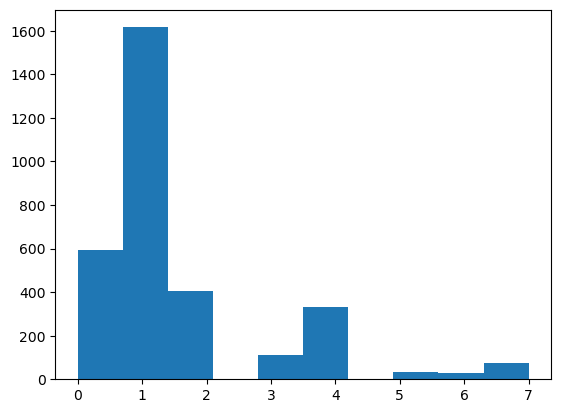

In [ ]:
plt.hist(y_train)

(array([ 738., 1007.,  513.,    0.,  145.,  412.,    0.,   41.,   38.,
          99.]),
 array([0. , 0.7, 1.4, 2.1, 2.8, 3.5, 4.2, 4.9, 5.6, 6.3, 7. ]),
 <BarContainer object of 10 artists>)

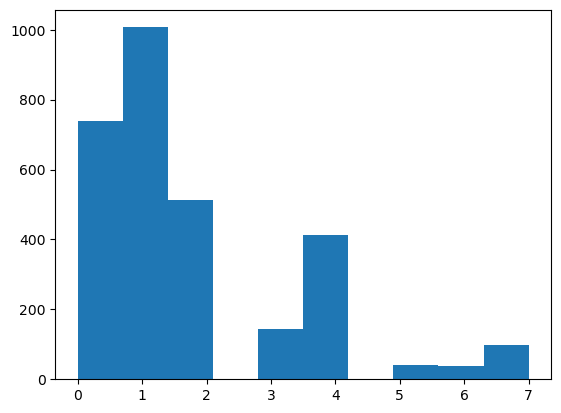

In [ ]:
plt.hist(y_train_2)

# ATTENTION Y_train entre 1 et 8

# Modification j'ajoute -1 pour le passer entre 0 et 7 pour le CNN

# Ne pas oubliez de faire la démarche inverse après la prédiction

In [ ]:
class SegmentationDataset(torch.utils.data.Dataset):
    def __init__(self, X, y, transform=None):
        self.X = X
        self.y = y
        self.transform = transform

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        image = self.X[idx]
        label = self.y[idx]

        if self.transform:
            image = self.transform(image)

        return image, label

# Définir les transformations à appliquer aux images d'entraînement
transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])

# Créer le jeu de données de segmentation
train_dataset_1 = SegmentationDataset(X_train, y_train, transform=transform)
train_dataset_2 = SegmentationDataset(X_train_2, y_train_2, transform=transform)
train_dataset_3 = SegmentationDataset(X_train_2, y_train_2, transform=transform)


In [ ]:
def cnn_accuracy(predict,labels):
  accuracy = (predict == labels).sum()/(labels.shape[0])
  return accuracy

def vector_to_class(x):
  y = torch.argmax(nn.Softmax(dim=1)(x),axis=1)
  return y

In [ ]:
#MODEL 1
learning_rate_1 = 0.01
n_epochs_1 = 25
batch_size = 64
nb_classes = 8

nb_filters_1 = 32         # number of convolutional filters to use
kernel_size = (3, 3)    # convolution kernel size
pool_size = (2, 2)      # size of pooling area for max pooling

# --- Size of the successive layers
n_h_0 = nb_channels = 3 #3 channels for RGB
n_h_1 = nb_filters_1
n_h_2 = nb_filters_1
n_h_3 = nb_filters_1
n_h_4 = nb_filters_1
n_h_5 = nb_filters_1
n_h_6 = nb_filters_1


model_1 = torch.nn.Sequential(nn.Conv2d(in_channels=n_h_0, out_channels=n_h_1, kernel_size=kernel_size, stride=(1, 1), padding='same'),
                            nn.ReLU(),
                            nn.Conv2d(in_channels=n_h_1, out_channels=n_h_2, kernel_size=kernel_size, stride=(1, 1), padding='same'),
                            nn.ReLU(),
                            nn.MaxPool2d(kernel_size = pool_size, stride= (2,2)),
                            nn.Conv2d(in_channels=n_h_2, out_channels=n_h_3, kernel_size=kernel_size, stride=(1, 1), padding='same'),
                            nn.ReLU(),
                            nn.MaxPool2d(kernel_size = pool_size, stride= (2,2)),
                            nn.Conv2d(in_channels=n_h_3, out_channels=n_h_4, kernel_size=kernel_size, stride=(1, 1), padding='same'),
                            nn.ReLU(),
                            nn.MaxPool2d(kernel_size = pool_size, stride= (2,2)),
                            nn.Conv2d(in_channels=n_h_4, out_channels=n_h_5, kernel_size=kernel_size, stride=(1, 1), padding='same'),
                            nn.ReLU(),
                            nn.MaxPool2d(kernel_size = pool_size, stride= (2,2)),
                            nn.Conv2d(in_channels=n_h_5, out_channels=n_h_6, kernel_size=kernel_size, stride=(1, 1), padding='same'),
                            nn.ReLU(),
                            nn.MaxPool2d(kernel_size = pool_size, stride= (2,2)),
                            
                            nn.Flatten(),
                            nn.Linear(in_features = int(n_h_6 * 8* 8) , out_features = nb_classes))



train_loader_1 = torch.utils.data.DataLoader(train_dataset_1, batch_size=batch_size, shuffle=True)
criterion_1 = torch.nn.CrossEntropyLoss()
optimizer_1 = torch.optim.Adam(model_1.parameters(), lr=learning_rate_1)

#print model summary
print(model_1)


device = torch.device("cuda:1" if torch.cuda.is_available() else "cuda:0" if torch.cuda.is_available() else "cpu")
print('device',device)
model_1 = model_1.to(device)

########## TRAINING 

train_losses=[]
valid_losses=[]

for epoch in range(0,n_epochs_1):
  train_loss=0.0
  all_labels = []
  all_predicted = []

  for batch_idx, (imgs, labels) in enumerate(tqdm(train_loader_1)):

    # pass the samples through the network
    predict = model_1.forward(imgs.to(device))
    # apply loss function
    loss = criterion_1(predict, labels.to(device))
    # set the gradients back to 0
    optimizer_1.zero_grad()
    # backpropagation
    loss.backward()
    # parameter update
    optimizer_1.step()
    # compute the train loss
    train_loss += loss.item()
    # store labels and class predictions
    all_labels.extend(labels.tolist())
    all_predicted.extend(vector_to_class(predict).tolist())

    if epoch % 1 == 0:
      torch.save(model_1.state_dict(), 'model_save/modele_epoch_{}.pth'.format(epoch))

  print('Epoch:{} Train Loss:{:.4f}'.format(epoch,train_loss/len(train_loader_1.dataset)))

  # calculate accuracy
  print('Accuracy:{:.4f}'.format(cnn_accuracy(np.array(all_predicted),np.array(all_labels))))

Sequential(
  (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (1): ReLU()
  (2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (3): ReLU()
  (4): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (6): ReLU()
  (7): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (8): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (9): ReLU()
  (10): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (11): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (12): ReLU()
  (13): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (14): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (15): ReLU()
  (16): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (17): Flat

100%|██████████| 13/13 [04:59<00:00, 23.02s/it]


Epoch:0 Train Loss:0.0066
Accuracy:0.5009


100%|██████████| 13/13 [04:52<00:00, 22.51s/it]


Epoch:1 Train Loss:0.0059
Accuracy:0.5050


100%|██████████| 13/13 [04:56<00:00, 22.77s/it]


Epoch:2 Train Loss:0.0059
Accuracy:0.5050


 85%|████████▍ | 11/13 [04:14<00:48, 24.29s/it]

In [ ]:
#MODEL 2 (less of class 2)
learning_rate_2 = 0.01
n_epochs_2 = 25
batch_size = 64
nb_classes = 8

nb_filters_2 = 32         # number of convolutional filters to use
kernel_size = (3, 3)    # convolution kernel size
pool_size = (2, 2)      # size of pooling area for max pooling

# --- Size of the successive layers
n_h_0 = nb_channels = 3 #3 channels for RGB
n_h_1 = nb_filters_2
n_h_2 = nb_filters_2
n_h_3 = nb_filters_2
n_h_4 = nb_filters_2
n_h_5 = nb_filters_2
n_h_6 = nb_filters_2


model_2 = torch.nn.Sequential(nn.Conv2d(in_channels=n_h_0, out_channels=n_h_1, kernel_size=kernel_size, stride=(1, 1), padding='same'),
                            nn.ReLU(),
                            nn.Conv2d(in_channels=n_h_1, out_channels=n_h_2, kernel_size=kernel_size, stride=(1, 1), padding='same'),
                            nn.ReLU(),
                            nn.MaxPool2d(kernel_size = pool_size, stride= (2,2)),
                            nn.Conv2d(in_channels=n_h_2, out_channels=n_h_3, kernel_size=kernel_size, stride=(1, 1), padding='same'),
                            nn.ReLU(),
                            nn.MaxPool2d(kernel_size = pool_size, stride= (2,2)),
                            nn.Conv2d(in_channels=n_h_3, out_channels=n_h_4, kernel_size=kernel_size, stride=(1, 1), padding='same'),
                            nn.ReLU(),
                            nn.MaxPool2d(kernel_size = pool_size, stride= (2,2)),
                            nn.Conv2d(in_channels=n_h_4, out_channels=n_h_5, kernel_size=kernel_size, stride=(1, 1), padding='same'),
                            nn.ReLU(),
                            nn.MaxPool2d(kernel_size = pool_size, stride= (2,2)),
                            nn.Conv2d(in_channels=n_h_5, out_channels=n_h_6, kernel_size=kernel_size, stride=(1, 1), padding='same'),
                            nn.ReLU(),
                            nn.MaxPool2d(kernel_size = pool_size, stride= (2,2)),
                            
                            nn.Flatten(),
                            nn.Linear(in_features = int(n_h_6 * 8* 8) , out_features = nb_classes))



train_loader_2 = torch.utils.data.DataLoader(train_dataset_2, batch_size=batch_size, shuffle=True)
criterion_2 = torch.nn.CrossEntropyLoss()
optimizer_2 = torch.optim.Adam(model_2.parameters(), lr=learning_rate_2)

#print model summary
print(model_2)


device = torch.device("cuda:1" if torch.cuda.is_available() else "cuda:0" if torch.cuda.is_available() else "cpu")
print('device',device)
model_2 = model_2.to(device)

########## TRAINING 

train_losses=[]
valid_losses=[]

for epoch in range(0,n_epochs_1):
  train_loss=0.0
  all_labels = []
  all_predicted = []

  for batch_idx, (imgs, labels) in enumerate(tqdm(train_loader_2)):

    # pass the samples through the network
    predict = model_2.forward(imgs.to(device))
    # apply loss function
    loss = criterion_2(predict, labels.to(device))
    # set the gradients back to 0
    optimizer_2.zero_grad()
    # backpropagation
    loss.backward()
    # parameter update
    optimizer_2.step()
    # compute the train loss
    train_loss += loss.item()
    # store labels and class predictions
    all_labels.extend(labels.tolist())
    all_predicted.extend(vector_to_class(predict).tolist())

    if epoch % 1 == 0:
      torch.save(model_2.state_dict(), 'model_save/modele_epoch_{}.pth'.format(epoch))

  print('Epoch:{} Train Loss:{:.4f}'.format(epoch,train_loss/len(train_loader_2.dataset)))

  # calculate accuracy
  print('Accuracy:{:.4f}'.format(cnn_accuracy(np.array(all_predicted),np.array(all_labels))))

Sequential(
  (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (1): ReLU()
  (2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (3): ReLU()
  (4): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (6): ReLU()
  (7): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (8): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (9): ReLU()
  (10): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (11): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (12): ReLU()
  (13): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (14): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (15): ReLU()
  (16): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (17): Flat

In [ ]:
#MODEL 3 (less of class 2)
learning_rate_3 = 0.01
n_epochs_3 = 15
batch_size = 64
nb_classes = 8

nb_filters_3 = 16         # number of convolutional filters to use
kernel_size = (3, 3)    # convolution kernel size
pool_size = (2, 2)      # size of pooling area for max pooling

# --- Size of the successive layers
n_h_0 = nb_channels = 3 #3 channels for RGB
n_h_1 = nb_filters_3
n_h_2 = nb_filters_3
n_h_3 = nb_filters_3
n_h_4 = nb_filters_3
n_h_5 = nb_filters_3
n_h_6 = nb_filters_3


model_3 = torch.nn.Sequential(nn.Conv2d(in_channels=n_h_0, out_channels=n_h_1, kernel_size=kernel_size, stride=(1, 1), padding='same'),
                            nn.ReLU(),
                            nn.Conv2d(in_channels=n_h_1, out_channels=n_h_2, kernel_size=kernel_size, stride=(1, 1), padding='same'),
                            nn.ReLU(),
                            nn.MaxPool2d(kernel_size = pool_size, stride= (2,2)),
                            nn.Conv2d(in_channels=n_h_2, out_channels=n_h_3, kernel_size=kernel_size, stride=(1, 1), padding='same'),
                            nn.ReLU(),
                            nn.MaxPool2d(kernel_size = pool_size, stride= (2,2)),
                            nn.Conv2d(in_channels=n_h_3, out_channels=n_h_4, kernel_size=kernel_size, stride=(1, 1), padding='same'),
                            nn.ReLU(),
                            nn.MaxPool2d(kernel_size = pool_size, stride= (2,2)),
                            nn.Conv2d(in_channels=n_h_4, out_channels=n_h_5, kernel_size=kernel_size, stride=(1, 1), padding='same'),
                            nn.ReLU(),
                            nn.MaxPool2d(kernel_size = pool_size, stride= (2,2)),
                            nn.Conv2d(in_channels=n_h_5, out_channels=n_h_6, kernel_size=kernel_size, stride=(1, 1), padding='same'),
                            nn.ReLU(),
                            nn.MaxPool2d(kernel_size = pool_size, stride= (2,2)),
                            
                            nn.Flatten(),
                            nn.Linear(in_features = int(n_h_6 * 8* 8) , out_features = nb_classes))



train_loader_3 = torch.utils.data.DataLoader(train_dataset_3, batch_size=batch_size, shuffle=True)
criterion_3 = torch.nn.CrossEntropyLoss()
optimizer_3 = torch.optim.Adam(model_3.parameters(), lr=learning_rate_3)

#print model summary
print(model_3)


device = torch.device("cuda:1" if torch.cuda.is_available() else "cuda:0" if torch.cuda.is_available() else "cpu")
print('device',device)
model_3 = model_3.to(device)

########## TRAINING 

train_losses=[]
valid_losses=[]

for epoch in range(0,n_epochs_1):
  train_loss=0.0
  all_labels = []
  all_predicted = []

  for batch_idx, (imgs, labels) in enumerate(tqdm(train_loader_3)):

    # pass the samples through the network
    predict = model_3.forward(imgs.to(device))
    # apply loss function
    loss = criterion_3(predict, labels.to(device))
    # set the gradients back to 0
    optimizer_3.zero_grad()
    # backpropagation
    loss.backward()
    # parameter update
    optimizer_3.step()
    # compute the train loss
    train_loss += loss.item()
    # store labels and class predictions
    all_labels.extend(labels.tolist())
    all_predicted.extend(vector_to_class(predict).tolist())

    if epoch % 1 == 0:
      torch.save(model_3.state_dict(), 'model_3_save/modele_epoch_{}.pth'.format(epoch))

  print('Epoch:{} Train Loss:{:.4f}'.format(epoch,train_loss/len(train_loader_3.dataset)))

  # calculate accuracy
  print('Accuracy:{:.4f}'.format(cnn_accuracy(np.array(all_predicted),np.array(all_labels))))

  3%|▎         | 2/60 [01:11<34:19, 35.50s/it]


KeyboardInterrupt: 

### Heatmap

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns


# Predict the classes for the validation set

# Définir les transformations
transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Appliquer les transformations à X_val
X_val_transformed = [transform(img) for img in X_val]
X_val_transformed = torch.stack(X_val_transformed)

#load the model
model.load_state_dict(torch.load('model_save/modele_epoch_24.pth',map_location=torch.device('cpu')))
#device = torch.device("cuda:2" if torch.cuda.is_available() else "cpu")
device = torch.device("cuda:1" if torch.cuda.is_available() else "cuda:0" if torch.cuda.is_available() else "cpu")
print('device',device)
model = model.to(device)


# Prédire les classes pour le jeu de validation
y_pred = model(X_val_transformed.to(device))
y_pred = torch.argmax(y_pred, dim=1)
y_pred = y_pred.numpy()

print(y_pred)

# Create a confusion matrix
cm = confusion_matrix(y_val, y_pred)

# Create a heatmap from the confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')

# Labels, title and ticks
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.xticks(range(8))
plt.yticks(range(8))

# Add class names to the x and y axis labels
class_names = ['class_0', 'class_1', 'class_2', 'class_3', 'class_4', 'class_5', 'class_6', 'class_7'] # replace with your class names
plt.xticks(range(8), class_names, rotation=45)
plt.yticks(range(8), class_names)

plt.show()


device cpu


: 

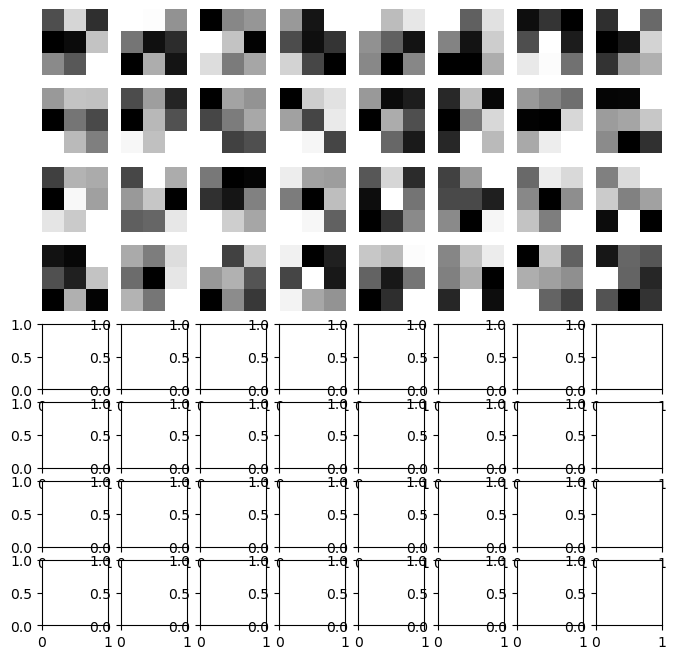

In [ ]:

# Extraire les poids des filtres de la première couche de convolution
filters = model[0].weight.data.cpu().numpy()

# Calculer le nombre de filtres dans la première couche de convolution
num_filters = filters.shape[0]

# Créer une grille de sous-tracés pour afficher les filtres
fig, axs = plt.subplots(nrows=8, ncols=8, figsize=(8, 8))

# Parcourir tous les filtres et les afficher dans la grille de sous-tracés
for i in range(num_filters):
    ax = axs[i // 8, i % 8]
    ax.imshow(filters[i, 0, :, :], cmap='gray')
    ax.axis('off')

plt.show()


In [ ]:
def image_vanilla_backprop(input_image, model, target_class):
    # Charger le modèle
    model = model.eval() # passer en mode évaluation

    # Définir l'image d'entrée

    #[batch_size, num_channels, height, width]
    input_tensor = torch.unsqueeze(torch.tensor(input_image), 0).permute(0, 3, 1, 2).float()

    # Définir la classe cible
    target_class = 1 # la classe cible

    # Créer une instance de VanillaBackprop
    vanilla_backprop = vb.VanillaBackprop(model)

    # Calculer les gradients avec Vanilla Backpropagation
    gradients = vanilla_backprop.generate_gradients(input_tensor, target_class)

    # Convertir les gradients en masque de pertinence
    masque = np.abs(gradients)
    masque = masque / np.max(masque) # normaliser entre 0 et 1

    # Afficher le masque de pertinence
    heatmap = masque.mean(axis=0)

    return heatmap

def plot_vanilla_backprop(liste_images,model):
    target_classes = [0,1,2,3,4,5,6,7]
    # Create subplots for heatmaps
    fig, axs = plt.subplots(len(liste_images), len(target_classes), figsize=(15, 10))

    # Iterate over images
    for i, image in enumerate(liste_images):
        # Iterate over target classes
        for j, target_class in enumerate(target_classes):
            # Compute heatmap for the image and target class
            heatmap = image_vanilla_backprop(image, model, target_class)
            
            # Display heatmap
            axs[i, j].imshow(heatmap, cmap='hot')
            axs[i, j].set_title(f'Target Class: {target_class}')
            axs[i, j].axis('off')

    # Display target classes in a row
    fig, ax = plt.subplots(1, len(target_classes), figsize=(15, 2))
    for j, target_class in enumerate(target_classes):
        ax[j].imshow(target_class_image)  # Replace with your own target class image
        ax[j].set_title(f'Target Class: {target_class}')
        ax[j].axis('off')

    plt.show()
    



In [ ]:
plot_vanilla_backprop(X_train[:5],model)

In [ ]:
import torch
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import torchvision.models as models
from gradcam import GradCAM
from gradcam.utils import visualize_cam
from PIL import Image

# Charger une image à visualiser
img = Image.open('output_masks_train_set_1/ISIC_0000000.jpg_pred_mask.png')

# Transformer l'image en tenseur et l'ajouter à un lot
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),  # Modifiez les moyennes et écarts-types en fonction de votre jeu de données
])
img_tensor = transform(img).unsqueeze(0).to(device)

# Définir la classe cible pour la visualisation
target_class = 3  # Remplacez par la classe cible souhaitée

# Créer un objet GradCAM pour la dernière couche de convolution du modèle
cam = GradCAM(model,model[-5])

# Calculer la carte de chaleur de grad-CAM pour la classe cible
with torch.no_grad():
    output = model(img_tensor)
    target_logits = output[:, target_class]
    target_logits = target_logits.long()
grayscale_cam = cam(img_tensor,target_logits)
grayscale_cam = grayscale_cam.squeeze().type(torch.uint8)
# Visualiser la carte de chaleur de grad-CAM superposée à l'image d'origine
visualization = visualize_cam(img_tensor, grayscale_cam)

# Afficher l'image
plt.imshow(visualization.cpu().numpy().transpose(1, 2, 0))
plt.show()


error: OpenCV(4.8.1) /Users/xperience/GHA-OpenCV-Python/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/colormap.cpp:736: error: (-5:Bad argument) cv::ColorMap only supports source images of type CV_8UC1 or CV_8UC3 in function 'operator()'


## Préparation de la detection

### Prepare data for predicting the test set

In [ ]:
X_test = glob.glob('output_masks_test_set/*.png')
X_test_names = [os.path.basename(x).split('.jpg_pred_mask.png')[0] for x in X_test]

X_test = [io.imread(x) for x in X_test]
X_test = np.array(X_test)
print(X_test.shape)

: 

In [ ]:
predicted_classes = model.predict(X_test)

: 

In [ ]:
print(predicted_classes.shape)
print(predicted_classes)

predicted_classes_final = [np.argmax(predicted_classes[i]) for i in range(0, len(predicted_classes))]

print(predicted_classes_final)

: 

Ecrire les résultats predicted class dans un fichier csv de 2 colonnes avec 1 colonne avec le nom correspondant à la classe et 1 colonne correspondant à la classe prédite. Le séparateur est une virgule

In [ ]:
# Open the CSV file for writing
with open('SampleSubmission2.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    # Write the header row
    writer.writerow(['ID', 'CLASS'])

    # Write the predicted classes and image filenames to the CSV file
    for i in range(len(predicted_classes)):
        writer.writerow([X_test_names[i], predicted_classes_final[i]])

: 

: 